In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
plt.rc('font', family='NanumBarunGothic')

## 모델링

* 미삭제 > 바로 모델 = final
* 미삭제 > PCA 1 > 모델  =  X
* 미삭제 > PCA 2 > 모델  =  X3

<br>

* 삭제 > 바로 모델 = final에 좀 처리해서
* 삭제 > PCA 1 > 모델  =  X1
* 삭제 > PCA 2 > 모델  =  X2


<br>
모델 생성 단계

* 데이터 smoth 처리 : train 데이터 > resampled 데이터로 바꾸기 = X_resampled, y_resampled, X_test, y_test
* resampled 데이터를 train 데이터와 validation set으로 나누기
* train set로 모델 fitting : 모델 종류 xgboost, random forest, decision tree, knn
* validation set으로 모델 성능 평가, alidation error 기준 최적의 모델 선정
* 최종 모델과 test error 제시

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/TAVE프로젝트'

In [ ]:
#데이터 불러오기
all_none = pd.read_csv(path + '/모델링/미삭제_PCA안함.csv', encoding="utf8").iloc[:, 1:]
all_pca1 = pd.read_csv(path + '/모델링/미삭제_PCA1.csv', encoding="utf8").iloc[:, 1:]
all_pca2 = pd.read_csv(path + '/모델링/미삭제_PCA2.csv', encoding="utf8").iloc[:, 1:]

sub_none = pd.read_csv(path + '/모델링/삭제_PCA안함.csv', encoding="utf8").iloc[:, 1:]
sub_pca1= pd.read_csv(path + '/모델링/삭제_PCA1.csv', encoding="utf8").iloc[:, 1:]
sub_pca2 = pd.read_csv(path + '/모델링/삭제_PCA2.csv', encoding="utf8").iloc[:, 1:]

In [ ]:
all_none

,소득분위,가구수,1년 생존율,3년 생존율,5년 생존율,최근 10년 기준 평균영업기간,최근 30년 기준 평균영업기간,임대시세,유동인구,주거인구,...,금융지수,행정동명_0,행정동명_1,행정동명_2,행정동명_3,행정동명_4,행정동명_5,행정동명_6,행정동명_7,행정동명_8
0,-0.000889,1.107113,0.117675,1.521088,-0.551375,0.502814,-0.728736,0.016730,-0.616594,-0.299890,...,-1.578398,0,0,0,0,0,0,0,0,1
1,0.927315,0.011199,-0.064646,-0.966816,-0.768103,-0.160512,0.192260,0.010527,0.665372,-0.424547,...,1.674605,0,0,0,0,0,0,0,1,0
2,-0.000889,2.565150,-0.382021,-0.262277,-0.065203,0.171151,0.345759,0.292350,0.450579,-0.406739,...,1.737668,0,0,0,0,0,0,0,1,1
3,-0.000889,2.565150,-0.382021,-0.262277,-0.065203,0.171151,0.345759,0.292350,0.450579,-0.406739,...,1.737668,0,0,0,0,0,0,0,1,1
4,-0.929093,0.976168,-0.726405,-0.884253,-1.283562,-0.492175,-0.882235,0.134429,0.241713,1.062434,...,0.655085,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20881,-0.929093,0.048760,1.805836,2.897141,-2.015749,-1.487164,0.192260,0.072760,-0.288587,1.115858,...,-0.422242,0,1,0,1,1,0,0,1,0
20882,-0.929093,-0.118294,0.455307,0.695456,0.327249,-0.823838,-0.575236,-0.530726,0.772903,0.483669,...,-0.290861,1,0,1,1,1,0,1,1,1
20883,1.855520,-0.923888,-2.698177,-2.607072,-2.015749,-0.823838,0.038761,-0.678877,-0.441102,0.813120,...,-1.420740,1,0,0,1,1,0,0,0,0
20884,0.927315,-0.471493,-0.895222,-0.955808,-0.844250,-0.492175,0.038761,-0.298802,-0.033902,-0.406739,...,1.937368,0,0,1,1,1,0,0,1,1


In [ ]:
final = pd.read_csv(path + '/찐찐최종.csv')
y = final['폐업여부'].eq('y').mul(1)

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
20881    0
20882    0
20883    0
20884    0
20885    0
Name: 폐업여부, Length: 20886, dtype: int32

### train test split  >  SMOTE 처리  >  train validation split

* 0.4 비율 train / test 나누기
* SMOTE : test 데이터 > resampled 데이터로 바꾸기

In [ ]:
from sklearn.model_selection import train_test_split

# !pip install scikit-learn==1.2.2 --user
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(random_state = 2023)

In [ ]:
# all_none : 미삭제 > 바로 모델
X1_train, X1_test, y1_train, y1_test = train_test_split(all_none,y,test_size=0.4, shuffle=True, random_state=2023)
X1_resampled, y1_resampled = sm.fit_resample(X1_train, list(y1_train))
X1_val, X1_train_re, y1_val, y1_train_re = train_test_split(X1_resampled, y1_resampled, test_size=0.5, shuffle=True, random_state=2023)

# all_pca1 : 미삭제 > PCA 1 > 모델
X2_train, X2_test, y2_train, y2_test = train_test_split(all_pca1,y,test_size=0.4, shuffle=True, random_state=2023)
X2_resampled, y2_resampled = sm.fit_resample(X2_train, list(y2_train))
X2_val, X2_train_re, y2_val, y2_train_re = train_test_split(X2_resampled, y2_resampled, test_size=0.5, shuffle=True, random_state=2023)

# all_pca2 : 미삭제 > PCA 2 > 모델
X3_train, X3_test, y3_train, y3_test = train_test_split(all_pca2,y,test_size=0.4, shuffle=True, random_state=2023)
X3_resampled, y3_resampled = sm.fit_resample(X3_train, list(y3_train))
X3_val, X3_train_re, y3_val, y3_train_re = train_test_split(X3_resampled, y3_resampled, test_size=0.5, shuffle=True, random_state=2023)


# sub_none : 삭제 > 바로 모델
X4_train, X4_test, y4_train, y4_test = train_test_split(sub_none,y,test_size=0.4, shuffle=True, random_state=2023)
X4_resampled, y4_resampled = sm.fit_resample(X4_train, list(y4_train))
X4_val, X4_train_re, y4_val, y4_train_re = train_test_split(X4_resampled, y4_resampled, test_size=0.5, shuffle=True, random_state=2023)

# sub_pca1 : 삭제 > PCA 1 > 모델
X5_train, X5_test, y5_train, y5_test = train_test_split(sub_pca1,y,test_size=0.4, shuffle=True, random_state=2023)
X5_resampled, y5_resampled = sm.fit_resample(X5_train, list(y5_train))
X5_val, X5_train_re, y5_val, y5_train_re = train_test_split(X5_resampled, y5_resampled, test_size=0.5, shuffle=True, random_state=2023)

# sub_pca2 : 삭제 > PCA 2 > 모델
X6_train, X6_test, y6_train, y6_test = train_test_split(sub_pca2,y,test_size=0.4, shuffle=True, random_state=2023)
X6_resampled, y6_resampled = sm.fit_resample(X6_train, list(y6_train))
X6_val, X6_train_re, y6_val, y6_train_re = train_test_split(X6_resampled, y6_resampled, test_size=0.5, shuffle=True, random_state=2023)

* test data set : 처음 split한 test 데이터

In [ ]:
X1_test

,소득분위,가구수,1년 생존율,3년 생존율,5년 생존율,최근 10년 기준 평균영업기간,최근 30년 기준 평균영업기간,임대시세,유동인구,주거인구,...,금융지수,행정동명_0,행정동명_1,행정동명_2,행정동명_3,행정동명_4,행정동명_5,행정동명_6,행정동명_7,행정동명_8
18277,-0.000889,2.565150,-0.382021,-0.262277,-0.065203,0.171151,0.345759,0.292350,0.450579,-0.406739,...,1.737668,0,0,0,0,0,0,0,1,1
18369,-0.000889,2.157580,0.556597,0.442262,-0.041773,-0.823838,-1.956730,1.372563,-1.382967,-1.154681,...,-0.380200,0,0,1,1,0,1,0,1,0
11874,-1.857297,0.468573,0.678144,1.064238,-0.065203,-0.492175,0.192260,-0.780186,0.383992,0.608326,...,-0.553623,0,1,0,1,1,0,0,0,0
14368,-0.929093,0.332855,-0.442794,-0.207235,-0.065203,-0.492175,-0.114739,1.594063,0.439589,0.296683,...,-1.068638,0,0,1,0,1,0,1,0,0
11714,-0.929093,1.377097,-0.652126,-0.102655,0.649411,-0.492175,0.499258,-1.135103,0.293835,0.768599,...,-0.364434,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,-0.929093,2.201159,0.455307,0.695456,-0.065203,-0.823838,-0.575236,-0.400638,0.944165,0.839832,...,-0.474795,0,0,0,0,1,0,1,0,1
16561,-0.929093,0.345929,-0.219957,-1.506229,-1.430000,-0.492175,-0.268238,-0.383538,1.176116,1.498733,...,0.607788,0,0,1,1,1,0,0,0,0
12992,-1.857297,-0.509885,-4.946808,-2.607072,-2.015749,0.171151,0.499258,-1.762692,1.803685,0.759695,...,-0.774344,1,1,0,0,1,1,0,1,0
9327,-0.000889,-0.396786,-0.895222,-0.405386,0.327249,-1.818827,0.038761,-1.218856,-0.900317,-0.433451,...,-1.058128,1,0,0,0,0,0,0,0,0


In [ ]:
y1_test

18277    0
18369    0
11874    0
14368    0
11714    0
        ..
12374    0
16561    0
12992    0
9327     0
16861    0
Name: 폐업여부, Length: 8355, dtype: int64

* resampled data set : 처음 train 데이터를 smote한 데이터

In [ ]:
# SMOTE 되었는지 체크 : 0,1 50%씩 분포
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X1_train.shape, y1_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X1_resampled, y1_resampled)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y1_resampled).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (12531, 34) (12531,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :            소득분위       가구수    1년 생존율    3년 생존율    5년 생존율  최근 10년 기준 평균영업기간  \
0     -0.929093  1.144467 -0.037636 -0.102655  0.116379         -0.492175   
1     -0.000889 -1.228942 -0.604858 -0.245764 -0.340506         -0.823838   
2      0.927315 -1.095922  1.056292 -0.774169 -0.065203          0.502814   
3     -0.929093  1.892577 -2.049924 -0.245764 -0.340506         -0.160512   
4     -0.929093  0.976168 -0.726405 -0.884253 -1.283562         -0.492175   
...         ...       ...       ...       ...       ...               ...   
24841  0.626612  1.279637  0.447036  0.434820  0.041384         -0.599621   
24842 -0.328671  0.239774 -0.724644 -0.418247 -0.949608          0.502814   
24843  0.927315  0.858919  0.394533  0.431254  0.081234         -0.492175   
24844  1.855520  0.038763 -1.003905 -1.045786 -0.692050          0.295985   
24845 -0.572511  0.218705 -0.599492 -1.174250 -0.972514         -1.10

* train_re data set : train 데이터에서 validation 제외한 부분

In [ ]:
X1_train_re

,소득분위,가구수,1년 생존율,3년 생존율,5년 생존율,최근 10년 기준 평균영업기간,최근 30년 기준 평균영업기간,임대시세,유동인구,주거인구,...,금융지수,행정동명_0,행정동명_1,행정동명_2,행정동명_3,행정동명_4,행정동명_5,행정동명_6,행정동명_7,행정동명_8
6801,1.855520,0.035271,-1.192338,-0.163201,-0.715385,0.171151,0.038761,-0.427634,-0.393667,1.187091,...,-0.138458,0,1,1,0,1,1,1,1,1
6280,-0.929093,-1.704579,-0.125420,0.145035,0.075376,0.502814,1.573753,1.764590,0.308031,-0.985504,...,-0.238308,0,0,0,0,0,1,0,0,1
22159,-0.319335,-0.209309,-1.338818,-2.418234,-1.814791,-1.913222,-0.767936,-0.953668,-0.781605,-0.111917,...,-1.312288,0,0,1,1,0,0,0,0,1
19469,-0.793524,0.721502,0.509789,-0.293225,-1.346690,-0.630073,-1.253055,-0.761225,-0.853242,-0.269476,...,-0.981534,0,0,0,0,0,0,0,0,1
10906,1.855520,-0.221224,0.117675,0.695456,0.912998,1.166140,0.959756,0.838842,-0.771991,0.029561,...,-0.085906,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8346,0.927315,-0.268539,0.279738,-0.653076,-0.879395,-0.160512,0.038761,1.352498,2.090694,0.777503,...,1.800731,0,0,0,1,1,1,0,0,1
13790,-0.000889,-0.705967,-0.269424,0.570788,0.685501,0.547631,0.283533,-0.773733,-0.786109,0.015842,...,-1.044491,0,0,0,0,0,0,1,0,1
19221,-0.280703,-0.241167,0.251744,-1.506229,-1.020828,-0.260494,-0.053786,-0.615591,0.714193,1.809727,...,-0.357691,0,0,1,0,1,0,0,0,0
15654,0.459432,-0.622932,-0.495554,-0.480068,0.114906,-1.487164,-0.920923,-0.744148,7.244783,1.523927,...,-0.632403,0,0,0,0,0,0,0,0,0


In [ ]:
y1_train_re

* validation data set : train 데이터에서 validation 해당 부분

In [ ]:
X1_val

,소득분위,가구수,1년 생존율,3년 생존율,5년 생존율,최근 10년 기준 평균영업기간,최근 30년 기준 평균영업기간,임대시세,유동인구,주거인구,...,금융지수,행정동명_0,행정동명_1,행정동명_2,행정동명_3,행정동명_4,행정동명_5,행정동명_6,행정동명_7,행정동명_8
14132,1.183428,-0.038986,1.194656,2.398957,1.006893,0.291226,0.348457,0.277552,-0.875926,0.228392,...,-1.491229,0,0,0,0,0,0,0,0,0
1715,-0.000889,0.829451,-0.442794,-0.163201,-1.365567,1.166140,-0.575236,-0.391670,-1.176687,-1.065640,...,-1.100170,1,0,0,0,0,1,0,1,0
16414,0.768408,-0.037274,0.466242,0.474761,0.285282,0.801578,1.109082,0.743824,0.228845,-0.300446,...,1.655526,0,0,1,1,1,0,1,0,0
21158,-0.000889,-1.062304,-0.246968,0.023942,0.274531,-0.823838,-1.035734,1.326902,-0.253678,-0.549204,...,0.129560,0,0,0,1,0,1,1,0,1
7031,-0.000889,-0.380185,1.805836,0.145035,-0.551375,0.502814,0.345759,-0.235968,-0.249502,0.056273,...,-0.369689,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6049,-0.000889,1.973302,0.678144,-0.774169,-0.065203,-0.823838,-0.728736,-1.187840,-0.918069,0.163122,...,-0.474795,0,1,1,1,1,1,1,0,0
19127,-0.000889,2.565150,-0.382021,-0.262277,-0.065203,0.171151,0.345759,0.292350,0.450579,-0.406739,...,1.737668,0,0,0,0,0,0,0,1,1
14790,-0.000889,0.638488,-0.217311,-0.302864,-0.144950,-0.160512,0.254215,0.784850,0.954056,-0.337811,...,1.213983,0,0,0,1,0,0,0,0,0
22041,-0.000889,2.565150,-0.382021,-0.262277,-0.065203,0.171151,0.345759,0.292350,0.450579,-0.406739,...,1.737668,0,0,0,0,0,0,0,1,1


In [ ]:
y1_val

# 모델링

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#모델 평가지표 함수
def get_clf_eval(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print('정확도: {:.4f}'.format(accuracy))
  print('정밀도: {:.4f}'.format(precision))
  print('재현율: {:.4f}'.format(recall))
  print('f1 score: {:.4f}'.format(f1))


## xgboost

In [ ]:
# !pip install xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib
from xgboost import plot_importance
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb

### X1

In [ ]:
#model 학습
xgb_clf = XGBClassifier(n_estimators=100, objective='binary:logistic', eval_metric='auc')
params = {'max_depth':[5,7],
          'min_child_weight':[1,3,5],
          'colsample_bytree':[0.5, 0.75]}
xgb_clf.fit(X1_train_re, y1_train_re)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X1_resampled, y1_resampled, early_stopping_rounds=30,
           eval_set=[(X1_resampled, y1_resampled), (X1_test, y1_test)])

print(gridcv.best_params_)

[0]	validation_0-auc:0.89077	validation_1-auc:0.81027
[1]	validation_0-auc:0.93656	validation_1-auc:0.76198
[2]	validation_0-auc:0.95479	validation_1-auc:0.77833


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.96330	validation_1-auc:0.77653
[4]	validation_0-auc:0.97025	validation_1-auc:0.77662
[5]	validation_0-auc:0.97448	validation_1-auc:0.76340
[6]	validation_0-auc:0.97946	validation_1-auc:0.78209
[7]	validation_0-auc:0.98231	validation_1-auc:0.77569
[8]	validation_0-auc:0.98601	validation_1-auc:0.76898
[9]	validation_0-auc:0.98884	validation_1-auc:0.76737
[10]	validation_0-auc:0.98961	validation_1-auc:0.77484
[11]	validation_0-auc:0.99049	validation_1-auc:0.77523
[12]	validation_0-auc:0.99419	validation_1-auc:0.77500
[13]	validation_0-auc:0.99468	validation_1-auc:0.77588
[14]	validation_0-auc:0.99489	validation_1-auc:0.77546
[15]	validation_0-auc:0.99603	validation_1-auc:0.77463
[16]	validation_0-auc:0.99701	validation_1-auc:0.77228
[17]	validation_0-auc:0.99721	validation_1-auc:0.77478
[18]	validation_0-auc:0.99739	validation_1-auc:0.77137
[19]	validation_0-auc:0.99757	validation_1-auc:0.77101
[20]	validation_0-auc:0.99773	validation_1-auc:0.76816
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.96195	validation_1-auc:0.78152
[4]	validation_0-auc:0.97256	validation_1-auc:0.78591
[5]	validation_0-auc:0.97716	validation_1-auc:0.77333
[6]	validation_0-auc:0.97862	validation_1-auc:0.77884
[7]	validation_0-auc:0.98169	validation_1-auc:0.77030
[8]	validation_0-auc:0.98580	validation_1-auc:0.77111
[9]	validation_0-auc:0.98811	validation_1-auc:0.77244
[10]	validation_0-auc:0.98828	validation_1-auc:0.77761
[11]	validation_0-auc:0.98927	validation_1-auc:0.78150
[12]	validation_0-auc:0.99277	validation_1-auc:0.78033
[13]	validation_0-auc:0.99387	validation_1-auc:0.77949
[14]	validation_0-auc:0.99420	validation_1-auc:0.77641
[15]	validation_0-auc:0.99555	validation_1-auc:0.77142
[16]	validation_0-auc:0.99663	validation_1-auc:0.76815
[17]	validation_0-auc:0.99674	validation_1-auc:0.76633
[18]	validation_0-auc:0.99705	validation_1-auc:0.76448
[19]	validation_0-auc:0.99723	validation_1-auc:0.76242
[20]	validation_0-auc:0.99747	validation_1-auc:0.75816
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.94981	validation_1-auc:0.79230
[3]	validation_0-auc:0.96105	validation_1-auc:0.79375
[4]	validation_0-auc:0.96639	validation_1-auc:0.79319
[5]	validation_0-auc:0.97031	validation_1-auc:0.77587
[6]	validation_0-auc:0.97483	validation_1-auc:0.78600
[7]	validation_0-auc:0.97867	validation_1-auc:0.77339
[8]	validation_0-auc:0.98281	validation_1-auc:0.76972
[9]	validation_0-auc:0.98329	validation_1-auc:0.76623
[10]	validation_0-auc:0.98514	validation_1-auc:0.77252
[11]	validation_0-auc:0.98821	validation_1-auc:0.77012
[12]	validation_0-auc:0.99270	validation_1-auc:0.76974
[13]	validation_0-auc:0.99311	validation_1-auc:0.76833
[14]	validation_0-auc:0.99386	validation_1-auc:0.76982
[15]	validation_0-auc:0.99501	validation_1-auc:0.76586
[16]	validation_0-auc:0.99633	validation_1-auc:0.76494
[17]	validation_0-auc:0.99666	validation_1-auc:0.76635
[18]	validation_0-auc:0.99696	validation_1-auc:0.76533
[19]	validation_0-auc:0.99704	validation_1-auc:0.76389
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.96330	validation_1-auc:0.77653
[4]	validation_0-auc:0.97025	validation_1-auc:0.77662
[5]	validation_0-auc:0.97448	validation_1-auc:0.76340
[6]	validation_0-auc:0.97946	validation_1-auc:0.78209
[7]	validation_0-auc:0.98231	validation_1-auc:0.77569
[8]	validation_0-auc:0.98601	validation_1-auc:0.76898
[9]	validation_0-auc:0.98884	validation_1-auc:0.76738
[10]	validation_0-auc:0.98961	validation_1-auc:0.77482
[11]	validation_0-auc:0.99050	validation_1-auc:0.77535
[12]	validation_0-auc:0.99422	validation_1-auc:0.77523
[13]	validation_0-auc:0.99468	validation_1-auc:0.77585
[14]	validation_0-auc:0.99488	validation_1-auc:0.77544
[15]	validation_0-auc:0.99601	validation_1-auc:0.77447
[16]	validation_0-auc:0.99698	validation_1-auc:0.77222
[17]	validation_0-auc:0.99719	validation_1-auc:0.77524
[18]	validation_0-auc:0.99736	validation_1-auc:0.77199
[19]	validation_0-auc:0.99759	validation_1-auc:0.77214
[20]	validation_0-auc:0.99772	validation_1-auc:0.76817
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.96195	validation_1-auc:0.78152
[4]	validation_0-auc:0.97256	validation_1-auc:0.78591
[5]	validation_0-auc:0.97716	validation_1-auc:0.77333
[6]	validation_0-auc:0.97862	validation_1-auc:0.77884
[7]	validation_0-auc:0.98169	validation_1-auc:0.77030
[8]	validation_0-auc:0.98579	validation_1-auc:0.77108
[9]	validation_0-auc:0.98799	validation_1-auc:0.77278
[10]	validation_0-auc:0.98815	validation_1-auc:0.77810
[11]	validation_0-auc:0.98915	validation_1-auc:0.78185
[12]	validation_0-auc:0.99270	validation_1-auc:0.78051
[13]	validation_0-auc:0.99379	validation_1-auc:0.77947
[14]	validation_0-auc:0.99411	validation_1-auc:0.77703
[15]	validation_0-auc:0.99547	validation_1-auc:0.77208
[16]	validation_0-auc:0.99657	validation_1-auc:0.76816
[17]	validation_0-auc:0.99673	validation_1-auc:0.76637
[18]	validation_0-auc:0.99702	validation_1-auc:0.76368
[19]	validation_0-auc:0.99721	validation_1-auc:0.76171
[20]	validation_0-auc:0.99744	validation_1-auc:0.75763
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.96105	validation_1-auc:0.79375
[4]	validation_0-auc:0.96639	validation_1-auc:0.79319
[5]	validation_0-auc:0.97027	validation_1-auc:0.77572
[6]	validation_0-auc:0.97481	validation_1-auc:0.78597
[7]	validation_0-auc:0.97864	validation_1-auc:0.77340
[8]	validation_0-auc:0.98278	validation_1-auc:0.76956
[9]	validation_0-auc:0.98324	validation_1-auc:0.76710
[10]	validation_0-auc:0.98510	validation_1-auc:0.77351
[11]	validation_0-auc:0.98815	validation_1-auc:0.76952
[12]	validation_0-auc:0.99249	validation_1-auc:0.76885
[13]	validation_0-auc:0.99341	validation_1-auc:0.77457
[14]	validation_0-auc:0.99379	validation_1-auc:0.77416
[15]	validation_0-auc:0.99512	validation_1-auc:0.77202
[16]	validation_0-auc:0.99626	validation_1-auc:0.76999
[17]	validation_0-auc:0.99660	validation_1-auc:0.77076
[18]	validation_0-auc:0.99674	validation_1-auc:0.76619
[19]	validation_0-auc:0.99690	validation_1-auc:0.76444
[20]	validation_0-auc:0.99725	validation_1-auc:0.76426
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.95479	validation_1-auc:0.77833
[3]	validation_0-auc:0.96330	validation_1-auc:0.77653
[4]	validation_0-auc:0.97025	validation_1-auc:0.77662
[5]	validation_0-auc:0.97447	validation_1-auc:0.76379
[6]	validation_0-auc:0.97946	validation_1-auc:0.78221
[7]	validation_0-auc:0.98227	validation_1-auc:0.77624
[8]	validation_0-auc:0.98548	validation_1-auc:0.76948
[9]	validation_0-auc:0.98887	validation_1-auc:0.76658
[10]	validation_0-auc:0.98991	validation_1-auc:0.77562
[11]	validation_0-auc:0.99063	validation_1-auc:0.77659
[12]	validation_0-auc:0.99401	validation_1-auc:0.77825
[13]	validation_0-auc:0.99427	validation_1-auc:0.77817
[14]	validation_0-auc:0.99448	validation_1-auc:0.77600
[15]	validation_0-auc:0.99559	validation_1-auc:0.77245
[16]	validation_0-auc:0.99651	validation_1-auc:0.77029
[17]	validation_0-auc:0.99654	validation_1-auc:0.77335
[18]	validation_0-auc:0.99669	validation_1-auc:0.76693
[19]	validation_0-auc:0.99709	validation_1-auc:0.76858
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.88241	validation_1-auc:0.80979
[1]	validation_0-auc:0.93855	validation_1-auc:0.76978
[2]	validation_0-auc:0.95052	validation_1-auc:0.78219
[3]	validation_0-auc:0.96195	validation_1-auc:0.78152
[4]	validation_0-auc:0.97256	validation_1-auc:0.78591
[5]	validation_0-auc:0.97716	validation_1-auc:0.77333
[6]	validation_0-auc:0.97862	validation_1-auc:0.77884
[7]	validation_0-auc:0.98169	validation_1-auc:0.77030
[8]	validation_0-auc:0.98578	validation_1-auc:0.77096
[9]	validation_0-auc:0.98793	validation_1-auc:0.77300
[10]	validation_0-auc:0.98818	validation_1-auc:0.77753
[11]	validation_0-auc:0.98919	validation_1-auc:0.78124
[12]	validation_0-auc:0.99225	validation_1-auc:0.78232
[13]	validation_0-auc:0.99348	validation_1-auc:0.78141
[14]	validation_0-auc:0.99427	validation_1-auc:0.77832
[15]	validation_0-auc:0.99559	validation_1-auc:0.77521
[16]	validation_0-auc:0.99652	validation_1-auc:0.77021
[17]	validation_0-auc:0.99661	validation_1-auc:0.77302
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.94981	validation_1-auc:0.79230
[3]	validation_0-auc:0.96105	validation_1-auc:0.79375
[4]	validation_0-auc:0.96634	validation_1-auc:0.79283
[5]	validation_0-auc:0.97017	validation_1-auc:0.77569
[6]	validation_0-auc:0.97476	validation_1-auc:0.78543
[7]	validation_0-auc:0.97861	validation_1-auc:0.77239
[8]	validation_0-auc:0.98280	validation_1-auc:0.76956
[9]	validation_0-auc:0.98326	validation_1-auc:0.76640
[10]	validation_0-auc:0.98509	validation_1-auc:0.77255
[11]	validation_0-auc:0.98811	validation_1-auc:0.76843
[12]	validation_0-auc:0.99248	validation_1-auc:0.76800
[13]	validation_0-auc:0.99341	validation_1-auc:0.77326
[14]	validation_0-auc:0.99378	validation_1-auc:0.77272
[15]	validation_0-auc:0.99508	validation_1-auc:0.77125
[16]	validation_0-auc:0.99623	validation_1-auc:0.76836
[17]	validation_0-auc:0.99658	validation_1-auc:0.76712
[18]	validation_0-auc:0.99673	validation_1-auc:0.76319
[19]	validation_0-auc:0.99718	validation_1-auc:0.76652
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97938	validation_1-auc:0.74937
[3]	validation_0-auc:0.98668	validation_1-auc:0.75327
[4]	validation_0-auc:0.99095	validation_1-auc:0.75072
[5]	validation_0-auc:0.99291	validation_1-auc:0.74478
[6]	validation_0-auc:0.99355	validation_1-auc:0.76047
[7]	validation_0-auc:0.99458	validation_1-auc:0.75147
[8]	validation_0-auc:0.99592	validation_1-auc:0.74469
[9]	validation_0-auc:0.99647	validation_1-auc:0.73185
[10]	validation_0-auc:0.99670	validation_1-auc:0.74777
[11]	validation_0-auc:0.99709	validation_1-auc:0.75023
[12]	validation_0-auc:0.99779	validation_1-auc:0.75608
[13]	validation_0-auc:0.99793	validation_1-auc:0.76461
[14]	validation_0-auc:0.99805	validation_1-auc:0.77041
[15]	validation_0-auc:0.99828	validation_1-auc:0.77012
[16]	validation_0-auc:0.99855	validation_1-auc:0.77095
[17]	validation_0-auc:0.99857	validation_1-auc:0.77041
[18]	validation_0-auc:0.99862	validation_1-auc:0.76677
[19]	validation_0-auc:0.99868	validation_1-auc:0.76485
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97646	validation_1-auc:0.76498
[3]	validation_0-auc:0.98185	validation_1-auc:0.75658
[4]	validation_0-auc:0.98738	validation_1-auc:0.74150
[5]	validation_0-auc:0.99066	validation_1-auc:0.72898
[6]	validation_0-auc:0.99204	validation_1-auc:0.74563
[7]	validation_0-auc:0.99385	validation_1-auc:0.73701
[8]	validation_0-auc:0.99622	validation_1-auc:0.72209
[9]	validation_0-auc:0.99659	validation_1-auc:0.71347
[10]	validation_0-auc:0.99686	validation_1-auc:0.73318
[11]	validation_0-auc:0.99706	validation_1-auc:0.73960
[12]	validation_0-auc:0.99796	validation_1-auc:0.74305
[13]	validation_0-auc:0.99806	validation_1-auc:0.74460
[14]	validation_0-auc:0.99824	validation_1-auc:0.74762
[15]	validation_0-auc:0.99857	validation_1-auc:0.74530
[16]	validation_0-auc:0.99884	validation_1-auc:0.74354
[17]	validation_0-auc:0.99887	validation_1-auc:0.74961
[18]	validation_0-auc:0.99890	validation_1-auc:0.74520
[19]	validation_0-auc:0.99898	validation_1-auc:0.74819
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97723	validation_1-auc:0.76395
[3]	validation_0-auc:0.98572	validation_1-auc:0.76469
[4]	validation_0-auc:0.98958	validation_1-auc:0.74918
[5]	validation_0-auc:0.99433	validation_1-auc:0.74144
[6]	validation_0-auc:0.99460	validation_1-auc:0.75574
[7]	validation_0-auc:0.99582	validation_1-auc:0.74145
[8]	validation_0-auc:0.99680	validation_1-auc:0.73624
[9]	validation_0-auc:0.99733	validation_1-auc:0.72534
[10]	validation_0-auc:0.99771	validation_1-auc:0.73839
[11]	validation_0-auc:0.99792	validation_1-auc:0.74559
[12]	validation_0-auc:0.99840	validation_1-auc:0.74258
[13]	validation_0-auc:0.99857	validation_1-auc:0.74793
[14]	validation_0-auc:0.99866	validation_1-auc:0.74621
[15]	validation_0-auc:0.99876	validation_1-auc:0.74339
[16]	validation_0-auc:0.99890	validation_1-auc:0.73679
[17]	validation_0-auc:0.99893	validation_1-auc:0.74065
[18]	validation_0-auc:0.99901	validation_1-auc:0.73556
[19]	validation_0-auc:0.99910	validation_1-auc:0.73472
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97867	validation_1-auc:0.75197
[3]	validation_0-auc:0.98653	validation_1-auc:0.75589
[4]	validation_0-auc:0.99056	validation_1-auc:0.75003
[5]	validation_0-auc:0.99268	validation_1-auc:0.74840
[6]	validation_0-auc:0.99324	validation_1-auc:0.76509
[7]	validation_0-auc:0.99420	validation_1-auc:0.75147
[8]	validation_0-auc:0.99541	validation_1-auc:0.74236
[9]	validation_0-auc:0.99579	validation_1-auc:0.73809
[10]	validation_0-auc:0.99670	validation_1-auc:0.75176
[11]	validation_0-auc:0.99679	validation_1-auc:0.75390
[12]	validation_0-auc:0.99754	validation_1-auc:0.75538
[13]	validation_0-auc:0.99785	validation_1-auc:0.75458
[14]	validation_0-auc:0.99811	validation_1-auc:0.75629
[15]	validation_0-auc:0.99832	validation_1-auc:0.75434
[16]	validation_0-auc:0.99856	validation_1-auc:0.74758
[17]	validation_0-auc:0.99857	validation_1-auc:0.75515
[18]	validation_0-auc:0.99864	validation_1-auc:0.74983
[19]	validation_0-auc:0.99870	validation_1-auc:0.75857
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97615	validation_1-auc:0.77101
[3]	validation_0-auc:0.98567	validation_1-auc:0.77076
[4]	validation_0-auc:0.98969	validation_1-auc:0.75780
[5]	validation_0-auc:0.99221	validation_1-auc:0.74581
[6]	validation_0-auc:0.99304	validation_1-auc:0.76288
[7]	validation_0-auc:0.99407	validation_1-auc:0.75397
[8]	validation_0-auc:0.99548	validation_1-auc:0.74495
[9]	validation_0-auc:0.99599	validation_1-auc:0.74221
[10]	validation_0-auc:0.99635	validation_1-auc:0.75192
[11]	validation_0-auc:0.99663	validation_1-auc:0.75514
[12]	validation_0-auc:0.99779	validation_1-auc:0.75763
[13]	validation_0-auc:0.99791	validation_1-auc:0.75894
[14]	validation_0-auc:0.99799	validation_1-auc:0.75867
[15]	validation_0-auc:0.99839	validation_1-auc:0.75504
[16]	validation_0-auc:0.99877	validation_1-auc:0.75127
[17]	validation_0-auc:0.99882	validation_1-auc:0.75728
[18]	validation_0-auc:0.99887	validation_1-auc:0.75355
[19]	validation_0-auc:0.99890	validation_1-auc:0.75235
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.93495	validation_1-auc:0.79398
[1]	validation_0-auc:0.96406	validation_1-auc:0.75176
[2]	validation_0-auc:0.97699	validation_1-auc:0.76383
[3]	validation_0-auc:0.98552	validation_1-auc:0.76432
[4]	validation_0-auc:0.98938	validation_1-auc:0.74916
[5]	validation_0-auc:0.99414	validation_1-auc:0.74445
[6]	validation_0-auc:0.99493	validation_1-auc:0.75420
[7]	validation_0-auc:0.99598	validation_1-auc:0.74883
[8]	validation_0-auc:0.99685	validation_1-auc:0.74517
[9]	validation_0-auc:0.99732	validation_1-auc:0.73345
[10]	validation_0-auc:0.99728	validation_1-auc:0.74361
[11]	validation_0-auc:0.99747	validation_1-auc:0.74742
[12]	validation_0-auc:0.99814	validation_1-auc:0.74033
[13]	validation_0-auc:0.99830	validation_1-auc:0.73884
[14]	validation_0-auc:0.99858	validation_1-auc:0.73894
[15]	validation_0-auc:0.99872	validation_1-auc:0.73199
[16]	validation_0-auc:0.99885	validation_1-auc:0.72776
[17]	validation_0-auc:0.99894	validation_1-auc:0.73002
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97867	validation_1-auc:0.76508
[3]	validation_0-auc:0.98315	validation_1-auc:0.76223
[4]	validation_0-auc:0.98802	validation_1-auc:0.75211
[5]	validation_0-auc:0.99094	validation_1-auc:0.75196
[6]	validation_0-auc:0.99256	validation_1-auc:0.77734
[7]	validation_0-auc:0.99365	validation_1-auc:0.76161
[8]	validation_0-auc:0.99550	validation_1-auc:0.76072
[9]	validation_0-auc:0.99587	validation_1-auc:0.76132
[10]	validation_0-auc:0.99621	validation_1-auc:0.76134
[11]	validation_0-auc:0.99672	validation_1-auc:0.76488
[12]	validation_0-auc:0.99781	validation_1-auc:0.75919
[13]	validation_0-auc:0.99789	validation_1-auc:0.76299
[14]	validation_0-auc:0.99805	validation_1-auc:0.76357
[15]	validation_0-auc:0.99833	validation_1-auc:0.76118
[16]	validation_0-auc:0.99860	validation_1-auc:0.76191
[17]	validation_0-auc:0.99857	validation_1-auc:0.76369
[18]	validation_0-auc:0.99865	validation_1-auc:0.75959
[19]	validation_0-auc:0.99873	validation_1-auc:0.76266
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97646	validation_1-auc:0.76707
[3]	validation_0-auc:0.98334	validation_1-auc:0.75770
[4]	validation_0-auc:0.98757	validation_1-auc:0.74602
[5]	validation_0-auc:0.99087	validation_1-auc:0.73295
[6]	validation_0-auc:0.99253	validation_1-auc:0.75610
[7]	validation_0-auc:0.99376	validation_1-auc:0.74459
[8]	validation_0-auc:0.99505	validation_1-auc:0.73658
[9]	validation_0-auc:0.99576	validation_1-auc:0.72502
[10]	validation_0-auc:0.99657	validation_1-auc:0.74320
[11]	validation_0-auc:0.99678	validation_1-auc:0.74324
[12]	validation_0-auc:0.99788	validation_1-auc:0.74428
[13]	validation_0-auc:0.99801	validation_1-auc:0.74984
[14]	validation_0-auc:0.99814	validation_1-auc:0.74869
[15]	validation_0-auc:0.99839	validation_1-auc:0.74489
[16]	validation_0-auc:0.99863	validation_1-auc:0.74456
[17]	validation_0-auc:0.99865	validation_1-auc:0.74667
[18]	validation_0-auc:0.99871	validation_1-auc:0.74723
[19]	validation_0-auc:0.99880	validation_1-auc:0.75395
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97691	validation_1-auc:0.76295
[3]	validation_0-auc:0.98526	validation_1-auc:0.76216
[4]	validation_0-auc:0.98926	validation_1-auc:0.74886
[5]	validation_0-auc:0.99409	validation_1-auc:0.74102
[6]	validation_0-auc:0.99443	validation_1-auc:0.75443
[7]	validation_0-auc:0.99571	validation_1-auc:0.74668
[8]	validation_0-auc:0.99657	validation_1-auc:0.73602
[9]	validation_0-auc:0.99702	validation_1-auc:0.72529
[10]	validation_0-auc:0.99716	validation_1-auc:0.73811
[11]	validation_0-auc:0.99778	validation_1-auc:0.73281
[12]	validation_0-auc:0.99831	validation_1-auc:0.73242
[13]	validation_0-auc:0.99838	validation_1-auc:0.74317
[14]	validation_0-auc:0.99858	validation_1-auc:0.74173
[15]	validation_0-auc:0.99873	validation_1-auc:0.73618
[16]	validation_0-auc:0.99888	validation_1-auc:0.73438
[17]	validation_0-auc:0.99890	validation_1-auc:0.74340
[18]	validation_0-auc:0.99894	validation_1-auc:0.73466
[19]	validation_0-auc:0.99899	validation_1-auc:0.74140
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.94480	validation_1-auc:0.79473
[3]	validation_0-auc:0.96059	validation_1-auc:0.79058
[4]	validation_0-auc:0.97060	validation_1-auc:0.77980
[5]	validation_0-auc:0.97492	validation_1-auc:0.78095
[6]	validation_0-auc:0.97890	validation_1-auc:0.78157
[7]	validation_0-auc:0.98868	validation_1-auc:0.77513
[8]	validation_0-auc:0.99038	validation_1-auc:0.77749
[9]	validation_0-auc:0.99121	validation_1-auc:0.77114
[10]	validation_0-auc:0.99147	validation_1-auc:0.77343
[11]	validation_0-auc:0.99277	validation_1-auc:0.77370
[12]	validation_0-auc:0.99420	validation_1-auc:0.77596
[13]	validation_0-auc:0.99522	validation_1-auc:0.76739
[14]	validation_0-auc:0.99564	validation_1-auc:0.76595
[15]	validation_0-auc:0.99627	validation_1-auc:0.76686
[16]	validation_0-auc:0.99675	validation_1-auc:0.76733
[17]	validation_0-auc:0.99708	validation_1-auc:0.76785
[18]	validation_0-auc:0.99735	validation_1-auc:0.76392
[19]	validation_0-auc:0.99752	validation_1-auc:0.75964
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.92748	validation_1-auc:0.80784
[3]	validation_0-auc:0.95104	validation_1-auc:0.79409
[4]	validation_0-auc:0.96487	validation_1-auc:0.78644
[5]	validation_0-auc:0.96894	validation_1-auc:0.78882
[6]	validation_0-auc:0.97558	validation_1-auc:0.79169
[7]	validation_0-auc:0.98435	validation_1-auc:0.78973
[8]	validation_0-auc:0.98614	validation_1-auc:0.78458
[9]	validation_0-auc:0.98958	validation_1-auc:0.78106
[10]	validation_0-auc:0.99102	validation_1-auc:0.78726
[11]	validation_0-auc:0.99291	validation_1-auc:0.78463
[12]	validation_0-auc:0.99429	validation_1-auc:0.78495
[13]	validation_0-auc:0.99505	validation_1-auc:0.78568
[14]	validation_0-auc:0.99587	validation_1-auc:0.77948
[15]	validation_0-auc:0.99628	validation_1-auc:0.77594
[16]	validation_0-auc:0.99687	validation_1-auc:0.77793
[17]	validation_0-auc:0.99709	validation_1-auc:0.77731
[18]	validation_0-auc:0.99723	validation_1-auc:0.77556
[19]	validation_0-auc:0.99753	validation_1-auc:0.77644
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.93848	validation_1-auc:0.78507
[3]	validation_0-auc:0.95679	validation_1-auc:0.78243
[4]	validation_0-auc:0.96723	validation_1-auc:0.78310
[5]	validation_0-auc:0.97006	validation_1-auc:0.78813
[6]	validation_0-auc:0.97425	validation_1-auc:0.78452
[7]	validation_0-auc:0.97779	validation_1-auc:0.77986
[8]	validation_0-auc:0.98187	validation_1-auc:0.77534
[9]	validation_0-auc:0.98628	validation_1-auc:0.77169
[10]	validation_0-auc:0.98673	validation_1-auc:0.77613
[11]	validation_0-auc:0.99093	validation_1-auc:0.77326
[12]	validation_0-auc:0.99204	validation_1-auc:0.77305
[13]	validation_0-auc:0.99301	validation_1-auc:0.76833
[14]	validation_0-auc:0.99415	validation_1-auc:0.76972
[15]	validation_0-auc:0.99465	validation_1-auc:0.77375
[16]	validation_0-auc:0.99570	validation_1-auc:0.77636
[17]	validation_0-auc:0.99665	validation_1-auc:0.77274
[18]	validation_0-auc:0.99719	validation_1-auc:0.77278
[19]	validation_0-auc:0.99759	validation_1-auc:0.76912
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89077	validation_1-auc:0.81359
[1]	validation_0-auc:0.92284	validation_1-auc:0.80955
[2]	validation_0-auc:0.94480	validation_1-auc:0.79473
[3]	validation_0-auc:0.96059	validation_1-auc:0.79058
[4]	validation_0-auc:0.97060	validation_1-auc:0.77932
[5]	validation_0-auc:0.97493	validation_1-auc:0.78072
[6]	validation_0-auc:0.97890	validation_1-auc:0.78133
[7]	validation_0-auc:0.98867	validation_1-auc:0.77485
[8]	validation_0-auc:0.99038	validation_1-auc:0.77725
[9]	validation_0-auc:0.99120	validation_1-auc:0.77104
[10]	validation_0-auc:0.99146	validation_1-auc:0.77291
[11]	validation_0-auc:0.99276	validation_1-auc:0.77332
[12]	validation_0-auc:0.99418	validation_1-auc:0.77532
[13]	validation_0-auc:0.99516	validation_1-auc:0.76662
[14]	validation_0-auc:0.99561	validation_1-auc:0.76455
[15]	validation_0-auc:0.99623	validation_1-auc:0.76595
[16]	validation_0-auc:0.99673	validation_1-auc:0.76645
[17]	validation_0-auc:0.99708	validation_1-auc:0.76697
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.92748	validation_1-auc:0.80784
[3]	validation_0-auc:0.95104	validation_1-auc:0.79409
[4]	validation_0-auc:0.96494	validation_1-auc:0.78666
[5]	validation_0-auc:0.96896	validation_1-auc:0.78956
[6]	validation_0-auc:0.97559	validation_1-auc:0.79262
[7]	validation_0-auc:0.98433	validation_1-auc:0.79060
[8]	validation_0-auc:0.98706	validation_1-auc:0.78999
[9]	validation_0-auc:0.99078	validation_1-auc:0.78338
[10]	validation_0-auc:0.99198	validation_1-auc:0.78227
[11]	validation_0-auc:0.99374	validation_1-auc:0.78188
[12]	validation_0-auc:0.99467	validation_1-auc:0.78277
[13]	validation_0-auc:0.99558	validation_1-auc:0.77656
[14]	validation_0-auc:0.99599	validation_1-auc:0.76856
[15]	validation_0-auc:0.99651	validation_1-auc:0.76693
[16]	validation_0-auc:0.99662	validation_1-auc:0.76651
[17]	validation_0-auc:0.99708	validation_1-auc:0.76636
[18]	validation_0-auc:0.99708	validation_1-auc:0.76406
[19]	validation_0-auc:0.99738	validation_1-auc:0.76599
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.93848	validation_1-auc:0.78507
[3]	validation_0-auc:0.95679	validation_1-auc:0.78243
[4]	validation_0-auc:0.96723	validation_1-auc:0.78310
[5]	validation_0-auc:0.97006	validation_1-auc:0.78813
[6]	validation_0-auc:0.97425	validation_1-auc:0.78452
[7]	validation_0-auc:0.97768	validation_1-auc:0.77971
[8]	validation_0-auc:0.98170	validation_1-auc:0.77509
[9]	validation_0-auc:0.98606	validation_1-auc:0.77103
[10]	validation_0-auc:0.98679	validation_1-auc:0.77480
[11]	validation_0-auc:0.99079	validation_1-auc:0.77180
[12]	validation_0-auc:0.99193	validation_1-auc:0.77260
[13]	validation_0-auc:0.99265	validation_1-auc:0.76937
[14]	validation_0-auc:0.99362	validation_1-auc:0.77198
[15]	validation_0-auc:0.99439	validation_1-auc:0.77512
[16]	validation_0-auc:0.99576	validation_1-auc:0.77292
[17]	validation_0-auc:0.99681	validation_1-auc:0.77196
[18]	validation_0-auc:0.99692	validation_1-auc:0.76841
[19]	validation_0-auc:0.99724	validation_1-auc:0.77264
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.94462	validation_1-auc:0.79507
[3]	validation_0-auc:0.95945	validation_1-auc:0.79135
[4]	validation_0-auc:0.97033	validation_1-auc:0.77971
[5]	validation_0-auc:0.97611	validation_1-auc:0.78383
[6]	validation_0-auc:0.97948	validation_1-auc:0.78241
[7]	validation_0-auc:0.98918	validation_1-auc:0.77349
[8]	validation_0-auc:0.98946	validation_1-auc:0.77124
[9]	validation_0-auc:0.99135	validation_1-auc:0.77067
[10]	validation_0-auc:0.99251	validation_1-auc:0.77720
[11]	validation_0-auc:0.99333	validation_1-auc:0.77912
[12]	validation_0-auc:0.99363	validation_1-auc:0.78548
[13]	validation_0-auc:0.99470	validation_1-auc:0.78024
[14]	validation_0-auc:0.99508	validation_1-auc:0.77835
[15]	validation_0-auc:0.99594	validation_1-auc:0.77559
[16]	validation_0-auc:0.99690	validation_1-auc:0.77572
[17]	validation_0-auc:0.99720	validation_1-auc:0.77046
[18]	validation_0-auc:0.99725	validation_1-auc:0.76610
[19]	validation_0-auc:0.99743	validation_1-auc:0.77048
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.92721	validation_1-auc:0.80854
[3]	validation_0-auc:0.95102	validation_1-auc:0.79343
[4]	validation_0-auc:0.96435	validation_1-auc:0.78664
[5]	validation_0-auc:0.96872	validation_1-auc:0.78493
[6]	validation_0-auc:0.97545	validation_1-auc:0.79130
[7]	validation_0-auc:0.98325	validation_1-auc:0.78773
[8]	validation_0-auc:0.98649	validation_1-auc:0.78841
[9]	validation_0-auc:0.99118	validation_1-auc:0.78235
[10]	validation_0-auc:0.99210	validation_1-auc:0.78111
[11]	validation_0-auc:0.99300	validation_1-auc:0.78286
[12]	validation_0-auc:0.99385	validation_1-auc:0.78181
[13]	validation_0-auc:0.99496	validation_1-auc:0.77768
[14]	validation_0-auc:0.99567	validation_1-auc:0.77348
[15]	validation_0-auc:0.99648	validation_1-auc:0.77497
[16]	validation_0-auc:0.99695	validation_1-auc:0.77939
[17]	validation_0-auc:0.99701	validation_1-auc:0.77727
[18]	validation_0-auc:0.99710	validation_1-auc:0.77513
[19]	validation_0-auc:0.99732	validation_1-auc:0.77488
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.93848	validation_1-auc:0.78507
[3]	validation_0-auc:0.95679	validation_1-auc:0.78243
[4]	validation_0-auc:0.96717	validation_1-auc:0.78567
[5]	validation_0-auc:0.97004	validation_1-auc:0.79112
[6]	validation_0-auc:0.97424	validation_1-auc:0.78637
[7]	validation_0-auc:0.97795	validation_1-auc:0.78123
[8]	validation_0-auc:0.98174	validation_1-auc:0.77700
[9]	validation_0-auc:0.98620	validation_1-auc:0.77430
[10]	validation_0-auc:0.98688	validation_1-auc:0.77840
[11]	validation_0-auc:0.99081	validation_1-auc:0.77491
[12]	validation_0-auc:0.99192	validation_1-auc:0.77530
[13]	validation_0-auc:0.99268	validation_1-auc:0.77300
[14]	validation_0-auc:0.99327	validation_1-auc:0.77258
[15]	validation_0-auc:0.99368	validation_1-auc:0.77314
[16]	validation_0-auc:0.99503	validation_1-auc:0.77239
[17]	validation_0-auc:0.99600	validation_1-auc:0.77455
[18]	validation_0-auc:0.99642	validation_1-auc:0.77127
[19]	validation_0-auc:0.99710	validation_1-auc:0.77324
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95855	validation_1-auc:0.77769
[2]	validation_0-auc:0.97095	validation_1-auc:0.77635
[3]	validation_0-auc:0.98162	validation_1-auc:0.76963
[4]	validation_0-auc:0.98723	validation_1-auc:0.75104
[5]	validation_0-auc:0.99055	validation_1-auc:0.74810
[6]	validation_0-auc:0.99314	validation_1-auc:0.75474
[7]	validation_0-auc:0.99425	validation_1-auc:0.75252
[8]	validation_0-auc:0.99508	validation_1-auc:0.75089
[9]	validation_0-auc:0.99616	validation_1-auc:0.74793
[10]	validation_0-auc:0.99668	validation_1-auc:0.75656
[11]	validation_0-auc:0.99715	validation_1-auc:0.75942
[12]	validation_0-auc:0.99746	validation_1-auc:0.76991
[13]	validation_0-auc:0.99781	validation_1-auc:0.77041
[14]	validation_0-auc:0.99815	validation_1-auc:0.76752
[15]	validation_0-auc:0.99827	validation_1-auc:0.76375
[16]	validation_0-auc:0.99843	validation_1-auc:0.76014
[17]	validation_0-auc:0.99855	validation_1-auc:0.75803
[18]	validation_0-auc:0.99860	validation_1-auc:0.75503
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96880	validation_1-auc:0.77117
[3]	validation_0-auc:0.98249	validation_1-auc:0.77040
[4]	validation_0-auc:0.98807	validation_1-auc:0.76061
[5]	validation_0-auc:0.99012	validation_1-auc:0.76440
[6]	validation_0-auc:0.99216	validation_1-auc:0.76572
[7]	validation_0-auc:0.99432	validation_1-auc:0.76776
[8]	validation_0-auc:0.99547	validation_1-auc:0.76430
[9]	validation_0-auc:0.99661	validation_1-auc:0.75215
[10]	validation_0-auc:0.99698	validation_1-auc:0.76142
[11]	validation_0-auc:0.99757	validation_1-auc:0.75946
[12]	validation_0-auc:0.99777	validation_1-auc:0.76566
[13]	validation_0-auc:0.99814	validation_1-auc:0.76446
[14]	validation_0-auc:0.99842	validation_1-auc:0.76433
[15]	validation_0-auc:0.99862	validation_1-auc:0.76146
[16]	validation_0-auc:0.99889	validation_1-auc:0.76450
[17]	validation_0-auc:0.99900	validation_1-auc:0.76287
[18]	validation_0-auc:0.99910	validation_1-auc:0.76393
[19]	validation_0-auc:0.99919	validation_1-auc:0.76469
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.97174	validation_1-auc:0.78163
[3]	validation_0-auc:0.98149	validation_1-auc:0.75474
[4]	validation_0-auc:0.98869	validation_1-auc:0.75170
[5]	validation_0-auc:0.99072	validation_1-auc:0.76088
[6]	validation_0-auc:0.99314	validation_1-auc:0.76540
[7]	validation_0-auc:0.99533	validation_1-auc:0.76232
[8]	validation_0-auc:0.99648	validation_1-auc:0.75422
[9]	validation_0-auc:0.99765	validation_1-auc:0.75138
[10]	validation_0-auc:0.99792	validation_1-auc:0.76187
[11]	validation_0-auc:0.99825	validation_1-auc:0.75257
[12]	validation_0-auc:0.99839	validation_1-auc:0.75905
[13]	validation_0-auc:0.99856	validation_1-auc:0.75817
[14]	validation_0-auc:0.99862	validation_1-auc:0.75439
[15]	validation_0-auc:0.99873	validation_1-auc:0.75541
[16]	validation_0-auc:0.99895	validation_1-auc:0.75861
[17]	validation_0-auc:0.99900	validation_1-auc:0.75401
[18]	validation_0-auc:0.99904	validation_1-auc:0.75230
[19]	validation_0-auc:0.99910	validation_1-auc:0.75466
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95855	validation_1-auc:0.77769
[2]	validation_0-auc:0.97104	validation_1-auc:0.77602
[3]	validation_0-auc:0.98150	validation_1-auc:0.76439
[4]	validation_0-auc:0.98708	validation_1-auc:0.75237
[5]	validation_0-auc:0.98936	validation_1-auc:0.75687
[6]	validation_0-auc:0.99188	validation_1-auc:0.75930
[7]	validation_0-auc:0.99431	validation_1-auc:0.76329
[8]	validation_0-auc:0.99577	validation_1-auc:0.75858
[9]	validation_0-auc:0.99695	validation_1-auc:0.75469
[10]	validation_0-auc:0.99728	validation_1-auc:0.76750
[11]	validation_0-auc:0.99779	validation_1-auc:0.76296
[12]	validation_0-auc:0.99790	validation_1-auc:0.77420
[13]	validation_0-auc:0.99813	validation_1-auc:0.76866
[14]	validation_0-auc:0.99820	validation_1-auc:0.76810
[15]	validation_0-auc:0.99840	validation_1-auc:0.76598
[16]	validation_0-auc:0.99851	validation_1-auc:0.76421
[17]	validation_0-auc:0.99860	validation_1-auc:0.76376
[18]	validation_0-auc:0.99868	validation_1-auc:0.76043
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96884	validation_1-auc:0.77721
[3]	validation_0-auc:0.98246	validation_1-auc:0.76545
[4]	validation_0-auc:0.98861	validation_1-auc:0.76547
[5]	validation_0-auc:0.99057	validation_1-auc:0.76411
[6]	validation_0-auc:0.99265	validation_1-auc:0.77006
[7]	validation_0-auc:0.99437	validation_1-auc:0.76423
[8]	validation_0-auc:0.99566	validation_1-auc:0.76256
[9]	validation_0-auc:0.99680	validation_1-auc:0.75970
[10]	validation_0-auc:0.99709	validation_1-auc:0.76799
[11]	validation_0-auc:0.99783	validation_1-auc:0.76485
[12]	validation_0-auc:0.99804	validation_1-auc:0.77017
[13]	validation_0-auc:0.99825	validation_1-auc:0.76638
[14]	validation_0-auc:0.99853	validation_1-auc:0.76359
[15]	validation_0-auc:0.99872	validation_1-auc:0.76454
[16]	validation_0-auc:0.99880	validation_1-auc:0.76623
[17]	validation_0-auc:0.99885	validation_1-auc:0.76734
[18]	validation_0-auc:0.99896	validation_1-auc:0.76479
[19]	validation_0-auc:0.99902	validation_1-auc:0.76564
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.96082	validation_1-auc:0.80304
[2]	validation_0-auc:0.97251	validation_1-auc:0.77850
[3]	validation_0-auc:0.98438	validation_1-auc:0.77140
[4]	validation_0-auc:0.98834	validation_1-auc:0.74765
[5]	validation_0-auc:0.99327	validation_1-auc:0.75157
[6]	validation_0-auc:0.99387	validation_1-auc:0.77043
[7]	validation_0-auc:0.99564	validation_1-auc:0.76175
[8]	validation_0-auc:0.99656	validation_1-auc:0.75400
[9]	validation_0-auc:0.99764	validation_1-auc:0.74628
[10]	validation_0-auc:0.99784	validation_1-auc:0.76169
[11]	validation_0-auc:0.99838	validation_1-auc:0.76442
[12]	validation_0-auc:0.99840	validation_1-auc:0.77059
[13]	validation_0-auc:0.99857	validation_1-auc:0.76484
[14]	validation_0-auc:0.99860	validation_1-auc:0.76324
[15]	validation_0-auc:0.99873	validation_1-auc:0.75771
[16]	validation_0-auc:0.99895	validation_1-auc:0.75268
[17]	validation_0-auc:0.99901	validation_1-auc:0.75467
[18]	validation_0-auc:0.99906	validation_1-auc:0.75712
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.93383	validation_1-auc:0.81087
[1]	validation_0-auc:0.95841	validation_1-auc:0.78435
[2]	validation_0-auc:0.97086	validation_1-auc:0.78160
[3]	validation_0-auc:0.98167	validation_1-auc:0.76793
[4]	validation_0-auc:0.98713	validation_1-auc:0.75720
[5]	validation_0-auc:0.98919	validation_1-auc:0.75897
[6]	validation_0-auc:0.99271	validation_1-auc:0.76069
[7]	validation_0-auc:0.99458	validation_1-auc:0.75082
[8]	validation_0-auc:0.99622	validation_1-auc:0.74049
[9]	validation_0-auc:0.99717	validation_1-auc:0.73252
[10]	validation_0-auc:0.99739	validation_1-auc:0.74569
[11]	validation_0-auc:0.99769	validation_1-auc:0.75077
[12]	validation_0-auc:0.99791	validation_1-auc:0.75655
[13]	validation_0-auc:0.99823	validation_1-auc:0.75566
[14]	validation_0-auc:0.99833	validation_1-auc:0.75030
[15]	validation_0-auc:0.99854	validation_1-auc:0.74576
[16]	validation_0-auc:0.99859	validation_1-auc:0.74189
[17]	validation_0-auc:0.99862	validation_1-auc:0.75036
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95082	validation_1-auc:0.79542
[2]	validation_0-auc:0.96809	validation_1-auc:0.78343
[3]	validation_0-auc:0.98180	validation_1-auc:0.77565
[4]	validation_0-auc:0.98758	validation_1-auc:0.76997
[5]	validation_0-auc:0.98944	validation_1-auc:0.76785
[6]	validation_0-auc:0.99222	validation_1-auc:0.76742
[7]	validation_0-auc:0.99438	validation_1-auc:0.76256
[8]	validation_0-auc:0.99602	validation_1-auc:0.75735
[9]	validation_0-auc:0.99720	validation_1-auc:0.75199
[10]	validation_0-auc:0.99751	validation_1-auc:0.75883
[11]	validation_0-auc:0.99793	validation_1-auc:0.75707
[12]	validation_0-auc:0.99817	validation_1-auc:0.76307
[13]	validation_0-auc:0.99837	validation_1-auc:0.76305
[14]	validation_0-auc:0.99844	validation_1-auc:0.76120
[15]	validation_0-auc:0.99860	validation_1-auc:0.75808
[16]	validation_0-auc:0.99879	validation_1-auc:0.76011
[17]	validation_0-auc:0.99885	validation_1-auc:0.75796
[18]	validation_0-auc:0.99887	validation_1-auc:0.75661
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.96051	validation_1-auc:0.78833
[2]	validation_0-auc:0.97229	validation_1-auc:0.77992
[3]	validation_0-auc:0.98400	validation_1-auc:0.77591
[4]	validation_0-auc:0.98917	validation_1-auc:0.76123
[5]	validation_0-auc:0.99336	validation_1-auc:0.76233
[6]	validation_0-auc:0.99390	validation_1-auc:0.77660
[7]	validation_0-auc:0.99528	validation_1-auc:0.76774
[8]	validation_0-auc:0.99634	validation_1-auc:0.76156
[9]	validation_0-auc:0.99720	validation_1-auc:0.75001
[10]	validation_0-auc:0.99752	validation_1-auc:0.76155
[11]	validation_0-auc:0.99773	validation_1-auc:0.75848
[12]	validation_0-auc:0.99803	validation_1-auc:0.77056
[13]	validation_0-auc:0.99825	validation_1-auc:0.76743
[14]	validation_0-auc:0.99844	validation_1-auc:0.76474
[15]	validation_0-auc:0.99865	validation_1-auc:0.76647
[16]	validation_0-auc:0.99879	validation_1-auc:0.76648
[17]	validation_0-auc:0.99892	validation_1-auc:0.75781
[18]	validation_0-auc:0.99895	validation_1-auc:0.75627
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95722	validation_1-auc:0.78536
[2]	validation_0-auc:0.97305	validation_1-auc:0.78473
[3]	validation_0-auc:0.98506	validation_1-auc:0.77639
[4]	validation_0-auc:0.99019	validation_1-auc:0.75288
[5]	validation_0-auc:0.99109	validation_1-auc:0.75350
[6]	validation_0-auc:0.99378	validation_1-auc:0.75146
[7]	validation_0-auc:0.99548	validation_1-auc:0.75464
[8]	validation_0-auc:0.99650	validation_1-auc:0.74557
[9]	validation_0-auc:0.99731	validation_1-auc:0.73618
[10]	validation_0-auc:0.99760	validation_1-auc:0.74853
[11]	validation_0-auc:0.99824	validation_1-auc:0.75306
[12]	validation_0-auc:0.99832	validation_1-auc:0.76064
[13]	validation_0-auc:0.99851	validation_1-auc:0.75801
[14]	validation_0-auc:0.99863	validation_1-auc:0.75544
[15]	validation_0-auc:0.99875	validation_1-auc:0.75504
[16]	validation_0-auc:0.99882	validation_1-auc:0.75333
[17]	validation_0-auc:0.99888	validation_1-auc:0.76004
[18]	validation_0-auc:0.99890	validation_1-auc:0.76236
[19]	validation_0-a

In [ ]:
# 최적의 매개변수로 XGBClassifier 모델 생성
y1_pred = gridcv.predict(X1_test)
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

[[6772 1514]
 [  34   35]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      8286
           1       0.02      0.51      0.04        69

    accuracy                           0.81      8355
   macro avg       0.51      0.66      0.47      8355
weighted avg       0.99      0.81      0.89      8355



In [ ]:
get_clf_eval(y1_test, y1_pred)
pred_positive_label = gridcv.predict_proba(X1_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y1_test, pred_positive_label)))

정확도: 0.8147
정밀도: 0.0226
재현율: 0.5072
f1 score: 0.0433
ROC: 0.8082


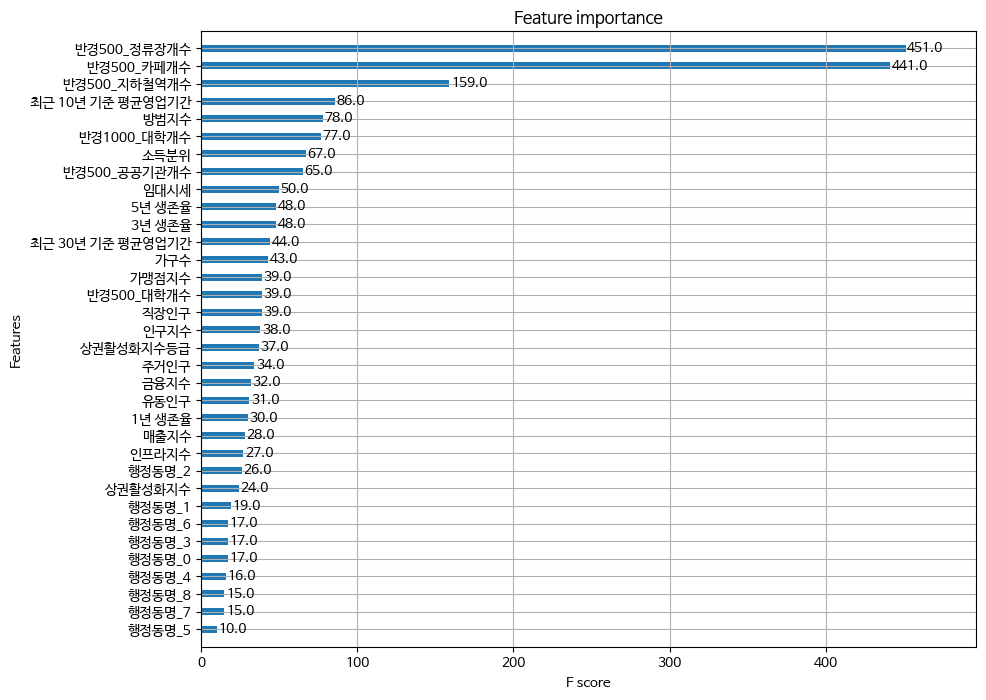

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

### X2

In [ ]:
#model 학습
xgb_clf.fit(X2_train_re, y2_train_re)

#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X2_train_re, y2_train_re, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X2_train_re, y2_train_re), (X2_test, y2_test)])

print(gridcv.best_params_)

#구한 best parameter로 적합한 이후 다시 roc score 계산
#best param에 대한 코드 있어야함
xgb_roc_score = roc_auc_score(y2_test, gridcv.predict_proba(X2_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.86760	validation_1-auc:0.78583
[1]	validation_0-auc:0.89154	validation_1-auc:0.77819
[2]	validation_0-auc:0.93046	validation_1-auc:0.77299
[3]	validation_0-auc:0.94357	validation_1-auc:0.75724
[4]	validation_0-auc:0.96319	validation_1-auc:0.76069
[5]	validation_0-auc:0.96763	validation_1-auc:0.76672
[6]	validation_0-auc:0.97234	validation_1-auc:0.76948


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97669	validation_1-auc:0.77131
[8]	validation_0-auc:0.98026	validation_1-auc:0.76572
[9]	validation_0-auc:0.98194	validation_1-auc:0.76410
[10]	validation_0-auc:0.98303	validation_1-auc:0.76476
[11]	validation_0-auc:0.98468	validation_1-auc:0.76808
[12]	validation_0-auc:0.98659	validation_1-auc:0.76644
[13]	validation_0-auc:0.98638	validation_1-auc:0.76561
[14]	validation_0-auc:0.98789	validation_1-auc:0.76464
[15]	validation_0-auc:0.98841	validation_1-auc:0.76726
[16]	validation_0-auc:0.99037	validation_1-auc:0.76461
[17]	validation_0-auc:0.99120	validation_1-auc:0.76261
[18]	validation_0-auc:0.99237	validation_1-auc:0.76310
[19]	validation_0-auc:0.99355	validation_1-auc:0.76452
[20]	validation_0-auc:0.99372	validation_1-auc:0.77109
[21]	validation_0-auc:0.99442	validation_1-auc:0.76679
[22]	validation_0-auc:0.99460	validation_1-auc:0.77059
[23]	validation_0-auc:0.99488	validation_1-auc:0.76580
[24]	validation_0-auc:0.99519	validation_1-auc:0.76535
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97543	validation_1-auc:0.78397
[8]	validation_0-auc:0.98003	validation_1-auc:0.78269
[9]	validation_0-auc:0.98113	validation_1-auc:0.78331
[10]	validation_0-auc:0.98209	validation_1-auc:0.78162
[11]	validation_0-auc:0.98381	validation_1-auc:0.78329
[12]	validation_0-auc:0.98670	validation_1-auc:0.77701
[13]	validation_0-auc:0.98755	validation_1-auc:0.77574
[14]	validation_0-auc:0.98816	validation_1-auc:0.77361
[15]	validation_0-auc:0.98833	validation_1-auc:0.77672
[16]	validation_0-auc:0.98881	validation_1-auc:0.77076
[17]	validation_0-auc:0.98939	validation_1-auc:0.76500
[18]	validation_0-auc:0.99020	validation_1-auc:0.76042
[19]	validation_0-auc:0.99129	validation_1-auc:0.75539
[20]	validation_0-auc:0.99169	validation_1-auc:0.76319
[21]	validation_0-auc:0.99263	validation_1-auc:0.75908
[22]	validation_0-auc:0.99269	validation_1-auc:0.76441
[23]	validation_0-auc:0.99295	validation_1-auc:0.76142
[24]	validation_0-auc:0.99328	validation_1-auc:0.76137
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.97312	validation_1-auc:0.77539
[7]	validation_0-auc:0.97534	validation_1-auc:0.77856
[8]	validation_0-auc:0.98037	validation_1-auc:0.77104
[9]	validation_0-auc:0.98163	validation_1-auc:0.77659
[10]	validation_0-auc:0.98354	validation_1-auc:0.76869
[11]	validation_0-auc:0.98519	validation_1-auc:0.77379
[12]	validation_0-auc:0.98802	validation_1-auc:0.76641
[13]	validation_0-auc:0.98839	validation_1-auc:0.76598
[14]	validation_0-auc:0.98892	validation_1-auc:0.76939
[15]	validation_0-auc:0.98912	validation_1-auc:0.77669
[16]	validation_0-auc:0.99016	validation_1-auc:0.77084
[17]	validation_0-auc:0.99170	validation_1-auc:0.76564
[18]	validation_0-auc:0.99295	validation_1-auc:0.76202
[19]	validation_0-auc:0.99358	validation_1-auc:0.75798
[20]	validation_0-auc:0.99383	validation_1-auc:0.76498
[21]	validation_0-auc:0.99411	validation_1-auc:0.76519
[22]	validation_0-auc:0.99460	validation_1-auc:0.76940
[23]	validation_0-auc:0.99493	validation_1-auc:0.76427
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97667	validation_1-auc:0.77110
[8]	validation_0-auc:0.98010	validation_1-auc:0.76423
[9]	validation_0-auc:0.98117	validation_1-auc:0.76355
[10]	validation_0-auc:0.98232	validation_1-auc:0.76593
[11]	validation_0-auc:0.98374	validation_1-auc:0.76553
[12]	validation_0-auc:0.98482	validation_1-auc:0.75901
[13]	validation_0-auc:0.98718	validation_1-auc:0.76084
[14]	validation_0-auc:0.98870	validation_1-auc:0.76232
[15]	validation_0-auc:0.98884	validation_1-auc:0.76713
[16]	validation_0-auc:0.99019	validation_1-auc:0.76473
[17]	validation_0-auc:0.99116	validation_1-auc:0.76040
[18]	validation_0-auc:0.99265	validation_1-auc:0.75724
[19]	validation_0-auc:0.99298	validation_1-auc:0.74921
[20]	validation_0-auc:0.99324	validation_1-auc:0.75467
[21]	validation_0-auc:0.99428	validation_1-auc:0.75145
[22]	validation_0-auc:0.99461	validation_1-auc:0.75406
[23]	validation_0-auc:0.99468	validation_1-auc:0.75763
[24]	validation_0-auc:0.99484	validation_1-auc:0.75697
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97977	validation_1-auc:0.78338
[9]	validation_0-auc:0.98102	validation_1-auc:0.78413
[10]	validation_0-auc:0.98205	validation_1-auc:0.78478
[11]	validation_0-auc:0.98408	validation_1-auc:0.78234
[12]	validation_0-auc:0.98663	validation_1-auc:0.77634
[13]	validation_0-auc:0.98741	validation_1-auc:0.77011
[14]	validation_0-auc:0.98827	validation_1-auc:0.77086
[15]	validation_0-auc:0.98840	validation_1-auc:0.77791
[16]	validation_0-auc:0.98854	validation_1-auc:0.77221
[17]	validation_0-auc:0.98986	validation_1-auc:0.76641
[18]	validation_0-auc:0.99074	validation_1-auc:0.76208
[19]	validation_0-auc:0.99173	validation_1-auc:0.75758
[20]	validation_0-auc:0.99186	validation_1-auc:0.76610
[21]	validation_0-auc:0.99260	validation_1-auc:0.76608
[22]	validation_0-auc:0.99298	validation_1-auc:0.76232
[23]	validation_0-auc:0.99363	validation_1-auc:0.75906
[24]	validation_0-auc:0.99405	validation_1-auc:0.75758
[25]	validation_0-auc:0.99418	validation_1-auc:0.75977
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97590	validation_1-auc:0.77649
[8]	validation_0-auc:0.97956	validation_1-auc:0.77106
[9]	validation_0-auc:0.98124	validation_1-auc:0.77229
[10]	validation_0-auc:0.98262	validation_1-auc:0.76956
[11]	validation_0-auc:0.98553	validation_1-auc:0.77267
[12]	validation_0-auc:0.98641	validation_1-auc:0.76525
[13]	validation_0-auc:0.98728	validation_1-auc:0.76903
[14]	validation_0-auc:0.98812	validation_1-auc:0.76853
[15]	validation_0-auc:0.98816	validation_1-auc:0.77419
[16]	validation_0-auc:0.98918	validation_1-auc:0.77076
[17]	validation_0-auc:0.99021	validation_1-auc:0.76634
[18]	validation_0-auc:0.99114	validation_1-auc:0.76325
[19]	validation_0-auc:0.99205	validation_1-auc:0.76063
[20]	validation_0-auc:0.99209	validation_1-auc:0.76747
[21]	validation_0-auc:0.99300	validation_1-auc:0.76240
[22]	validation_0-auc:0.99355	validation_1-auc:0.76552
[23]	validation_0-auc:0.99376	validation_1-auc:0.76625
[24]	validation_0-auc:0.99387	validation_1-auc:0.77123
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.97220	validation_1-auc:0.76914
[7]	validation_0-auc:0.97660	validation_1-auc:0.77087
[8]	validation_0-auc:0.98024	validation_1-auc:0.76370
[9]	validation_0-auc:0.98140	validation_1-auc:0.76076
[10]	validation_0-auc:0.98245	validation_1-auc:0.76526
[11]	validation_0-auc:0.98444	validation_1-auc:0.76349
[12]	validation_0-auc:0.98490	validation_1-auc:0.75830
[13]	validation_0-auc:0.98661	validation_1-auc:0.76268
[14]	validation_0-auc:0.98796	validation_1-auc:0.76087
[15]	validation_0-auc:0.98921	validation_1-auc:0.76571
[16]	validation_0-auc:0.99043	validation_1-auc:0.76062
[17]	validation_0-auc:0.99130	validation_1-auc:0.75961
[18]	validation_0-auc:0.99244	validation_1-auc:0.75888
[19]	validation_0-auc:0.99283	validation_1-auc:0.75366
[20]	validation_0-auc:0.99314	validation_1-auc:0.75344
[21]	validation_0-auc:0.99382	validation_1-auc:0.75279
[22]	validation_0-auc:0.99407	validation_1-auc:0.75759
[23]	validation_0-auc:0.99432	validation_1-auc:0.75520
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97538	validation_1-auc:0.78447
[8]	validation_0-auc:0.97975	validation_1-auc:0.78439
[9]	validation_0-auc:0.98097	validation_1-auc:0.78471
[10]	validation_0-auc:0.98193	validation_1-auc:0.78625
[11]	validation_0-auc:0.98344	validation_1-auc:0.78715
[12]	validation_0-auc:0.98610	validation_1-auc:0.78065
[13]	validation_0-auc:0.98647	validation_1-auc:0.77648
[14]	validation_0-auc:0.98760	validation_1-auc:0.77325
[15]	validation_0-auc:0.98789	validation_1-auc:0.77362
[16]	validation_0-auc:0.98920	validation_1-auc:0.77067
[17]	validation_0-auc:0.98999	validation_1-auc:0.76551
[18]	validation_0-auc:0.99151	validation_1-auc:0.76507
[19]	validation_0-auc:0.99231	validation_1-auc:0.75930
[20]	validation_0-auc:0.99227	validation_1-auc:0.76366
[21]	validation_0-auc:0.99312	validation_1-auc:0.76321
[22]	validation_0-auc:0.99318	validation_1-auc:0.76656
[23]	validation_0-auc:0.99352	validation_1-auc:0.76378
[24]	validation_0-auc:0.99381	validation_1-auc:0.76315
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97370	validation_1-auc:0.77565
[8]	validation_0-auc:0.97867	validation_1-auc:0.77463
[9]	validation_0-auc:0.97974	validation_1-auc:0.77657
[10]	validation_0-auc:0.98174	validation_1-auc:0.77689
[11]	validation_0-auc:0.98518	validation_1-auc:0.77907
[12]	validation_0-auc:0.98695	validation_1-auc:0.76915
[13]	validation_0-auc:0.98770	validation_1-auc:0.77403
[14]	validation_0-auc:0.98819	validation_1-auc:0.77212
[15]	validation_0-auc:0.98846	validation_1-auc:0.77651
[16]	validation_0-auc:0.98983	validation_1-auc:0.77106
[17]	validation_0-auc:0.99137	validation_1-auc:0.77033
[18]	validation_0-auc:0.99243	validation_1-auc:0.76778
[19]	validation_0-auc:0.99306	validation_1-auc:0.76538
[20]	validation_0-auc:0.99333	validation_1-auc:0.77115
[21]	validation_0-auc:0.99408	validation_1-auc:0.77177
[22]	validation_0-auc:0.99430	validation_1-auc:0.77409
[23]	validation_0-auc:0.99460	validation_1-auc:0.77227
[24]	validation_0-auc:0.99478	validation_1-auc:0.77283
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98723	validation_1-auc:0.74752
[6]	validation_0-auc:0.98876	validation_1-auc:0.74586
[7]	validation_0-auc:0.99053	validation_1-auc:0.74302
[8]	validation_0-auc:0.99324	validation_1-auc:0.73378
[9]	validation_0-auc:0.99406	validation_1-auc:0.73342
[10]	validation_0-auc:0.99506	validation_1-auc:0.73735
[11]	validation_0-auc:0.99561	validation_1-auc:0.73910
[12]	validation_0-auc:0.99631	validation_1-auc:0.73002
[13]	validation_0-auc:0.99679	validation_1-auc:0.73172
[14]	validation_0-auc:0.99706	validation_1-auc:0.73186
[15]	validation_0-auc:0.99721	validation_1-auc:0.73805
[16]	validation_0-auc:0.99734	validation_1-auc:0.73050
[17]	validation_0-auc:0.99755	validation_1-auc:0.71840
[18]	validation_0-auc:0.99788	validation_1-auc:0.71512
[19]	validation_0-auc:0.99814	validation_1-auc:0.71795
[20]	validation_0-auc:0.99821	validation_1-auc:0.72969
[21]	validation_0-auc:0.99839	validation_1-auc:0.72844
[22]	validation_0-auc:0.99858	validation_1-auc:0.73736
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.97531	validation_1-auc:0.76714
[4]	validation_0-auc:0.98361	validation_1-auc:0.76346
[5]	validation_0-auc:0.98704	validation_1-auc:0.75806
[6]	validation_0-auc:0.99028	validation_1-auc:0.75285
[7]	validation_0-auc:0.99158	validation_1-auc:0.74879
[8]	validation_0-auc:0.99386	validation_1-auc:0.73076
[9]	validation_0-auc:0.99465	validation_1-auc:0.73641
[10]	validation_0-auc:0.99510	validation_1-auc:0.72703
[11]	validation_0-auc:0.99553	validation_1-auc:0.73269
[12]	validation_0-auc:0.99640	validation_1-auc:0.72360
[13]	validation_0-auc:0.99678	validation_1-auc:0.71719
[14]	validation_0-auc:0.99721	validation_1-auc:0.72038
[15]	validation_0-auc:0.99747	validation_1-auc:0.73246
[16]	validation_0-auc:0.99795	validation_1-auc:0.72557
[17]	validation_0-auc:0.99815	validation_1-auc:0.72286
[18]	validation_0-auc:0.99831	validation_1-auc:0.71392
[19]	validation_0-auc:0.99853	validation_1-auc:0.70519
[20]	validation_0-auc:0.99866	validation_1-auc:0.71976
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98649	validation_1-auc:0.75440
[6]	validation_0-auc:0.98882	validation_1-auc:0.75137
[7]	validation_0-auc:0.99088	validation_1-auc:0.75660
[8]	validation_0-auc:0.99220	validation_1-auc:0.75247
[9]	validation_0-auc:0.99308	validation_1-auc:0.75647
[10]	validation_0-auc:0.99365	validation_1-auc:0.75677
[11]	validation_0-auc:0.99487	validation_1-auc:0.75586
[12]	validation_0-auc:0.99578	validation_1-auc:0.74767
[13]	validation_0-auc:0.99638	validation_1-auc:0.74884
[14]	validation_0-auc:0.99673	validation_1-auc:0.74902
[15]	validation_0-auc:0.99697	validation_1-auc:0.75441
[16]	validation_0-auc:0.99722	validation_1-auc:0.75015
[17]	validation_0-auc:0.99742	validation_1-auc:0.74419
[18]	validation_0-auc:0.99772	validation_1-auc:0.73898
[19]	validation_0-auc:0.99797	validation_1-auc:0.73313
[20]	validation_0-auc:0.99801	validation_1-auc:0.73964
[21]	validation_0-auc:0.99814	validation_1-auc:0.74126
[22]	validation_0-auc:0.99824	validation_1-auc:0.74923
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98695	validation_1-auc:0.75885
[6]	validation_0-auc:0.98820	validation_1-auc:0.75417
[7]	validation_0-auc:0.98998	validation_1-auc:0.75100
[8]	validation_0-auc:0.99275	validation_1-auc:0.74200
[9]	validation_0-auc:0.99343	validation_1-auc:0.74297
[10]	validation_0-auc:0.99403	validation_1-auc:0.74267
[11]	validation_0-auc:0.99487	validation_1-auc:0.75045
[12]	validation_0-auc:0.99590	validation_1-auc:0.74057
[13]	validation_0-auc:0.99636	validation_1-auc:0.73402
[14]	validation_0-auc:0.99667	validation_1-auc:0.73836
[15]	validation_0-auc:0.99696	validation_1-auc:0.74117
[16]	validation_0-auc:0.99722	validation_1-auc:0.73738
[17]	validation_0-auc:0.99727	validation_1-auc:0.73002
[18]	validation_0-auc:0.99773	validation_1-auc:0.72368
[19]	validation_0-auc:0.99805	validation_1-auc:0.71961
[20]	validation_0-auc:0.99812	validation_1-auc:0.73205
[21]	validation_0-auc:0.99830	validation_1-auc:0.73197
[22]	validation_0-auc:0.99844	validation_1-auc:0.74257
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98953	validation_1-auc:0.74460
[7]	validation_0-auc:0.99157	validation_1-auc:0.73685
[8]	validation_0-auc:0.99337	validation_1-auc:0.72598
[9]	validation_0-auc:0.99390	validation_1-auc:0.73396
[10]	validation_0-auc:0.99495	validation_1-auc:0.73587
[11]	validation_0-auc:0.99570	validation_1-auc:0.73629
[12]	validation_0-auc:0.99632	validation_1-auc:0.72176
[13]	validation_0-auc:0.99663	validation_1-auc:0.71524
[14]	validation_0-auc:0.99696	validation_1-auc:0.71188
[15]	validation_0-auc:0.99717	validation_1-auc:0.72970
[16]	validation_0-auc:0.99732	validation_1-auc:0.72230
[17]	validation_0-auc:0.99755	validation_1-auc:0.71682
[18]	validation_0-auc:0.99799	validation_1-auc:0.71615
[19]	validation_0-auc:0.99837	validation_1-auc:0.71158
[20]	validation_0-auc:0.99848	validation_1-auc:0.72790
[21]	validation_0-auc:0.99862	validation_1-auc:0.72930
[22]	validation_0-auc:0.99867	validation_1-auc:0.73373
[23]	validation_0-auc:0.99877	validation_1-auc:0.73333
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98755	validation_1-auc:0.75074
[7]	validation_0-auc:0.99067	validation_1-auc:0.75083
[8]	validation_0-auc:0.99275	validation_1-auc:0.73549
[9]	validation_0-auc:0.99341	validation_1-auc:0.73955
[10]	validation_0-auc:0.99401	validation_1-auc:0.74062
[11]	validation_0-auc:0.99496	validation_1-auc:0.74431
[12]	validation_0-auc:0.99589	validation_1-auc:0.73442
[13]	validation_0-auc:0.99610	validation_1-auc:0.73846
[14]	validation_0-auc:0.99642	validation_1-auc:0.73439
[15]	validation_0-auc:0.99656	validation_1-auc:0.74097
[16]	validation_0-auc:0.99672	validation_1-auc:0.72689
[17]	validation_0-auc:0.99700	validation_1-auc:0.72236
[18]	validation_0-auc:0.99738	validation_1-auc:0.72086
[19]	validation_0-auc:0.99751	validation_1-auc:0.71431
[20]	validation_0-auc:0.99770	validation_1-auc:0.72978
[21]	validation_0-auc:0.99780	validation_1-auc:0.72832
[22]	validation_0-auc:0.99789	validation_1-auc:0.73617
[23]	validation_0-auc:0.99796	validation_1-auc:0.73312
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98969	validation_1-auc:0.74541
[7]	validation_0-auc:0.99164	validation_1-auc:0.74654
[8]	validation_0-auc:0.99313	validation_1-auc:0.73971
[9]	validation_0-auc:0.99363	validation_1-auc:0.74065
[10]	validation_0-auc:0.99402	validation_1-auc:0.73814
[11]	validation_0-auc:0.99442	validation_1-auc:0.74174
[12]	validation_0-auc:0.99555	validation_1-auc:0.73437
[13]	validation_0-auc:0.99607	validation_1-auc:0.72953
[14]	validation_0-auc:0.99626	validation_1-auc:0.72798
[15]	validation_0-auc:0.99640	validation_1-auc:0.73844
[16]	validation_0-auc:0.99698	validation_1-auc:0.73860
[17]	validation_0-auc:0.99746	validation_1-auc:0.73148
[18]	validation_0-auc:0.99773	validation_1-auc:0.73017
[19]	validation_0-auc:0.99796	validation_1-auc:0.72369
[20]	validation_0-auc:0.99804	validation_1-auc:0.73129
[21]	validation_0-auc:0.99810	validation_1-auc:0.72966
[22]	validation_0-auc:0.99812	validation_1-auc:0.73697
[23]	validation_0-auc:0.99823	validation_1-auc:0.73670
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98665	validation_1-auc:0.75420
[6]	validation_0-auc:0.98922	validation_1-auc:0.73948
[7]	validation_0-auc:0.99125	validation_1-auc:0.73410
[8]	validation_0-auc:0.99262	validation_1-auc:0.72419
[9]	validation_0-auc:0.99292	validation_1-auc:0.72901
[10]	validation_0-auc:0.99367	validation_1-auc:0.72908
[11]	validation_0-auc:0.99424	validation_1-auc:0.72889
[12]	validation_0-auc:0.99506	validation_1-auc:0.71504
[13]	validation_0-auc:0.99574	validation_1-auc:0.71635
[14]	validation_0-auc:0.99628	validation_1-auc:0.71999
[15]	validation_0-auc:0.99652	validation_1-auc:0.73493
[16]	validation_0-auc:0.99694	validation_1-auc:0.72345
[17]	validation_0-auc:0.99713	validation_1-auc:0.72018
[18]	validation_0-auc:0.99752	validation_1-auc:0.72451
[19]	validation_0-auc:0.99786	validation_1-auc:0.72125
[20]	validation_0-auc:0.99792	validation_1-auc:0.72955
[21]	validation_0-auc:0.99795	validation_1-auc:0.72889
[22]	validation_0-auc:0.99811	validation_1-auc:0.73941
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98702	validation_1-auc:0.75217
[7]	validation_0-auc:0.98978	validation_1-auc:0.75478
[8]	validation_0-auc:0.99170	validation_1-auc:0.75126
[9]	validation_0-auc:0.99236	validation_1-auc:0.75481
[10]	validation_0-auc:0.99311	validation_1-auc:0.75706
[11]	validation_0-auc:0.99386	validation_1-auc:0.75883
[12]	validation_0-auc:0.99471	validation_1-auc:0.74968
[13]	validation_0-auc:0.99517	validation_1-auc:0.74779
[14]	validation_0-auc:0.99571	validation_1-auc:0.74691
[15]	validation_0-auc:0.99597	validation_1-auc:0.75242
[16]	validation_0-auc:0.99619	validation_1-auc:0.75032
[17]	validation_0-auc:0.99650	validation_1-auc:0.73840
[18]	validation_0-auc:0.99687	validation_1-auc:0.73652
[19]	validation_0-auc:0.99715	validation_1-auc:0.73055
[20]	validation_0-auc:0.99731	validation_1-auc:0.74259
[21]	validation_0-auc:0.99754	validation_1-auc:0.74285
[22]	validation_0-auc:0.99767	validation_1-auc:0.74925
[23]	validation_0-auc:0.99775	validation_1-auc:0.74553
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99488	validation_1-auc:0.71514
[6]	validation_0-auc:0.99615	validation_1-auc:0.70921
[7]	validation_0-auc:0.99692	validation_1-auc:0.70974
[8]	validation_0-auc:0.99788	validation_1-auc:0.69308
[9]	validation_0-auc:0.99821	validation_1-auc:0.69989
[10]	validation_0-auc:0.99830	validation_1-auc:0.70650
[11]	validation_0-auc:0.99857	validation_1-auc:0.70864
[12]	validation_0-auc:0.99883	validation_1-auc:0.69979
[13]	validation_0-auc:0.99903	validation_1-auc:0.69376
[14]	validation_0-auc:0.99913	validation_1-auc:0.70225
[15]	validation_0-auc:0.99918	validation_1-auc:0.71123
[16]	validation_0-auc:0.99919	validation_1-auc:0.70046
[17]	validation_0-auc:0.99924	validation_1-auc:0.69722
[18]	validation_0-auc:0.99933	validation_1-auc:0.68972
[19]	validation_0-auc:0.99939	validation_1-auc:0.68718
[20]	validation_0-auc:0.99944	validation_1-auc:0.71284
[21]	validation_0-auc:0.99947	validation_1-auc:0.70671
[22]	validation_0-auc:0.99950	validation_1-auc:0.72120
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99249	validation_1-auc:0.72826
[5]	validation_0-auc:0.99409	validation_1-auc:0.72843
[6]	validation_0-auc:0.99564	validation_1-auc:0.71766
[7]	validation_0-auc:0.99673	validation_1-auc:0.72381
[8]	validation_0-auc:0.99777	validation_1-auc:0.71001
[9]	validation_0-auc:0.99812	validation_1-auc:0.71274
[10]	validation_0-auc:0.99854	validation_1-auc:0.70777
[11]	validation_0-auc:0.99878	validation_1-auc:0.71159
[12]	validation_0-auc:0.99897	validation_1-auc:0.70135
[13]	validation_0-auc:0.99913	validation_1-auc:0.69621
[14]	validation_0-auc:0.99930	validation_1-auc:0.69236
[15]	validation_0-auc:0.99942	validation_1-auc:0.70855
[16]	validation_0-auc:0.99947	validation_1-auc:0.70507
[17]	validation_0-auc:0.99949	validation_1-auc:0.69608
[18]	validation_0-auc:0.99957	validation_1-auc:0.69463
[19]	validation_0-auc:0.99963	validation_1-auc:0.69437
[20]	validation_0-auc:0.99965	validation_1-auc:0.71966
[21]	validation_0-auc:0.99965	validation_1-auc:0.72088
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99240	validation_1-auc:0.70978
[5]	validation_0-auc:0.99363	validation_1-auc:0.70151
[6]	validation_0-auc:0.99518	validation_1-auc:0.70909
[7]	validation_0-auc:0.99550	validation_1-auc:0.70584
[8]	validation_0-auc:0.99638	validation_1-auc:0.69596
[9]	validation_0-auc:0.99688	validation_1-auc:0.69892
[10]	validation_0-auc:0.99730	validation_1-auc:0.69939
[11]	validation_0-auc:0.99778	validation_1-auc:0.70071
[12]	validation_0-auc:0.99804	validation_1-auc:0.69235
[13]	validation_0-auc:0.99829	validation_1-auc:0.69107
[14]	validation_0-auc:0.99831	validation_1-auc:0.69188
[15]	validation_0-auc:0.99838	validation_1-auc:0.71363
[16]	validation_0-auc:0.99841	validation_1-auc:0.70720
[17]	validation_0-auc:0.99847	validation_1-auc:0.70042
[18]	validation_0-auc:0.99855	validation_1-auc:0.69446
[19]	validation_0-auc:0.99861	validation_1-auc:0.68843
[20]	validation_0-auc:0.99869	validation_1-auc:0.71016
[21]	validation_0-auc:0.99876	validation_1-auc:0.70983
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99294	validation_1-auc:0.75245
[5]	validation_0-auc:0.99476	validation_1-auc:0.74184
[6]	validation_0-auc:0.99556	validation_1-auc:0.74544
[7]	validation_0-auc:0.99607	validation_1-auc:0.74323
[8]	validation_0-auc:0.99710	validation_1-auc:0.73168
[9]	validation_0-auc:0.99740	validation_1-auc:0.73288
[10]	validation_0-auc:0.99763	validation_1-auc:0.74269
[11]	validation_0-auc:0.99794	validation_1-auc:0.73818
[12]	validation_0-auc:0.99826	validation_1-auc:0.72591
[13]	validation_0-auc:0.99834	validation_1-auc:0.72502
[14]	validation_0-auc:0.99839	validation_1-auc:0.72215
[15]	validation_0-auc:0.99860	validation_1-auc:0.73574
[16]	validation_0-auc:0.99884	validation_1-auc:0.72931
[17]	validation_0-auc:0.99891	validation_1-auc:0.72209
[18]	validation_0-auc:0.99898	validation_1-auc:0.70914
[19]	validation_0-auc:0.99910	validation_1-auc:0.70556
[20]	validation_0-auc:0.99913	validation_1-auc:0.72492
[21]	validation_0-auc:0.99923	validation_1-auc:0.72086
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99357	validation_1-auc:0.72478
[6]	validation_0-auc:0.99470	validation_1-auc:0.71624
[7]	validation_0-auc:0.99583	validation_1-auc:0.71566
[8]	validation_0-auc:0.99674	validation_1-auc:0.70398
[9]	validation_0-auc:0.99728	validation_1-auc:0.71591
[10]	validation_0-auc:0.99782	validation_1-auc:0.72146
[11]	validation_0-auc:0.99819	validation_1-auc:0.72507
[12]	validation_0-auc:0.99833	validation_1-auc:0.71306
[13]	validation_0-auc:0.99854	validation_1-auc:0.70752
[14]	validation_0-auc:0.99866	validation_1-auc:0.70469
[15]	validation_0-auc:0.99870	validation_1-auc:0.71830
[16]	validation_0-auc:0.99889	validation_1-auc:0.70961
[17]	validation_0-auc:0.99897	validation_1-auc:0.70050
[18]	validation_0-auc:0.99912	validation_1-auc:0.69744
[19]	validation_0-auc:0.99928	validation_1-auc:0.69337
[20]	validation_0-auc:0.99931	validation_1-auc:0.71259
[21]	validation_0-auc:0.99935	validation_1-auc:0.71353
[22]	validation_0-auc:0.99944	validation_1-auc:0.73245
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99376	validation_1-auc:0.71286
[6]	validation_0-auc:0.99505	validation_1-auc:0.72125
[7]	validation_0-auc:0.99572	validation_1-auc:0.71847
[8]	validation_0-auc:0.99641	validation_1-auc:0.70758
[9]	validation_0-auc:0.99664	validation_1-auc:0.70800
[10]	validation_0-auc:0.99681	validation_1-auc:0.70954
[11]	validation_0-auc:0.99731	validation_1-auc:0.70787
[12]	validation_0-auc:0.99769	validation_1-auc:0.70299
[13]	validation_0-auc:0.99791	validation_1-auc:0.70767
[14]	validation_0-auc:0.99803	validation_1-auc:0.71227
[15]	validation_0-auc:0.99817	validation_1-auc:0.72174
[16]	validation_0-auc:0.99830	validation_1-auc:0.71754
[17]	validation_0-auc:0.99841	validation_1-auc:0.71088
[18]	validation_0-auc:0.99857	validation_1-auc:0.71534
[19]	validation_0-auc:0.99863	validation_1-auc:0.71241
[20]	validation_0-auc:0.99869	validation_1-auc:0.72479
[21]	validation_0-auc:0.99882	validation_1-auc:0.72204
[22]	validation_0-auc:0.99889	validation_1-auc:0.73496
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99337	validation_1-auc:0.74250
[6]	validation_0-auc:0.99438	validation_1-auc:0.74569
[7]	validation_0-auc:0.99518	validation_1-auc:0.74105
[8]	validation_0-auc:0.99611	validation_1-auc:0.72627
[9]	validation_0-auc:0.99658	validation_1-auc:0.72626
[10]	validation_0-auc:0.99697	validation_1-auc:0.72395
[11]	validation_0-auc:0.99760	validation_1-auc:0.73073
[12]	validation_0-auc:0.99800	validation_1-auc:0.72265
[13]	validation_0-auc:0.99815	validation_1-auc:0.71717
[14]	validation_0-auc:0.99835	validation_1-auc:0.72287
[15]	validation_0-auc:0.99843	validation_1-auc:0.73165
[16]	validation_0-auc:0.99860	validation_1-auc:0.72462
[17]	validation_0-auc:0.99874	validation_1-auc:0.71904
[18]	validation_0-auc:0.99883	validation_1-auc:0.71567
[19]	validation_0-auc:0.99890	validation_1-auc:0.71285
[20]	validation_0-auc:0.99896	validation_1-auc:0.73039
[21]	validation_0-auc:0.99903	validation_1-auc:0.72746
[22]	validation_0-auc:0.99909	validation_1-auc:0.73900
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99296	validation_1-auc:0.73472
[6]	validation_0-auc:0.99425	validation_1-auc:0.72611
[7]	validation_0-auc:0.99512	validation_1-auc:0.72884
[8]	validation_0-auc:0.99609	validation_1-auc:0.70677
[9]	validation_0-auc:0.99657	validation_1-auc:0.71092
[10]	validation_0-auc:0.99700	validation_1-auc:0.71078
[11]	validation_0-auc:0.99768	validation_1-auc:0.71386
[12]	validation_0-auc:0.99797	validation_1-auc:0.70934
[13]	validation_0-auc:0.99825	validation_1-auc:0.70823
[14]	validation_0-auc:0.99859	validation_1-auc:0.70896
[15]	validation_0-auc:0.99872	validation_1-auc:0.72382
[16]	validation_0-auc:0.99887	validation_1-auc:0.71385
[17]	validation_0-auc:0.99899	validation_1-auc:0.70982
[18]	validation_0-auc:0.99911	validation_1-auc:0.71488
[19]	validation_0-auc:0.99920	validation_1-auc:0.70534
[20]	validation_0-auc:0.99923	validation_1-auc:0.72651
[21]	validation_0-auc:0.99931	validation_1-auc:0.72163
[22]	validation_0-auc:0.99938	validation_1-auc:0.73040
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99242	validation_1-auc:0.70850
[6]	validation_0-auc:0.99403	validation_1-auc:0.71744
[7]	validation_0-auc:0.99497	validation_1-auc:0.71737
[8]	validation_0-auc:0.99585	validation_1-auc:0.70305
[9]	validation_0-auc:0.99645	validation_1-auc:0.70273
[10]	validation_0-auc:0.99678	validation_1-auc:0.70166
[11]	validation_0-auc:0.99717	validation_1-auc:0.70122
[12]	validation_0-auc:0.99753	validation_1-auc:0.70351
[13]	validation_0-auc:0.99782	validation_1-auc:0.70646
[14]	validation_0-auc:0.99796	validation_1-auc:0.70588
[15]	validation_0-auc:0.99807	validation_1-auc:0.72136
[16]	validation_0-auc:0.99821	validation_1-auc:0.71152
[17]	validation_0-auc:0.99837	validation_1-auc:0.70664
[18]	validation_0-auc:0.99844	validation_1-auc:0.70247
[19]	validation_0-auc:0.99851	validation_1-auc:0.69958
[20]	validation_0-auc:0.99857	validation_1-auc:0.71564
[21]	validation_0-auc:0.99862	validation_1-auc:0.71550
[22]	validation_0-auc:0.99870	validation_1-auc:0.72878
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.96137	validation_1-auc:0.78272
[6]	validation_0-auc:0.96882	validation_1-auc:0.77744
[7]	validation_0-auc:0.97350	validation_1-auc:0.77147
[8]	validation_0-auc:0.97644	validation_1-auc:0.76939
[9]	validation_0-auc:0.97965	validation_1-auc:0.76939
[10]	validation_0-auc:0.98058	validation_1-auc:0.76755
[11]	validation_0-auc:0.98404	validation_1-auc:0.75887
[12]	validation_0-auc:0.98616	validation_1-auc:0.75961
[13]	validation_0-auc:0.98819	validation_1-auc:0.75652
[14]	validation_0-auc:0.98839	validation_1-auc:0.75759
[15]	validation_0-auc:0.98947	validation_1-auc:0.75268
[16]	validation_0-auc:0.99035	validation_1-auc:0.75054
[17]	validation_0-auc:0.99164	validation_1-auc:0.74795
[18]	validation_0-auc:0.99276	validation_1-auc:0.75316
[19]	validation_0-auc:0.99364	validation_1-auc:0.75184
[20]	validation_0-auc:0.99372	validation_1-auc:0.75460
[21]	validation_0-auc:0.99414	validation_1-auc:0.75448
[22]	validation_0-auc:0.99479	validation_1-auc:0.75550
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.96102	validation_1-auc:0.78075
[6]	validation_0-auc:0.96557	validation_1-auc:0.78270
[7]	validation_0-auc:0.97210	validation_1-auc:0.77509
[8]	validation_0-auc:0.97397	validation_1-auc:0.77586
[9]	validation_0-auc:0.97542	validation_1-auc:0.77334
[10]	validation_0-auc:0.97676	validation_1-auc:0.77270
[11]	validation_0-auc:0.97878	validation_1-auc:0.77019
[12]	validation_0-auc:0.98164	validation_1-auc:0.77135
[13]	validation_0-auc:0.98495	validation_1-auc:0.76343
[14]	validation_0-auc:0.98683	validation_1-auc:0.76230
[15]	validation_0-auc:0.98772	validation_1-auc:0.76047
[16]	validation_0-auc:0.98933	validation_1-auc:0.75397
[17]	validation_0-auc:0.98979	validation_1-auc:0.75324
[18]	validation_0-auc:0.99117	validation_1-auc:0.75479
[19]	validation_0-auc:0.99211	validation_1-auc:0.75400
[20]	validation_0-auc:0.99263	validation_1-auc:0.74999
[21]	validation_0-auc:0.99319	validation_1-auc:0.74687
[22]	validation_0-auc:0.99415	validation_1-auc:0.74904
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.96297	validation_1-auc:0.77661
[6]	validation_0-auc:0.96810	validation_1-auc:0.78033
[7]	validation_0-auc:0.97703	validation_1-auc:0.78484
[8]	validation_0-auc:0.97816	validation_1-auc:0.78604
[9]	validation_0-auc:0.98096	validation_1-auc:0.78591
[10]	validation_0-auc:0.98119	validation_1-auc:0.78350
[11]	validation_0-auc:0.98381	validation_1-auc:0.77848
[12]	validation_0-auc:0.98620	validation_1-auc:0.78040
[13]	validation_0-auc:0.98745	validation_1-auc:0.78111
[14]	validation_0-auc:0.98841	validation_1-auc:0.78229
[15]	validation_0-auc:0.98929	validation_1-auc:0.77662
[16]	validation_0-auc:0.99057	validation_1-auc:0.78138
[17]	validation_0-auc:0.99087	validation_1-auc:0.77711
[18]	validation_0-auc:0.99245	validation_1-auc:0.77491
[19]	validation_0-auc:0.99290	validation_1-auc:0.77273
[20]	validation_0-auc:0.99320	validation_1-auc:0.77171
[21]	validation_0-auc:0.99394	validation_1-auc:0.77476
[22]	validation_0-auc:0.99455	validation_1-auc:0.77510
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.88225	validation_1-auc:0.79979
[1]	validation_0-auc:0.91952	validation_1-auc:0.78418
[2]	validation_0-auc:0.93966	validation_1-auc:0.78039
[3]	validation_0-auc:0.94693	validation_1-auc:0.78643
[4]	validation_0-auc:0.95555	validation_1-auc:0.79398
[5]	validation_0-auc:0.96142	validation_1-auc:0.78206
[6]	validation_0-auc:0.96884	validation_1-auc:0.77723
[7]	validation_0-auc:0.97352	validation_1-auc:0.77098
[8]	validation_0-auc:0.97624	validation_1-auc:0.76764
[9]	validation_0-auc:0.97936	validation_1-auc:0.76833
[10]	validation_0-auc:0.98127	validation_1-auc:0.76690
[11]	validation_0-auc:0.98410	validation_1-auc:0.75922
[12]	validation_0-auc:0.98545	validation_1-auc:0.75821
[13]	validation_0-auc:0.98626	validation_1-auc:0.75925
[14]	validation_0-auc:0.98668	validation_1-auc:0.75792
[15]	validation_0-auc:0.98823	validation_1-auc:0.75567
[16]	validation_0-auc:0.98943	validation_1-auc:0.75800
[17]	validation_0-auc:0.99110	validation_1-auc:0.75223
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86831	validation_1-auc:0.79786
[1]	validation_0-auc:0.91395	validation_1-auc:0.78904
[2]	validation_0-auc:0.93304	validation_1-auc:0.79385
[3]	validation_0-auc:0.94467	validation_1-auc:0.78911
[4]	validation_0-auc:0.95539	validation_1-auc:0.78540
[5]	validation_0-auc:0.96119	validation_1-auc:0.78040
[6]	validation_0-auc:0.96586	validation_1-auc:0.78353
[7]	validation_0-auc:0.97241	validation_1-auc:0.77567
[8]	validation_0-auc:0.97442	validation_1-auc:0.77396
[9]	validation_0-auc:0.97571	validation_1-auc:0.77188
[10]	validation_0-auc:0.97708	validation_1-auc:0.77156
[11]	validation_0-auc:0.97725	validation_1-auc:0.77193
[12]	validation_0-auc:0.98027	validation_1-auc:0.77474
[13]	validation_0-auc:0.98366	validation_1-auc:0.76510
[14]	validation_0-auc:0.98568	validation_1-auc:0.76222
[15]	validation_0-auc:0.98656	validation_1-auc:0.75648
[16]	validation_0-auc:0.98931	validation_1-auc:0.75544
[17]	validation_0-auc:0.99066	validation_1-auc:0.75788
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.96799	validation_1-auc:0.78005
[7]	validation_0-auc:0.97684	validation_1-auc:0.78438
[8]	validation_0-auc:0.97793	validation_1-auc:0.78526
[9]	validation_0-auc:0.98076	validation_1-auc:0.78523
[10]	validation_0-auc:0.98099	validation_1-auc:0.78284
[11]	validation_0-auc:0.98351	validation_1-auc:0.77660
[12]	validation_0-auc:0.98667	validation_1-auc:0.77616
[13]	validation_0-auc:0.98745	validation_1-auc:0.78279
[14]	validation_0-auc:0.98852	validation_1-auc:0.78339
[15]	validation_0-auc:0.99027	validation_1-auc:0.77714
[16]	validation_0-auc:0.99093	validation_1-auc:0.77192
[17]	validation_0-auc:0.99166	validation_1-auc:0.77229
[18]	validation_0-auc:0.99214	validation_1-auc:0.77040
[19]	validation_0-auc:0.99305	validation_1-auc:0.76658
[20]	validation_0-auc:0.99322	validation_1-auc:0.76629
[21]	validation_0-auc:0.99378	validation_1-auc:0.76275
[22]	validation_0-auc:0.99468	validation_1-auc:0.76129
[23]	validation_0-auc:0.99484	validation_1-auc:0.75911
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.88225	validation_1-auc:0.79979
[1]	validation_0-auc:0.91952	validation_1-auc:0.78418
[2]	validation_0-auc:0.93966	validation_1-auc:0.78039
[3]	validation_0-auc:0.94690	validation_1-auc:0.78608
[4]	validation_0-auc:0.95396	validation_1-auc:0.79384
[5]	validation_0-auc:0.96055	validation_1-auc:0.78183
[6]	validation_0-auc:0.96699	validation_1-auc:0.78169
[7]	validation_0-auc:0.97301	validation_1-auc:0.77456
[8]	validation_0-auc:0.97593	validation_1-auc:0.77193
[9]	validation_0-auc:0.97753	validation_1-auc:0.77123
[10]	validation_0-auc:0.97843	validation_1-auc:0.76909
[11]	validation_0-auc:0.98253	validation_1-auc:0.76377
[12]	validation_0-auc:0.98490	validation_1-auc:0.76085
[13]	validation_0-auc:0.98723	validation_1-auc:0.76332
[14]	validation_0-auc:0.98830	validation_1-auc:0.76935
[15]	validation_0-auc:0.98973	validation_1-auc:0.77013
[16]	validation_0-auc:0.99081	validation_1-auc:0.76611
[17]	validation_0-auc:0.99250	validation_1-auc:0.76505
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86831	validation_1-auc:0.79786
[1]	validation_0-auc:0.91395	validation_1-auc:0.78904
[2]	validation_0-auc:0.93304	validation_1-auc:0.79385
[3]	validation_0-auc:0.94467	validation_1-auc:0.78911
[4]	validation_0-auc:0.95513	validation_1-auc:0.78526
[5]	validation_0-auc:0.96105	validation_1-auc:0.78091
[6]	validation_0-auc:0.96596	validation_1-auc:0.78383
[7]	validation_0-auc:0.97256	validation_1-auc:0.77531
[8]	validation_0-auc:0.97260	validation_1-auc:0.78029
[9]	validation_0-auc:0.97428	validation_1-auc:0.77843
[10]	validation_0-auc:0.97529	validation_1-auc:0.77762
[11]	validation_0-auc:0.98074	validation_1-auc:0.77119
[12]	validation_0-auc:0.98236	validation_1-auc:0.76942
[13]	validation_0-auc:0.98545	validation_1-auc:0.76888
[14]	validation_0-auc:0.98778	validation_1-auc:0.76559
[15]	validation_0-auc:0.98852	validation_1-auc:0.76549
[16]	validation_0-auc:0.98965	validation_1-auc:0.75873
[17]	validation_0-auc:0.99079	validation_1-auc:0.76174
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.93863	validation_1-auc:0.77909
[3]	validation_0-auc:0.94803	validation_1-auc:0.77655
[4]	validation_0-auc:0.95967	validation_1-auc:0.78134
[5]	validation_0-auc:0.96274	validation_1-auc:0.77611
[6]	validation_0-auc:0.97000	validation_1-auc:0.78364
[7]	validation_0-auc:0.97686	validation_1-auc:0.78182
[8]	validation_0-auc:0.97783	validation_1-auc:0.78393
[9]	validation_0-auc:0.97925	validation_1-auc:0.78614
[10]	validation_0-auc:0.98027	validation_1-auc:0.78151
[11]	validation_0-auc:0.98162	validation_1-auc:0.77776
[12]	validation_0-auc:0.98395	validation_1-auc:0.77675
[13]	validation_0-auc:0.98484	validation_1-auc:0.77784
[14]	validation_0-auc:0.98521	validation_1-auc:0.77923
[15]	validation_0-auc:0.98696	validation_1-auc:0.77208
[16]	validation_0-auc:0.98872	validation_1-auc:0.76794
[17]	validation_0-auc:0.99036	validation_1-auc:0.76929
[18]	validation_0-auc:0.99061	validation_1-auc:0.77203
[19]	validation_0-auc:0.99167	validation_1-auc:0.76930
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.97907	validation_1-auc:0.77075
[4]	validation_0-auc:0.98546	validation_1-auc:0.75093
[5]	validation_0-auc:0.98858	validation_1-auc:0.74940
[6]	validation_0-auc:0.99098	validation_1-auc:0.75148
[7]	validation_0-auc:0.99282	validation_1-auc:0.75103
[8]	validation_0-auc:0.99371	validation_1-auc:0.76177
[9]	validation_0-auc:0.99467	validation_1-auc:0.75940
[10]	validation_0-auc:0.99497	validation_1-auc:0.76508
[11]	validation_0-auc:0.99560	validation_1-auc:0.75834
[12]	validation_0-auc:0.99618	validation_1-auc:0.75712
[13]	validation_0-auc:0.99633	validation_1-auc:0.76183
[14]	validation_0-auc:0.99672	validation_1-auc:0.76209
[15]	validation_0-auc:0.99704	validation_1-auc:0.76028
[16]	validation_0-auc:0.99752	validation_1-auc:0.75767
[17]	validation_0-auc:0.99799	validation_1-auc:0.75825
[18]	validation_0-auc:0.99832	validation_1-auc:0.75609
[19]	validation_0-auc:0.99860	validation_1-auc:0.75107
[20]	validation_0-auc:0.99864	validation_1-auc:0.75466
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.90761	validation_1-auc:0.80871
[1]	validation_0-auc:0.95093	validation_1-auc:0.79785
[2]	validation_0-auc:0.96539	validation_1-auc:0.79317
[3]	validation_0-auc:0.97414	validation_1-auc:0.78843
[4]	validation_0-auc:0.98257	validation_1-auc:0.77070
[5]	validation_0-auc:0.98569	validation_1-auc:0.76479
[6]	validation_0-auc:0.98806	validation_1-auc:0.75777
[7]	validation_0-auc:0.99064	validation_1-auc:0.75797
[8]	validation_0-auc:0.99156	validation_1-auc:0.76672
[9]	validation_0-auc:0.99302	validation_1-auc:0.76730
[10]	validation_0-auc:0.99426	validation_1-auc:0.76831
[11]	validation_0-auc:0.99480	validation_1-auc:0.76943
[12]	validation_0-auc:0.99512	validation_1-auc:0.76469
[13]	validation_0-auc:0.99617	validation_1-auc:0.76533
[14]	validation_0-auc:0.99646	validation_1-auc:0.76226
[15]	validation_0-auc:0.99695	validation_1-auc:0.75995
[16]	validation_0-auc:0.99747	validation_1-auc:0.76037
[17]	validation_0-auc:0.99746	validation_1-auc:0.75974
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.92582	validation_1-auc:0.81356
[1]	validation_0-auc:0.95743	validation_1-auc:0.77350
[2]	validation_0-auc:0.97023	validation_1-auc:0.80040
[3]	validation_0-auc:0.97598	validation_1-auc:0.79712
[4]	validation_0-auc:0.98406	validation_1-auc:0.78535
[5]	validation_0-auc:0.98766	validation_1-auc:0.78052
[6]	validation_0-auc:0.98820	validation_1-auc:0.76087
[7]	validation_0-auc:0.99120	validation_1-auc:0.75699
[8]	validation_0-auc:0.99178	validation_1-auc:0.76794
[9]	validation_0-auc:0.99337	validation_1-auc:0.76493
[10]	validation_0-auc:0.99434	validation_1-auc:0.76843
[11]	validation_0-auc:0.99459	validation_1-auc:0.76799
[12]	validation_0-auc:0.99544	validation_1-auc:0.76343
[13]	validation_0-auc:0.99580	validation_1-auc:0.76900
[14]	validation_0-auc:0.99604	validation_1-auc:0.77266
[15]	validation_0-auc:0.99639	validation_1-auc:0.77115
[16]	validation_0-auc:0.99681	validation_1-auc:0.76650
[17]	validation_0-auc:0.99694	validation_1-auc:0.76408
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98458	validation_1-auc:0.75930
[5]	validation_0-auc:0.98753	validation_1-auc:0.75233
[6]	validation_0-auc:0.98969	validation_1-auc:0.75915
[7]	validation_0-auc:0.99100	validation_1-auc:0.75463
[8]	validation_0-auc:0.99242	validation_1-auc:0.76949
[9]	validation_0-auc:0.99330	validation_1-auc:0.77248
[10]	validation_0-auc:0.99408	validation_1-auc:0.77359
[11]	validation_0-auc:0.99495	validation_1-auc:0.76823
[12]	validation_0-auc:0.99541	validation_1-auc:0.76682
[13]	validation_0-auc:0.99614	validation_1-auc:0.76307
[14]	validation_0-auc:0.99647	validation_1-auc:0.76421
[15]	validation_0-auc:0.99673	validation_1-auc:0.76678
[16]	validation_0-auc:0.99713	validation_1-auc:0.76421
[17]	validation_0-auc:0.99757	validation_1-auc:0.76242
[18]	validation_0-auc:0.99786	validation_1-auc:0.75889
[19]	validation_0-auc:0.99793	validation_1-auc:0.75727
[20]	validation_0-auc:0.99804	validation_1-auc:0.75661
[21]	validation_0-auc:0.99827	validation_1-auc:0.75432
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98211	validation_1-auc:0.76727
[5]	validation_0-auc:0.98566	validation_1-auc:0.76782
[6]	validation_0-auc:0.98746	validation_1-auc:0.75299
[7]	validation_0-auc:0.99003	validation_1-auc:0.74641
[8]	validation_0-auc:0.99134	validation_1-auc:0.75646
[9]	validation_0-auc:0.99265	validation_1-auc:0.75390
[10]	validation_0-auc:0.99388	validation_1-auc:0.75747
[11]	validation_0-auc:0.99452	validation_1-auc:0.76087
[12]	validation_0-auc:0.99505	validation_1-auc:0.75655
[13]	validation_0-auc:0.99522	validation_1-auc:0.75584
[14]	validation_0-auc:0.99557	validation_1-auc:0.76085
[15]	validation_0-auc:0.99628	validation_1-auc:0.75415
[16]	validation_0-auc:0.99683	validation_1-auc:0.74903
[17]	validation_0-auc:0.99693	validation_1-auc:0.75389
[18]	validation_0-auc:0.99750	validation_1-auc:0.74969
[19]	validation_0-auc:0.99772	validation_1-auc:0.74397
[20]	validation_0-auc:0.99775	validation_1-auc:0.74880
[21]	validation_0-auc:0.99801	validation_1-auc:0.74589
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98274	validation_1-auc:0.77633
[5]	validation_0-auc:0.98643	validation_1-auc:0.77067
[6]	validation_0-auc:0.98861	validation_1-auc:0.76175
[7]	validation_0-auc:0.99124	validation_1-auc:0.76302
[8]	validation_0-auc:0.99185	validation_1-auc:0.76556
[9]	validation_0-auc:0.99227	validation_1-auc:0.76265
[10]	validation_0-auc:0.99407	validation_1-auc:0.76446
[11]	validation_0-auc:0.99444	validation_1-auc:0.76761
[12]	validation_0-auc:0.99501	validation_1-auc:0.76378
[13]	validation_0-auc:0.99548	validation_1-auc:0.77082
[14]	validation_0-auc:0.99597	validation_1-auc:0.77248
[15]	validation_0-auc:0.99628	validation_1-auc:0.77165
[16]	validation_0-auc:0.99674	validation_1-auc:0.76559
[17]	validation_0-auc:0.99680	validation_1-auc:0.76689
[18]	validation_0-auc:0.99710	validation_1-auc:0.76725
[19]	validation_0-auc:0.99741	validation_1-auc:0.76322
[20]	validation_0-auc:0.99767	validation_1-auc:0.76238
[21]	validation_0-auc:0.99781	validation_1-auc:0.76155
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98524	validation_1-auc:0.75950
[5]	validation_0-auc:0.98843	validation_1-auc:0.75275
[6]	validation_0-auc:0.99060	validation_1-auc:0.76075
[7]	validation_0-auc:0.99203	validation_1-auc:0.75977
[8]	validation_0-auc:0.99269	validation_1-auc:0.77177
[9]	validation_0-auc:0.99347	validation_1-auc:0.76865
[10]	validation_0-auc:0.99389	validation_1-auc:0.77380
[11]	validation_0-auc:0.99460	validation_1-auc:0.76856
[12]	validation_0-auc:0.99540	validation_1-auc:0.77031
[13]	validation_0-auc:0.99592	validation_1-auc:0.77164
[14]	validation_0-auc:0.99633	validation_1-auc:0.77405
[15]	validation_0-auc:0.99645	validation_1-auc:0.77219
[16]	validation_0-auc:0.99705	validation_1-auc:0.76966
[17]	validation_0-auc:0.99753	validation_1-auc:0.76684
[18]	validation_0-auc:0.99765	validation_1-auc:0.76879
[19]	validation_0-auc:0.99792	validation_1-auc:0.76645
[20]	validation_0-auc:0.99813	validation_1-auc:0.76245
[21]	validation_0-auc:0.99819	validation_1-auc:0.76454
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98138	validation_1-auc:0.77469
[5]	validation_0-auc:0.98471	validation_1-auc:0.76754
[6]	validation_0-auc:0.98741	validation_1-auc:0.76515
[7]	validation_0-auc:0.99056	validation_1-auc:0.75960
[8]	validation_0-auc:0.99189	validation_1-auc:0.76475
[9]	validation_0-auc:0.99292	validation_1-auc:0.76671
[10]	validation_0-auc:0.99309	validation_1-auc:0.77173
[11]	validation_0-auc:0.99363	validation_1-auc:0.76573
[12]	validation_0-auc:0.99438	validation_1-auc:0.76588
[13]	validation_0-auc:0.99481	validation_1-auc:0.76844
[14]	validation_0-auc:0.99497	validation_1-auc:0.76749
[15]	validation_0-auc:0.99551	validation_1-auc:0.76434
[16]	validation_0-auc:0.99621	validation_1-auc:0.76456
[17]	validation_0-auc:0.99667	validation_1-auc:0.75848
[18]	validation_0-auc:0.99728	validation_1-auc:0.75833
[19]	validation_0-auc:0.99753	validation_1-auc:0.75744
[20]	validation_0-auc:0.99762	validation_1-auc:0.75696
[21]	validation_0-auc:0.99781	validation_1-auc:0.75367
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95624	validation_1-auc:0.78375
[2]	validation_0-auc:0.96847	validation_1-auc:0.79834
[3]	validation_0-auc:0.97263	validation_1-auc:0.79789
[4]	validation_0-auc:0.98132	validation_1-auc:0.78640
[5]	validation_0-auc:0.98456	validation_1-auc:0.77681
[6]	validation_0-auc:0.98627	validation_1-auc:0.76528
[7]	validation_0-auc:0.98860	validation_1-auc:0.76523
[8]	validation_0-auc:0.99043	validation_1-auc:0.76908
[9]	validation_0-auc:0.99175	validation_1-auc:0.75763
[10]	validation_0-auc:0.99215	validation_1-auc:0.76253
[11]	validation_0-auc:0.99364	validation_1-auc:0.75948
[12]	validation_0-auc:0.99443	validation_1-auc:0.75802
[13]	validation_0-auc:0.99499	validation_1-auc:0.76838
[14]	validation_0-auc:0.99511	validation_1-auc:0.77107
[15]	validation_0-auc:0.99559	validation_1-auc:0.77081
[16]	validation_0-auc:0.99622	validation_1-auc:0.76872
[17]	validation_0-auc:0.99636	validation_1-auc:0.77319
[18]	validation_0-auc:0.99667	validation_1-auc:0.77206
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.98176	validation_1-auc:0.76803
[2]	validation_0-auc:0.98997	validation_1-auc:0.73489
[3]	validation_0-auc:0.99338	validation_1-auc:0.74080
[4]	validation_0-auc:0.99415	validation_1-auc:0.71624
[5]	validation_0-auc:0.99545	validation_1-auc:0.72433
[6]	validation_0-auc:0.99618	validation_1-auc:0.71401
[7]	validation_0-auc:0.99717	validation_1-auc:0.70310
[8]	validation_0-auc:0.99770	validation_1-auc:0.71980
[9]	validation_0-auc:0.99835	validation_1-auc:0.72031
[10]	validation_0-auc:0.99837	validation_1-auc:0.73797
[11]	validation_0-auc:0.99867	validation_1-auc:0.74233
[12]	validation_0-auc:0.99892	validation_1-auc:0.73960
[13]	validation_0-auc:0.99901	validation_1-auc:0.74849
[14]	validation_0-auc:0.99926	validation_1-auc:0.75706
[15]	validation_0-auc:0.99934	validation_1-auc:0.75501
[16]	validation_0-auc:0.99937	validation_1-auc:0.75198
[17]	validation_0-auc:0.99942	validation_1-auc:0.75540
[18]	validation_0-auc:0.99946	validation_1-auc:0.75415
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.98027	validation_1-auc:0.72514
[2]	validation_0-auc:0.98838	validation_1-auc:0.71747
[3]	validation_0-auc:0.99044	validation_1-auc:0.73762
[4]	validation_0-auc:0.99286	validation_1-auc:0.72184
[5]	validation_0-auc:0.99384	validation_1-auc:0.71094
[6]	validation_0-auc:0.99608	validation_1-auc:0.71969
[7]	validation_0-auc:0.99684	validation_1-auc:0.70620
[8]	validation_0-auc:0.99755	validation_1-auc:0.72778
[9]	validation_0-auc:0.99799	validation_1-auc:0.72952
[10]	validation_0-auc:0.99817	validation_1-auc:0.73592
[11]	validation_0-auc:0.99838	validation_1-auc:0.73964
[12]	validation_0-auc:0.99874	validation_1-auc:0.73056
[13]	validation_0-auc:0.99889	validation_1-auc:0.74021
[14]	validation_0-auc:0.99897	validation_1-auc:0.74666
[15]	validation_0-auc:0.99911	validation_1-auc:0.75398
[16]	validation_0-auc:0.99918	validation_1-auc:0.74630
[17]	validation_0-auc:0.99925	validation_1-auc:0.75306
[18]	validation_0-auc:0.99939	validation_1-auc:0.76059
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.98468	validation_1-auc:0.75135
[2]	validation_0-auc:0.99076	validation_1-auc:0.73932
[3]	validation_0-auc:0.99276	validation_1-auc:0.72716
[4]	validation_0-auc:0.99494	validation_1-auc:0.69351
[5]	validation_0-auc:0.99583	validation_1-auc:0.70005
[6]	validation_0-auc:0.99603	validation_1-auc:0.69300
[7]	validation_0-auc:0.99655	validation_1-auc:0.69508
[8]	validation_0-auc:0.99685	validation_1-auc:0.72108
[9]	validation_0-auc:0.99757	validation_1-auc:0.72050
[10]	validation_0-auc:0.99749	validation_1-auc:0.73572
[11]	validation_0-auc:0.99777	validation_1-auc:0.74577
[12]	validation_0-auc:0.99805	validation_1-auc:0.74482
[13]	validation_0-auc:0.99821	validation_1-auc:0.75361
[14]	validation_0-auc:0.99851	validation_1-auc:0.76340
[15]	validation_0-auc:0.99858	validation_1-auc:0.77164
[16]	validation_0-auc:0.99865	validation_1-auc:0.76567
[17]	validation_0-auc:0.99873	validation_1-auc:0.76799
[18]	validation_0-auc:0.99884	validation_1-auc:0.77039
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.98174	validation_1-auc:0.77377
[2]	validation_0-auc:0.98784	validation_1-auc:0.73559
[3]	validation_0-auc:0.99163	validation_1-auc:0.72909
[4]	validation_0-auc:0.99386	validation_1-auc:0.72666
[5]	validation_0-auc:0.99478	validation_1-auc:0.72770
[6]	validation_0-auc:0.99531	validation_1-auc:0.72864
[7]	validation_0-auc:0.99598	validation_1-auc:0.73198
[8]	validation_0-auc:0.99652	validation_1-auc:0.74406
[9]	validation_0-auc:0.99743	validation_1-auc:0.74259
[10]	validation_0-auc:0.99798	validation_1-auc:0.75057
[11]	validation_0-auc:0.99821	validation_1-auc:0.75174
[12]	validation_0-auc:0.99857	validation_1-auc:0.74891
[13]	validation_0-auc:0.99879	validation_1-auc:0.75542
[14]	validation_0-auc:0.99890	validation_1-auc:0.76031
[15]	validation_0-auc:0.99897	validation_1-auc:0.76092
[16]	validation_0-auc:0.99908	validation_1-auc:0.75803
[17]	validation_0-auc:0.99919	validation_1-auc:0.76188
[18]	validation_0-auc:0.99921	validation_1-auc:0.76524
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.94703	validation_1-auc:0.79863
[1]	validation_0-auc:0.97415	validation_1-auc:0.73042
[2]	validation_0-auc:0.98400	validation_1-auc:0.73962
[3]	validation_0-auc:0.98878	validation_1-auc:0.74699
[4]	validation_0-auc:0.99219	validation_1-auc:0.72781
[5]	validation_0-auc:0.99438	validation_1-auc:0.71012
[6]	validation_0-auc:0.99554	validation_1-auc:0.70896
[7]	validation_0-auc:0.99658	validation_1-auc:0.71364
[8]	validation_0-auc:0.99700	validation_1-auc:0.72291
[9]	validation_0-auc:0.99720	validation_1-auc:0.72974
[10]	validation_0-auc:0.99746	validation_1-auc:0.74004
[11]	validation_0-auc:0.99799	validation_1-auc:0.74130
[12]	validation_0-auc:0.99822	validation_1-auc:0.73973
[13]	validation_0-auc:0.99830	validation_1-auc:0.75127
[14]	validation_0-auc:0.99843	validation_1-auc:0.75921
[15]	validation_0-auc:0.99861	validation_1-auc:0.76118
[16]	validation_0-auc:0.99880	validation_1-auc:0.76055
[17]	validation_0-auc:0.99892	validation_1-auc:0.76148
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95583	validation_1-auc:0.79246
[1]	validation_0-auc:0.98389	validation_1-auc:0.73226
[2]	validation_0-auc:0.98985	validation_1-auc:0.71624
[3]	validation_0-auc:0.99135	validation_1-auc:0.71480
[4]	validation_0-auc:0.99408	validation_1-auc:0.71310
[5]	validation_0-auc:0.99502	validation_1-auc:0.71234
[6]	validation_0-auc:0.99563	validation_1-auc:0.69000
[7]	validation_0-auc:0.99623	validation_1-auc:0.70096
[8]	validation_0-auc:0.99668	validation_1-auc:0.70821
[9]	validation_0-auc:0.99728	validation_1-auc:0.70782
[10]	validation_0-auc:0.99763	validation_1-auc:0.72203
[11]	validation_0-auc:0.99782	validation_1-auc:0.72982
[12]	validation_0-auc:0.99805	validation_1-auc:0.72896
[13]	validation_0-auc:0.99814	validation_1-auc:0.74151
[14]	validation_0-auc:0.99826	validation_1-auc:0.74995
[15]	validation_0-auc:0.99835	validation_1-auc:0.75168
[16]	validation_0-auc:0.99842	validation_1-auc:0.75178
[17]	validation_0-auc:0.99854	validation_1-auc:0.75775
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99336	validation_1-auc:0.73826
[5]	validation_0-auc:0.99452	validation_1-auc:0.73716
[6]	validation_0-auc:0.99518	validation_1-auc:0.72145
[7]	validation_0-auc:0.99618	validation_1-auc:0.72071
[8]	validation_0-auc:0.99660	validation_1-auc:0.72847
[9]	validation_0-auc:0.99706	validation_1-auc:0.73873
[10]	validation_0-auc:0.99723	validation_1-auc:0.73996
[11]	validation_0-auc:0.99754	validation_1-auc:0.75299
[12]	validation_0-auc:0.99777	validation_1-auc:0.75218
[13]	validation_0-auc:0.99803	validation_1-auc:0.75626
[14]	validation_0-auc:0.99821	validation_1-auc:0.76505
[15]	validation_0-auc:0.99826	validation_1-auc:0.76611
[16]	validation_0-auc:0.99852	validation_1-auc:0.76396
[17]	validation_0-auc:0.99866	validation_1-auc:0.76630
[18]	validation_0-auc:0.99873	validation_1-auc:0.76562
[19]	validation_0-auc:0.99886	validation_1-auc:0.76062
[20]	validation_0-auc:0.99897	validation_1-auc:0.75796
[21]	validation_0-auc:0.99903	validation_1-auc:0.75258
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.98927	validation_1-auc:0.75467
[4]	validation_0-auc:0.99175	validation_1-auc:0.72348
[5]	validation_0-auc:0.99269	validation_1-auc:0.72254
[6]	validation_0-auc:0.99396	validation_1-auc:0.71241
[7]	validation_0-auc:0.99576	validation_1-auc:0.70533
[8]	validation_0-auc:0.99625	validation_1-auc:0.72731
[9]	validation_0-auc:0.99702	validation_1-auc:0.72800
[10]	validation_0-auc:0.99757	validation_1-auc:0.73907
[11]	validation_0-auc:0.99791	validation_1-auc:0.74670
[12]	validation_0-auc:0.99812	validation_1-auc:0.74860
[13]	validation_0-auc:0.99829	validation_1-auc:0.75832
[14]	validation_0-auc:0.99847	validation_1-auc:0.76496
[15]	validation_0-auc:0.99850	validation_1-auc:0.76275
[16]	validation_0-auc:0.99869	validation_1-auc:0.76081
[17]	validation_0-auc:0.99887	validation_1-auc:0.76360
[18]	validation_0-auc:0.99899	validation_1-auc:0.76177
[19]	validation_0-auc:0.99908	validation_1-auc:0.76375
[20]	validation_0-auc:0.99917	validation_1-auc:0.76184
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.98835	validation_1-auc:0.71928
[3]	validation_0-auc:0.99058	validation_1-auc:0.72693
[4]	validation_0-auc:0.99286	validation_1-auc:0.71263
[5]	validation_0-auc:0.99436	validation_1-auc:0.70623
[6]	validation_0-auc:0.99503	validation_1-auc:0.69139
[7]	validation_0-auc:0.99613	validation_1-auc:0.69390
[8]	validation_0-auc:0.99649	validation_1-auc:0.72383
[9]	validation_0-auc:0.99688	validation_1-auc:0.72615
[10]	validation_0-auc:0.99724	validation_1-auc:0.74548
[11]	validation_0-auc:0.99741	validation_1-auc:0.74710
[12]	validation_0-auc:0.99764	validation_1-auc:0.74713
[13]	validation_0-auc:0.99771	validation_1-auc:0.74757
[14]	validation_0-auc:0.99791	validation_1-auc:0.74969
[15]	validation_0-auc:0.99804	validation_1-auc:0.74665
[16]	validation_0-auc:0.99819	validation_1-auc:0.74197
[17]	validation_0-auc:0.99826	validation_1-auc:0.74876
[18]	validation_0-auc:0.99843	validation_1-auc:0.74860
[19]	validation_0-auc:0.99854	validation_1-auc:0.74748
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.99087	validation_1-auc:0.72962
[4]	validation_0-auc:0.99433	validation_1-auc:0.70344
[5]	validation_0-auc:0.99636	validation_1-auc:0.70636
[6]	validation_0-auc:0.99710	validation_1-auc:0.70275
[7]	validation_0-auc:0.99781	validation_1-auc:0.70337
[8]	validation_0-auc:0.99866	validation_1-auc:0.70236
[9]	validation_0-auc:0.99889	validation_1-auc:0.70930
[10]	validation_0-auc:0.99916	validation_1-auc:0.71286
[11]	validation_0-auc:0.99929	validation_1-auc:0.71206
[12]	validation_0-auc:0.99942	validation_1-auc:0.70558
[13]	validation_0-auc:0.99962	validation_1-auc:0.70762
[14]	validation_0-auc:0.99970	validation_1-auc:0.71090
[15]	validation_0-auc:0.99976	validation_1-auc:0.72421
[16]	validation_0-auc:0.99981	validation_1-auc:0.71630
[17]	validation_0-auc:0.99985	validation_1-auc:0.71033
[18]	validation_0-auc:0.99988	validation_1-auc:0.71143
[19]	validation_0-auc:0.99991	validation_1-auc:0.70547
[20]	validation_0-auc:0.99992	validation_1-auc:0.72920
[21]	validation_0

In [ ]:
y2_pred = gridcv.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
get_clf_eval(y2_test, y2_pred)
pred_positive_label = gridcv.predict_proba(X2_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y2_test, pred_positive_label)))

[[7019 1267]
 [  48   21]]
정확도: 0.8426
정밀도: 0.0163
재현율: 0.3043
f1 score: 0.0310
ROC: 0.7750


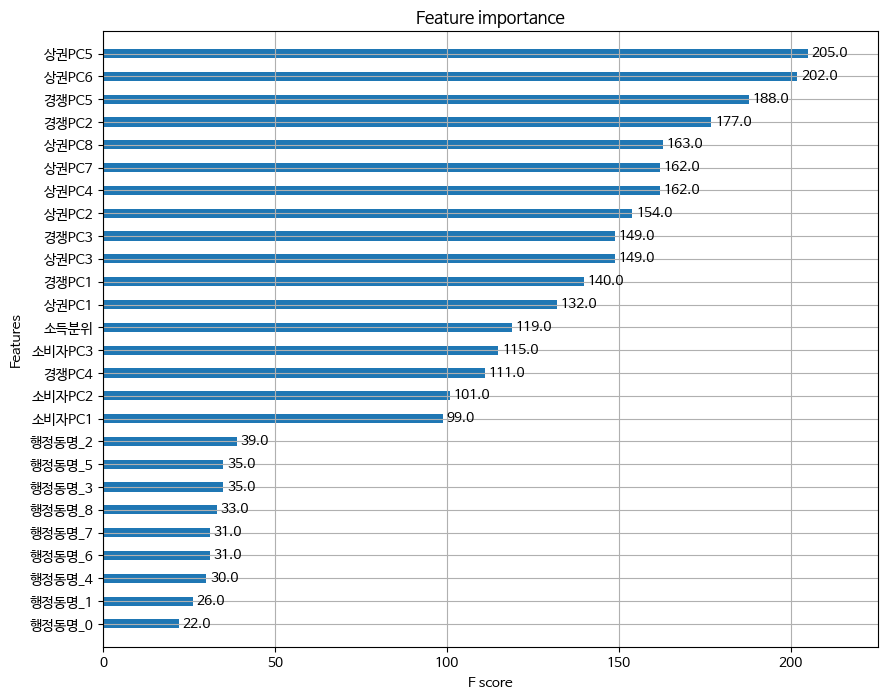

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

### X3

In [ ]:
#model 학습
xgb_clf.fit(X3_train_re, y3_train_re)

#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X3_train_re, y3_train_re, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X3_train_re, y3_train_re), (X3_test, y3_test)])

print(gridcv.best_params_)

#구한 best parameter로 적합한 이후 다시 roc score 계산
#best param에 대한 코드 있어야함
xgb_roc_score = roc_auc_score(y3_test, gridcv.predict_proba(X3_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.86878	validation_1-auc:0.77641
[1]	validation_0-auc:0.90710	validation_1-auc:0.75526
[2]	validation_0-auc:0.91986	validation_1-auc:0.77297
[3]	validation_0-auc:0.93402	validation_1-auc:0.78642


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.95180	validation_1-auc:0.78934
[5]	validation_0-auc:0.95313	validation_1-auc:0.78683
[6]	validation_0-auc:0.96022	validation_1-auc:0.78171
[7]	validation_0-auc:0.96696	validation_1-auc:0.78457
[8]	validation_0-auc:0.97242	validation_1-auc:0.78291
[9]	validation_0-auc:0.97221	validation_1-auc:0.78395
[10]	validation_0-auc:0.97339	validation_1-auc:0.78279
[11]	validation_0-auc:0.97536	validation_1-auc:0.78344
[12]	validation_0-auc:0.97910	validation_1-auc:0.78502
[13]	validation_0-auc:0.98175	validation_1-auc:0.77987
[14]	validation_0-auc:0.98166	validation_1-auc:0.77720
[15]	validation_0-auc:0.98358	validation_1-auc:0.77881
[16]	validation_0-auc:0.98404	validation_1-auc:0.77635
[17]	validation_0-auc:0.98425	validation_1-auc:0.77948
[18]	validation_0-auc:0.98662	validation_1-auc:0.77830
[19]	validation_0-auc:0.98724	validation_1-auc:0.77576
[20]	validation_0-auc:0.98793	validation_1-auc:0.77743
[21]	validation_0-auc:0.98899	validation_1-auc:0.77559
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86605	validation_1-auc:0.77589
[1]	validation_0-auc:0.91727	validation_1-auc:0.74605
[2]	validation_0-auc:0.92780	validation_1-auc:0.75705
[3]	validation_0-auc:0.93921	validation_1-auc:0.77919
[4]	validation_0-auc:0.95561	validation_1-auc:0.77360
[5]	validation_0-auc:0.95768	validation_1-auc:0.77910
[6]	validation_0-auc:0.96288	validation_1-auc:0.76978
[7]	validation_0-auc:0.96637	validation_1-auc:0.77166
[8]	validation_0-auc:0.97105	validation_1-auc:0.77618
[9]	validation_0-auc:0.97069	validation_1-auc:0.77610
[10]	validation_0-auc:0.97520	validation_1-auc:0.77738
[11]	validation_0-auc:0.97646	validation_1-auc:0.78196
[12]	validation_0-auc:0.97882	validation_1-auc:0.78326
[13]	validation_0-auc:0.98111	validation_1-auc:0.78152
[14]	validation_0-auc:0.98210	validation_1-auc:0.78318
[15]	validation_0-auc:0.98328	validation_1-auc:0.78253
[16]	validation_0-auc:0.98460	validation_1-auc:0.77893
[17]	validation_0-auc:0.98499	validation_1-auc:0.78325
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.92829	validation_1-auc:0.76220
[3]	validation_0-auc:0.93755	validation_1-auc:0.77578
[4]	validation_0-auc:0.95573	validation_1-auc:0.77802
[5]	validation_0-auc:0.95688	validation_1-auc:0.77986
[6]	validation_0-auc:0.96277	validation_1-auc:0.76671
[7]	validation_0-auc:0.96742	validation_1-auc:0.77240
[8]	validation_0-auc:0.97085	validation_1-auc:0.76472
[9]	validation_0-auc:0.97014	validation_1-auc:0.77105
[10]	validation_0-auc:0.97326	validation_1-auc:0.77430
[11]	validation_0-auc:0.97553	validation_1-auc:0.77388
[12]	validation_0-auc:0.97801	validation_1-auc:0.76911
[13]	validation_0-auc:0.97863	validation_1-auc:0.76698
[14]	validation_0-auc:0.97951	validation_1-auc:0.76858
[15]	validation_0-auc:0.98146	validation_1-auc:0.76674
[16]	validation_0-auc:0.98280	validation_1-auc:0.76266
[17]	validation_0-auc:0.98311	validation_1-auc:0.76680
[18]	validation_0-auc:0.98504	validation_1-auc:0.76540
[19]	validation_0-auc:0.98778	validation_1-auc:0.76646
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96667	validation_1-auc:0.78476
[8]	validation_0-auc:0.97238	validation_1-auc:0.78295
[9]	validation_0-auc:0.97206	validation_1-auc:0.78362
[10]	validation_0-auc:0.97233	validation_1-auc:0.78461
[11]	validation_0-auc:0.97547	validation_1-auc:0.78782
[12]	validation_0-auc:0.97857	validation_1-auc:0.78601
[13]	validation_0-auc:0.98137	validation_1-auc:0.78227
[14]	validation_0-auc:0.98152	validation_1-auc:0.77856
[15]	validation_0-auc:0.98356	validation_1-auc:0.77959
[16]	validation_0-auc:0.98434	validation_1-auc:0.77896
[17]	validation_0-auc:0.98447	validation_1-auc:0.77899
[18]	validation_0-auc:0.98616	validation_1-auc:0.78155
[19]	validation_0-auc:0.98703	validation_1-auc:0.77950
[20]	validation_0-auc:0.98761	validation_1-auc:0.77763
[21]	validation_0-auc:0.98901	validation_1-auc:0.77716
[22]	validation_0-auc:0.99079	validation_1-auc:0.77404
[23]	validation_0-auc:0.99084	validation_1-auc:0.77323
[24]	validation_0-auc:0.99168	validation_1-auc:0.76931
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96670	validation_1-auc:0.77192
[8]	validation_0-auc:0.97163	validation_1-auc:0.77417
[9]	validation_0-auc:0.97115	validation_1-auc:0.77476
[10]	validation_0-auc:0.97560	validation_1-auc:0.77658
[11]	validation_0-auc:0.97692	validation_1-auc:0.78252
[12]	validation_0-auc:0.97911	validation_1-auc:0.78088
[13]	validation_0-auc:0.98122	validation_1-auc:0.77917
[14]	validation_0-auc:0.98201	validation_1-auc:0.78079
[15]	validation_0-auc:0.98288	validation_1-auc:0.77686
[16]	validation_0-auc:0.98298	validation_1-auc:0.77486
[17]	validation_0-auc:0.98382	validation_1-auc:0.77598
[18]	validation_0-auc:0.98486	validation_1-auc:0.77702
[19]	validation_0-auc:0.98536	validation_1-auc:0.77931
[20]	validation_0-auc:0.98631	validation_1-auc:0.77859
[21]	validation_0-auc:0.98826	validation_1-auc:0.77896
[22]	validation_0-auc:0.99045	validation_1-auc:0.77484
[23]	validation_0-auc:0.99103	validation_1-auc:0.77573
[24]	validation_0-auc:0.99178	validation_1-auc:0.77047
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.86986	validation_1-auc:0.77347
[1]	validation_0-auc:0.92339	validation_1-auc:0.74133
[2]	validation_0-auc:0.92760	validation_1-auc:0.76159
[3]	validation_0-auc:0.93702	validation_1-auc:0.77505
[4]	validation_0-auc:0.95524	validation_1-auc:0.77829
[5]	validation_0-auc:0.95637	validation_1-auc:0.78167
[6]	validation_0-auc:0.96199	validation_1-auc:0.77058
[7]	validation_0-auc:0.96679	validation_1-auc:0.77623
[8]	validation_0-auc:0.97034	validation_1-auc:0.77043
[9]	validation_0-auc:0.97054	validation_1-auc:0.77300
[10]	validation_0-auc:0.97321	validation_1-auc:0.77487
[11]	validation_0-auc:0.97590	validation_1-auc:0.77688
[12]	validation_0-auc:0.97733	validation_1-auc:0.77795
[13]	validation_0-auc:0.97850	validation_1-auc:0.77317
[14]	validation_0-auc:0.97903	validation_1-auc:0.77154
[15]	validation_0-auc:0.98058	validation_1-auc:0.76628
[16]	validation_0-auc:0.98104	validation_1-auc:0.76104
[17]	validation_0-auc:0.98121	validation_1-auc:0.76662
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96424	validation_1-auc:0.78550
[8]	validation_0-auc:0.97181	validation_1-auc:0.78706
[9]	validation_0-auc:0.97100	validation_1-auc:0.78465
[10]	validation_0-auc:0.97256	validation_1-auc:0.78464
[11]	validation_0-auc:0.97505	validation_1-auc:0.78646
[12]	validation_0-auc:0.97643	validation_1-auc:0.78765
[13]	validation_0-auc:0.97928	validation_1-auc:0.78337
[14]	validation_0-auc:0.97949	validation_1-auc:0.78154
[15]	validation_0-auc:0.98054	validation_1-auc:0.77747
[16]	validation_0-auc:0.98231	validation_1-auc:0.77238
[17]	validation_0-auc:0.98391	validation_1-auc:0.77517
[18]	validation_0-auc:0.98626	validation_1-auc:0.77431
[19]	validation_0-auc:0.98648	validation_1-auc:0.77488
[20]	validation_0-auc:0.98695	validation_1-auc:0.77466
[21]	validation_0-auc:0.98845	validation_1-auc:0.76927
[22]	validation_0-auc:0.98961	validation_1-auc:0.76348
[23]	validation_0-auc:0.99003	validation_1-auc:0.76103
[24]	validation_0-auc:0.99139	validation_1-auc:0.75806
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96558	validation_1-auc:0.77091
[8]	validation_0-auc:0.97068	validation_1-auc:0.77370
[9]	validation_0-auc:0.97031	validation_1-auc:0.77206
[10]	validation_0-auc:0.97506	validation_1-auc:0.77550
[11]	validation_0-auc:0.97655	validation_1-auc:0.78102
[12]	validation_0-auc:0.97900	validation_1-auc:0.78121
[13]	validation_0-auc:0.98090	validation_1-auc:0.77966
[14]	validation_0-auc:0.98172	validation_1-auc:0.78214
[15]	validation_0-auc:0.98284	validation_1-auc:0.78176
[16]	validation_0-auc:0.98389	validation_1-auc:0.77727
[17]	validation_0-auc:0.98420	validation_1-auc:0.77686
[18]	validation_0-auc:0.98513	validation_1-auc:0.77713
[19]	validation_0-auc:0.98625	validation_1-auc:0.77779
[20]	validation_0-auc:0.98691	validation_1-auc:0.77498
[21]	validation_0-auc:0.98856	validation_1-auc:0.77392
[22]	validation_0-auc:0.98975	validation_1-auc:0.77017
[23]	validation_0-auc:0.99039	validation_1-auc:0.76983
[24]	validation_0-auc:0.99102	validation_1-auc:0.76841
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96659	validation_1-auc:0.78055
[8]	validation_0-auc:0.96997	validation_1-auc:0.77296
[9]	validation_0-auc:0.96999	validation_1-auc:0.77806
[10]	validation_0-auc:0.97333	validation_1-auc:0.77767
[11]	validation_0-auc:0.97571	validation_1-auc:0.78065
[12]	validation_0-auc:0.97805	validation_1-auc:0.77440
[13]	validation_0-auc:0.97913	validation_1-auc:0.77256
[14]	validation_0-auc:0.97922	validation_1-auc:0.77144
[15]	validation_0-auc:0.98257	validation_1-auc:0.77197
[16]	validation_0-auc:0.98279	validation_1-auc:0.77108
[17]	validation_0-auc:0.98321	validation_1-auc:0.77792
[18]	validation_0-auc:0.98478	validation_1-auc:0.77546
[19]	validation_0-auc:0.98604	validation_1-auc:0.77439
[20]	validation_0-auc:0.98735	validation_1-auc:0.77339
[21]	validation_0-auc:0.98841	validation_1-auc:0.77040
[22]	validation_0-auc:0.98938	validation_1-auc:0.76832
[23]	validation_0-auc:0.98963	validation_1-auc:0.76988
[24]	validation_0-auc:0.99033	validation_1-auc:0.76776
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98531	validation_1-auc:0.76091
[7]	validation_0-auc:0.98772	validation_1-auc:0.76714
[8]	validation_0-auc:0.99095	validation_1-auc:0.76779
[9]	validation_0-auc:0.99159	validation_1-auc:0.76588
[10]	validation_0-auc:0.99291	validation_1-auc:0.76396
[11]	validation_0-auc:0.99337	validation_1-auc:0.76881
[12]	validation_0-auc:0.99404	validation_1-auc:0.76444
[13]	validation_0-auc:0.99462	validation_1-auc:0.76075
[14]	validation_0-auc:0.99484	validation_1-auc:0.76515
[15]	validation_0-auc:0.99577	validation_1-auc:0.76140
[16]	validation_0-auc:0.99587	validation_1-auc:0.75764
[17]	validation_0-auc:0.99625	validation_1-auc:0.76439
[18]	validation_0-auc:0.99707	validation_1-auc:0.76259
[19]	validation_0-auc:0.99735	validation_1-auc:0.76894
[20]	validation_0-auc:0.99754	validation_1-auc:0.76531
[21]	validation_0-auc:0.99795	validation_1-auc:0.76191
[22]	validation_0-auc:0.99818	validation_1-auc:0.75917
[23]	validation_0-auc:0.99836	validation_1-auc:0.75818
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98505	validation_1-auc:0.75483
[7]	validation_0-auc:0.98737	validation_1-auc:0.75870
[8]	validation_0-auc:0.99079	validation_1-auc:0.75791
[9]	validation_0-auc:0.99128	validation_1-auc:0.75516
[10]	validation_0-auc:0.99280	validation_1-auc:0.75189
[11]	validation_0-auc:0.99335	validation_1-auc:0.76133
[12]	validation_0-auc:0.99436	validation_1-auc:0.76226
[13]	validation_0-auc:0.99517	validation_1-auc:0.76020
[14]	validation_0-auc:0.99538	validation_1-auc:0.76245
[15]	validation_0-auc:0.99573	validation_1-auc:0.76092
[16]	validation_0-auc:0.99615	validation_1-auc:0.75909
[17]	validation_0-auc:0.99654	validation_1-auc:0.76549
[18]	validation_0-auc:0.99717	validation_1-auc:0.76053
[19]	validation_0-auc:0.99742	validation_1-auc:0.76375
[20]	validation_0-auc:0.99754	validation_1-auc:0.76179
[21]	validation_0-auc:0.99775	validation_1-auc:0.75795
[22]	validation_0-auc:0.99814	validation_1-auc:0.74962
[23]	validation_0-auc:0.99825	validation_1-auc:0.74680
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98431	validation_1-auc:0.75674
[7]	validation_0-auc:0.98663	validation_1-auc:0.76294
[8]	validation_0-auc:0.99045	validation_1-auc:0.75871
[9]	validation_0-auc:0.99140	validation_1-auc:0.75268
[10]	validation_0-auc:0.99303	validation_1-auc:0.74724
[11]	validation_0-auc:0.99354	validation_1-auc:0.74884
[12]	validation_0-auc:0.99440	validation_1-auc:0.74907
[13]	validation_0-auc:0.99479	validation_1-auc:0.74678
[14]	validation_0-auc:0.99500	validation_1-auc:0.75394
[15]	validation_0-auc:0.99543	validation_1-auc:0.74984
[16]	validation_0-auc:0.99581	validation_1-auc:0.74101
[17]	validation_0-auc:0.99600	validation_1-auc:0.75159
[18]	validation_0-auc:0.99642	validation_1-auc:0.75510
[19]	validation_0-auc:0.99673	validation_1-auc:0.75875
[20]	validation_0-auc:0.99688	validation_1-auc:0.75411
[21]	validation_0-auc:0.99713	validation_1-auc:0.75184
[22]	validation_0-auc:0.99745	validation_1-auc:0.75005
[23]	validation_0-auc:0.99755	validation_1-auc:0.75289
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98441	validation_1-auc:0.75640
[7]	validation_0-auc:0.98675	validation_1-auc:0.76747
[8]	validation_0-auc:0.99021	validation_1-auc:0.76511
[9]	validation_0-auc:0.99080	validation_1-auc:0.77119
[10]	validation_0-auc:0.99246	validation_1-auc:0.76777
[11]	validation_0-auc:0.99308	validation_1-auc:0.77401
[12]	validation_0-auc:0.99380	validation_1-auc:0.76507
[13]	validation_0-auc:0.99481	validation_1-auc:0.76357
[14]	validation_0-auc:0.99495	validation_1-auc:0.76822
[15]	validation_0-auc:0.99537	validation_1-auc:0.76915
[16]	validation_0-auc:0.99583	validation_1-auc:0.76125
[17]	validation_0-auc:0.99626	validation_1-auc:0.76743
[18]	validation_0-auc:0.99671	validation_1-auc:0.76828
[19]	validation_0-auc:0.99702	validation_1-auc:0.76926
[20]	validation_0-auc:0.99719	validation_1-auc:0.76762
[21]	validation_0-auc:0.99728	validation_1-auc:0.76413
[22]	validation_0-auc:0.99763	validation_1-auc:0.76100
[23]	validation_0-auc:0.99787	validation_1-auc:0.76014
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.97943	validation_1-auc:0.77179
[6]	validation_0-auc:0.98426	validation_1-auc:0.75772
[7]	validation_0-auc:0.98637	validation_1-auc:0.76599
[8]	validation_0-auc:0.98983	validation_1-auc:0.76628
[9]	validation_0-auc:0.99027	validation_1-auc:0.76274
[10]	validation_0-auc:0.99138	validation_1-auc:0.76507
[11]	validation_0-auc:0.99205	validation_1-auc:0.76995
[12]	validation_0-auc:0.99331	validation_1-auc:0.76707
[13]	validation_0-auc:0.99436	validation_1-auc:0.76589
[14]	validation_0-auc:0.99464	validation_1-auc:0.77155
[15]	validation_0-auc:0.99539	validation_1-auc:0.76971
[16]	validation_0-auc:0.99587	validation_1-auc:0.76685
[17]	validation_0-auc:0.99600	validation_1-auc:0.77184
[18]	validation_0-auc:0.99644	validation_1-auc:0.77103
[19]	validation_0-auc:0.99693	validation_1-auc:0.77545
[20]	validation_0-auc:0.99711	validation_1-auc:0.77440
[21]	validation_0-auc:0.99740	validation_1-auc:0.77230
[22]	validation_0-auc:0.99766	validation_1-auc:0.77137
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98392	validation_1-auc:0.75001
[7]	validation_0-auc:0.98617	validation_1-auc:0.76005
[8]	validation_0-auc:0.98943	validation_1-auc:0.75803
[9]	validation_0-auc:0.99034	validation_1-auc:0.76168
[10]	validation_0-auc:0.99155	validation_1-auc:0.75875
[11]	validation_0-auc:0.99247	validation_1-auc:0.75773
[12]	validation_0-auc:0.99340	validation_1-auc:0.75677
[13]	validation_0-auc:0.99390	validation_1-auc:0.75123
[14]	validation_0-auc:0.99401	validation_1-auc:0.75343
[15]	validation_0-auc:0.99471	validation_1-auc:0.75333
[16]	validation_0-auc:0.99519	validation_1-auc:0.75036
[17]	validation_0-auc:0.99530	validation_1-auc:0.75514
[18]	validation_0-auc:0.99583	validation_1-auc:0.75520
[19]	validation_0-auc:0.99620	validation_1-auc:0.75915
[20]	validation_0-auc:0.99648	validation_1-auc:0.75801
[21]	validation_0-auc:0.99664	validation_1-auc:0.75169
[22]	validation_0-auc:0.99692	validation_1-auc:0.74687
[23]	validation_0-auc:0.99705	validation_1-auc:0.74565
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98049	validation_1-auc:0.77382
[6]	validation_0-auc:0.98528	validation_1-auc:0.76931
[7]	validation_0-auc:0.98720	validation_1-auc:0.77473
[8]	validation_0-auc:0.99028	validation_1-auc:0.77667
[9]	validation_0-auc:0.99095	validation_1-auc:0.77606
[10]	validation_0-auc:0.99177	validation_1-auc:0.77569
[11]	validation_0-auc:0.99235	validation_1-auc:0.77340
[12]	validation_0-auc:0.99316	validation_1-auc:0.77090
[13]	validation_0-auc:0.99384	validation_1-auc:0.76803
[14]	validation_0-auc:0.99389	validation_1-auc:0.77030
[15]	validation_0-auc:0.99472	validation_1-auc:0.76855
[16]	validation_0-auc:0.99537	validation_1-auc:0.76545
[17]	validation_0-auc:0.99579	validation_1-auc:0.77099
[18]	validation_0-auc:0.99632	validation_1-auc:0.77148
[19]	validation_0-auc:0.99645	validation_1-auc:0.77054
[20]	validation_0-auc:0.99650	validation_1-auc:0.76515
[21]	validation_0-auc:0.99667	validation_1-auc:0.76412
[22]	validation_0-auc:0.99701	validation_1-auc:0.75987
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98387	validation_1-auc:0.75757
[7]	validation_0-auc:0.98586	validation_1-auc:0.76317
[8]	validation_0-auc:0.98854	validation_1-auc:0.76237
[9]	validation_0-auc:0.98999	validation_1-auc:0.76304
[10]	validation_0-auc:0.99098	validation_1-auc:0.75900
[11]	validation_0-auc:0.99169	validation_1-auc:0.76802
[12]	validation_0-auc:0.99273	validation_1-auc:0.76622
[13]	validation_0-auc:0.99340	validation_1-auc:0.76523
[14]	validation_0-auc:0.99373	validation_1-auc:0.76763
[15]	validation_0-auc:0.99395	validation_1-auc:0.76676
[16]	validation_0-auc:0.99427	validation_1-auc:0.75946
[17]	validation_0-auc:0.99455	validation_1-auc:0.76336
[18]	validation_0-auc:0.99494	validation_1-auc:0.76094
[19]	validation_0-auc:0.99528	validation_1-auc:0.76175
[20]	validation_0-auc:0.99565	validation_1-auc:0.76047
[21]	validation_0-auc:0.99617	validation_1-auc:0.75903
[22]	validation_0-auc:0.99685	validation_1-auc:0.75620
[23]	validation_0-auc:0.99715	validation_1-auc:0.75459
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97667	validation_1-auc:0.75697
[5]	validation_0-auc:0.97815	validation_1-auc:0.77042
[6]	validation_0-auc:0.98125	validation_1-auc:0.75607
[7]	validation_0-auc:0.98420	validation_1-auc:0.76501
[8]	validation_0-auc:0.98744	validation_1-auc:0.76550
[9]	validation_0-auc:0.98779	validation_1-auc:0.76612
[10]	validation_0-auc:0.98965	validation_1-auc:0.76731
[11]	validation_0-auc:0.99022	validation_1-auc:0.77045
[12]	validation_0-auc:0.99131	validation_1-auc:0.76248
[13]	validation_0-auc:0.99213	validation_1-auc:0.76287
[14]	validation_0-auc:0.99220	validation_1-auc:0.76307
[15]	validation_0-auc:0.99278	validation_1-auc:0.76472
[16]	validation_0-auc:0.99344	validation_1-auc:0.76039
[17]	validation_0-auc:0.99389	validation_1-auc:0.76448
[18]	validation_0-auc:0.99438	validation_1-auc:0.76128
[19]	validation_0-auc:0.99505	validation_1-auc:0.76314
[20]	validation_0-auc:0.99531	validation_1-auc:0.76192
[21]	validation_0-auc:0.99560	validation_1-auc:0.75968
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98948	validation_1-auc:0.71180
[5]	validation_0-auc:0.99162	validation_1-auc:0.72059
[6]	validation_0-auc:0.99418	validation_1-auc:0.70781
[7]	validation_0-auc:0.99558	validation_1-auc:0.73177
[8]	validation_0-auc:0.99684	validation_1-auc:0.72561
[9]	validation_0-auc:0.99727	validation_1-auc:0.72530
[10]	validation_0-auc:0.99770	validation_1-auc:0.72778
[11]	validation_0-auc:0.99781	validation_1-auc:0.73956
[12]	validation_0-auc:0.99840	validation_1-auc:0.73271
[13]	validation_0-auc:0.99874	validation_1-auc:0.72932
[14]	validation_0-auc:0.99886	validation_1-auc:0.74562
[15]	validation_0-auc:0.99904	validation_1-auc:0.74145
[16]	validation_0-auc:0.99913	validation_1-auc:0.73690
[17]	validation_0-auc:0.99920	validation_1-auc:0.74933
[18]	validation_0-auc:0.99938	validation_1-auc:0.74969
[19]	validation_0-auc:0.99944	validation_1-auc:0.75551
[20]	validation_0-auc:0.99941	validation_1-auc:0.75537
[21]	validation_0-auc:0.99949	validation_1-auc:0.75081
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98844	validation_1-auc:0.70454
[5]	validation_0-auc:0.99201	validation_1-auc:0.72589
[6]	validation_0-auc:0.99420	validation_1-auc:0.70725
[7]	validation_0-auc:0.99549	validation_1-auc:0.73162
[8]	validation_0-auc:0.99658	validation_1-auc:0.73043
[9]	validation_0-auc:0.99678	validation_1-auc:0.73532
[10]	validation_0-auc:0.99726	validation_1-auc:0.73736
[11]	validation_0-auc:0.99765	validation_1-auc:0.75539
[12]	validation_0-auc:0.99806	validation_1-auc:0.74929
[13]	validation_0-auc:0.99819	validation_1-auc:0.75045
[14]	validation_0-auc:0.99832	validation_1-auc:0.76040
[15]	validation_0-auc:0.99849	validation_1-auc:0.76220
[16]	validation_0-auc:0.99867	validation_1-auc:0.75920
[17]	validation_0-auc:0.99879	validation_1-auc:0.76246
[18]	validation_0-auc:0.99881	validation_1-auc:0.76840
[19]	validation_0-auc:0.99891	validation_1-auc:0.77294
[20]	validation_0-auc:0.99898	validation_1-auc:0.77062
[21]	validation_0-auc:0.99902	validation_1-auc:0.76776
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99039	validation_1-auc:0.72715
[6]	validation_0-auc:0.99257	validation_1-auc:0.71699
[7]	validation_0-auc:0.99390	validation_1-auc:0.73170
[8]	validation_0-auc:0.99556	validation_1-auc:0.73115
[9]	validation_0-auc:0.99595	validation_1-auc:0.73644
[10]	validation_0-auc:0.99607	validation_1-auc:0.74026
[11]	validation_0-auc:0.99639	validation_1-auc:0.74870
[12]	validation_0-auc:0.99677	validation_1-auc:0.74289
[13]	validation_0-auc:0.99719	validation_1-auc:0.73982
[14]	validation_0-auc:0.99734	validation_1-auc:0.74637
[15]	validation_0-auc:0.99755	validation_1-auc:0.74227
[16]	validation_0-auc:0.99776	validation_1-auc:0.73554
[17]	validation_0-auc:0.99792	validation_1-auc:0.74480
[18]	validation_0-auc:0.99801	validation_1-auc:0.75078
[19]	validation_0-auc:0.99824	validation_1-auc:0.75459
[20]	validation_0-auc:0.99834	validation_1-auc:0.75283
[21]	validation_0-auc:0.99850	validation_1-auc:0.75012
[22]	validation_0-auc:0.99860	validation_1-auc:0.74830
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99034	validation_1-auc:0.73244
[6]	validation_0-auc:0.99220	validation_1-auc:0.71682
[7]	validation_0-auc:0.99382	validation_1-auc:0.74095
[8]	validation_0-auc:0.99534	validation_1-auc:0.73861
[9]	validation_0-auc:0.99590	validation_1-auc:0.74175
[10]	validation_0-auc:0.99672	validation_1-auc:0.73816
[11]	validation_0-auc:0.99681	validation_1-auc:0.75125
[12]	validation_0-auc:0.99755	validation_1-auc:0.75184
[13]	validation_0-auc:0.99785	validation_1-auc:0.75192
[14]	validation_0-auc:0.99800	validation_1-auc:0.75999
[15]	validation_0-auc:0.99834	validation_1-auc:0.75670
[16]	validation_0-auc:0.99851	validation_1-auc:0.75066
[17]	validation_0-auc:0.99873	validation_1-auc:0.75553
[18]	validation_0-auc:0.99885	validation_1-auc:0.75531
[19]	validation_0-auc:0.99893	validation_1-auc:0.75646
[20]	validation_0-auc:0.99899	validation_1-auc:0.75310
[21]	validation_0-auc:0.99910	validation_1-auc:0.74685
[22]	validation_0-auc:0.99919	validation_1-auc:0.74451
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98735	validation_1-auc:0.71892
[5]	validation_0-auc:0.98930	validation_1-auc:0.72730
[6]	validation_0-auc:0.99244	validation_1-auc:0.71187
[7]	validation_0-auc:0.99384	validation_1-auc:0.72973
[8]	validation_0-auc:0.99534	validation_1-auc:0.73025
[9]	validation_0-auc:0.99584	validation_1-auc:0.73235
[10]	validation_0-auc:0.99685	validation_1-auc:0.73631
[11]	validation_0-auc:0.99719	validation_1-auc:0.75556
[12]	validation_0-auc:0.99746	validation_1-auc:0.74432
[13]	validation_0-auc:0.99784	validation_1-auc:0.74430
[14]	validation_0-auc:0.99810	validation_1-auc:0.74941
[15]	validation_0-auc:0.99835	validation_1-auc:0.74635
[16]	validation_0-auc:0.99844	validation_1-auc:0.74197
[17]	validation_0-auc:0.99861	validation_1-auc:0.74936
[18]	validation_0-auc:0.99878	validation_1-auc:0.74793
[19]	validation_0-auc:0.99885	validation_1-auc:0.74930
[20]	validation_0-auc:0.99890	validation_1-auc:0.74714
[21]	validation_0-auc:0.99893	validation_1-auc:0.74514
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98553	validation_1-auc:0.73886
[5]	validation_0-auc:0.98807	validation_1-auc:0.75217
[6]	validation_0-auc:0.99070	validation_1-auc:0.74260
[7]	validation_0-auc:0.99218	validation_1-auc:0.75887
[8]	validation_0-auc:0.99446	validation_1-auc:0.76146
[9]	validation_0-auc:0.99496	validation_1-auc:0.76235
[10]	validation_0-auc:0.99553	validation_1-auc:0.76069
[11]	validation_0-auc:0.99596	validation_1-auc:0.76555
[12]	validation_0-auc:0.99628	validation_1-auc:0.75505
[13]	validation_0-auc:0.99673	validation_1-auc:0.75397
[14]	validation_0-auc:0.99691	validation_1-auc:0.75962
[15]	validation_0-auc:0.99715	validation_1-auc:0.75532
[16]	validation_0-auc:0.99756	validation_1-auc:0.74907
[17]	validation_0-auc:0.99769	validation_1-auc:0.76311
[18]	validation_0-auc:0.99786	validation_1-auc:0.76533
[19]	validation_0-auc:0.99804	validation_1-auc:0.76616
[20]	validation_0-auc:0.99819	validation_1-auc:0.76469
[21]	validation_0-auc:0.99824	validation_1-auc:0.76075
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98601	validation_1-auc:0.72939
[5]	validation_0-auc:0.98855	validation_1-auc:0.74223
[6]	validation_0-auc:0.99105	validation_1-auc:0.74122
[7]	validation_0-auc:0.99210	validation_1-auc:0.75682
[8]	validation_0-auc:0.99394	validation_1-auc:0.75857
[9]	validation_0-auc:0.99433	validation_1-auc:0.75499
[10]	validation_0-auc:0.99558	validation_1-auc:0.75229
[11]	validation_0-auc:0.99579	validation_1-auc:0.76130
[12]	validation_0-auc:0.99644	validation_1-auc:0.75262
[13]	validation_0-auc:0.99691	validation_1-auc:0.75134
[14]	validation_0-auc:0.99704	validation_1-auc:0.76043
[15]	validation_0-auc:0.99734	validation_1-auc:0.75933
[16]	validation_0-auc:0.99759	validation_1-auc:0.75320
[17]	validation_0-auc:0.99785	validation_1-auc:0.75874
[18]	validation_0-auc:0.99801	validation_1-auc:0.76200
[19]	validation_0-auc:0.99808	validation_1-auc:0.76376
[20]	validation_0-auc:0.99820	validation_1-auc:0.76047
[21]	validation_0-auc:0.99831	validation_1-auc:0.75610
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98613	validation_1-auc:0.71711
[5]	validation_0-auc:0.98822	validation_1-auc:0.72764
[6]	validation_0-auc:0.99029	validation_1-auc:0.70780
[7]	validation_0-auc:0.99246	validation_1-auc:0.73010
[8]	validation_0-auc:0.99390	validation_1-auc:0.72751
[9]	validation_0-auc:0.99460	validation_1-auc:0.72679
[10]	validation_0-auc:0.99523	validation_1-auc:0.72774
[11]	validation_0-auc:0.99582	validation_1-auc:0.74504
[12]	validation_0-auc:0.99632	validation_1-auc:0.74298
[13]	validation_0-auc:0.99655	validation_1-auc:0.73933
[14]	validation_0-auc:0.99681	validation_1-auc:0.74568
[15]	validation_0-auc:0.99713	validation_1-auc:0.74710
[16]	validation_0-auc:0.99742	validation_1-auc:0.74264
[17]	validation_0-auc:0.99745	validation_1-auc:0.75438
[18]	validation_0-auc:0.99777	validation_1-auc:0.75613
[19]	validation_0-auc:0.99794	validation_1-auc:0.75942
[20]	validation_0-auc:0.99817	validation_1-auc:0.75998
[21]	validation_0-auc:0.99822	validation_1-auc:0.75678
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98643	validation_1-auc:0.73266
[5]	validation_0-auc:0.98899	validation_1-auc:0.74286
[6]	validation_0-auc:0.99091	validation_1-auc:0.74033
[7]	validation_0-auc:0.99247	validation_1-auc:0.75891
[8]	validation_0-auc:0.99373	validation_1-auc:0.75644
[9]	validation_0-auc:0.99421	validation_1-auc:0.76189
[10]	validation_0-auc:0.99471	validation_1-auc:0.76215
[11]	validation_0-auc:0.99513	validation_1-auc:0.76819
[12]	validation_0-auc:0.99554	validation_1-auc:0.76339
[13]	validation_0-auc:0.99607	validation_1-auc:0.76048
[14]	validation_0-auc:0.99622	validation_1-auc:0.76738
[15]	validation_0-auc:0.99643	validation_1-auc:0.76597
[16]	validation_0-auc:0.99653	validation_1-auc:0.76242
[17]	validation_0-auc:0.99668	validation_1-auc:0.76561
[18]	validation_0-auc:0.99686	validation_1-auc:0.76811
[19]	validation_0-auc:0.99703	validation_1-auc:0.76945
[20]	validation_0-auc:0.99714	validation_1-auc:0.76743
[21]	validation_0-auc:0.99730	validation_1-auc:0.76388
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95992	validation_1-auc:0.81109
[7]	validation_0-auc:0.96089	validation_1-auc:0.81202
[8]	validation_0-auc:0.96602	validation_1-auc:0.80745
[9]	validation_0-auc:0.97232	validation_1-auc:0.80289
[10]	validation_0-auc:0.97566	validation_1-auc:0.80007
[11]	validation_0-auc:0.97911	validation_1-auc:0.79854
[12]	validation_0-auc:0.98154	validation_1-auc:0.79671
[13]	validation_0-auc:0.98260	validation_1-auc:0.79229
[14]	validation_0-auc:0.98430	validation_1-auc:0.79104
[15]	validation_0-auc:0.98550	validation_1-auc:0.78368
[16]	validation_0-auc:0.98591	validation_1-auc:0.78208
[17]	validation_0-auc:0.98701	validation_1-auc:0.77979
[18]	validation_0-auc:0.98921	validation_1-auc:0.77609
[19]	validation_0-auc:0.99094	validation_1-auc:0.77066
[20]	validation_0-auc:0.99184	validation_1-auc:0.76948
[21]	validation_0-auc:0.99242	validation_1-auc:0.76485
[22]	validation_0-auc:0.99316	validation_1-auc:0.76276
[23]	validation_0-auc:0.99343	validation_1-auc:0.76189
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95334	validation_1-auc:0.79805
[7]	validation_0-auc:0.95829	validation_1-auc:0.79787
[8]	validation_0-auc:0.96226	validation_1-auc:0.79632
[9]	validation_0-auc:0.96609	validation_1-auc:0.80019
[10]	validation_0-auc:0.96819	validation_1-auc:0.79398
[11]	validation_0-auc:0.97011	validation_1-auc:0.79475
[12]	validation_0-auc:0.97526	validation_1-auc:0.78930
[13]	validation_0-auc:0.97979	validation_1-auc:0.78708
[14]	validation_0-auc:0.98166	validation_1-auc:0.78468
[15]	validation_0-auc:0.98318	validation_1-auc:0.78244
[16]	validation_0-auc:0.98480	validation_1-auc:0.77955
[17]	validation_0-auc:0.98553	validation_1-auc:0.77806
[18]	validation_0-auc:0.98748	validation_1-auc:0.77817
[19]	validation_0-auc:0.98902	validation_1-auc:0.77613
[20]	validation_0-auc:0.98998	validation_1-auc:0.77206
[21]	validation_0-auc:0.99056	validation_1-auc:0.76822
[22]	validation_0-auc:0.99175	validation_1-auc:0.76764
[23]	validation_0-auc:0.99178	validation_1-auc:0.76933
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95922	validation_1-auc:0.78943
[7]	validation_0-auc:0.96034	validation_1-auc:0.79436
[8]	validation_0-auc:0.96544	validation_1-auc:0.78819
[9]	validation_0-auc:0.96956	validation_1-auc:0.79163
[10]	validation_0-auc:0.97059	validation_1-auc:0.78716
[11]	validation_0-auc:0.97217	validation_1-auc:0.78585
[12]	validation_0-auc:0.97732	validation_1-auc:0.79206
[13]	validation_0-auc:0.97903	validation_1-auc:0.78660
[14]	validation_0-auc:0.97977	validation_1-auc:0.78516
[15]	validation_0-auc:0.98105	validation_1-auc:0.78319
[16]	validation_0-auc:0.98153	validation_1-auc:0.78301
[17]	validation_0-auc:0.98351	validation_1-auc:0.77964
[18]	validation_0-auc:0.98541	validation_1-auc:0.78233
[19]	validation_0-auc:0.98590	validation_1-auc:0.78519
[20]	validation_0-auc:0.98793	validation_1-auc:0.78401
[21]	validation_0-auc:0.99049	validation_1-auc:0.78272
[22]	validation_0-auc:0.99156	validation_1-auc:0.77835
[23]	validation_0-auc:0.99233	validation_1-auc:0.77254
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.95159	validation_1-auc:0.81458
[6]	validation_0-auc:0.95929	validation_1-auc:0.80736
[7]	validation_0-auc:0.96283	validation_1-auc:0.80601
[8]	validation_0-auc:0.96779	validation_1-auc:0.80452
[9]	validation_0-auc:0.97028	validation_1-auc:0.79582
[10]	validation_0-auc:0.97260	validation_1-auc:0.79218
[11]	validation_0-auc:0.97620	validation_1-auc:0.78961
[12]	validation_0-auc:0.98187	validation_1-auc:0.78535
[13]	validation_0-auc:0.98587	validation_1-auc:0.78103
[14]	validation_0-auc:0.98613	validation_1-auc:0.78530
[15]	validation_0-auc:0.98815	validation_1-auc:0.78349
[16]	validation_0-auc:0.98884	validation_1-auc:0.78021
[17]	validation_0-auc:0.98922	validation_1-auc:0.77890
[18]	validation_0-auc:0.98993	validation_1-auc:0.77687
[19]	validation_0-auc:0.99109	validation_1-auc:0.77262
[20]	validation_0-auc:0.99171	validation_1-auc:0.76605
[21]	validation_0-auc:0.99284	validation_1-auc:0.76656
[22]	validation_0-auc:0.99334	validation_1-auc:0.75919
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.94533	validation_1-auc:0.80432
[6]	validation_0-auc:0.95319	validation_1-auc:0.80028
[7]	validation_0-auc:0.95831	validation_1-auc:0.80074
[8]	validation_0-auc:0.96270	validation_1-auc:0.79057
[9]	validation_0-auc:0.96568	validation_1-auc:0.78801
[10]	validation_0-auc:0.96889	validation_1-auc:0.79241
[11]	validation_0-auc:0.97451	validation_1-auc:0.78822
[12]	validation_0-auc:0.97691	validation_1-auc:0.78585
[13]	validation_0-auc:0.98033	validation_1-auc:0.78336
[14]	validation_0-auc:0.98057	validation_1-auc:0.78568
[15]	validation_0-auc:0.98078	validation_1-auc:0.78483
[16]	validation_0-auc:0.98262	validation_1-auc:0.78295
[17]	validation_0-auc:0.98390	validation_1-auc:0.77971
[18]	validation_0-auc:0.98599	validation_1-auc:0.78148
[19]	validation_0-auc:0.98651	validation_1-auc:0.77975
[20]	validation_0-auc:0.98826	validation_1-auc:0.77996
[21]	validation_0-auc:0.98946	validation_1-auc:0.77626
[22]	validation_0-auc:0.99093	validation_1-auc:0.77518
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95898	validation_1-auc:0.79020
[7]	validation_0-auc:0.96001	validation_1-auc:0.79526
[8]	validation_0-auc:0.96371	validation_1-auc:0.79429
[9]	validation_0-auc:0.96761	validation_1-auc:0.79440
[10]	validation_0-auc:0.96966	validation_1-auc:0.79292
[11]	validation_0-auc:0.97195	validation_1-auc:0.79282
[12]	validation_0-auc:0.97496	validation_1-auc:0.79324
[13]	validation_0-auc:0.97702	validation_1-auc:0.79077
[14]	validation_0-auc:0.97832	validation_1-auc:0.79357
[15]	validation_0-auc:0.98196	validation_1-auc:0.79368
[16]	validation_0-auc:0.98266	validation_1-auc:0.79235
[17]	validation_0-auc:0.98458	validation_1-auc:0.79455
[18]	validation_0-auc:0.98728	validation_1-auc:0.78956
[19]	validation_0-auc:0.98779	validation_1-auc:0.78894
[20]	validation_0-auc:0.98807	validation_1-auc:0.78765
[21]	validation_0-auc:0.98949	validation_1-auc:0.78582
[22]	validation_0-auc:0.99005	validation_1-auc:0.78175
[23]	validation_0-auc:0.99080	validation_1-auc:0.77994
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.95135	validation_1-auc:0.81519
[6]	validation_0-auc:0.95897	validation_1-auc:0.80736
[7]	validation_0-auc:0.96255	validation_1-auc:0.80582
[8]	validation_0-auc:0.96755	validation_1-auc:0.80473
[9]	validation_0-auc:0.96972	validation_1-auc:0.79578
[10]	validation_0-auc:0.97190	validation_1-auc:0.79292
[11]	validation_0-auc:0.97530	validation_1-auc:0.79284
[12]	validation_0-auc:0.98053	validation_1-auc:0.78513
[13]	validation_0-auc:0.98470	validation_1-auc:0.78237
[14]	validation_0-auc:0.98766	validation_1-auc:0.77712
[15]	validation_0-auc:0.98820	validation_1-auc:0.77607
[16]	validation_0-auc:0.98826	validation_1-auc:0.77369
[17]	validation_0-auc:0.98825	validation_1-auc:0.77605
[18]	validation_0-auc:0.98930	validation_1-auc:0.77746
[19]	validation_0-auc:0.99029	validation_1-auc:0.77377
[20]	validation_0-auc:0.99103	validation_1-auc:0.77327
[21]	validation_0-auc:0.99165	validation_1-auc:0.76979
[22]	validation_0-auc:0.99214	validation_1-auc:0.76830
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.94582	validation_1-auc:0.80555
[6]	validation_0-auc:0.95385	validation_1-auc:0.80168
[7]	validation_0-auc:0.95842	validation_1-auc:0.80378
[8]	validation_0-auc:0.96309	validation_1-auc:0.79878
[9]	validation_0-auc:0.96483	validation_1-auc:0.79537
[10]	validation_0-auc:0.96817	validation_1-auc:0.79125
[11]	validation_0-auc:0.97098	validation_1-auc:0.78788
[12]	validation_0-auc:0.97682	validation_1-auc:0.79105
[13]	validation_0-auc:0.97818	validation_1-auc:0.79105
[14]	validation_0-auc:0.97967	validation_1-auc:0.78909
[15]	validation_0-auc:0.98186	validation_1-auc:0.78955
[16]	validation_0-auc:0.98277	validation_1-auc:0.78752
[17]	validation_0-auc:0.98342	validation_1-auc:0.78915
[18]	validation_0-auc:0.98523	validation_1-auc:0.78941
[19]	validation_0-auc:0.98778	validation_1-auc:0.78338
[20]	validation_0-auc:0.98953	validation_1-auc:0.78019
[21]	validation_0-auc:0.99107	validation_1-auc:0.78058
[22]	validation_0-auc:0.99199	validation_1-auc:0.77785
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.95229	validation_1-auc:0.80087
[6]	validation_0-auc:0.95909	validation_1-auc:0.79130
[7]	validation_0-auc:0.96004	validation_1-auc:0.79603
[8]	validation_0-auc:0.96399	validation_1-auc:0.78999
[9]	validation_0-auc:0.96644	validation_1-auc:0.78511
[10]	validation_0-auc:0.96730	validation_1-auc:0.78435
[11]	validation_0-auc:0.97087	validation_1-auc:0.78525
[12]	validation_0-auc:0.97333	validation_1-auc:0.78238
[13]	validation_0-auc:0.97631	validation_1-auc:0.78231
[14]	validation_0-auc:0.97685	validation_1-auc:0.78292
[15]	validation_0-auc:0.97962	validation_1-auc:0.77545
[16]	validation_0-auc:0.98023	validation_1-auc:0.77645
[17]	validation_0-auc:0.98091	validation_1-auc:0.77687
[18]	validation_0-auc:0.98410	validation_1-auc:0.77474
[19]	validation_0-auc:0.98650	validation_1-auc:0.77432
[20]	validation_0-auc:0.98802	validation_1-auc:0.77183
[21]	validation_0-auc:0.98899	validation_1-auc:0.77194
[22]	validation_0-auc:0.98974	validation_1-auc:0.76940
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97817	validation_1-auc:0.78592
[5]	validation_0-auc:0.98229	validation_1-auc:0.78689
[6]	validation_0-auc:0.98575	validation_1-auc:0.76392
[7]	validation_0-auc:0.98762	validation_1-auc:0.77223
[8]	validation_0-auc:0.98910	validation_1-auc:0.76088
[9]	validation_0-auc:0.99162	validation_1-auc:0.75330
[10]	validation_0-auc:0.99309	validation_1-auc:0.75595
[11]	validation_0-auc:0.99358	validation_1-auc:0.75660
[12]	validation_0-auc:0.99566	validation_1-auc:0.75066
[13]	validation_0-auc:0.99613	validation_1-auc:0.74759
[14]	validation_0-auc:0.99639	validation_1-auc:0.74785
[15]	validation_0-auc:0.99680	validation_1-auc:0.74592
[16]	validation_0-auc:0.99701	validation_1-auc:0.75049
[17]	validation_0-auc:0.99718	validation_1-auc:0.75788
[18]	validation_0-auc:0.99772	validation_1-auc:0.75180
[19]	validation_0-auc:0.99780	validation_1-auc:0.75232
[20]	validation_0-auc:0.99793	validation_1-auc:0.75435
[21]	validation_0-auc:0.99829	validation_1-auc:0.75344
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97273	validation_1-auc:0.77264
[5]	validation_0-auc:0.98040	validation_1-auc:0.77434
[6]	validation_0-auc:0.98529	validation_1-auc:0.76802
[7]	validation_0-auc:0.98688	validation_1-auc:0.78040
[8]	validation_0-auc:0.98865	validation_1-auc:0.77060
[9]	validation_0-auc:0.98998	validation_1-auc:0.76592
[10]	validation_0-auc:0.99223	validation_1-auc:0.76367
[11]	validation_0-auc:0.99258	validation_1-auc:0.76715
[12]	validation_0-auc:0.99418	validation_1-auc:0.76521
[13]	validation_0-auc:0.99517	validation_1-auc:0.76205
[14]	validation_0-auc:0.99549	validation_1-auc:0.76252
[15]	validation_0-auc:0.99609	validation_1-auc:0.76193
[16]	validation_0-auc:0.99628	validation_1-auc:0.76410
[17]	validation_0-auc:0.99681	validation_1-auc:0.76519
[18]	validation_0-auc:0.99734	validation_1-auc:0.75913
[19]	validation_0-auc:0.99782	validation_1-auc:0.75568
[20]	validation_0-auc:0.99790	validation_1-auc:0.75897
[21]	validation_0-auc:0.99806	validation_1-auc:0.75628
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98025	validation_1-auc:0.77284
[6]	validation_0-auc:0.98345	validation_1-auc:0.76093
[7]	validation_0-auc:0.98570	validation_1-auc:0.77346
[8]	validation_0-auc:0.98913	validation_1-auc:0.76443
[9]	validation_0-auc:0.99018	validation_1-auc:0.76267
[10]	validation_0-auc:0.99146	validation_1-auc:0.75411
[11]	validation_0-auc:0.99206	validation_1-auc:0.76080
[12]	validation_0-auc:0.99347	validation_1-auc:0.75128
[13]	validation_0-auc:0.99402	validation_1-auc:0.74493
[14]	validation_0-auc:0.99463	validation_1-auc:0.75405
[15]	validation_0-auc:0.99488	validation_1-auc:0.75191
[16]	validation_0-auc:0.99494	validation_1-auc:0.75759
[17]	validation_0-auc:0.99530	validation_1-auc:0.76190
[18]	validation_0-auc:0.99607	validation_1-auc:0.75673
[19]	validation_0-auc:0.99652	validation_1-auc:0.75774
[20]	validation_0-auc:0.99710	validation_1-auc:0.75247
[21]	validation_0-auc:0.99747	validation_1-auc:0.75086
[22]	validation_0-auc:0.99772	validation_1-auc:0.74851
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.97989	validation_1-auc:0.77409
[6]	validation_0-auc:0.98590	validation_1-auc:0.76156
[7]	validation_0-auc:0.98745	validation_1-auc:0.76655
[8]	validation_0-auc:0.98955	validation_1-auc:0.76143
[9]	validation_0-auc:0.99071	validation_1-auc:0.75180
[10]	validation_0-auc:0.99186	validation_1-auc:0.74688
[11]	validation_0-auc:0.99238	validation_1-auc:0.75037
[12]	validation_0-auc:0.99363	validation_1-auc:0.74365
[13]	validation_0-auc:0.99405	validation_1-auc:0.74593
[14]	validation_0-auc:0.99435	validation_1-auc:0.75386
[15]	validation_0-auc:0.99485	validation_1-auc:0.75118
[16]	validation_0-auc:0.99517	validation_1-auc:0.75686
[17]	validation_0-auc:0.99603	validation_1-auc:0.75911
[18]	validation_0-auc:0.99655	validation_1-auc:0.75763
[19]	validation_0-auc:0.99724	validation_1-auc:0.75200
[20]	validation_0-auc:0.99752	validation_1-auc:0.74936
[21]	validation_0-auc:0.99767	validation_1-auc:0.74528
[22]	validation_0-auc:0.99797	validation_1-auc:0.74510
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97229	validation_1-auc:0.77072
[5]	validation_0-auc:0.97980	validation_1-auc:0.77762
[6]	validation_0-auc:0.98442	validation_1-auc:0.76475
[7]	validation_0-auc:0.98594	validation_1-auc:0.77724
[8]	validation_0-auc:0.98768	validation_1-auc:0.77592
[9]	validation_0-auc:0.98828	validation_1-auc:0.76759
[10]	validation_0-auc:0.99014	validation_1-auc:0.76487
[11]	validation_0-auc:0.99146	validation_1-auc:0.76666
[12]	validation_0-auc:0.99316	validation_1-auc:0.76418
[13]	validation_0-auc:0.99400	validation_1-auc:0.76206
[14]	validation_0-auc:0.99460	validation_1-auc:0.76646
[15]	validation_0-auc:0.99538	validation_1-auc:0.76344
[16]	validation_0-auc:0.99586	validation_1-auc:0.76282
[17]	validation_0-auc:0.99634	validation_1-auc:0.76643
[18]	validation_0-auc:0.99700	validation_1-auc:0.76502
[19]	validation_0-auc:0.99712	validation_1-auc:0.76355
[20]	validation_0-auc:0.99722	validation_1-auc:0.76059
[21]	validation_0-auc:0.99760	validation_1-auc:0.76003
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97372	validation_1-auc:0.78006
[5]	validation_0-auc:0.97948	validation_1-auc:0.78326
[6]	validation_0-auc:0.98275	validation_1-auc:0.75387
[7]	validation_0-auc:0.98536	validation_1-auc:0.76171
[8]	validation_0-auc:0.98648	validation_1-auc:0.76052
[9]	validation_0-auc:0.98845	validation_1-auc:0.75681
[10]	validation_0-auc:0.98999	validation_1-auc:0.75079
[11]	validation_0-auc:0.99049	validation_1-auc:0.75725
[12]	validation_0-auc:0.99224	validation_1-auc:0.74967
[13]	validation_0-auc:0.99323	validation_1-auc:0.74792
[14]	validation_0-auc:0.99355	validation_1-auc:0.75577
[15]	validation_0-auc:0.99421	validation_1-auc:0.75648
[16]	validation_0-auc:0.99470	validation_1-auc:0.76337
[17]	validation_0-auc:0.99514	validation_1-auc:0.75875
[18]	validation_0-auc:0.99558	validation_1-auc:0.75997
[19]	validation_0-auc:0.99600	validation_1-auc:0.76192
[20]	validation_0-auc:0.99635	validation_1-auc:0.76005
[21]	validation_0-auc:0.99698	validation_1-auc:0.75603
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97607	validation_1-auc:0.77508
[5]	validation_0-auc:0.97936	validation_1-auc:0.77657
[6]	validation_0-auc:0.98564	validation_1-auc:0.76338
[7]	validation_0-auc:0.98759	validation_1-auc:0.76767
[8]	validation_0-auc:0.98924	validation_1-auc:0.76744
[9]	validation_0-auc:0.99075	validation_1-auc:0.76104
[10]	validation_0-auc:0.99160	validation_1-auc:0.76259
[11]	validation_0-auc:0.99225	validation_1-auc:0.75981
[12]	validation_0-auc:0.99357	validation_1-auc:0.75563
[13]	validation_0-auc:0.99424	validation_1-auc:0.75866
[14]	validation_0-auc:0.99442	validation_1-auc:0.75954
[15]	validation_0-auc:0.99484	validation_1-auc:0.75282
[16]	validation_0-auc:0.99496	validation_1-auc:0.75852
[17]	validation_0-auc:0.99516	validation_1-auc:0.76417
[18]	validation_0-auc:0.99577	validation_1-auc:0.76274
[19]	validation_0-auc:0.99630	validation_1-auc:0.75920
[20]	validation_0-auc:0.99684	validation_1-auc:0.75337
[21]	validation_0-auc:0.99702	validation_1-auc:0.75383
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.97590	validation_1-auc:0.78775
[6]	validation_0-auc:0.98144	validation_1-auc:0.77414
[7]	validation_0-auc:0.98505	validation_1-auc:0.77235
[8]	validation_0-auc:0.98716	validation_1-auc:0.76717
[9]	validation_0-auc:0.98870	validation_1-auc:0.76309
[10]	validation_0-auc:0.99083	validation_1-auc:0.75583
[11]	validation_0-auc:0.99144	validation_1-auc:0.75693
[12]	validation_0-auc:0.99320	validation_1-auc:0.75281
[13]	validation_0-auc:0.99397	validation_1-auc:0.75310
[14]	validation_0-auc:0.99436	validation_1-auc:0.75855
[15]	validation_0-auc:0.99490	validation_1-auc:0.75963
[16]	validation_0-auc:0.99527	validation_1-auc:0.76003
[17]	validation_0-auc:0.99587	validation_1-auc:0.76115
[18]	validation_0-auc:0.99622	validation_1-auc:0.76003
[19]	validation_0-auc:0.99689	validation_1-auc:0.75852
[20]	validation_0-auc:0.99713	validation_1-auc:0.75942
[21]	validation_0-auc:0.99730	validation_1-auc:0.75620
[22]	validation_0-auc:0.99754	validation_1-auc:0.75449
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.97174	validation_1-auc:0.78347
[5]	validation_0-auc:0.97796	validation_1-auc:0.78720
[6]	validation_0-auc:0.98024	validation_1-auc:0.77148
[7]	validation_0-auc:0.98196	validation_1-auc:0.77680
[8]	validation_0-auc:0.98455	validation_1-auc:0.77545
[9]	validation_0-auc:0.98669	validation_1-auc:0.76758
[10]	validation_0-auc:0.98928	validation_1-auc:0.77037
[11]	validation_0-auc:0.99035	validation_1-auc:0.77098
[12]	validation_0-auc:0.99218	validation_1-auc:0.76600
[13]	validation_0-auc:0.99343	validation_1-auc:0.77083
[14]	validation_0-auc:0.99397	validation_1-auc:0.77805
[15]	validation_0-auc:0.99449	validation_1-auc:0.77047
[16]	validation_0-auc:0.99473	validation_1-auc:0.77342
[17]	validation_0-auc:0.99509	validation_1-auc:0.77421
[18]	validation_0-auc:0.99531	validation_1-auc:0.77155
[19]	validation_0-auc:0.99553	validation_1-auc:0.77037
[20]	validation_0-auc:0.99588	validation_1-auc:0.76742
[21]	validation_0-auc:0.99647	validation_1-auc:0.76341
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.96128	validation_1-auc:0.70212
[2]	validation_0-auc:0.98098	validation_1-auc:0.71775
[3]	validation_0-auc:0.98725	validation_1-auc:0.74135
[4]	validation_0-auc:0.99120	validation_1-auc:0.75166
[5]	validation_0-auc:0.99299	validation_1-auc:0.75748
[6]	validation_0-auc:0.99525	validation_1-auc:0.73509
[7]	validation_0-auc:0.99602	validation_1-auc:0.75115
[8]	validation_0-auc:0.99639	validation_1-auc:0.74999
[9]	validation_0-auc:0.99702	validation_1-auc:0.74471
[10]	validation_0-auc:0.99756	validation_1-auc:0.73079
[11]	validation_0-auc:0.99792	validation_1-auc:0.73496
[12]	validation_0-auc:0.99822	validation_1-auc:0.72529
[13]	validation_0-auc:0.99846	validation_1-auc:0.71937
[14]	validation_0-auc:0.99857	validation_1-auc:0.73026
[15]	validation_0-auc:0.99892	validation_1-auc:0.73409
[16]	validation_0-auc:0.99900	validation_1-auc:0.74076
[17]	validation_0-auc:0.99919	validation_1-auc:0.74724
[18]	validation_0-auc:0.99936	validation_1-auc:0.74831
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99062	validation_1-auc:0.74230
[5]	validation_0-auc:0.99288	validation_1-auc:0.74220
[6]	validation_0-auc:0.99515	validation_1-auc:0.71704
[7]	validation_0-auc:0.99589	validation_1-auc:0.74453
[8]	validation_0-auc:0.99648	validation_1-auc:0.74234
[9]	validation_0-auc:0.99685	validation_1-auc:0.73597
[10]	validation_0-auc:0.99737	validation_1-auc:0.72330
[11]	validation_0-auc:0.99753	validation_1-auc:0.73241
[12]	validation_0-auc:0.99831	validation_1-auc:0.72265
[13]	validation_0-auc:0.99845	validation_1-auc:0.72369
[14]	validation_0-auc:0.99875	validation_1-auc:0.73649
[15]	validation_0-auc:0.99886	validation_1-auc:0.73928
[16]	validation_0-auc:0.99897	validation_1-auc:0.74837
[17]	validation_0-auc:0.99905	validation_1-auc:0.75865
[18]	validation_0-auc:0.99918	validation_1-auc:0.75790
[19]	validation_0-auc:0.99926	validation_1-auc:0.76008
[20]	validation_0-auc:0.99933	validation_1-auc:0.75985
[21]	validation_0-auc:0.99938	validation_1-auc:0.75587
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.98315	validation_1-auc:0.75683
[4]	validation_0-auc:0.98647	validation_1-auc:0.75905
[5]	validation_0-auc:0.99251	validation_1-auc:0.76055
[6]	validation_0-auc:0.99427	validation_1-auc:0.73942
[7]	validation_0-auc:0.99571	validation_1-auc:0.75805
[8]	validation_0-auc:0.99629	validation_1-auc:0.75696
[9]	validation_0-auc:0.99692	validation_1-auc:0.76660
[10]	validation_0-auc:0.99733	validation_1-auc:0.76014
[11]	validation_0-auc:0.99740	validation_1-auc:0.76671
[12]	validation_0-auc:0.99794	validation_1-auc:0.76300
[13]	validation_0-auc:0.99819	validation_1-auc:0.75972
[14]	validation_0-auc:0.99834	validation_1-auc:0.77279
[15]	validation_0-auc:0.99833	validation_1-auc:0.77134
[16]	validation_0-auc:0.99850	validation_1-auc:0.77148
[17]	validation_0-auc:0.99864	validation_1-auc:0.77271
[18]	validation_0-auc:0.99871	validation_1-auc:0.77703
[19]	validation_0-auc:0.99875	validation_1-auc:0.77882
[20]	validation_0-auc:0.99887	validation_1-auc:0.78053
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99149	validation_1-auc:0.74297
[5]	validation_0-auc:0.99271	validation_1-auc:0.75408
[6]	validation_0-auc:0.99446	validation_1-auc:0.72930
[7]	validation_0-auc:0.99508	validation_1-auc:0.74984
[8]	validation_0-auc:0.99557	validation_1-auc:0.75003
[9]	validation_0-auc:0.99592	validation_1-auc:0.74150
[10]	validation_0-auc:0.99684	validation_1-auc:0.73530
[11]	validation_0-auc:0.99712	validation_1-auc:0.73714
[12]	validation_0-auc:0.99768	validation_1-auc:0.72438
[13]	validation_0-auc:0.99800	validation_1-auc:0.72267
[14]	validation_0-auc:0.99819	validation_1-auc:0.73258
[15]	validation_0-auc:0.99832	validation_1-auc:0.72906
[16]	validation_0-auc:0.99842	validation_1-auc:0.73354
[17]	validation_0-auc:0.99847	validation_1-auc:0.74063
[18]	validation_0-auc:0.99866	validation_1-auc:0.74412
[19]	validation_0-auc:0.99880	validation_1-auc:0.74684
[20]	validation_0-auc:0.99889	validation_1-auc:0.74767
[21]	validation_0-auc:0.99898	validation_1-auc:0.74405
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98965	validation_1-auc:0.74699
[5]	validation_0-auc:0.99279	validation_1-auc:0.74996
[6]	validation_0-auc:0.99401	validation_1-auc:0.72907
[7]	validation_0-auc:0.99451	validation_1-auc:0.74084
[8]	validation_0-auc:0.99485	validation_1-auc:0.74248
[9]	validation_0-auc:0.99576	validation_1-auc:0.74201
[10]	validation_0-auc:0.99626	validation_1-auc:0.73737
[11]	validation_0-auc:0.99677	validation_1-auc:0.74815
[12]	validation_0-auc:0.99740	validation_1-auc:0.74049
[13]	validation_0-auc:0.99801	validation_1-auc:0.73702
[14]	validation_0-auc:0.99839	validation_1-auc:0.75268
[15]	validation_0-auc:0.99853	validation_1-auc:0.74847
[16]	validation_0-auc:0.99863	validation_1-auc:0.75609
[17]	validation_0-auc:0.99866	validation_1-auc:0.75908
[18]	validation_0-auc:0.99881	validation_1-auc:0.76365
[19]	validation_0-auc:0.99883	validation_1-auc:0.76396
[20]	validation_0-auc:0.99892	validation_1-auc:0.76396
[21]	validation_0-auc:0.99900	validation_1-auc:0.76179
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.98642	validation_1-auc:0.70937
[4]	validation_0-auc:0.99062	validation_1-auc:0.73148
[5]	validation_0-auc:0.99259	validation_1-auc:0.73543
[6]	validation_0-auc:0.99371	validation_1-auc:0.71739
[7]	validation_0-auc:0.99498	validation_1-auc:0.72556
[8]	validation_0-auc:0.99556	validation_1-auc:0.74112
[9]	validation_0-auc:0.99583	validation_1-auc:0.74224
[10]	validation_0-auc:0.99634	validation_1-auc:0.73657
[11]	validation_0-auc:0.99662	validation_1-auc:0.74789
[12]	validation_0-auc:0.99689	validation_1-auc:0.74016
[13]	validation_0-auc:0.99723	validation_1-auc:0.74074
[14]	validation_0-auc:0.99724	validation_1-auc:0.74737
[15]	validation_0-auc:0.99759	validation_1-auc:0.74528
[16]	validation_0-auc:0.99773	validation_1-auc:0.75441
[17]	validation_0-auc:0.99785	validation_1-auc:0.76298
[18]	validation_0-auc:0.99795	validation_1-auc:0.76456
[19]	validation_0-auc:0.99808	validation_1-auc:0.76658
[20]	validation_0-auc:0.99819	validation_1-auc:0.76614
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98898	validation_1-auc:0.77385
[5]	validation_0-auc:0.99240	validation_1-auc:0.77902
[6]	validation_0-auc:0.99382	validation_1-auc:0.75947
[7]	validation_0-auc:0.99465	validation_1-auc:0.76088
[8]	validation_0-auc:0.99553	validation_1-auc:0.76270
[9]	validation_0-auc:0.99591	validation_1-auc:0.76441
[10]	validation_0-auc:0.99609	validation_1-auc:0.76015
[11]	validation_0-auc:0.99635	validation_1-auc:0.76701
[12]	validation_0-auc:0.99676	validation_1-auc:0.76155
[13]	validation_0-auc:0.99723	validation_1-auc:0.76546
[14]	validation_0-auc:0.99738	validation_1-auc:0.76844
[15]	validation_0-auc:0.99750	validation_1-auc:0.76704
[16]	validation_0-auc:0.99768	validation_1-auc:0.77126
[17]	validation_0-auc:0.99783	validation_1-auc:0.77210
[18]	validation_0-auc:0.99795	validation_1-auc:0.77240
[19]	validation_0-auc:0.99800	validation_1-auc:0.77083
[20]	validation_0-auc:0.99806	validation_1-auc:0.77054
[21]	validation_0-auc:0.99830	validation_1-auc:0.76874
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98711	validation_1-auc:0.77306
[5]	validation_0-auc:0.99044	validation_1-auc:0.77834
[6]	validation_0-auc:0.99260	validation_1-auc:0.75933
[7]	validation_0-auc:0.99391	validation_1-auc:0.77371
[8]	validation_0-auc:0.99475	validation_1-auc:0.76680
[9]	validation_0-auc:0.99535	validation_1-auc:0.76059
[10]	validation_0-auc:0.99576	validation_1-auc:0.75436
[11]	validation_0-auc:0.99609	validation_1-auc:0.76365
[12]	validation_0-auc:0.99671	validation_1-auc:0.75547
[13]	validation_0-auc:0.99721	validation_1-auc:0.75583
[14]	validation_0-auc:0.99755	validation_1-auc:0.76151
[15]	validation_0-auc:0.99777	validation_1-auc:0.75576
[16]	validation_0-auc:0.99798	validation_1-auc:0.76247
[17]	validation_0-auc:0.99817	validation_1-auc:0.76662
[18]	validation_0-auc:0.99830	validation_1-auc:0.76649
[19]	validation_0-auc:0.99845	validation_1-auc:0.76682
[20]	validation_0-auc:0.99865	validation_1-auc:0.76849
[21]	validation_0-auc:0.99867	validation_1-auc:0.76563
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.98402	validation_1-auc:0.74965
[4]	validation_0-auc:0.98686	validation_1-auc:0.78295
[5]	validation_0-auc:0.99041	validation_1-auc:0.78678
[6]	validation_0-auc:0.99267	validation_1-auc:0.76894
[7]	validation_0-auc:0.99376	validation_1-auc:0.77450
[8]	validation_0-auc:0.99427	validation_1-auc:0.77167
[9]	validation_0-auc:0.99487	validation_1-auc:0.76895
[10]	validation_0-auc:0.99561	validation_1-auc:0.76788
[11]	validation_0-auc:0.99589	validation_1-auc:0.77471
[12]	validation_0-auc:0.99631	validation_1-auc:0.76599
[13]	validation_0-auc:0.99671	validation_1-auc:0.76305
[14]	validation_0-auc:0.99704	validation_1-auc:0.76730
[15]	validation_0-auc:0.99729	validation_1-auc:0.76553
[16]	validation_0-auc:0.99747	validation_1-auc:0.76957
[17]	validation_0-auc:0.99761	validation_1-auc:0.77441
[18]	validation_0-auc:0.99778	validation_1-auc:0.77696
[19]	validation_0-auc:0.99779	validation_1-auc:0.77449
[20]	validation_0-auc:0.99800	validation_1-auc:0.77195
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.98328	validation_1-auc:0.73938
[4]	validation_0-auc:0.99112	validation_1-auc:0.74276
[5]	validation_0-auc:0.99433	validation_1-auc:0.75546
[6]	validation_0-auc:0.99647	validation_1-auc:0.74986
[7]	validation_0-auc:0.99690	validation_1-auc:0.77336
[8]	validation_0-auc:0.99735	validation_1-auc:0.76968
[9]	validation_0-auc:0.99763	validation_1-auc:0.76283
[10]	validation_0-auc:0.99820	validation_1-auc:0.76131
[11]	validation_0-auc:0.99832	validation_1-auc:0.76449
[12]	validation_0-auc:0.99879	validation_1-auc:0.75853
[13]	validation_0-auc:0.99890	validation_1-auc:0.75554
[14]	validation_0-auc:0.99901	validation_1-auc:0.75850
[15]	validation_0-auc:0.99927	validation_1-auc:0.75760
[16]	validation_0-auc:0.99939	validation_1-auc:0.76558
[17]	validation_0-auc:0.99948	validation_1-auc:0.77006
[18]	validation_0-auc:0.99955	validation_1-auc:0.76791
[19]	validation_0-auc:0.99960	validation_1-auc:0.76745
[20]	validation_0-auc:0.99964	validation_1-auc:0.76509
[21]	validation_0

In [ ]:
y3_pred = gridcv.predict(X3_test)
print(confusion_matrix(y3_test, y3_pred))
get_clf_eval(y3_test, y3_pred)
pred_positive_label = gridcv.predict_proba(X3_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y3_test, pred_positive_label)))

[[7035 1251]
 [  45   24]]
정확도: 0.8449
정밀도: 0.0188
재현율: 0.3478
f1 score: 0.0357
ROC: 0.7787


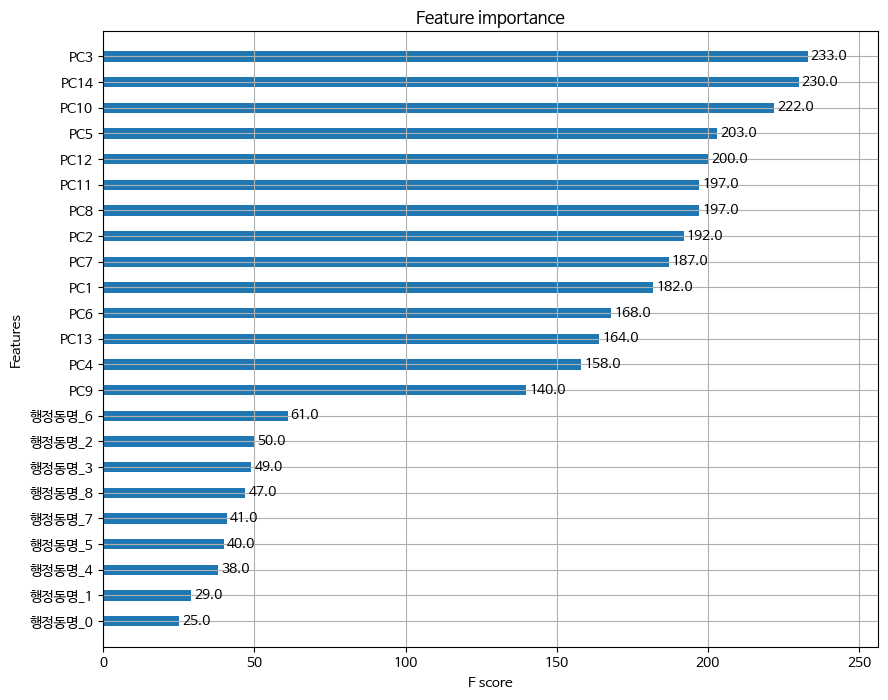

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

### X4

In [ ]:
#model 학습
xgb_clf.fit(X4_train_re, y4_train_re)

#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X4_train_re, y4_train_re, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X4_train_re, y4_train_re), (X4_test, y4_test)])

print(gridcv.best_params_)

#구한 best parameter로 적합한 이후 다시 roc score 계산
#best param에 대한 코드 있어야함
xgb_roc_score = roc_auc_score(y4_test, gridcv.predict_proba(X4_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.87788	validation_1-auc:0.67503
[1]	validation_0-auc:0.92633	validation_1-auc:0.71522
[2]	validation_0-auc:0.94315	validation_1-auc:0.77944
[3]	validation_0-auc:0.95848	validation_1-auc:0.77319
[4]	validation_0-auc:0.96725	validation_1-auc:0.77751
[5]	validation_0-auc:0.97152	validation_1-auc:0.77965
[6]	validation_0-auc:0.97593	validation_1-auc:0.76014
[7]	validation_0-auc:0.97977	validation_1-auc:0.76021
[8]	validation_0-auc:0.98397	validation_1-auc:0.76233
[9]	validation_0-auc:0.98491	validation_1-auc:0.77008


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.98765	validation_1-auc:0.77592
[11]	validation_0-auc:0.99190	validation_1-auc:0.77289
[12]	validation_0-auc:0.99211	validation_1-auc:0.76944
[13]	validation_0-auc:0.99329	validation_1-auc:0.77184
[14]	validation_0-auc:0.99468	validation_1-auc:0.77637
[15]	validation_0-auc:0.99582	validation_1-auc:0.78053
[16]	validation_0-auc:0.99602	validation_1-auc:0.78333
[17]	validation_0-auc:0.99626	validation_1-auc:0.77889
[18]	validation_0-auc:0.99661	validation_1-auc:0.77766
[19]	validation_0-auc:0.99697	validation_1-auc:0.77644
[20]	validation_0-auc:0.99711	validation_1-auc:0.77624
[21]	validation_0-auc:0.99736	validation_1-auc:0.77230
[22]	validation_0-auc:0.99749	validation_1-auc:0.77332
[23]	validation_0-auc:0.99746	validation_1-auc:0.77352
[24]	validation_0-auc:0.99766	validation_1-auc:0.77164
[25]	validation_0-auc:0.99793	validation_1-auc:0.76871
[26]	validation_0-auc:0.99808	validation_1-auc:0.76592
[27]	validation_0-auc:0.99810	validation_1-auc:0.76442
[28]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98409	validation_1-auc:0.77447
[10]	validation_0-auc:0.98733	validation_1-auc:0.77021
[11]	validation_0-auc:0.98983	validation_1-auc:0.76814
[12]	validation_0-auc:0.99032	validation_1-auc:0.76777
[13]	validation_0-auc:0.99239	validation_1-auc:0.76548
[14]	validation_0-auc:0.99294	validation_1-auc:0.76814
[15]	validation_0-auc:0.99386	validation_1-auc:0.76948
[16]	validation_0-auc:0.99424	validation_1-auc:0.77340
[17]	validation_0-auc:0.99509	validation_1-auc:0.76737
[18]	validation_0-auc:0.99556	validation_1-auc:0.76780
[19]	validation_0-auc:0.99585	validation_1-auc:0.76672
[20]	validation_0-auc:0.99605	validation_1-auc:0.76347
[21]	validation_0-auc:0.99651	validation_1-auc:0.75822
[22]	validation_0-auc:0.99677	validation_1-auc:0.76279
[23]	validation_0-auc:0.99692	validation_1-auc:0.76167
[24]	validation_0-auc:0.99725	validation_1-auc:0.75952
[25]	validation_0-auc:0.99754	validation_1-auc:0.75954
[26]	validation_0-auc:0.99756	validation_1-auc:0.76241
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98451	validation_1-auc:0.77735
[10]	validation_0-auc:0.98742	validation_1-auc:0.78024
[11]	validation_0-auc:0.99140	validation_1-auc:0.78007
[12]	validation_0-auc:0.99194	validation_1-auc:0.78130
[13]	validation_0-auc:0.99319	validation_1-auc:0.77865
[14]	validation_0-auc:0.99403	validation_1-auc:0.78015
[15]	validation_0-auc:0.99480	validation_1-auc:0.78096
[16]	validation_0-auc:0.99529	validation_1-auc:0.78354
[17]	validation_0-auc:0.99569	validation_1-auc:0.77593
[18]	validation_0-auc:0.99641	validation_1-auc:0.77442
[19]	validation_0-auc:0.99682	validation_1-auc:0.77517
[20]	validation_0-auc:0.99724	validation_1-auc:0.77153
[21]	validation_0-auc:0.99749	validation_1-auc:0.76761
[22]	validation_0-auc:0.99767	validation_1-auc:0.77045
[23]	validation_0-auc:0.99776	validation_1-auc:0.77035
[24]	validation_0-auc:0.99802	validation_1-auc:0.77031
[25]	validation_0-auc:0.99819	validation_1-auc:0.77045
[26]	validation_0-auc:0.99823	validation_1-auc:0.77417
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98484	validation_1-auc:0.77165
[10]	validation_0-auc:0.98759	validation_1-auc:0.77729
[11]	validation_0-auc:0.99187	validation_1-auc:0.77474
[12]	validation_0-auc:0.99206	validation_1-auc:0.77131
[13]	validation_0-auc:0.99323	validation_1-auc:0.77448
[14]	validation_0-auc:0.99461	validation_1-auc:0.77886
[15]	validation_0-auc:0.99578	validation_1-auc:0.78267
[16]	validation_0-auc:0.99597	validation_1-auc:0.78557
[17]	validation_0-auc:0.99619	validation_1-auc:0.78157
[18]	validation_0-auc:0.99656	validation_1-auc:0.78115
[19]	validation_0-auc:0.99689	validation_1-auc:0.77946
[20]	validation_0-auc:0.99701	validation_1-auc:0.77875
[21]	validation_0-auc:0.99726	validation_1-auc:0.77536
[22]	validation_0-auc:0.99731	validation_1-auc:0.77403
[23]	validation_0-auc:0.99727	validation_1-auc:0.77442
[24]	validation_0-auc:0.99749	validation_1-auc:0.77279
[25]	validation_0-auc:0.99774	validation_1-auc:0.77119
[26]	validation_0-auc:0.99796	validation_1-auc:0.76834
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98398	validation_1-auc:0.77584
[10]	validation_0-auc:0.98715	validation_1-auc:0.77120
[11]	validation_0-auc:0.98969	validation_1-auc:0.76909
[12]	validation_0-auc:0.99026	validation_1-auc:0.76633
[13]	validation_0-auc:0.99230	validation_1-auc:0.76572
[14]	validation_0-auc:0.99289	validation_1-auc:0.76790
[15]	validation_0-auc:0.99383	validation_1-auc:0.77039
[16]	validation_0-auc:0.99414	validation_1-auc:0.77409
[17]	validation_0-auc:0.99500	validation_1-auc:0.76751
[18]	validation_0-auc:0.99539	validation_1-auc:0.76848
[19]	validation_0-auc:0.99550	validation_1-auc:0.77211
[20]	validation_0-auc:0.99569	validation_1-auc:0.77030
[21]	validation_0-auc:0.99596	validation_1-auc:0.76641
[22]	validation_0-auc:0.99673	validation_1-auc:0.76866
[23]	validation_0-auc:0.99707	validation_1-auc:0.76424
[24]	validation_0-auc:0.99736	validation_1-auc:0.76172
[25]	validation_0-auc:0.99750	validation_1-auc:0.76713
[26]	validation_0-auc:0.99772	validation_1-auc:0.76868
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98429	validation_1-auc:0.78164
[10]	validation_0-auc:0.98680	validation_1-auc:0.77806
[11]	validation_0-auc:0.99102	validation_1-auc:0.77734
[12]	validation_0-auc:0.99162	validation_1-auc:0.77950
[13]	validation_0-auc:0.99287	validation_1-auc:0.78050
[14]	validation_0-auc:0.99357	validation_1-auc:0.78213
[15]	validation_0-auc:0.99442	validation_1-auc:0.77919
[16]	validation_0-auc:0.99504	validation_1-auc:0.77709
[17]	validation_0-auc:0.99555	validation_1-auc:0.77034
[18]	validation_0-auc:0.99604	validation_1-auc:0.76367
[19]	validation_0-auc:0.99630	validation_1-auc:0.76781
[20]	validation_0-auc:0.99644	validation_1-auc:0.77061
[21]	validation_0-auc:0.99694	validation_1-auc:0.76927
[22]	validation_0-auc:0.99706	validation_1-auc:0.76400
[23]	validation_0-auc:0.99726	validation_1-auc:0.76453
[24]	validation_0-auc:0.99750	validation_1-auc:0.76345
[25]	validation_0-auc:0.99756	validation_1-auc:0.76659
[26]	validation_0-auc:0.99777	validation_1-auc:0.76201
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.87788	validation_1-auc:0.67503
[1]	validation_0-auc:0.92633	validation_1-auc:0.71522
[2]	validation_0-auc:0.94315	validation_1-auc:0.77944
[3]	validation_0-auc:0.95848	validation_1-auc:0.77319
[4]	validation_0-auc:0.96725	validation_1-auc:0.77751
[5]	validation_0-auc:0.97139	validation_1-auc:0.77949
[6]	validation_0-auc:0.97562	validation_1-auc:0.76144
[7]	validation_0-auc:0.97948	validation_1-auc:0.76144
[8]	validation_0-auc:0.98374	validation_1-auc:0.76332
[9]	validation_0-auc:0.98469	validation_1-auc:0.77068
[10]	validation_0-auc:0.98744	validation_1-auc:0.77637
[11]	validation_0-auc:0.99177	validation_1-auc:0.77369
[12]	validation_0-auc:0.99197	validation_1-auc:0.76995
[13]	validation_0-auc:0.99316	validation_1-auc:0.77228
[14]	validation_0-auc:0.99447	validation_1-auc:0.77712
[15]	validation_0-auc:0.99579	validation_1-auc:0.78201
[16]	validation_0-auc:0.99596	validation_1-auc:0.78495
[17]	validation_0-auc:0.99629	validation_1-auc:0.78438
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.98688	validation_1-auc:0.77133
[11]	validation_0-auc:0.98945	validation_1-auc:0.76902
[12]	validation_0-auc:0.98988	validation_1-auc:0.77082
[13]	validation_0-auc:0.99184	validation_1-auc:0.76995
[14]	validation_0-auc:0.99283	validation_1-auc:0.76690
[15]	validation_0-auc:0.99405	validation_1-auc:0.77020
[16]	validation_0-auc:0.99475	validation_1-auc:0.77496
[17]	validation_0-auc:0.99542	validation_1-auc:0.77007
[18]	validation_0-auc:0.99580	validation_1-auc:0.76549
[19]	validation_0-auc:0.99626	validation_1-auc:0.76641
[20]	validation_0-auc:0.99630	validation_1-auc:0.76557
[21]	validation_0-auc:0.99659	validation_1-auc:0.76565
[22]	validation_0-auc:0.99705	validation_1-auc:0.76441
[23]	validation_0-auc:0.99728	validation_1-auc:0.76463
[24]	validation_0-auc:0.99754	validation_1-auc:0.76336
[25]	validation_0-auc:0.99783	validation_1-auc:0.76630
[26]	validation_0-auc:0.99797	validation_1-auc:0.76951
[27]	validation_0-auc:0.99814	validation_1-auc:0.76986
[28]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98389	validation_1-auc:0.78101
[10]	validation_0-auc:0.98640	validation_1-auc:0.77715
[11]	validation_0-auc:0.99080	validation_1-auc:0.77601
[12]	validation_0-auc:0.99143	validation_1-auc:0.77768
[13]	validation_0-auc:0.99275	validation_1-auc:0.78010
[14]	validation_0-auc:0.99340	validation_1-auc:0.78122
[15]	validation_0-auc:0.99428	validation_1-auc:0.78038
[16]	validation_0-auc:0.99517	validation_1-auc:0.77797
[17]	validation_0-auc:0.99566	validation_1-auc:0.77281
[18]	validation_0-auc:0.99622	validation_1-auc:0.76740
[19]	validation_0-auc:0.99633	validation_1-auc:0.77065
[20]	validation_0-auc:0.99669	validation_1-auc:0.77153
[21]	validation_0-auc:0.99691	validation_1-auc:0.77126
[22]	validation_0-auc:0.99716	validation_1-auc:0.76950
[23]	validation_0-auc:0.99762	validation_1-auc:0.76920
[24]	validation_0-auc:0.99786	validation_1-auc:0.76608
[25]	validation_0-auc:0.99804	validation_1-auc:0.76645
[26]	validation_0-auc:0.99814	validation_1-auc:0.76699
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.99487	validation_1-auc:0.73960
[9]	validation_0-auc:0.99515	validation_1-auc:0.74719
[10]	validation_0-auc:0.99621	validation_1-auc:0.74684
[11]	validation_0-auc:0.99740	validation_1-auc:0.74541
[12]	validation_0-auc:0.99768	validation_1-auc:0.74730
[13]	validation_0-auc:0.99800	validation_1-auc:0.74204
[14]	validation_0-auc:0.99802	validation_1-auc:0.74534
[15]	validation_0-auc:0.99815	validation_1-auc:0.74198
[16]	validation_0-auc:0.99834	validation_1-auc:0.74425
[17]	validation_0-auc:0.99850	validation_1-auc:0.73634
[18]	validation_0-auc:0.99859	validation_1-auc:0.73357
[19]	validation_0-auc:0.99868	validation_1-auc:0.73698
[20]	validation_0-auc:0.99878	validation_1-auc:0.73471
[21]	validation_0-auc:0.99898	validation_1-auc:0.73022
[22]	validation_0-auc:0.99905	validation_1-auc:0.73551
[23]	validation_0-auc:0.99906	validation_1-auc:0.73887
[24]	validation_0-auc:0.99916	validation_1-auc:0.73613
[25]	validation_0-auc:0.99922	validation_1-auc:0.74094
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.99522	validation_1-auc:0.75650
[9]	validation_0-auc:0.99576	validation_1-auc:0.76885
[10]	validation_0-auc:0.99667	validation_1-auc:0.76994
[11]	validation_0-auc:0.99760	validation_1-auc:0.76719
[12]	validation_0-auc:0.99780	validation_1-auc:0.76822
[13]	validation_0-auc:0.99806	validation_1-auc:0.76446
[14]	validation_0-auc:0.99838	validation_1-auc:0.76364
[15]	validation_0-auc:0.99857	validation_1-auc:0.76306
[16]	validation_0-auc:0.99863	validation_1-auc:0.76513
[17]	validation_0-auc:0.99880	validation_1-auc:0.76458
[18]	validation_0-auc:0.99886	validation_1-auc:0.76414
[19]	validation_0-auc:0.99894	validation_1-auc:0.76619
[20]	validation_0-auc:0.99897	validation_1-auc:0.76655
[21]	validation_0-auc:0.99909	validation_1-auc:0.76433
[22]	validation_0-auc:0.99916	validation_1-auc:0.76584
[23]	validation_0-auc:0.99920	validation_1-auc:0.76602
[24]	validation_0-auc:0.99923	validation_1-auc:0.76507
[25]	validation_0-auc:0.99927	validation_1-auc:0.76958
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99388	validation_1-auc:0.71391
[8]	validation_0-auc:0.99458	validation_1-auc:0.73546
[9]	validation_0-auc:0.99457	validation_1-auc:0.74748
[10]	validation_0-auc:0.99538	validation_1-auc:0.75177
[11]	validation_0-auc:0.99651	validation_1-auc:0.74499
[12]	validation_0-auc:0.99720	validation_1-auc:0.75338
[13]	validation_0-auc:0.99779	validation_1-auc:0.74732
[14]	validation_0-auc:0.99805	validation_1-auc:0.75280
[15]	validation_0-auc:0.99815	validation_1-auc:0.74947
[16]	validation_0-auc:0.99839	validation_1-auc:0.74737
[17]	validation_0-auc:0.99851	validation_1-auc:0.73879
[18]	validation_0-auc:0.99865	validation_1-auc:0.73896
[19]	validation_0-auc:0.99869	validation_1-auc:0.74110
[20]	validation_0-auc:0.99878	validation_1-auc:0.74131
[21]	validation_0-auc:0.99884	validation_1-auc:0.73811
[22]	validation_0-auc:0.99893	validation_1-auc:0.73642
[23]	validation_0-auc:0.99898	validation_1-auc:0.74053
[24]	validation_0-auc:0.99905	validation_1-auc:0.73808
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.99425	validation_1-auc:0.73581
[9]	validation_0-auc:0.99492	validation_1-auc:0.74633
[10]	validation_0-auc:0.99626	validation_1-auc:0.75422
[11]	validation_0-auc:0.99674	validation_1-auc:0.75147
[12]	validation_0-auc:0.99721	validation_1-auc:0.74957
[13]	validation_0-auc:0.99759	validation_1-auc:0.74459
[14]	validation_0-auc:0.99775	validation_1-auc:0.74672
[15]	validation_0-auc:0.99794	validation_1-auc:0.74331
[16]	validation_0-auc:0.99813	validation_1-auc:0.74665
[17]	validation_0-auc:0.99839	validation_1-auc:0.73935
[18]	validation_0-auc:0.99844	validation_1-auc:0.73631
[19]	validation_0-auc:0.99848	validation_1-auc:0.73906
[20]	validation_0-auc:0.99861	validation_1-auc:0.73807
[21]	validation_0-auc:0.99867	validation_1-auc:0.73234
[22]	validation_0-auc:0.99881	validation_1-auc:0.73339
[23]	validation_0-auc:0.99884	validation_1-auc:0.73609
[24]	validation_0-auc:0.99895	validation_1-auc:0.73674
[25]	validation_0-auc:0.99897	validation_1-auc:0.74159
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.99418	validation_1-auc:0.75352
[9]	validation_0-auc:0.99423	validation_1-auc:0.76597
[10]	validation_0-auc:0.99533	validation_1-auc:0.76736
[11]	validation_0-auc:0.99679	validation_1-auc:0.76611
[12]	validation_0-auc:0.99733	validation_1-auc:0.77049
[13]	validation_0-auc:0.99773	validation_1-auc:0.76349
[14]	validation_0-auc:0.99799	validation_1-auc:0.76392
[15]	validation_0-auc:0.99826	validation_1-auc:0.76150
[16]	validation_0-auc:0.99832	validation_1-auc:0.76411
[17]	validation_0-auc:0.99845	validation_1-auc:0.75609
[18]	validation_0-auc:0.99857	validation_1-auc:0.75703
[19]	validation_0-auc:0.99870	validation_1-auc:0.75878
[20]	validation_0-auc:0.99885	validation_1-auc:0.75942
[21]	validation_0-auc:0.99892	validation_1-auc:0.75291
[22]	validation_0-auc:0.99899	validation_1-auc:0.75562
[23]	validation_0-auc:0.99904	validation_1-auc:0.75782
[24]	validation_0-auc:0.99911	validation_1-auc:0.75613
[25]	validation_0-auc:0.99918	validation_1-auc:0.76029
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99325	validation_1-auc:0.72302
[8]	validation_0-auc:0.99391	validation_1-auc:0.73833
[9]	validation_0-auc:0.99419	validation_1-auc:0.75212
[10]	validation_0-auc:0.99518	validation_1-auc:0.75643
[11]	validation_0-auc:0.99668	validation_1-auc:0.75884
[12]	validation_0-auc:0.99714	validation_1-auc:0.76187
[13]	validation_0-auc:0.99737	validation_1-auc:0.75679
[14]	validation_0-auc:0.99758	validation_1-auc:0.75719
[15]	validation_0-auc:0.99807	validation_1-auc:0.75663
[16]	validation_0-auc:0.99831	validation_1-auc:0.76091
[17]	validation_0-auc:0.99848	validation_1-auc:0.76050
[18]	validation_0-auc:0.99863	validation_1-auc:0.76026
[19]	validation_0-auc:0.99873	validation_1-auc:0.76220
[20]	validation_0-auc:0.99880	validation_1-auc:0.76187
[21]	validation_0-auc:0.99883	validation_1-auc:0.76027
[22]	validation_0-auc:0.99888	validation_1-auc:0.76350
[23]	validation_0-auc:0.99893	validation_1-auc:0.76805
[24]	validation_0-auc:0.99904	validation_1-auc:0.76642
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99282	validation_1-auc:0.73758
[8]	validation_0-auc:0.99354	validation_1-auc:0.74573
[9]	validation_0-auc:0.99421	validation_1-auc:0.75697
[10]	validation_0-auc:0.99502	validation_1-auc:0.75324
[11]	validation_0-auc:0.99662	validation_1-auc:0.75361
[12]	validation_0-auc:0.99676	validation_1-auc:0.76070
[13]	validation_0-auc:0.99737	validation_1-auc:0.76029
[14]	validation_0-auc:0.99755	validation_1-auc:0.75990
[15]	validation_0-auc:0.99786	validation_1-auc:0.75928
[16]	validation_0-auc:0.99809	validation_1-auc:0.75971
[17]	validation_0-auc:0.99831	validation_1-auc:0.75480
[18]	validation_0-auc:0.99836	validation_1-auc:0.75555
[19]	validation_0-auc:0.99841	validation_1-auc:0.75741
[20]	validation_0-auc:0.99849	validation_1-auc:0.75491
[21]	validation_0-auc:0.99861	validation_1-auc:0.74993
[22]	validation_0-auc:0.99874	validation_1-auc:0.75219
[23]	validation_0-auc:0.99878	validation_1-auc:0.75362
[24]	validation_0-auc:0.99884	validation_1-auc:0.75255
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99345	validation_1-auc:0.74775
[8]	validation_0-auc:0.99390	validation_1-auc:0.76173
[9]	validation_0-auc:0.99405	validation_1-auc:0.77237
[10]	validation_0-auc:0.99517	validation_1-auc:0.77403
[11]	validation_0-auc:0.99657	validation_1-auc:0.77514
[12]	validation_0-auc:0.99713	validation_1-auc:0.77941
[13]	validation_0-auc:0.99744	validation_1-auc:0.77067
[14]	validation_0-auc:0.99769	validation_1-auc:0.76841
[15]	validation_0-auc:0.99806	validation_1-auc:0.76058
[16]	validation_0-auc:0.99818	validation_1-auc:0.76456
[17]	validation_0-auc:0.99839	validation_1-auc:0.75582
[18]	validation_0-auc:0.99860	validation_1-auc:0.75420
[19]	validation_0-auc:0.99861	validation_1-auc:0.75725
[20]	validation_0-auc:0.99869	validation_1-auc:0.75883
[21]	validation_0-auc:0.99880	validation_1-auc:0.75650
[22]	validation_0-auc:0.99886	validation_1-auc:0.75736
[23]	validation_0-auc:0.99900	validation_1-auc:0.76186
[24]	validation_0-auc:0.99904	validation_1-auc:0.76133
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99272	validation_1-auc:0.75184
[8]	validation_0-auc:0.99408	validation_1-auc:0.76574
[9]	validation_0-auc:0.99435	validation_1-auc:0.77250
[10]	validation_0-auc:0.99530	validation_1-auc:0.77631
[11]	validation_0-auc:0.99627	validation_1-auc:0.77333
[12]	validation_0-auc:0.99717	validation_1-auc:0.77356
[13]	validation_0-auc:0.99766	validation_1-auc:0.76552
[14]	validation_0-auc:0.99786	validation_1-auc:0.76949
[15]	validation_0-auc:0.99794	validation_1-auc:0.76788
[16]	validation_0-auc:0.99812	validation_1-auc:0.76993
[17]	validation_0-auc:0.99825	validation_1-auc:0.76682
[18]	validation_0-auc:0.99833	validation_1-auc:0.76495
[19]	validation_0-auc:0.99858	validation_1-auc:0.76571
[20]	validation_0-auc:0.99866	validation_1-auc:0.76794
[21]	validation_0-auc:0.99879	validation_1-auc:0.76333
[22]	validation_0-auc:0.99882	validation_1-auc:0.76608
[23]	validation_0-auc:0.99886	validation_1-auc:0.76859
[24]	validation_0-auc:0.99892	validation_1-auc:0.76757
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99666	validation_1-auc:0.72960
[6]	validation_0-auc:0.99718	validation_1-auc:0.71280
[7]	validation_0-auc:0.99735	validation_1-auc:0.71267
[8]	validation_0-auc:0.99757	validation_1-auc:0.73305
[9]	validation_0-auc:0.99760	validation_1-auc:0.74606
[10]	validation_0-auc:0.99821	validation_1-auc:0.74541
[11]	validation_0-auc:0.99871	validation_1-auc:0.74554
[12]	validation_0-auc:0.99893	validation_1-auc:0.74794
[13]	validation_0-auc:0.99903	validation_1-auc:0.74088
[14]	validation_0-auc:0.99912	validation_1-auc:0.74222
[15]	validation_0-auc:0.99921	validation_1-auc:0.73581
[16]	validation_0-auc:0.99927	validation_1-auc:0.73803
[17]	validation_0-auc:0.99934	validation_1-auc:0.73149
[18]	validation_0-auc:0.99934	validation_1-auc:0.73281
[19]	validation_0-auc:0.99936	validation_1-auc:0.73691
[20]	validation_0-auc:0.99941	validation_1-auc:0.73874
[21]	validation_0-auc:0.99945	validation_1-auc:0.73435
[22]	validation_0-auc:0.99948	validation_1-auc:0.73310
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99693	validation_1-auc:0.69990
[7]	validation_0-auc:0.99757	validation_1-auc:0.71536
[8]	validation_0-auc:0.99775	validation_1-auc:0.72910
[9]	validation_0-auc:0.99776	validation_1-auc:0.74082
[10]	validation_0-auc:0.99845	validation_1-auc:0.74879
[11]	validation_0-auc:0.99894	validation_1-auc:0.74957
[12]	validation_0-auc:0.99904	validation_1-auc:0.75602
[13]	validation_0-auc:0.99917	validation_1-auc:0.75587
[14]	validation_0-auc:0.99933	validation_1-auc:0.75414
[15]	validation_0-auc:0.99938	validation_1-auc:0.75134
[16]	validation_0-auc:0.99947	validation_1-auc:0.75911
[17]	validation_0-auc:0.99953	validation_1-auc:0.75061
[18]	validation_0-auc:0.99954	validation_1-auc:0.74946
[19]	validation_0-auc:0.99955	validation_1-auc:0.75366
[20]	validation_0-auc:0.99957	validation_1-auc:0.75422
[21]	validation_0-auc:0.99959	validation_1-auc:0.74631
[22]	validation_0-auc:0.99962	validation_1-auc:0.74836
[23]	validation_0-auc:0.99964	validation_1-auc:0.75123
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99667	validation_1-auc:0.70931
[7]	validation_0-auc:0.99712	validation_1-auc:0.71393
[8]	validation_0-auc:0.99749	validation_1-auc:0.73888
[9]	validation_0-auc:0.99780	validation_1-auc:0.75278
[10]	validation_0-auc:0.99822	validation_1-auc:0.75081
[11]	validation_0-auc:0.99852	validation_1-auc:0.75221
[12]	validation_0-auc:0.99875	validation_1-auc:0.75559
[13]	validation_0-auc:0.99891	validation_1-auc:0.74886
[14]	validation_0-auc:0.99899	validation_1-auc:0.74911
[15]	validation_0-auc:0.99908	validation_1-auc:0.74103
[16]	validation_0-auc:0.99914	validation_1-auc:0.74640
[17]	validation_0-auc:0.99917	validation_1-auc:0.73824
[18]	validation_0-auc:0.99921	validation_1-auc:0.74340
[19]	validation_0-auc:0.99923	validation_1-auc:0.74570
[20]	validation_0-auc:0.99923	validation_1-auc:0.74867
[21]	validation_0-auc:0.99928	validation_1-auc:0.74845
[22]	validation_0-auc:0.99932	validation_1-auc:0.75146
[23]	validation_0-auc:0.99936	validation_1-auc:0.75322
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99719	validation_1-auc:0.74704
[7]	validation_0-auc:0.99753	validation_1-auc:0.73722
[8]	validation_0-auc:0.99787	validation_1-auc:0.76032
[9]	validation_0-auc:0.99801	validation_1-auc:0.77048
[10]	validation_0-auc:0.99807	validation_1-auc:0.76872
[11]	validation_0-auc:0.99853	validation_1-auc:0.76348
[12]	validation_0-auc:0.99883	validation_1-auc:0.76356
[13]	validation_0-auc:0.99897	validation_1-auc:0.75793
[14]	validation_0-auc:0.99909	validation_1-auc:0.76062
[15]	validation_0-auc:0.99916	validation_1-auc:0.75749
[16]	validation_0-auc:0.99923	validation_1-auc:0.75757
[17]	validation_0-auc:0.99928	validation_1-auc:0.74787
[18]	validation_0-auc:0.99932	validation_1-auc:0.74915
[19]	validation_0-auc:0.99934	validation_1-auc:0.75167
[20]	validation_0-auc:0.99937	validation_1-auc:0.75294
[21]	validation_0-auc:0.99939	validation_1-auc:0.75092
[22]	validation_0-auc:0.99942	validation_1-auc:0.74876
[23]	validation_0-auc:0.99943	validation_1-auc:0.74856
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99681	validation_1-auc:0.72145
[7]	validation_0-auc:0.99726	validation_1-auc:0.72401
[8]	validation_0-auc:0.99757	validation_1-auc:0.73932
[9]	validation_0-auc:0.99774	validation_1-auc:0.75053
[10]	validation_0-auc:0.99822	validation_1-auc:0.74898
[11]	validation_0-auc:0.99869	validation_1-auc:0.74998
[12]	validation_0-auc:0.99890	validation_1-auc:0.75462
[13]	validation_0-auc:0.99900	validation_1-auc:0.74617
[14]	validation_0-auc:0.99913	validation_1-auc:0.74739
[15]	validation_0-auc:0.99920	validation_1-auc:0.74524
[16]	validation_0-auc:0.99929	validation_1-auc:0.74004
[17]	validation_0-auc:0.99935	validation_1-auc:0.73706
[18]	validation_0-auc:0.99936	validation_1-auc:0.74229
[19]	validation_0-auc:0.99941	validation_1-auc:0.74554
[20]	validation_0-auc:0.99942	validation_1-auc:0.74858
[21]	validation_0-auc:0.99946	validation_1-auc:0.74244
[22]	validation_0-auc:0.99950	validation_1-auc:0.74824
[23]	validation_0-auc:0.99952	validation_1-auc:0.74904
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99672	validation_1-auc:0.70847
[7]	validation_0-auc:0.99687	validation_1-auc:0.71306
[8]	validation_0-auc:0.99718	validation_1-auc:0.73835
[9]	validation_0-auc:0.99773	validation_1-auc:0.75121
[10]	validation_0-auc:0.99823	validation_1-auc:0.76238
[11]	validation_0-auc:0.99859	validation_1-auc:0.75861
[12]	validation_0-auc:0.99874	validation_1-auc:0.75823
[13]	validation_0-auc:0.99886	validation_1-auc:0.75382
[14]	validation_0-auc:0.99897	validation_1-auc:0.75201
[15]	validation_0-auc:0.99902	validation_1-auc:0.75152
[16]	validation_0-auc:0.99907	validation_1-auc:0.75788
[17]	validation_0-auc:0.99908	validation_1-auc:0.74862
[18]	validation_0-auc:0.99911	validation_1-auc:0.74983
[19]	validation_0-auc:0.99914	validation_1-auc:0.75216
[20]	validation_0-auc:0.99917	validation_1-auc:0.75110
[21]	validation_0-auc:0.99918	validation_1-auc:0.74703
[22]	validation_0-auc:0.99920	validation_1-auc:0.74653
[23]	validation_0-auc:0.99924	validation_1-auc:0.74939
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99643	validation_1-auc:0.73136
[7]	validation_0-auc:0.99701	validation_1-auc:0.73236
[8]	validation_0-auc:0.99745	validation_1-auc:0.75003
[9]	validation_0-auc:0.99766	validation_1-auc:0.75887
[10]	validation_0-auc:0.99795	validation_1-auc:0.75775
[11]	validation_0-auc:0.99836	validation_1-auc:0.74987
[12]	validation_0-auc:0.99857	validation_1-auc:0.75105
[13]	validation_0-auc:0.99870	validation_1-auc:0.74796
[14]	validation_0-auc:0.99879	validation_1-auc:0.74848
[15]	validation_0-auc:0.99891	validation_1-auc:0.74665
[16]	validation_0-auc:0.99896	validation_1-auc:0.74709
[17]	validation_0-auc:0.99902	validation_1-auc:0.74057
[18]	validation_0-auc:0.99903	validation_1-auc:0.74101
[19]	validation_0-auc:0.99910	validation_1-auc:0.74346
[20]	validation_0-auc:0.99913	validation_1-auc:0.74591
[21]	validation_0-auc:0.99922	validation_1-auc:0.74456
[22]	validation_0-auc:0.99926	validation_1-auc:0.74145
[23]	validation_0-auc:0.99930	validation_1-auc:0.74546
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99623	validation_1-auc:0.73170
[7]	validation_0-auc:0.99631	validation_1-auc:0.73015
[8]	validation_0-auc:0.99678	validation_1-auc:0.74245
[9]	validation_0-auc:0.99691	validation_1-auc:0.75800
[10]	validation_0-auc:0.99771	validation_1-auc:0.75050
[11]	validation_0-auc:0.99824	validation_1-auc:0.75459
[12]	validation_0-auc:0.99852	validation_1-auc:0.75940
[13]	validation_0-auc:0.99875	validation_1-auc:0.75760
[14]	validation_0-auc:0.99884	validation_1-auc:0.76314
[15]	validation_0-auc:0.99891	validation_1-auc:0.76139
[16]	validation_0-auc:0.99901	validation_1-auc:0.76333
[17]	validation_0-auc:0.99909	validation_1-auc:0.75281
[18]	validation_0-auc:0.99912	validation_1-auc:0.75247
[19]	validation_0-auc:0.99916	validation_1-auc:0.75735
[20]	validation_0-auc:0.99919	validation_1-auc:0.75913
[21]	validation_0-auc:0.99922	validation_1-auc:0.75538
[22]	validation_0-auc:0.99929	validation_1-auc:0.75783
[23]	validation_0-auc:0.99930	validation_1-auc:0.76099
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99646	validation_1-auc:0.72255
[7]	validation_0-auc:0.99682	validation_1-auc:0.72165
[8]	validation_0-auc:0.99720	validation_1-auc:0.74221
[9]	validation_0-auc:0.99736	validation_1-auc:0.76119
[10]	validation_0-auc:0.99790	validation_1-auc:0.76867
[11]	validation_0-auc:0.99833	validation_1-auc:0.76718
[12]	validation_0-auc:0.99851	validation_1-auc:0.76997
[13]	validation_0-auc:0.99863	validation_1-auc:0.76629
[14]	validation_0-auc:0.99869	validation_1-auc:0.76801
[15]	validation_0-auc:0.99878	validation_1-auc:0.76723
[16]	validation_0-auc:0.99892	validation_1-auc:0.76911
[17]	validation_0-auc:0.99894	validation_1-auc:0.76045
[18]	validation_0-auc:0.99898	validation_1-auc:0.75920
[19]	validation_0-auc:0.99905	validation_1-auc:0.76189
[20]	validation_0-auc:0.99909	validation_1-auc:0.76364
[21]	validation_0-auc:0.99914	validation_1-auc:0.76178
[22]	validation_0-auc:0.99919	validation_1-auc:0.76180
[23]	validation_0-auc:0.99922	validation_1-auc:0.76537
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98000	validation_1-auc:0.78249
[8]	validation_0-auc:0.98207	validation_1-auc:0.78552
[9]	validation_0-auc:0.98295	validation_1-auc:0.79248
[10]	validation_0-auc:0.98709	validation_1-auc:0.79192
[11]	validation_0-auc:0.98749	validation_1-auc:0.78890
[12]	validation_0-auc:0.98989	validation_1-auc:0.77889
[13]	validation_0-auc:0.99177	validation_1-auc:0.77743
[14]	validation_0-auc:0.99250	validation_1-auc:0.78468
[15]	validation_0-auc:0.99321	validation_1-auc:0.77778
[16]	validation_0-auc:0.99312	validation_1-auc:0.77763
[17]	validation_0-auc:0.99426	validation_1-auc:0.77648
[18]	validation_0-auc:0.99474	validation_1-auc:0.77773
[19]	validation_0-auc:0.99553	validation_1-auc:0.76999
[20]	validation_0-auc:0.99603	validation_1-auc:0.76829
[21]	validation_0-auc:0.99651	validation_1-auc:0.76190
[22]	validation_0-auc:0.99694	validation_1-auc:0.76177
[23]	validation_0-auc:0.99716	validation_1-auc:0.76125
[24]	validation_0-auc:0.99743	validation_1-auc:0.75716
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.98275	validation_1-auc:0.78671
[9]	validation_0-auc:0.98352	validation_1-auc:0.78836
[10]	validation_0-auc:0.98470	validation_1-auc:0.78309
[11]	validation_0-auc:0.98863	validation_1-auc:0.78093
[12]	validation_0-auc:0.99090	validation_1-auc:0.77559
[13]	validation_0-auc:0.99318	validation_1-auc:0.77528
[14]	validation_0-auc:0.99329	validation_1-auc:0.77883
[15]	validation_0-auc:0.99498	validation_1-auc:0.77577
[16]	validation_0-auc:0.99520	validation_1-auc:0.77729
[17]	validation_0-auc:0.99568	validation_1-auc:0.77557
[18]	validation_0-auc:0.99624	validation_1-auc:0.77397
[19]	validation_0-auc:0.99680	validation_1-auc:0.76461
[20]	validation_0-auc:0.99725	validation_1-auc:0.76293
[21]	validation_0-auc:0.99753	validation_1-auc:0.76050
[22]	validation_0-auc:0.99776	validation_1-auc:0.75956
[23]	validation_0-auc:0.99803	validation_1-auc:0.75835
[24]	validation_0-auc:0.99818	validation_1-auc:0.75903
[25]	validation_0-auc:0.99840	validation_1-auc:0.75725
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97958	validation_1-auc:0.79036
[9]	validation_0-auc:0.98077	validation_1-auc:0.78986
[10]	validation_0-auc:0.98310	validation_1-auc:0.78866
[11]	validation_0-auc:0.98578	validation_1-auc:0.78919
[12]	validation_0-auc:0.98704	validation_1-auc:0.78670
[13]	validation_0-auc:0.99101	validation_1-auc:0.78427
[14]	validation_0-auc:0.99219	validation_1-auc:0.78710
[15]	validation_0-auc:0.99374	validation_1-auc:0.78114
[16]	validation_0-auc:0.99407	validation_1-auc:0.78175
[17]	validation_0-auc:0.99473	validation_1-auc:0.78345
[18]	validation_0-auc:0.99530	validation_1-auc:0.77780
[19]	validation_0-auc:0.99582	validation_1-auc:0.77795
[20]	validation_0-auc:0.99608	validation_1-auc:0.77434
[21]	validation_0-auc:0.99686	validation_1-auc:0.77577
[22]	validation_0-auc:0.99718	validation_1-auc:0.77847
[23]	validation_0-auc:0.99734	validation_1-auc:0.77989
[24]	validation_0-auc:0.99766	validation_1-auc:0.77707
[25]	validation_0-auc:0.99776	validation_1-auc:0.77625
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97990	validation_1-auc:0.78174
[8]	validation_0-auc:0.98196	validation_1-auc:0.78495
[9]	validation_0-auc:0.98287	validation_1-auc:0.79164
[10]	validation_0-auc:0.98698	validation_1-auc:0.79136
[11]	validation_0-auc:0.98737	validation_1-auc:0.78764
[12]	validation_0-auc:0.98930	validation_1-auc:0.78137
[13]	validation_0-auc:0.99108	validation_1-auc:0.78431
[14]	validation_0-auc:0.99218	validation_1-auc:0.78647
[15]	validation_0-auc:0.99400	validation_1-auc:0.77976
[16]	validation_0-auc:0.99393	validation_1-auc:0.77755
[17]	validation_0-auc:0.99472	validation_1-auc:0.77562
[18]	validation_0-auc:0.99527	validation_1-auc:0.77284
[19]	validation_0-auc:0.99566	validation_1-auc:0.77272
[20]	validation_0-auc:0.99608	validation_1-auc:0.76830
[21]	validation_0-auc:0.99654	validation_1-auc:0.76533
[22]	validation_0-auc:0.99685	validation_1-auc:0.76712
[23]	validation_0-auc:0.99722	validation_1-auc:0.76480
[24]	validation_0-auc:0.99732	validation_1-auc:0.76643
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97986	validation_1-auc:0.78335
[8]	validation_0-auc:0.98282	validation_1-auc:0.78734
[9]	validation_0-auc:0.98352	validation_1-auc:0.78916
[10]	validation_0-auc:0.98487	validation_1-auc:0.78278
[11]	validation_0-auc:0.98896	validation_1-auc:0.77824
[12]	validation_0-auc:0.99111	validation_1-auc:0.77401
[13]	validation_0-auc:0.99326	validation_1-auc:0.77301
[14]	validation_0-auc:0.99374	validation_1-auc:0.77370
[15]	validation_0-auc:0.99412	validation_1-auc:0.77185
[16]	validation_0-auc:0.99469	validation_1-auc:0.77562
[17]	validation_0-auc:0.99542	validation_1-auc:0.77696
[18]	validation_0-auc:0.99607	validation_1-auc:0.77658
[19]	validation_0-auc:0.99649	validation_1-auc:0.77822
[20]	validation_0-auc:0.99667	validation_1-auc:0.77685
[21]	validation_0-auc:0.99717	validation_1-auc:0.77545
[22]	validation_0-auc:0.99754	validation_1-auc:0.77471
[23]	validation_0-auc:0.99758	validation_1-auc:0.77044
[24]	validation_0-auc:0.99784	validation_1-auc:0.76782
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97728	validation_1-auc:0.78534
[8]	validation_0-auc:0.97958	validation_1-auc:0.79036
[9]	validation_0-auc:0.98077	validation_1-auc:0.78986
[10]	validation_0-auc:0.98308	validation_1-auc:0.78827
[11]	validation_0-auc:0.98577	validation_1-auc:0.78869
[12]	validation_0-auc:0.98704	validation_1-auc:0.78638
[13]	validation_0-auc:0.99100	validation_1-auc:0.78402
[14]	validation_0-auc:0.99215	validation_1-auc:0.78662
[15]	validation_0-auc:0.99372	validation_1-auc:0.78061
[16]	validation_0-auc:0.99409	validation_1-auc:0.78106
[17]	validation_0-auc:0.99466	validation_1-auc:0.78201
[18]	validation_0-auc:0.99526	validation_1-auc:0.77592
[19]	validation_0-auc:0.99573	validation_1-auc:0.77695
[20]	validation_0-auc:0.99603	validation_1-auc:0.77314
[21]	validation_0-auc:0.99680	validation_1-auc:0.77477
[22]	validation_0-auc:0.99715	validation_1-auc:0.77805
[23]	validation_0-auc:0.99724	validation_1-auc:0.78062
[24]	validation_0-auc:0.99760	validation_1-auc:0.77844
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.98180	validation_1-auc:0.78715
[9]	validation_0-auc:0.98285	validation_1-auc:0.79229
[10]	validation_0-auc:0.98693	validation_1-auc:0.79227
[11]	validation_0-auc:0.98734	validation_1-auc:0.78672
[12]	validation_0-auc:0.99042	validation_1-auc:0.78488
[13]	validation_0-auc:0.99195	validation_1-auc:0.77711
[14]	validation_0-auc:0.99243	validation_1-auc:0.77722
[15]	validation_0-auc:0.99366	validation_1-auc:0.77281
[16]	validation_0-auc:0.99438	validation_1-auc:0.76949
[17]	validation_0-auc:0.99543	validation_1-auc:0.77023
[18]	validation_0-auc:0.99555	validation_1-auc:0.77108
[19]	validation_0-auc:0.99601	validation_1-auc:0.77180
[20]	validation_0-auc:0.99646	validation_1-auc:0.76868
[21]	validation_0-auc:0.99672	validation_1-auc:0.76827
[22]	validation_0-auc:0.99698	validation_1-auc:0.76415
[23]	validation_0-auc:0.99712	validation_1-auc:0.76343
[24]	validation_0-auc:0.99735	validation_1-auc:0.76400
[25]	validation_0-auc:0.99745	validation_1-auc:0.76574
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97962	validation_1-auc:0.78362
[8]	validation_0-auc:0.98260	validation_1-auc:0.78706
[9]	validation_0-auc:0.98355	validation_1-auc:0.78731
[10]	validation_0-auc:0.98494	validation_1-auc:0.77870
[11]	validation_0-auc:0.98752	validation_1-auc:0.77679
[12]	validation_0-auc:0.98857	validation_1-auc:0.78012
[13]	validation_0-auc:0.99188	validation_1-auc:0.77856
[14]	validation_0-auc:0.99312	validation_1-auc:0.77699
[15]	validation_0-auc:0.99436	validation_1-auc:0.77220
[16]	validation_0-auc:0.99507	validation_1-auc:0.76747
[17]	validation_0-auc:0.99589	validation_1-auc:0.76677
[18]	validation_0-auc:0.99643	validation_1-auc:0.76522
[19]	validation_0-auc:0.99654	validation_1-auc:0.76407
[20]	validation_0-auc:0.99706	validation_1-auc:0.76219
[21]	validation_0-auc:0.99726	validation_1-auc:0.75999
[22]	validation_0-auc:0.99729	validation_1-auc:0.76122
[23]	validation_0-auc:0.99741	validation_1-auc:0.75728
[24]	validation_0-auc:0.99776	validation_1-auc:0.75651
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.97717	validation_1-auc:0.78512
[8]	validation_0-auc:0.97946	validation_1-auc:0.79005
[9]	validation_0-auc:0.98071	validation_1-auc:0.78975
[10]	validation_0-auc:0.98337	validation_1-auc:0.79203
[11]	validation_0-auc:0.98602	validation_1-auc:0.79174
[12]	validation_0-auc:0.98726	validation_1-auc:0.78926
[13]	validation_0-auc:0.98955	validation_1-auc:0.78187
[14]	validation_0-auc:0.99275	validation_1-auc:0.77581
[15]	validation_0-auc:0.99309	validation_1-auc:0.77521
[16]	validation_0-auc:0.99339	validation_1-auc:0.77604
[17]	validation_0-auc:0.99471	validation_1-auc:0.77753
[18]	validation_0-auc:0.99554	validation_1-auc:0.77655
[19]	validation_0-auc:0.99643	validation_1-auc:0.77445
[20]	validation_0-auc:0.99677	validation_1-auc:0.76877
[21]	validation_0-auc:0.99705	validation_1-auc:0.76931
[22]	validation_0-auc:0.99723	validation_1-auc:0.76725
[23]	validation_0-auc:0.99740	validation_1-auc:0.77190
[24]	validation_0-auc:0.99765	validation_1-auc:0.76802
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.92653	validation_1-auc:0.70610
[1]	validation_0-auc:0.96724	validation_1-auc:0.73246
[2]	validation_0-auc:0.97184	validation_1-auc:0.74299
[3]	validation_0-auc:0.98197	validation_1-auc:0.74584
[4]	validation_0-auc:0.98769	validation_1-auc:0.73547
[5]	validation_0-auc:0.98929	validation_1-auc:0.74511
[6]	validation_0-auc:0.99194	validation_1-auc:0.74095
[7]	validation_0-auc:0.99382	validation_1-auc:0.73912
[8]	validation_0-auc:0.99461	validation_1-auc:0.75695
[9]	validation_0-auc:0.99500	validation_1-auc:0.76289
[10]	validation_0-auc:0.99591	validation_1-auc:0.75755
[11]	validation_0-auc:0.99675	validation_1-auc:0.75720
[12]	validation_0-auc:0.99709	validation_1-auc:0.75809
[13]	validation_0-auc:0.99763	validation_1-auc:0.75662
[14]	validation_0-auc:0.99785	validation_1-auc:0.75470
[15]	validation_0-auc:0.99796	validation_1-auc:0.75308
[16]	validation_0-auc:0.99810	validation_1-auc:0.75346
[17]	validation_0-auc:0.99852	validation_1-auc:0.75292
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99238	validation_1-auc:0.73019
[7]	validation_0-auc:0.99341	validation_1-auc:0.73366
[8]	validation_0-auc:0.99463	validation_1-auc:0.73975
[9]	validation_0-auc:0.99541	validation_1-auc:0.75475
[10]	validation_0-auc:0.99646	validation_1-auc:0.74913
[11]	validation_0-auc:0.99680	validation_1-auc:0.74432
[12]	validation_0-auc:0.99724	validation_1-auc:0.74873
[13]	validation_0-auc:0.99742	validation_1-auc:0.74809
[14]	validation_0-auc:0.99757	validation_1-auc:0.74707
[15]	validation_0-auc:0.99778	validation_1-auc:0.74276
[16]	validation_0-auc:0.99801	validation_1-auc:0.74870
[17]	validation_0-auc:0.99814	validation_1-auc:0.75061
[18]	validation_0-auc:0.99843	validation_1-auc:0.75554
[19]	validation_0-auc:0.99863	validation_1-auc:0.75499
[20]	validation_0-auc:0.99887	validation_1-auc:0.75698
[21]	validation_0-auc:0.99904	validation_1-auc:0.75916
[22]	validation_0-auc:0.99916	validation_1-auc:0.75711
[23]	validation_0-auc:0.99924	validation_1-auc:0.75559
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99365	validation_1-auc:0.75825
[7]	validation_0-auc:0.99463	validation_1-auc:0.75316
[8]	validation_0-auc:0.99528	validation_1-auc:0.75316
[9]	validation_0-auc:0.99563	validation_1-auc:0.76593
[10]	validation_0-auc:0.99643	validation_1-auc:0.75885
[11]	validation_0-auc:0.99719	validation_1-auc:0.76262
[12]	validation_0-auc:0.99722	validation_1-auc:0.77012
[13]	validation_0-auc:0.99741	validation_1-auc:0.76818
[14]	validation_0-auc:0.99789	validation_1-auc:0.76652
[15]	validation_0-auc:0.99808	validation_1-auc:0.76558
[16]	validation_0-auc:0.99816	validation_1-auc:0.76783
[17]	validation_0-auc:0.99834	validation_1-auc:0.76994
[18]	validation_0-auc:0.99854	validation_1-auc:0.77258
[19]	validation_0-auc:0.99863	validation_1-auc:0.77169
[20]	validation_0-auc:0.99873	validation_1-auc:0.76903
[21]	validation_0-auc:0.99894	validation_1-auc:0.76968
[22]	validation_0-auc:0.99898	validation_1-auc:0.76474
[23]	validation_0-auc:0.99904	validation_1-auc:0.76830
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98927	validation_1-auc:0.76550
[6]	validation_0-auc:0.99250	validation_1-auc:0.75725
[7]	validation_0-auc:0.99394	validation_1-auc:0.74573
[8]	validation_0-auc:0.99483	validation_1-auc:0.75698
[9]	validation_0-auc:0.99524	validation_1-auc:0.76548
[10]	validation_0-auc:0.99626	validation_1-auc:0.76912
[11]	validation_0-auc:0.99670	validation_1-auc:0.76549
[12]	validation_0-auc:0.99704	validation_1-auc:0.76799
[13]	validation_0-auc:0.99721	validation_1-auc:0.76589
[14]	validation_0-auc:0.99762	validation_1-auc:0.76526
[15]	validation_0-auc:0.99775	validation_1-auc:0.76660
[16]	validation_0-auc:0.99788	validation_1-auc:0.76454
[17]	validation_0-auc:0.99815	validation_1-auc:0.76032
[18]	validation_0-auc:0.99839	validation_1-auc:0.75838
[19]	validation_0-auc:0.99850	validation_1-auc:0.75806
[20]	validation_0-auc:0.99870	validation_1-auc:0.75584
[21]	validation_0-auc:0.99888	validation_1-auc:0.75439
[22]	validation_0-auc:0.99894	validation_1-auc:0.75245
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98980	validation_1-auc:0.72958
[6]	validation_0-auc:0.99146	validation_1-auc:0.73731
[7]	validation_0-auc:0.99432	validation_1-auc:0.73673
[8]	validation_0-auc:0.99533	validation_1-auc:0.74986
[9]	validation_0-auc:0.99576	validation_1-auc:0.75608
[10]	validation_0-auc:0.99659	validation_1-auc:0.75159
[11]	validation_0-auc:0.99709	validation_1-auc:0.75260
[12]	validation_0-auc:0.99737	validation_1-auc:0.75889
[13]	validation_0-auc:0.99751	validation_1-auc:0.75676
[14]	validation_0-auc:0.99770	validation_1-auc:0.75670
[15]	validation_0-auc:0.99799	validation_1-auc:0.74975
[16]	validation_0-auc:0.99821	validation_1-auc:0.75010
[17]	validation_0-auc:0.99824	validation_1-auc:0.74717
[18]	validation_0-auc:0.99839	validation_1-auc:0.74620
[19]	validation_0-auc:0.99861	validation_1-auc:0.74606
[20]	validation_0-auc:0.99870	validation_1-auc:0.74539
[21]	validation_0-auc:0.99877	validation_1-auc:0.74442
[22]	validation_0-auc:0.99884	validation_1-auc:0.74394
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99347	validation_1-auc:0.75906
[7]	validation_0-auc:0.99473	validation_1-auc:0.75324
[8]	validation_0-auc:0.99551	validation_1-auc:0.76965
[9]	validation_0-auc:0.99545	validation_1-auc:0.77228
[10]	validation_0-auc:0.99654	validation_1-auc:0.77661
[11]	validation_0-auc:0.99695	validation_1-auc:0.77261
[12]	validation_0-auc:0.99718	validation_1-auc:0.77397
[13]	validation_0-auc:0.99751	validation_1-auc:0.77203
[14]	validation_0-auc:0.99786	validation_1-auc:0.76827
[15]	validation_0-auc:0.99813	validation_1-auc:0.76685
[16]	validation_0-auc:0.99819	validation_1-auc:0.76549
[17]	validation_0-auc:0.99835	validation_1-auc:0.76338
[18]	validation_0-auc:0.99852	validation_1-auc:0.76572
[19]	validation_0-auc:0.99857	validation_1-auc:0.76797
[20]	validation_0-auc:0.99870	validation_1-auc:0.76963
[21]	validation_0-auc:0.99876	validation_1-auc:0.76718
[22]	validation_0-auc:0.99884	validation_1-auc:0.76885
[23]	validation_0-auc:0.99889	validation_1-auc:0.76586
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98939	validation_1-auc:0.75651
[6]	validation_0-auc:0.99220	validation_1-auc:0.75567
[7]	validation_0-auc:0.99364	validation_1-auc:0.74985
[8]	validation_0-auc:0.99473	validation_1-auc:0.76195
[9]	validation_0-auc:0.99504	validation_1-auc:0.77011
[10]	validation_0-auc:0.99568	validation_1-auc:0.76905
[11]	validation_0-auc:0.99624	validation_1-auc:0.77411
[12]	validation_0-auc:0.99649	validation_1-auc:0.77435
[13]	validation_0-auc:0.99679	validation_1-auc:0.76787
[14]	validation_0-auc:0.99726	validation_1-auc:0.76568
[15]	validation_0-auc:0.99739	validation_1-auc:0.76748
[16]	validation_0-auc:0.99752	validation_1-auc:0.77325
[17]	validation_0-auc:0.99774	validation_1-auc:0.76700
[18]	validation_0-auc:0.99791	validation_1-auc:0.76758
[19]	validation_0-auc:0.99798	validation_1-auc:0.76822
[20]	validation_0-auc:0.99839	validation_1-auc:0.76973
[21]	validation_0-auc:0.99850	validation_1-auc:0.76402
[22]	validation_0-auc:0.99861	validation_1-auc:0.76259
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99305	validation_1-auc:0.72608
[7]	validation_0-auc:0.99399	validation_1-auc:0.72320
[8]	validation_0-auc:0.99551	validation_1-auc:0.73658
[9]	validation_0-auc:0.99591	validation_1-auc:0.74723
[10]	validation_0-auc:0.99659	validation_1-auc:0.74590
[11]	validation_0-auc:0.99663	validation_1-auc:0.74247
[12]	validation_0-auc:0.99704	validation_1-auc:0.74819
[13]	validation_0-auc:0.99740	validation_1-auc:0.74608
[14]	validation_0-auc:0.99765	validation_1-auc:0.75252
[15]	validation_0-auc:0.99774	validation_1-auc:0.75370
[16]	validation_0-auc:0.99798	validation_1-auc:0.75560
[17]	validation_0-auc:0.99822	validation_1-auc:0.75163
[18]	validation_0-auc:0.99846	validation_1-auc:0.75100
[19]	validation_0-auc:0.99856	validation_1-auc:0.75313
[20]	validation_0-auc:0.99868	validation_1-auc:0.75225
[21]	validation_0-auc:0.99883	validation_1-auc:0.74893
[22]	validation_0-auc:0.99893	validation_1-auc:0.74865
[23]	validation_0-auc:0.99906	validation_1-auc:0.74745
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.92986	validation_1-auc:0.70893
[1]	validation_0-auc:0.96409	validation_1-auc:0.73633
[2]	validation_0-auc:0.97174	validation_1-auc:0.74277
[3]	validation_0-auc:0.98048	validation_1-auc:0.73654
[4]	validation_0-auc:0.98728	validation_1-auc:0.74220
[5]	validation_0-auc:0.98959	validation_1-auc:0.76136
[6]	validation_0-auc:0.99297	validation_1-auc:0.76681
[7]	validation_0-auc:0.99444	validation_1-auc:0.76024
[8]	validation_0-auc:0.99527	validation_1-auc:0.76115
[9]	validation_0-auc:0.99532	validation_1-auc:0.76981
[10]	validation_0-auc:0.99640	validation_1-auc:0.76426
[11]	validation_0-auc:0.99707	validation_1-auc:0.76712
[12]	validation_0-auc:0.99732	validation_1-auc:0.77125
[13]	validation_0-auc:0.99756	validation_1-auc:0.76995
[14]	validation_0-auc:0.99784	validation_1-auc:0.76825
[15]	validation_0-auc:0.99807	validation_1-auc:0.76170
[16]	validation_0-auc:0.99812	validation_1-auc:0.76490
[17]	validation_0-auc:0.99828	validation_1-auc:0.76238
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99595	validation_1-auc:0.71329
[6]	validation_0-auc:0.99708	validation_1-auc:0.70472
[7]	validation_0-auc:0.99803	validation_1-auc:0.70959
[8]	validation_0-auc:0.99832	validation_1-auc:0.73637
[9]	validation_0-auc:0.99846	validation_1-auc:0.74097
[10]	validation_0-auc:0.99861	validation_1-auc:0.74032
[11]	validation_0-auc:0.99879	validation_1-auc:0.74003
[12]	validation_0-auc:0.99893	validation_1-auc:0.74748
[13]	validation_0-auc:0.99908	validation_1-auc:0.75200
[14]	validation_0-auc:0.99924	validation_1-auc:0.75202
[15]	validation_0-auc:0.99930	validation_1-auc:0.74844
[16]	validation_0-auc:0.99937	validation_1-auc:0.75336
[17]	validation_0-auc:0.99945	validation_1-auc:0.74412
[18]	validation_0-auc:0.99948	validation_1-auc:0.74895
[19]	validation_0-auc:0.99952	validation_1-auc:0.74574
[20]	validation_0-auc:0.99955	validation_1-auc:0.75007
[21]	validation_0-auc:0.99956	validation_1-auc:0.74733
[22]	validation_0-auc:0.99960	validation_1-auc:0.74867
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99600	validation_1-auc:0.73930
[6]	validation_0-auc:0.99702	validation_1-auc:0.72172
[7]	validation_0-auc:0.99768	validation_1-auc:0.72114
[8]	validation_0-auc:0.99818	validation_1-auc:0.72970
[9]	validation_0-auc:0.99853	validation_1-auc:0.74917
[10]	validation_0-auc:0.99874	validation_1-auc:0.74668
[11]	validation_0-auc:0.99895	validation_1-auc:0.74730
[12]	validation_0-auc:0.99913	validation_1-auc:0.75378
[13]	validation_0-auc:0.99924	validation_1-auc:0.75030
[14]	validation_0-auc:0.99937	validation_1-auc:0.75315
[15]	validation_0-auc:0.99938	validation_1-auc:0.74958
[16]	validation_0-auc:0.99944	validation_1-auc:0.75349
[17]	validation_0-auc:0.99952	validation_1-auc:0.74908
[18]	validation_0-auc:0.99959	validation_1-auc:0.75888
[19]	validation_0-auc:0.99962	validation_1-auc:0.75920
[20]	validation_0-auc:0.99964	validation_1-auc:0.75948
[21]	validation_0-auc:0.99965	validation_1-auc:0.75810
[22]	validation_0-auc:0.99968	validation_1-auc:0.75670
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99480	validation_1-auc:0.71954
[6]	validation_0-auc:0.99689	validation_1-auc:0.70652
[7]	validation_0-auc:0.99785	validation_1-auc:0.70952
[8]	validation_0-auc:0.99821	validation_1-auc:0.72561
[9]	validation_0-auc:0.99840	validation_1-auc:0.74344
[10]	validation_0-auc:0.99859	validation_1-auc:0.73845
[11]	validation_0-auc:0.99879	validation_1-auc:0.73948
[12]	validation_0-auc:0.99893	validation_1-auc:0.74463
[13]	validation_0-auc:0.99903	validation_1-auc:0.74304
[14]	validation_0-auc:0.99914	validation_1-auc:0.74347
[15]	validation_0-auc:0.99918	validation_1-auc:0.74340
[16]	validation_0-auc:0.99921	validation_1-auc:0.75098
[17]	validation_0-auc:0.99927	validation_1-auc:0.74751
[18]	validation_0-auc:0.99934	validation_1-auc:0.75359
[19]	validation_0-auc:0.99938	validation_1-auc:0.74841
[20]	validation_0-auc:0.99940	validation_1-auc:0.75334
[21]	validation_0-auc:0.99942	validation_1-auc:0.75530
[22]	validation_0-auc:0.99943	validation_1-auc:0.75474
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99559	validation_1-auc:0.73858
[6]	validation_0-auc:0.99685	validation_1-auc:0.74159
[7]	validation_0-auc:0.99756	validation_1-auc:0.73760
[8]	validation_0-auc:0.99810	validation_1-auc:0.74666
[9]	validation_0-auc:0.99829	validation_1-auc:0.75652
[10]	validation_0-auc:0.99866	validation_1-auc:0.75197
[11]	validation_0-auc:0.99873	validation_1-auc:0.74872
[12]	validation_0-auc:0.99885	validation_1-auc:0.76039
[13]	validation_0-auc:0.99890	validation_1-auc:0.76005
[14]	validation_0-auc:0.99903	validation_1-auc:0.75770
[15]	validation_0-auc:0.99909	validation_1-auc:0.75786
[16]	validation_0-auc:0.99911	validation_1-auc:0.76021
[17]	validation_0-auc:0.99922	validation_1-auc:0.75665
[18]	validation_0-auc:0.99928	validation_1-auc:0.76019
[19]	validation_0-auc:0.99932	validation_1-auc:0.76208
[20]	validation_0-auc:0.99935	validation_1-auc:0.76570
[21]	validation_0-auc:0.99940	validation_1-auc:0.76523
[22]	validation_0-auc:0.99945	validation_1-auc:0.76735
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99388	validation_1-auc:0.70476
[5]	validation_0-auc:0.99540	validation_1-auc:0.70953
[6]	validation_0-auc:0.99678	validation_1-auc:0.70930
[7]	validation_0-auc:0.99771	validation_1-auc:0.71693
[8]	validation_0-auc:0.99800	validation_1-auc:0.73527
[9]	validation_0-auc:0.99839	validation_1-auc:0.74953
[10]	validation_0-auc:0.99859	validation_1-auc:0.74661
[11]	validation_0-auc:0.99870	validation_1-auc:0.74488
[12]	validation_0-auc:0.99891	validation_1-auc:0.74542
[13]	validation_0-auc:0.99900	validation_1-auc:0.73925
[14]	validation_0-auc:0.99911	validation_1-auc:0.74289
[15]	validation_0-auc:0.99914	validation_1-auc:0.74428
[16]	validation_0-auc:0.99918	validation_1-auc:0.75138
[17]	validation_0-auc:0.99928	validation_1-auc:0.74826
[18]	validation_0-auc:0.99932	validation_1-auc:0.75238
[19]	validation_0-auc:0.99936	validation_1-auc:0.74894
[20]	validation_0-auc:0.99943	validation_1-auc:0.75185
[21]	validation_0-auc:0.99945	validation_1-auc:0.74926
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99443	validation_1-auc:0.69637
[5]	validation_0-auc:0.99630	validation_1-auc:0.72483
[6]	validation_0-auc:0.99712	validation_1-auc:0.71921
[7]	validation_0-auc:0.99779	validation_1-auc:0.72079
[8]	validation_0-auc:0.99810	validation_1-auc:0.74283
[9]	validation_0-auc:0.99818	validation_1-auc:0.74963
[10]	validation_0-auc:0.99848	validation_1-auc:0.75158
[11]	validation_0-auc:0.99865	validation_1-auc:0.74694
[12]	validation_0-auc:0.99883	validation_1-auc:0.75710
[13]	validation_0-auc:0.99889	validation_1-auc:0.75452
[14]	validation_0-auc:0.99899	validation_1-auc:0.75915
[15]	validation_0-auc:0.99909	validation_1-auc:0.75802
[16]	validation_0-auc:0.99916	validation_1-auc:0.76160
[17]	validation_0-auc:0.99919	validation_1-auc:0.75808
[18]	validation_0-auc:0.99927	validation_1-auc:0.76072
[19]	validation_0-auc:0.99932	validation_1-auc:0.76149
[20]	validation_0-auc:0.99936	validation_1-auc:0.76289
[21]	validation_0-auc:0.99939	validation_1-auc:0.76661
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.95466	validation_1-auc:0.70859
[1]	validation_0-auc:0.97991	validation_1-auc:0.72138
[2]	validation_0-auc:0.98650	validation_1-auc:0.72492
[3]	validation_0-auc:0.99107	validation_1-auc:0.72742
[4]	validation_0-auc:0.99271	validation_1-auc:0.74837
[5]	validation_0-auc:0.99464	validation_1-auc:0.75301
[6]	validation_0-auc:0.99609	validation_1-auc:0.74116
[7]	validation_0-auc:0.99669	validation_1-auc:0.74037
[8]	validation_0-auc:0.99739	validation_1-auc:0.74786
[9]	validation_0-auc:0.99762	validation_1-auc:0.76158
[10]	validation_0-auc:0.99803	validation_1-auc:0.76212
[11]	validation_0-auc:0.99819	validation_1-auc:0.76405
[12]	validation_0-auc:0.99834	validation_1-auc:0.76085
[13]	validation_0-auc:0.99851	validation_1-auc:0.75930
[14]	validation_0-auc:0.99870	validation_1-auc:0.76104
[15]	validation_0-auc:0.99874	validation_1-auc:0.75553
[16]	validation_0-auc:0.99887	validation_1-auc:0.76039
[17]	validation_0-auc:0.99897	validation_1-auc:0.75888
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99486	validation_1-auc:0.72662
[6]	validation_0-auc:0.99630	validation_1-auc:0.72020
[7]	validation_0-auc:0.99669	validation_1-auc:0.72142
[8]	validation_0-auc:0.99717	validation_1-auc:0.73790
[9]	validation_0-auc:0.99776	validation_1-auc:0.75725
[10]	validation_0-auc:0.99805	validation_1-auc:0.75742
[11]	validation_0-auc:0.99826	validation_1-auc:0.76077
[12]	validation_0-auc:0.99867	validation_1-auc:0.76265
[13]	validation_0-auc:0.99876	validation_1-auc:0.75976
[14]	validation_0-auc:0.99887	validation_1-auc:0.75470
[15]	validation_0-auc:0.99896	validation_1-auc:0.75575
[16]	validation_0-auc:0.99905	validation_1-auc:0.75894
[17]	validation_0-auc:0.99911	validation_1-auc:0.75474
[18]	validation_0-auc:0.99916	validation_1-auc:0.75939
[19]	validation_0-auc:0.99922	validation_1-auc:0.75733
[20]	validation_0-auc:0.99924	validation_1-auc:0.75775
[21]	validation_0-auc:0.99930	validation_1-auc:0.76029
[22]	validation_0-auc:0.99932	validation_1-auc:0.75773
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99446	validation_1-auc:0.71499
[6]	validation_0-auc:0.99617	validation_1-auc:0.71151
[7]	validation_0-auc:0.99686	validation_1-auc:0.70189
[8]	validation_0-auc:0.99735	validation_1-auc:0.71992
[9]	validation_0-auc:0.99779	validation_1-auc:0.73541
[10]	validation_0-auc:0.99814	validation_1-auc:0.73941
[11]	validation_0-auc:0.99835	validation_1-auc:0.73858
[12]	validation_0-auc:0.99855	validation_1-auc:0.74866
[13]	validation_0-auc:0.99862	validation_1-auc:0.75310
[14]	validation_0-auc:0.99871	validation_1-auc:0.75149
[15]	validation_0-auc:0.99885	validation_1-auc:0.75424
[16]	validation_0-auc:0.99895	validation_1-auc:0.75775
[17]	validation_0-auc:0.99900	validation_1-auc:0.75785
[18]	validation_0-auc:0.99909	validation_1-auc:0.75958
[19]	validation_0-auc:0.99917	validation_1-auc:0.76217
[20]	validation_0-auc:0.99921	validation_1-auc:0.76334
[21]	validation_0-auc:0.99924	validation_1-auc:0.76315
[22]	validation_0-auc:0.99925	validation_1-auc:0.75834
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99648	validation_1-auc:0.69387
[5]	validation_0-auc:0.99705	validation_1-auc:0.70886
[6]	validation_0-auc:0.99774	validation_1-auc:0.69462
[7]	validation_0-auc:0.99790	validation_1-auc:0.69583
[8]	validation_0-auc:0.99801	validation_1-auc:0.70656
[9]	validation_0-auc:0.99808	validation_1-auc:0.73084
[10]	validation_0-auc:0.99856	validation_1-auc:0.73030
[11]	validation_0-auc:0.99878	validation_1-auc:0.73313
[12]	validation_0-auc:0.99896	validation_1-auc:0.75239
[13]	validation_0-auc:0.99926	validation_1-auc:0.74555
[14]	validation_0-auc:0.99938	validation_1-auc:0.74918
[15]	validation_0-auc:0.99953	validation_1-auc:0.74652
[16]	validation_0-auc:0.99966	validation_1-auc:0.74962
[17]	validation_0-auc:0.99972	validation_1-auc:0.74406
[18]	validation_0-auc:0.99973	validation_1-auc:0.74388
[19]	validation_0-auc:0.99974	validation_1-auc:0.74600
[20]	validation_0-auc:0.99977	validation_1-auc:0.74240
[21]	validation_0-auc:0.99981	validation_1-auc:0.74080
[22]	validation_

In [ ]:
y4_pred = gridcv.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred))
get_clf_eval(y4_test, y4_pred)
pred_positive_label = gridcv.predict_proba(X4_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y4_test, pred_positive_label)))

[[8250   36]
 [  67    2]]
정확도: 0.9877
정밀도: 0.0526
재현율: 0.0290
f1 score: 0.0374
ROC: 0.7665


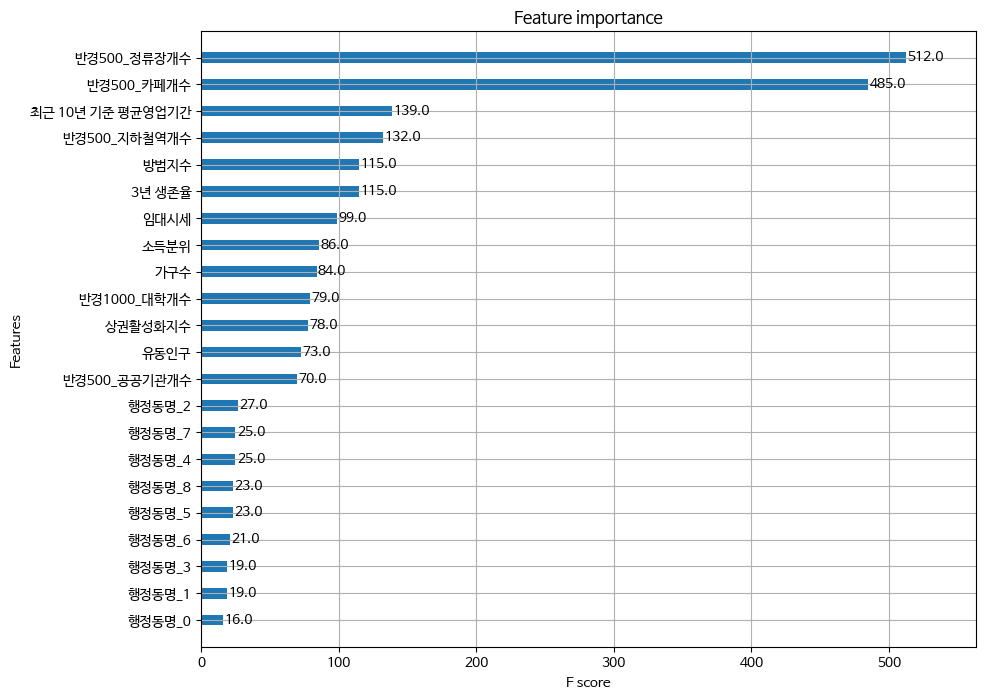

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

### X5

In [ ]:
#model 학습
xgb_clf.fit(X5_train_re, y5_train_re)

#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X5_train_re, y5_train_re, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X5_train_re, y5_train_re), (X5_test, y5_test)])

print(gridcv.best_params_)

#구한 best parameter로 적합한 이후 다시 roc score 계산
#best param에 대한 코드 있어야함
xgb_roc_score = roc_auc_score(y5_test, gridcv.predict_proba(X5_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.83399	validation_1-auc:0.45622
[1]	validation_0-auc:0.89299	validation_1-auc:0.59899
[2]	validation_0-auc:0.92633	validation_1-auc:0.59511


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.95219	validation_1-auc:0.62124
[4]	validation_0-auc:0.96303	validation_1-auc:0.64822
[5]	validation_0-auc:0.96754	validation_1-auc:0.66220
[6]	validation_0-auc:0.96988	validation_1-auc:0.71240
[7]	validation_0-auc:0.97579	validation_1-auc:0.71478
[8]	validation_0-auc:0.97786	validation_1-auc:0.72126
[9]	validation_0-auc:0.98037	validation_1-auc:0.71333
[10]	validation_0-auc:0.98152	validation_1-auc:0.73920
[11]	validation_0-auc:0.98428	validation_1-auc:0.73587
[12]	validation_0-auc:0.98430	validation_1-auc:0.74878
[13]	validation_0-auc:0.98577	validation_1-auc:0.75554
[14]	validation_0-auc:0.98651	validation_1-auc:0.76457
[15]	validation_0-auc:0.98812	validation_1-auc:0.76328
[16]	validation_0-auc:0.98980	validation_1-auc:0.76103
[17]	validation_0-auc:0.98978	validation_1-auc:0.76289
[18]	validation_0-auc:0.99162	validation_1-auc:0.76201
[19]	validation_0-auc:0.99226	validation_1-auc:0.76113
[20]	validation_0-auc:0.99265	validation_1-auc:0.76071
[21]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.84030	validation_1-auc:0.46725
[1]	validation_0-auc:0.89913	validation_1-auc:0.60085
[2]	validation_0-auc:0.93244	validation_1-auc:0.60615
[3]	validation_0-auc:0.95620	validation_1-auc:0.64103
[4]	validation_0-auc:0.96241	validation_1-auc:0.67719
[5]	validation_0-auc:0.96453	validation_1-auc:0.69821
[6]	validation_0-auc:0.96697	validation_1-auc:0.74022
[7]	validation_0-auc:0.96950	validation_1-auc:0.74333
[8]	validation_0-auc:0.97509	validation_1-auc:0.74903
[9]	validation_0-auc:0.97923	validation_1-auc:0.74697
[10]	validation_0-auc:0.97952	validation_1-auc:0.76758
[11]	validation_0-auc:0.98269	validation_1-auc:0.76353
[12]	validation_0-auc:0.98236	validation_1-auc:0.77250
[13]	validation_0-auc:0.98334	validation_1-auc:0.77736
[14]	validation_0-auc:0.98439	validation_1-auc:0.78125
[15]	validation_0-auc:0.98665	validation_1-auc:0.77960
[16]	validation_0-auc:0.98881	validation_1-auc:0.77633
[17]	validation_0-auc:0.98928	validation_1-auc:0.77837
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97914	validation_1-auc:0.71675
[9]	validation_0-auc:0.98201	validation_1-auc:0.70461
[10]	validation_0-auc:0.98250	validation_1-auc:0.73200
[11]	validation_0-auc:0.98479	validation_1-auc:0.73380
[12]	validation_0-auc:0.98503	validation_1-auc:0.75026
[13]	validation_0-auc:0.98599	validation_1-auc:0.75860
[14]	validation_0-auc:0.98562	validation_1-auc:0.76673
[15]	validation_0-auc:0.98818	validation_1-auc:0.76578
[16]	validation_0-auc:0.98902	validation_1-auc:0.76537
[17]	validation_0-auc:0.99010	validation_1-auc:0.76548
[18]	validation_0-auc:0.99143	validation_1-auc:0.75846
[19]	validation_0-auc:0.99201	validation_1-auc:0.75931
[20]	validation_0-auc:0.99247	validation_1-auc:0.75924
[21]	validation_0-auc:0.99283	validation_1-auc:0.76131
[22]	validation_0-auc:0.99354	validation_1-auc:0.75944
[23]	validation_0-auc:0.99420	validation_1-auc:0.75963
[24]	validation_0-auc:0.99445	validation_1-auc:0.76062
[25]	validation_0-auc:0.99454	validation_1-auc:0.76573
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97780	validation_1-auc:0.72259
[9]	validation_0-auc:0.98013	validation_1-auc:0.71410
[10]	validation_0-auc:0.98133	validation_1-auc:0.73977
[11]	validation_0-auc:0.98417	validation_1-auc:0.73943
[12]	validation_0-auc:0.98414	validation_1-auc:0.75089
[13]	validation_0-auc:0.98567	validation_1-auc:0.75796
[14]	validation_0-auc:0.98645	validation_1-auc:0.76639
[15]	validation_0-auc:0.98781	validation_1-auc:0.76429
[16]	validation_0-auc:0.98910	validation_1-auc:0.76265
[17]	validation_0-auc:0.98929	validation_1-auc:0.76360
[18]	validation_0-auc:0.99095	validation_1-auc:0.76340
[19]	validation_0-auc:0.99157	validation_1-auc:0.76275
[20]	validation_0-auc:0.99241	validation_1-auc:0.76394
[21]	validation_0-auc:0.99265	validation_1-auc:0.76610
[22]	validation_0-auc:0.99338	validation_1-auc:0.76595
[23]	validation_0-auc:0.99373	validation_1-auc:0.76500
[24]	validation_0-auc:0.99435	validation_1-auc:0.75817
[25]	validation_0-auc:0.99461	validation_1-auc:0.76479
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.97933	validation_1-auc:0.73002
[10]	validation_0-auc:0.97866	validation_1-auc:0.75160
[11]	validation_0-auc:0.98142	validation_1-auc:0.74919
[12]	validation_0-auc:0.98138	validation_1-auc:0.76134
[13]	validation_0-auc:0.98270	validation_1-auc:0.76561
[14]	validation_0-auc:0.98260	validation_1-auc:0.77015
[15]	validation_0-auc:0.98584	validation_1-auc:0.76246
[16]	validation_0-auc:0.98725	validation_1-auc:0.76480
[17]	validation_0-auc:0.98791	validation_1-auc:0.76648
[18]	validation_0-auc:0.99019	validation_1-auc:0.76658
[19]	validation_0-auc:0.99118	validation_1-auc:0.76660
[20]	validation_0-auc:0.99154	validation_1-auc:0.76533
[21]	validation_0-auc:0.99215	validation_1-auc:0.76663
[22]	validation_0-auc:0.99285	validation_1-auc:0.76112
[23]	validation_0-auc:0.99361	validation_1-auc:0.76118
[24]	validation_0-auc:0.99389	validation_1-auc:0.76278
[25]	validation_0-auc:0.99387	validation_1-auc:0.76785
[26]	validation_0-auc:0.99391	validation_1-auc:0.76664
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97907	validation_1-auc:0.71751
[9]	validation_0-auc:0.98178	validation_1-auc:0.70576
[10]	validation_0-auc:0.98203	validation_1-auc:0.73352
[11]	validation_0-auc:0.98376	validation_1-auc:0.73161
[12]	validation_0-auc:0.98380	validation_1-auc:0.74613
[13]	validation_0-auc:0.98561	validation_1-auc:0.75535
[14]	validation_0-auc:0.98619	validation_1-auc:0.76402
[15]	validation_0-auc:0.98763	validation_1-auc:0.76670
[16]	validation_0-auc:0.98909	validation_1-auc:0.76742
[17]	validation_0-auc:0.98990	validation_1-auc:0.76743
[18]	validation_0-auc:0.99087	validation_1-auc:0.75732
[19]	validation_0-auc:0.99168	validation_1-auc:0.75805
[20]	validation_0-auc:0.99237	validation_1-auc:0.75922
[21]	validation_0-auc:0.99283	validation_1-auc:0.76303
[22]	validation_0-auc:0.99333	validation_1-auc:0.75498
[23]	validation_0-auc:0.99406	validation_1-auc:0.75286
[24]	validation_0-auc:0.99441	validation_1-auc:0.74890
[25]	validation_0-auc:0.99434	validation_1-auc:0.75574
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98007	validation_1-auc:0.71621
[10]	validation_0-auc:0.98062	validation_1-auc:0.73919
[11]	validation_0-auc:0.98326	validation_1-auc:0.73655
[12]	validation_0-auc:0.98324	validation_1-auc:0.74749
[13]	validation_0-auc:0.98480	validation_1-auc:0.75293
[14]	validation_0-auc:0.98520	validation_1-auc:0.75993
[15]	validation_0-auc:0.98709	validation_1-auc:0.75900
[16]	validation_0-auc:0.98880	validation_1-auc:0.75742
[17]	validation_0-auc:0.98910	validation_1-auc:0.76287
[18]	validation_0-auc:0.99062	validation_1-auc:0.75946
[19]	validation_0-auc:0.99174	validation_1-auc:0.76067
[20]	validation_0-auc:0.99246	validation_1-auc:0.76170
[21]	validation_0-auc:0.99294	validation_1-auc:0.75724
[22]	validation_0-auc:0.99399	validation_1-auc:0.75537
[23]	validation_0-auc:0.99451	validation_1-auc:0.75255
[24]	validation_0-auc:0.99480	validation_1-auc:0.75013
[25]	validation_0-auc:0.99507	validation_1-auc:0.75523
[26]	validation_0-auc:0.99498	validation_1-auc:0.75695
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.97843	validation_1-auc:0.74902
[10]	validation_0-auc:0.97846	validation_1-auc:0.76951
[11]	validation_0-auc:0.98074	validation_1-auc:0.76453
[12]	validation_0-auc:0.98098	validation_1-auc:0.77353
[13]	validation_0-auc:0.98195	validation_1-auc:0.77547
[14]	validation_0-auc:0.98236	validation_1-auc:0.77406
[15]	validation_0-auc:0.98534	validation_1-auc:0.76844
[16]	validation_0-auc:0.98751	validation_1-auc:0.76692
[17]	validation_0-auc:0.98830	validation_1-auc:0.76531
[18]	validation_0-auc:0.99043	validation_1-auc:0.76155
[19]	validation_0-auc:0.99131	validation_1-auc:0.76392
[20]	validation_0-auc:0.99201	validation_1-auc:0.76455
[21]	validation_0-auc:0.99224	validation_1-auc:0.76559
[22]	validation_0-auc:0.99298	validation_1-auc:0.76422
[23]	validation_0-auc:0.99369	validation_1-auc:0.76362
[24]	validation_0-auc:0.99383	validation_1-auc:0.76060
[25]	validation_0-auc:0.99394	validation_1-auc:0.76440
[26]	validation_0-auc:0.99422	validation_1-auc:0.76086
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.97898	validation_1-auc:0.71569
[9]	validation_0-auc:0.98148	validation_1-auc:0.70419
[10]	validation_0-auc:0.98162	validation_1-auc:0.73270
[11]	validation_0-auc:0.98351	validation_1-auc:0.72940
[12]	validation_0-auc:0.98335	validation_1-auc:0.74322
[13]	validation_0-auc:0.98478	validation_1-auc:0.75399
[14]	validation_0-auc:0.98542	validation_1-auc:0.76398
[15]	validation_0-auc:0.98747	validation_1-auc:0.76583
[16]	validation_0-auc:0.98886	validation_1-auc:0.76123
[17]	validation_0-auc:0.98967	validation_1-auc:0.76333
[18]	validation_0-auc:0.99057	validation_1-auc:0.75874
[19]	validation_0-auc:0.99132	validation_1-auc:0.76047
[20]	validation_0-auc:0.99164	validation_1-auc:0.76358
[21]	validation_0-auc:0.99234	validation_1-auc:0.76577
[22]	validation_0-auc:0.99261	validation_1-auc:0.76364
[23]	validation_0-auc:0.99324	validation_1-auc:0.76292
[24]	validation_0-auc:0.99340	validation_1-auc:0.76142
[25]	validation_0-auc:0.99352	validation_1-auc:0.76446
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99073	validation_1-auc:0.70162
[8]	validation_0-auc:0.99289	validation_1-auc:0.69356
[9]	validation_0-auc:0.99404	validation_1-auc:0.68206
[10]	validation_0-auc:0.99447	validation_1-auc:0.70689
[11]	validation_0-auc:0.99548	validation_1-auc:0.70523
[12]	validation_0-auc:0.99562	validation_1-auc:0.72600
[13]	validation_0-auc:0.99624	validation_1-auc:0.74077
[14]	validation_0-auc:0.99633	validation_1-auc:0.74921
[15]	validation_0-auc:0.99697	validation_1-auc:0.74976
[16]	validation_0-auc:0.99723	validation_1-auc:0.74484
[17]	validation_0-auc:0.99749	validation_1-auc:0.74683
[18]	validation_0-auc:0.99784	validation_1-auc:0.74047
[19]	validation_0-auc:0.99808	validation_1-auc:0.74280
[20]	validation_0-auc:0.99818	validation_1-auc:0.74262
[21]	validation_0-auc:0.99843	validation_1-auc:0.74655
[22]	validation_0-auc:0.99861	validation_1-auc:0.74351
[23]	validation_0-auc:0.99866	validation_1-auc:0.74322
[24]	validation_0-auc:0.99871	validation_1-auc:0.74206
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99009	validation_1-auc:0.68267
[8]	validation_0-auc:0.99244	validation_1-auc:0.67972
[9]	validation_0-auc:0.99399	validation_1-auc:0.66933
[10]	validation_0-auc:0.99437	validation_1-auc:0.69769
[11]	validation_0-auc:0.99576	validation_1-auc:0.69823
[12]	validation_0-auc:0.99593	validation_1-auc:0.71404
[13]	validation_0-auc:0.99626	validation_1-auc:0.72638
[14]	validation_0-auc:0.99627	validation_1-auc:0.73837
[15]	validation_0-auc:0.99690	validation_1-auc:0.73675
[16]	validation_0-auc:0.99722	validation_1-auc:0.72844
[17]	validation_0-auc:0.99739	validation_1-auc:0.72954
[18]	validation_0-auc:0.99769	validation_1-auc:0.72486
[19]	validation_0-auc:0.99794	validation_1-auc:0.72533
[20]	validation_0-auc:0.99816	validation_1-auc:0.72831
[21]	validation_0-auc:0.99833	validation_1-auc:0.72875
[22]	validation_0-auc:0.99860	validation_1-auc:0.72590
[23]	validation_0-auc:0.99871	validation_1-auc:0.72795
[24]	validation_0-auc:0.99875	validation_1-auc:0.72843
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96965	validation_1-auc:0.59531
[3]	validation_0-auc:0.98016	validation_1-auc:0.59892
[4]	validation_0-auc:0.98337	validation_1-auc:0.63192
[5]	validation_0-auc:0.98558	validation_1-auc:0.64259
[6]	validation_0-auc:0.98688	validation_1-auc:0.69186
[7]	validation_0-auc:0.98889	validation_1-auc:0.69923
[8]	validation_0-auc:0.99265	validation_1-auc:0.69865
[9]	validation_0-auc:0.99366	validation_1-auc:0.68944
[10]	validation_0-auc:0.99414	validation_1-auc:0.71418
[11]	validation_0-auc:0.99504	validation_1-auc:0.71081
[12]	validation_0-auc:0.99519	validation_1-auc:0.72576
[13]	validation_0-auc:0.99579	validation_1-auc:0.74197
[14]	validation_0-auc:0.99584	validation_1-auc:0.75311
[15]	validation_0-auc:0.99637	validation_1-auc:0.74874
[16]	validation_0-auc:0.99675	validation_1-auc:0.74445
[17]	validation_0-auc:0.99695	validation_1-auc:0.74891
[18]	validation_0-auc:0.99716	validation_1-auc:0.73951
[19]	validation_0-auc:0.99733	validation_1-auc:0.73923
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99091	validation_1-auc:0.69154
[8]	validation_0-auc:0.99269	validation_1-auc:0.68789
[9]	validation_0-auc:0.99401	validation_1-auc:0.67734
[10]	validation_0-auc:0.99431	validation_1-auc:0.70319
[11]	validation_0-auc:0.99523	validation_1-auc:0.70881
[12]	validation_0-auc:0.99532	validation_1-auc:0.71993
[13]	validation_0-auc:0.99599	validation_1-auc:0.73312
[14]	validation_0-auc:0.99600	validation_1-auc:0.74339
[15]	validation_0-auc:0.99637	validation_1-auc:0.74435
[16]	validation_0-auc:0.99670	validation_1-auc:0.74264
[17]	validation_0-auc:0.99694	validation_1-auc:0.74265
[18]	validation_0-auc:0.99727	validation_1-auc:0.73892
[19]	validation_0-auc:0.99749	validation_1-auc:0.74124
[20]	validation_0-auc:0.99757	validation_1-auc:0.74182
[21]	validation_0-auc:0.99786	validation_1-auc:0.74203
[22]	validation_0-auc:0.99810	validation_1-auc:0.73896
[23]	validation_0-auc:0.99821	validation_1-auc:0.74224
[24]	validation_0-auc:0.99832	validation_1-auc:0.74139
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98852	validation_1-auc:0.68409
[7]	validation_0-auc:0.99019	validation_1-auc:0.68033
[8]	validation_0-auc:0.99195	validation_1-auc:0.67866
[9]	validation_0-auc:0.99330	validation_1-auc:0.66653
[10]	validation_0-auc:0.99349	validation_1-auc:0.69619
[11]	validation_0-auc:0.99473	validation_1-auc:0.69876
[12]	validation_0-auc:0.99495	validation_1-auc:0.71523
[13]	validation_0-auc:0.99534	validation_1-auc:0.72881
[14]	validation_0-auc:0.99545	validation_1-auc:0.73911
[15]	validation_0-auc:0.99629	validation_1-auc:0.73600
[16]	validation_0-auc:0.99672	validation_1-auc:0.73143
[17]	validation_0-auc:0.99706	validation_1-auc:0.73527
[18]	validation_0-auc:0.99751	validation_1-auc:0.73321
[19]	validation_0-auc:0.99773	validation_1-auc:0.73389
[20]	validation_0-auc:0.99792	validation_1-auc:0.73527
[21]	validation_0-auc:0.99802	validation_1-auc:0.73800
[22]	validation_0-auc:0.99822	validation_1-auc:0.73792
[23]	validation_0-auc:0.99836	validation_1-auc:0.73900
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.99064	validation_1-auc:0.68604
[8]	validation_0-auc:0.99287	validation_1-auc:0.68466
[9]	validation_0-auc:0.99419	validation_1-auc:0.67897
[10]	validation_0-auc:0.99421	validation_1-auc:0.70268
[11]	validation_0-auc:0.99502	validation_1-auc:0.70324
[12]	validation_0-auc:0.99512	validation_1-auc:0.71969
[13]	validation_0-auc:0.99570	validation_1-auc:0.73583
[14]	validation_0-auc:0.99578	validation_1-auc:0.74892
[15]	validation_0-auc:0.99621	validation_1-auc:0.74832
[16]	validation_0-auc:0.99661	validation_1-auc:0.74301
[17]	validation_0-auc:0.99681	validation_1-auc:0.74461
[18]	validation_0-auc:0.99701	validation_1-auc:0.73685
[19]	validation_0-auc:0.99730	validation_1-auc:0.74005
[20]	validation_0-auc:0.99742	validation_1-auc:0.74190
[21]	validation_0-auc:0.99773	validation_1-auc:0.74209
[22]	validation_0-auc:0.99779	validation_1-auc:0.73826
[23]	validation_0-auc:0.99795	validation_1-auc:0.73918
[24]	validation_0-auc:0.99804	validation_1-auc:0.74093
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98663	validation_1-auc:0.67387
[7]	validation_0-auc:0.98824	validation_1-auc:0.67740
[8]	validation_0-auc:0.99079	validation_1-auc:0.66957
[9]	validation_0-auc:0.99321	validation_1-auc:0.66783
[10]	validation_0-auc:0.99352	validation_1-auc:0.69875
[11]	validation_0-auc:0.99460	validation_1-auc:0.70008
[12]	validation_0-auc:0.99476	validation_1-auc:0.71381
[13]	validation_0-auc:0.99555	validation_1-auc:0.72912
[14]	validation_0-auc:0.99563	validation_1-auc:0.73694
[15]	validation_0-auc:0.99599	validation_1-auc:0.73952
[16]	validation_0-auc:0.99625	validation_1-auc:0.73573
[17]	validation_0-auc:0.99665	validation_1-auc:0.73900
[18]	validation_0-auc:0.99702	validation_1-auc:0.73333
[19]	validation_0-auc:0.99732	validation_1-auc:0.73677
[20]	validation_0-auc:0.99735	validation_1-auc:0.73666
[21]	validation_0-auc:0.99766	validation_1-auc:0.74096
[22]	validation_0-auc:0.99784	validation_1-auc:0.73671
[23]	validation_0-auc:0.99789	validation_1-auc:0.73930
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98585	validation_1-auc:0.70175
[7]	validation_0-auc:0.98811	validation_1-auc:0.69630
[8]	validation_0-auc:0.99079	validation_1-auc:0.69241
[9]	validation_0-auc:0.99223	validation_1-auc:0.68165
[10]	validation_0-auc:0.99228	validation_1-auc:0.70827
[11]	validation_0-auc:0.99331	validation_1-auc:0.70565
[12]	validation_0-auc:0.99368	validation_1-auc:0.71907
[13]	validation_0-auc:0.99432	validation_1-auc:0.73018
[14]	validation_0-auc:0.99449	validation_1-auc:0.73837
[15]	validation_0-auc:0.99533	validation_1-auc:0.73891
[16]	validation_0-auc:0.99595	validation_1-auc:0.73775
[17]	validation_0-auc:0.99631	validation_1-auc:0.73685
[18]	validation_0-auc:0.99663	validation_1-auc:0.72987
[19]	validation_0-auc:0.99693	validation_1-auc:0.73103
[20]	validation_0-auc:0.99712	validation_1-auc:0.72954
[21]	validation_0-auc:0.99734	validation_1-auc:0.73271
[22]	validation_0-auc:0.99763	validation_1-auc:0.73126
[23]	validation_0-auc:0.99776	validation_1-auc:0.73339
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98719	validation_1-auc:0.70398
[8]	validation_0-auc:0.99174	validation_1-auc:0.70330
[9]	validation_0-auc:0.99305	validation_1-auc:0.69819
[10]	validation_0-auc:0.99313	validation_1-auc:0.72468
[11]	validation_0-auc:0.99415	validation_1-auc:0.72985
[12]	validation_0-auc:0.99449	validation_1-auc:0.74277
[13]	validation_0-auc:0.99497	validation_1-auc:0.75057
[14]	validation_0-auc:0.99520	validation_1-auc:0.75849
[15]	validation_0-auc:0.99576	validation_1-auc:0.75894
[16]	validation_0-auc:0.99635	validation_1-auc:0.75623
[17]	validation_0-auc:0.99651	validation_1-auc:0.75414
[18]	validation_0-auc:0.99681	validation_1-auc:0.74835
[19]	validation_0-auc:0.99697	validation_1-auc:0.74707
[20]	validation_0-auc:0.99714	validation_1-auc:0.74727
[21]	validation_0-auc:0.99745	validation_1-auc:0.74961
[22]	validation_0-auc:0.99753	validation_1-auc:0.74929
[23]	validation_0-auc:0.99761	validation_1-auc:0.75063
[24]	validation_0-auc:0.99771	validation_1-auc:0.74809
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99572	validation_1-auc:0.63661
[6]	validation_0-auc:0.99620	validation_1-auc:0.67543
[7]	validation_0-auc:0.99715	validation_1-auc:0.67456
[8]	validation_0-auc:0.99790	validation_1-auc:0.67220
[9]	validation_0-auc:0.99835	validation_1-auc:0.66361
[10]	validation_0-auc:0.99833	validation_1-auc:0.69242
[11]	validation_0-auc:0.99860	validation_1-auc:0.69450
[12]	validation_0-auc:0.99864	validation_1-auc:0.71268
[13]	validation_0-auc:0.99871	validation_1-auc:0.72807
[14]	validation_0-auc:0.99881	validation_1-auc:0.74016
[15]	validation_0-auc:0.99915	validation_1-auc:0.74148
[16]	validation_0-auc:0.99930	validation_1-auc:0.73898
[17]	validation_0-auc:0.99930	validation_1-auc:0.73769
[18]	validation_0-auc:0.99932	validation_1-auc:0.73060
[19]	validation_0-auc:0.99935	validation_1-auc:0.73161
[20]	validation_0-auc:0.99940	validation_1-auc:0.73017
[21]	validation_0-auc:0.99947	validation_1-auc:0.73432
[22]	validation_0-auc:0.99954	validation_1-auc:0.73242
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99398	validation_1-auc:0.63260
[6]	validation_0-auc:0.99499	validation_1-auc:0.66503
[7]	validation_0-auc:0.99579	validation_1-auc:0.66733
[8]	validation_0-auc:0.99704	validation_1-auc:0.66541
[9]	validation_0-auc:0.99786	validation_1-auc:0.65752
[10]	validation_0-auc:0.99812	validation_1-auc:0.68197
[11]	validation_0-auc:0.99840	validation_1-auc:0.68914
[12]	validation_0-auc:0.99851	validation_1-auc:0.70580
[13]	validation_0-auc:0.99859	validation_1-auc:0.72163
[14]	validation_0-auc:0.99866	validation_1-auc:0.73606
[15]	validation_0-auc:0.99884	validation_1-auc:0.73516
[16]	validation_0-auc:0.99901	validation_1-auc:0.72601
[17]	validation_0-auc:0.99906	validation_1-auc:0.72560
[18]	validation_0-auc:0.99917	validation_1-auc:0.71967
[19]	validation_0-auc:0.99923	validation_1-auc:0.72173
[20]	validation_0-auc:0.99927	validation_1-auc:0.72516
[21]	validation_0-auc:0.99937	validation_1-auc:0.72953
[22]	validation_0-auc:0.99944	validation_1-auc:0.72703
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99369	validation_1-auc:0.64964
[6]	validation_0-auc:0.99456	validation_1-auc:0.69175
[7]	validation_0-auc:0.99573	validation_1-auc:0.69583
[8]	validation_0-auc:0.99659	validation_1-auc:0.69377
[9]	validation_0-auc:0.99692	validation_1-auc:0.67940
[10]	validation_0-auc:0.99714	validation_1-auc:0.70856
[11]	validation_0-auc:0.99758	validation_1-auc:0.70538
[12]	validation_0-auc:0.99774	validation_1-auc:0.71644
[13]	validation_0-auc:0.99774	validation_1-auc:0.73372
[14]	validation_0-auc:0.99770	validation_1-auc:0.74450
[15]	validation_0-auc:0.99801	validation_1-auc:0.74998
[16]	validation_0-auc:0.99832	validation_1-auc:0.74825
[17]	validation_0-auc:0.99838	validation_1-auc:0.74846
[18]	validation_0-auc:0.99841	validation_1-auc:0.74535
[19]	validation_0-auc:0.99851	validation_1-auc:0.75135
[20]	validation_0-auc:0.99861	validation_1-auc:0.75080
[21]	validation_0-auc:0.99868	validation_1-auc:0.75160
[22]	validation_0-auc:0.99868	validation_1-auc:0.75038
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99373	validation_1-auc:0.62190
[5]	validation_0-auc:0.99474	validation_1-auc:0.63585
[6]	validation_0-auc:0.99521	validation_1-auc:0.67708
[7]	validation_0-auc:0.99635	validation_1-auc:0.67992
[8]	validation_0-auc:0.99714	validation_1-auc:0.67844
[9]	validation_0-auc:0.99768	validation_1-auc:0.66502
[10]	validation_0-auc:0.99787	validation_1-auc:0.69594
[11]	validation_0-auc:0.99822	validation_1-auc:0.69540
[12]	validation_0-auc:0.99827	validation_1-auc:0.71170
[13]	validation_0-auc:0.99830	validation_1-auc:0.72363
[14]	validation_0-auc:0.99839	validation_1-auc:0.73257
[15]	validation_0-auc:0.99863	validation_1-auc:0.73237
[16]	validation_0-auc:0.99886	validation_1-auc:0.72745
[17]	validation_0-auc:0.99896	validation_1-auc:0.72636
[18]	validation_0-auc:0.99907	validation_1-auc:0.72163
[19]	validation_0-auc:0.99912	validation_1-auc:0.72476
[20]	validation_0-auc:0.99918	validation_1-auc:0.72758
[21]	validation_0-auc:0.99928	validation_1-auc:0.73114
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99379	validation_1-auc:0.66094
[7]	validation_0-auc:0.99508	validation_1-auc:0.67218
[8]	validation_0-auc:0.99632	validation_1-auc:0.65997
[9]	validation_0-auc:0.99704	validation_1-auc:0.64648
[10]	validation_0-auc:0.99726	validation_1-auc:0.67344
[11]	validation_0-auc:0.99766	validation_1-auc:0.68121
[12]	validation_0-auc:0.99783	validation_1-auc:0.70052
[13]	validation_0-auc:0.99794	validation_1-auc:0.72000
[14]	validation_0-auc:0.99796	validation_1-auc:0.73146
[15]	validation_0-auc:0.99824	validation_1-auc:0.73386
[16]	validation_0-auc:0.99853	validation_1-auc:0.73193
[17]	validation_0-auc:0.99870	validation_1-auc:0.73324
[18]	validation_0-auc:0.99881	validation_1-auc:0.72651
[19]	validation_0-auc:0.99888	validation_1-auc:0.73271
[20]	validation_0-auc:0.99901	validation_1-auc:0.73368
[21]	validation_0-auc:0.99910	validation_1-auc:0.73531
[22]	validation_0-auc:0.99917	validation_1-auc:0.73069
[23]	validation_0-auc:0.99920	validation_1-auc:0.73268
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99287	validation_1-auc:0.64641
[6]	validation_0-auc:0.99389	validation_1-auc:0.69166
[7]	validation_0-auc:0.99519	validation_1-auc:0.68983
[8]	validation_0-auc:0.99617	validation_1-auc:0.69050
[9]	validation_0-auc:0.99670	validation_1-auc:0.67342
[10]	validation_0-auc:0.99683	validation_1-auc:0.70443
[11]	validation_0-auc:0.99730	validation_1-auc:0.70586
[12]	validation_0-auc:0.99765	validation_1-auc:0.72356
[13]	validation_0-auc:0.99778	validation_1-auc:0.74000
[14]	validation_0-auc:0.99778	validation_1-auc:0.74984
[15]	validation_0-auc:0.99805	validation_1-auc:0.75062
[16]	validation_0-auc:0.99826	validation_1-auc:0.74898
[17]	validation_0-auc:0.99839	validation_1-auc:0.74710
[18]	validation_0-auc:0.99844	validation_1-auc:0.74117
[19]	validation_0-auc:0.99858	validation_1-auc:0.74793
[20]	validation_0-auc:0.99856	validation_1-auc:0.74692
[21]	validation_0-auc:0.99864	validation_1-auc:0.74950
[22]	validation_0-auc:0.99871	validation_1-auc:0.74692
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99442	validation_1-auc:0.66935
[7]	validation_0-auc:0.99547	validation_1-auc:0.67125
[8]	validation_0-auc:0.99617	validation_1-auc:0.66421
[9]	validation_0-auc:0.99694	validation_1-auc:0.65111
[10]	validation_0-auc:0.99712	validation_1-auc:0.68251
[11]	validation_0-auc:0.99753	validation_1-auc:0.68398
[12]	validation_0-auc:0.99770	validation_1-auc:0.70479
[13]	validation_0-auc:0.99786	validation_1-auc:0.71403
[14]	validation_0-auc:0.99786	validation_1-auc:0.72540
[15]	validation_0-auc:0.99810	validation_1-auc:0.72766
[16]	validation_0-auc:0.99832	validation_1-auc:0.72287
[17]	validation_0-auc:0.99851	validation_1-auc:0.72571
[18]	validation_0-auc:0.99875	validation_1-auc:0.71763
[19]	validation_0-auc:0.99881	validation_1-auc:0.72217
[20]	validation_0-auc:0.99890	validation_1-auc:0.72301
[21]	validation_0-auc:0.99902	validation_1-auc:0.72570
[22]	validation_0-auc:0.99910	validation_1-auc:0.71920
[23]	validation_0-auc:0.99909	validation_1-auc:0.72155
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99188	validation_1-auc:0.62652
[6]	validation_0-auc:0.99306	validation_1-auc:0.66559
[7]	validation_0-auc:0.99462	validation_1-auc:0.66140
[8]	validation_0-auc:0.99564	validation_1-auc:0.65747
[9]	validation_0-auc:0.99604	validation_1-auc:0.64810
[10]	validation_0-auc:0.99644	validation_1-auc:0.68122
[11]	validation_0-auc:0.99701	validation_1-auc:0.68244
[12]	validation_0-auc:0.99713	validation_1-auc:0.70247
[13]	validation_0-auc:0.99742	validation_1-auc:0.71731
[14]	validation_0-auc:0.99742	validation_1-auc:0.72952
[15]	validation_0-auc:0.99767	validation_1-auc:0.72924
[16]	validation_0-auc:0.99794	validation_1-auc:0.72441
[17]	validation_0-auc:0.99809	validation_1-auc:0.72413
[18]	validation_0-auc:0.99829	validation_1-auc:0.71672
[19]	validation_0-auc:0.99838	validation_1-auc:0.72001
[20]	validation_0-auc:0.99856	validation_1-auc:0.72076
[21]	validation_0-auc:0.99868	validation_1-auc:0.72479
[22]	validation_0-auc:0.99879	validation_1-auc:0.72032
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.99291	validation_1-auc:0.69855
[7]	validation_0-auc:0.99473	validation_1-auc:0.69565
[8]	validation_0-auc:0.99570	validation_1-auc:0.69398
[9]	validation_0-auc:0.99624	validation_1-auc:0.68351
[10]	validation_0-auc:0.99648	validation_1-auc:0.70904
[11]	validation_0-auc:0.99698	validation_1-auc:0.70959
[12]	validation_0-auc:0.99723	validation_1-auc:0.72630
[13]	validation_0-auc:0.99733	validation_1-auc:0.74030
[14]	validation_0-auc:0.99737	validation_1-auc:0.75134
[15]	validation_0-auc:0.99769	validation_1-auc:0.74968
[16]	validation_0-auc:0.99783	validation_1-auc:0.74504
[17]	validation_0-auc:0.99797	validation_1-auc:0.74549
[18]	validation_0-auc:0.99820	validation_1-auc:0.74130
[19]	validation_0-auc:0.99829	validation_1-auc:0.74308
[20]	validation_0-auc:0.99843	validation_1-auc:0.74358
[21]	validation_0-auc:0.99855	validation_1-auc:0.74549
[22]	validation_0-auc:0.99869	validation_1-auc:0.74199
[23]	validation_0-auc:0.99870	validation_1-auc:0.74680
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96996	validation_1-auc:0.76866
[8]	validation_0-auc:0.97273	validation_1-auc:0.77432
[9]	validation_0-auc:0.97646	validation_1-auc:0.77861
[10]	validation_0-auc:0.97814	validation_1-auc:0.78453
[11]	validation_0-auc:0.98040	validation_1-auc:0.78330
[12]	validation_0-auc:0.98143	validation_1-auc:0.78339
[13]	validation_0-auc:0.98398	validation_1-auc:0.78590
[14]	validation_0-auc:0.98474	validation_1-auc:0.78680
[15]	validation_0-auc:0.98638	validation_1-auc:0.78223
[16]	validation_0-auc:0.98861	validation_1-auc:0.77929
[17]	validation_0-auc:0.98947	validation_1-auc:0.77376
[18]	validation_0-auc:0.99116	validation_1-auc:0.77571
[19]	validation_0-auc:0.99257	validation_1-auc:0.77510
[20]	validation_0-auc:0.99356	validation_1-auc:0.76941
[21]	validation_0-auc:0.99365	validation_1-auc:0.76670
[22]	validation_0-auc:0.99406	validation_1-auc:0.76820
[23]	validation_0-auc:0.99472	validation_1-auc:0.76540
[24]	validation_0-auc:0.99489	validation_1-auc:0.76186
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96947	validation_1-auc:0.77733
[8]	validation_0-auc:0.97152	validation_1-auc:0.77767
[9]	validation_0-auc:0.97441	validation_1-auc:0.78055
[10]	validation_0-auc:0.97493	validation_1-auc:0.78647
[11]	validation_0-auc:0.97747	validation_1-auc:0.78504
[12]	validation_0-auc:0.97995	validation_1-auc:0.78383
[13]	validation_0-auc:0.98413	validation_1-auc:0.77751
[14]	validation_0-auc:0.98506	validation_1-auc:0.78178
[15]	validation_0-auc:0.98587	validation_1-auc:0.78201
[16]	validation_0-auc:0.98753	validation_1-auc:0.78332
[17]	validation_0-auc:0.98884	validation_1-auc:0.78038
[18]	validation_0-auc:0.99083	validation_1-auc:0.77827
[19]	validation_0-auc:0.99081	validation_1-auc:0.77940
[20]	validation_0-auc:0.99158	validation_1-auc:0.78008
[21]	validation_0-auc:0.99227	validation_1-auc:0.77673
[22]	validation_0-auc:0.99339	validation_1-auc:0.77699
[23]	validation_0-auc:0.99394	validation_1-auc:0.77478
[24]	validation_0-auc:0.99427	validation_1-auc:0.77008
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.96297	validation_1-auc:0.78539
[7]	validation_0-auc:0.96807	validation_1-auc:0.78767
[8]	validation_0-auc:0.97103	validation_1-auc:0.78288
[9]	validation_0-auc:0.97431	validation_1-auc:0.78828
[10]	validation_0-auc:0.97593	validation_1-auc:0.79395
[11]	validation_0-auc:0.97830	validation_1-auc:0.78642
[12]	validation_0-auc:0.98009	validation_1-auc:0.78524
[13]	validation_0-auc:0.98018	validation_1-auc:0.78644
[14]	validation_0-auc:0.98101	validation_1-auc:0.78455
[15]	validation_0-auc:0.98235	validation_1-auc:0.78263
[16]	validation_0-auc:0.98535	validation_1-auc:0.77809
[17]	validation_0-auc:0.98764	validation_1-auc:0.77520
[18]	validation_0-auc:0.98877	validation_1-auc:0.77491
[19]	validation_0-auc:0.99034	validation_1-auc:0.76860
[20]	validation_0-auc:0.99092	validation_1-auc:0.76831
[21]	validation_0-auc:0.99168	validation_1-auc:0.76935
[22]	validation_0-auc:0.99250	validation_1-auc:0.76804
[23]	validation_0-auc:0.99395	validation_1-auc:0.76714
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96996	validation_1-auc:0.76866
[8]	validation_0-auc:0.97266	validation_1-auc:0.77454
[9]	validation_0-auc:0.97640	validation_1-auc:0.77872
[10]	validation_0-auc:0.97808	validation_1-auc:0.78461
[11]	validation_0-auc:0.98002	validation_1-auc:0.78338
[12]	validation_0-auc:0.98109	validation_1-auc:0.78350
[13]	validation_0-auc:0.98328	validation_1-auc:0.78599
[14]	validation_0-auc:0.98393	validation_1-auc:0.78673
[15]	validation_0-auc:0.98534	validation_1-auc:0.78216
[16]	validation_0-auc:0.98741	validation_1-auc:0.77792
[17]	validation_0-auc:0.98840	validation_1-auc:0.77236
[18]	validation_0-auc:0.99020	validation_1-auc:0.77410
[19]	validation_0-auc:0.99143	validation_1-auc:0.77302
[20]	validation_0-auc:0.99167	validation_1-auc:0.77337
[21]	validation_0-auc:0.99249	validation_1-auc:0.77246
[22]	validation_0-auc:0.99289	validation_1-auc:0.76786
[23]	validation_0-auc:0.99351	validation_1-auc:0.76896
[24]	validation_0-auc:0.99447	validation_1-auc:0.76804
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96899	validation_1-auc:0.77762
[8]	validation_0-auc:0.97129	validation_1-auc:0.77809
[9]	validation_0-auc:0.97422	validation_1-auc:0.77748
[10]	validation_0-auc:0.97557	validation_1-auc:0.77877
[11]	validation_0-auc:0.97777	validation_1-auc:0.77339
[12]	validation_0-auc:0.98035	validation_1-auc:0.77534
[13]	validation_0-auc:0.98289	validation_1-auc:0.77296
[14]	validation_0-auc:0.98307	validation_1-auc:0.77768
[15]	validation_0-auc:0.98497	validation_1-auc:0.77554
[16]	validation_0-auc:0.98710	validation_1-auc:0.77459
[17]	validation_0-auc:0.98809	validation_1-auc:0.77007
[18]	validation_0-auc:0.98893	validation_1-auc:0.76733
[19]	validation_0-auc:0.99050	validation_1-auc:0.76887
[20]	validation_0-auc:0.99129	validation_1-auc:0.76638
[21]	validation_0-auc:0.99238	validation_1-auc:0.76304
[22]	validation_0-auc:0.99277	validation_1-auc:0.76137
[23]	validation_0-auc:0.99339	validation_1-auc:0.75674
[24]	validation_0-auc:0.99379	validation_1-auc:0.75808
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96807	validation_1-auc:0.78767
[8]	validation_0-auc:0.97107	validation_1-auc:0.78296
[9]	validation_0-auc:0.97406	validation_1-auc:0.78704
[10]	validation_0-auc:0.97574	validation_1-auc:0.79280
[11]	validation_0-auc:0.97822	validation_1-auc:0.78514
[12]	validation_0-auc:0.97986	validation_1-auc:0.78399
[13]	validation_0-auc:0.98004	validation_1-auc:0.78523
[14]	validation_0-auc:0.98091	validation_1-auc:0.78378
[15]	validation_0-auc:0.98151	validation_1-auc:0.78288
[16]	validation_0-auc:0.98465	validation_1-auc:0.77792
[17]	validation_0-auc:0.98815	validation_1-auc:0.77575
[18]	validation_0-auc:0.98990	validation_1-auc:0.77073
[19]	validation_0-auc:0.99104	validation_1-auc:0.76800
[20]	validation_0-auc:0.99229	validation_1-auc:0.76845
[21]	validation_0-auc:0.99293	validation_1-auc:0.76813
[22]	validation_0-auc:0.99352	validation_1-auc:0.76830
[23]	validation_0-auc:0.99419	validation_1-auc:0.76665
[24]	validation_0-auc:0.99456	validation_1-auc:0.76430
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.96657	validation_1-auc:0.76587
[7]	validation_0-auc:0.96977	validation_1-auc:0.77039
[8]	validation_0-auc:0.97416	validation_1-auc:0.77622
[9]	validation_0-auc:0.97764	validation_1-auc:0.77704
[10]	validation_0-auc:0.97873	validation_1-auc:0.78564
[11]	validation_0-auc:0.98002	validation_1-auc:0.78168
[12]	validation_0-auc:0.98060	validation_1-auc:0.78091
[13]	validation_0-auc:0.98443	validation_1-auc:0.77675
[14]	validation_0-auc:0.98574	validation_1-auc:0.77641
[15]	validation_0-auc:0.98611	validation_1-auc:0.77570
[16]	validation_0-auc:0.98818	validation_1-auc:0.77432
[17]	validation_0-auc:0.98858	validation_1-auc:0.77098
[18]	validation_0-auc:0.98992	validation_1-auc:0.76720
[19]	validation_0-auc:0.99141	validation_1-auc:0.76995
[20]	validation_0-auc:0.99243	validation_1-auc:0.76483
[21]	validation_0-auc:0.99308	validation_1-auc:0.76602
[22]	validation_0-auc:0.99340	validation_1-auc:0.76957
[23]	validation_0-auc:0.99402	validation_1-auc:0.76450
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.96448	validation_1-auc:0.77265
[7]	validation_0-auc:0.96941	validation_1-auc:0.77923
[8]	validation_0-auc:0.97145	validation_1-auc:0.77949
[9]	validation_0-auc:0.97430	validation_1-auc:0.78213
[10]	validation_0-auc:0.97467	validation_1-auc:0.78808
[11]	validation_0-auc:0.97744	validation_1-auc:0.78648
[12]	validation_0-auc:0.97984	validation_1-auc:0.78542
[13]	validation_0-auc:0.98257	validation_1-auc:0.78089
[14]	validation_0-auc:0.98364	validation_1-auc:0.78085
[15]	validation_0-auc:0.98559	validation_1-auc:0.78122
[16]	validation_0-auc:0.98763	validation_1-auc:0.77746
[17]	validation_0-auc:0.98849	validation_1-auc:0.77518
[18]	validation_0-auc:0.98999	validation_1-auc:0.77499
[19]	validation_0-auc:0.99065	validation_1-auc:0.77629
[20]	validation_0-auc:0.99151	validation_1-auc:0.77313
[21]	validation_0-auc:0.99181	validation_1-auc:0.77533
[22]	validation_0-auc:0.99241	validation_1-auc:0.77543
[23]	validation_0-auc:0.99326	validation_1-auc:0.77258
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.96297	validation_1-auc:0.78539
[7]	validation_0-auc:0.96807	validation_1-auc:0.78767
[8]	validation_0-auc:0.97072	validation_1-auc:0.78277
[9]	validation_0-auc:0.97316	validation_1-auc:0.78499
[10]	validation_0-auc:0.97490	validation_1-auc:0.79243
[11]	validation_0-auc:0.97700	validation_1-auc:0.78582
[12]	validation_0-auc:0.97872	validation_1-auc:0.78457
[13]	validation_0-auc:0.97981	validation_1-auc:0.78706
[14]	validation_0-auc:0.98037	validation_1-auc:0.78906
[15]	validation_0-auc:0.98351	validation_1-auc:0.78342
[16]	validation_0-auc:0.98646	validation_1-auc:0.78234
[17]	validation_0-auc:0.98803	validation_1-auc:0.77881
[18]	validation_0-auc:0.98852	validation_1-auc:0.77834
[19]	validation_0-auc:0.98939	validation_1-auc:0.77811
[20]	validation_0-auc:0.99166	validation_1-auc:0.77686
[21]	validation_0-auc:0.99243	validation_1-auc:0.77364
[22]	validation_0-auc:0.99252	validation_1-auc:0.77502
[23]	validation_0-auc:0.99334	validation_1-auc:0.77171
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96874	validation_1-auc:0.75879
[3]	validation_0-auc:0.97677	validation_1-auc:0.73138
[4]	validation_0-auc:0.98056	validation_1-auc:0.73068
[5]	validation_0-auc:0.98302	validation_1-auc:0.72840
[6]	validation_0-auc:0.98643	validation_1-auc:0.75105
[7]	validation_0-auc:0.98953	validation_1-auc:0.75549
[8]	validation_0-auc:0.99048	validation_1-auc:0.75087
[9]	validation_0-auc:0.99221	validation_1-auc:0.75690
[10]	validation_0-auc:0.99315	validation_1-auc:0.76301
[11]	validation_0-auc:0.99371	validation_1-auc:0.75512
[12]	validation_0-auc:0.99435	validation_1-auc:0.76259
[13]	validation_0-auc:0.99463	validation_1-auc:0.76531
[14]	validation_0-auc:0.99502	validation_1-auc:0.76514
[15]	validation_0-auc:0.99529	validation_1-auc:0.76215
[16]	validation_0-auc:0.99628	validation_1-auc:0.76509
[17]	validation_0-auc:0.99678	validation_1-auc:0.76451
[18]	validation_0-auc:0.99704	validation_1-auc:0.76586
[19]	validation_0-auc:0.99733	validation_1-auc:0.76553
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98646	validation_1-auc:0.71843
[6]	validation_0-auc:0.98919	validation_1-auc:0.74748
[7]	validation_0-auc:0.99110	validation_1-auc:0.75054
[8]	validation_0-auc:0.99340	validation_1-auc:0.74305
[9]	validation_0-auc:0.99463	validation_1-auc:0.74943
[10]	validation_0-auc:0.99522	validation_1-auc:0.76256
[11]	validation_0-auc:0.99603	validation_1-auc:0.75476
[12]	validation_0-auc:0.99632	validation_1-auc:0.76437
[13]	validation_0-auc:0.99651	validation_1-auc:0.76638
[14]	validation_0-auc:0.99672	validation_1-auc:0.77217
[15]	validation_0-auc:0.99688	validation_1-auc:0.77126
[16]	validation_0-auc:0.99742	validation_1-auc:0.76605
[17]	validation_0-auc:0.99758	validation_1-auc:0.76566
[18]	validation_0-auc:0.99783	validation_1-auc:0.76551
[19]	validation_0-auc:0.99800	validation_1-auc:0.76046
[20]	validation_0-auc:0.99832	validation_1-auc:0.75637
[21]	validation_0-auc:0.99847	validation_1-auc:0.75375
[22]	validation_0-auc:0.99861	validation_1-auc:0.75665
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98388	validation_1-auc:0.73344
[6]	validation_0-auc:0.98508	validation_1-auc:0.74680
[7]	validation_0-auc:0.98732	validation_1-auc:0.76013
[8]	validation_0-auc:0.98901	validation_1-auc:0.76065
[9]	validation_0-auc:0.99190	validation_1-auc:0.76681
[10]	validation_0-auc:0.99261	validation_1-auc:0.77785
[11]	validation_0-auc:0.99417	validation_1-auc:0.77526
[12]	validation_0-auc:0.99443	validation_1-auc:0.78094
[13]	validation_0-auc:0.99513	validation_1-auc:0.78899
[14]	validation_0-auc:0.99525	validation_1-auc:0.79160
[15]	validation_0-auc:0.99553	validation_1-auc:0.79237
[16]	validation_0-auc:0.99618	validation_1-auc:0.78874
[17]	validation_0-auc:0.99678	validation_1-auc:0.78164
[18]	validation_0-auc:0.99695	validation_1-auc:0.78040
[19]	validation_0-auc:0.99722	validation_1-auc:0.77719
[20]	validation_0-auc:0.99746	validation_1-auc:0.77258
[21]	validation_0-auc:0.99757	validation_1-auc:0.77260
[22]	validation_0-auc:0.99760	validation_1-auc:0.77766
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98251	validation_1-auc:0.72146
[6]	validation_0-auc:0.98604	validation_1-auc:0.73305
[7]	validation_0-auc:0.98928	validation_1-auc:0.75138
[8]	validation_0-auc:0.99105	validation_1-auc:0.74583
[9]	validation_0-auc:0.99204	validation_1-auc:0.74952
[10]	validation_0-auc:0.99288	validation_1-auc:0.76039
[11]	validation_0-auc:0.99350	validation_1-auc:0.75537
[12]	validation_0-auc:0.99452	validation_1-auc:0.76099
[13]	validation_0-auc:0.99477	validation_1-auc:0.76667
[14]	validation_0-auc:0.99513	validation_1-auc:0.77096
[15]	validation_0-auc:0.99582	validation_1-auc:0.76872
[16]	validation_0-auc:0.99678	validation_1-auc:0.76572
[17]	validation_0-auc:0.99709	validation_1-auc:0.76655
[18]	validation_0-auc:0.99736	validation_1-auc:0.76329
[19]	validation_0-auc:0.99750	validation_1-auc:0.76502
[20]	validation_0-auc:0.99762	validation_1-auc:0.76311
[21]	validation_0-auc:0.99794	validation_1-auc:0.76498
[22]	validation_0-auc:0.99804	validation_1-auc:0.76390
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98939	validation_1-auc:0.73799
[7]	validation_0-auc:0.99090	validation_1-auc:0.75141
[8]	validation_0-auc:0.99232	validation_1-auc:0.75151
[9]	validation_0-auc:0.99414	validation_1-auc:0.75299
[10]	validation_0-auc:0.99451	validation_1-auc:0.76940
[11]	validation_0-auc:0.99538	validation_1-auc:0.76672
[12]	validation_0-auc:0.99593	validation_1-auc:0.76717
[13]	validation_0-auc:0.99595	validation_1-auc:0.77345
[14]	validation_0-auc:0.99614	validation_1-auc:0.77438
[15]	validation_0-auc:0.99642	validation_1-auc:0.77722
[16]	validation_0-auc:0.99693	validation_1-auc:0.77616
[17]	validation_0-auc:0.99729	validation_1-auc:0.77569
[18]	validation_0-auc:0.99751	validation_1-auc:0.77431
[19]	validation_0-auc:0.99770	validation_1-auc:0.77600
[20]	validation_0-auc:0.99789	validation_1-auc:0.77138
[21]	validation_0-auc:0.99807	validation_1-auc:0.77383
[22]	validation_0-auc:0.99818	validation_1-auc:0.77120
[23]	validation_0-auc:0.99841	validation_1-auc:0.76850
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98483	validation_1-auc:0.74751
[6]	validation_0-auc:0.98652	validation_1-auc:0.76266
[7]	validation_0-auc:0.98913	validation_1-auc:0.76917
[8]	validation_0-auc:0.99102	validation_1-auc:0.76521
[9]	validation_0-auc:0.99264	validation_1-auc:0.77118
[10]	validation_0-auc:0.99313	validation_1-auc:0.78141
[11]	validation_0-auc:0.99386	validation_1-auc:0.77568
[12]	validation_0-auc:0.99434	validation_1-auc:0.78029
[13]	validation_0-auc:0.99440	validation_1-auc:0.78441
[14]	validation_0-auc:0.99459	validation_1-auc:0.78467
[15]	validation_0-auc:0.99507	validation_1-auc:0.78175
[16]	validation_0-auc:0.99552	validation_1-auc:0.77972
[17]	validation_0-auc:0.99624	validation_1-auc:0.77801
[18]	validation_0-auc:0.99663	validation_1-auc:0.77798
[19]	validation_0-auc:0.99667	validation_1-auc:0.77681
[20]	validation_0-auc:0.99693	validation_1-auc:0.77386
[21]	validation_0-auc:0.99747	validation_1-auc:0.77263
[22]	validation_0-auc:0.99764	validation_1-auc:0.77263
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98400	validation_1-auc:0.74245
[6]	validation_0-auc:0.98673	validation_1-auc:0.75392
[7]	validation_0-auc:0.98943	validation_1-auc:0.76036
[8]	validation_0-auc:0.99134	validation_1-auc:0.75861
[9]	validation_0-auc:0.99270	validation_1-auc:0.75656
[10]	validation_0-auc:0.99338	validation_1-auc:0.76455
[11]	validation_0-auc:0.99407	validation_1-auc:0.75719
[12]	validation_0-auc:0.99445	validation_1-auc:0.75991
[13]	validation_0-auc:0.99479	validation_1-auc:0.76508
[14]	validation_0-auc:0.99489	validation_1-auc:0.76723
[15]	validation_0-auc:0.99532	validation_1-auc:0.76396
[16]	validation_0-auc:0.99619	validation_1-auc:0.76436
[17]	validation_0-auc:0.99663	validation_1-auc:0.76664
[18]	validation_0-auc:0.99682	validation_1-auc:0.76202
[19]	validation_0-auc:0.99700	validation_1-auc:0.75946
[20]	validation_0-auc:0.99715	validation_1-auc:0.75800
[21]	validation_0-auc:0.99751	validation_1-auc:0.75825
[22]	validation_0-auc:0.99770	validation_1-auc:0.75818
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98810	validation_1-auc:0.74054
[7]	validation_0-auc:0.99008	validation_1-auc:0.74865
[8]	validation_0-auc:0.99227	validation_1-auc:0.74831
[9]	validation_0-auc:0.99376	validation_1-auc:0.76245
[10]	validation_0-auc:0.99412	validation_1-auc:0.76878
[11]	validation_0-auc:0.99486	validation_1-auc:0.76710
[12]	validation_0-auc:0.99530	validation_1-auc:0.77134
[13]	validation_0-auc:0.99541	validation_1-auc:0.77103
[14]	validation_0-auc:0.99585	validation_1-auc:0.77231
[15]	validation_0-auc:0.99623	validation_1-auc:0.77315
[16]	validation_0-auc:0.99680	validation_1-auc:0.76797
[17]	validation_0-auc:0.99718	validation_1-auc:0.76992
[18]	validation_0-auc:0.99737	validation_1-auc:0.76860
[19]	validation_0-auc:0.99752	validation_1-auc:0.76559
[20]	validation_0-auc:0.99761	validation_1-auc:0.76310
[21]	validation_0-auc:0.99783	validation_1-auc:0.76410
[22]	validation_0-auc:0.99790	validation_1-auc:0.76457
[23]	validation_0-auc:0.99819	validation_1-auc:0.76082
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98482	validation_1-auc:0.76128
[7]	validation_0-auc:0.98741	validation_1-auc:0.76535
[8]	validation_0-auc:0.98958	validation_1-auc:0.76119
[9]	validation_0-auc:0.99133	validation_1-auc:0.76379
[10]	validation_0-auc:0.99228	validation_1-auc:0.77494
[11]	validation_0-auc:0.99334	validation_1-auc:0.76797
[12]	validation_0-auc:0.99389	validation_1-auc:0.76995
[13]	validation_0-auc:0.99498	validation_1-auc:0.77484
[14]	validation_0-auc:0.99534	validation_1-auc:0.77451
[15]	validation_0-auc:0.99574	validation_1-auc:0.77902
[16]	validation_0-auc:0.99634	validation_1-auc:0.77459
[17]	validation_0-auc:0.99677	validation_1-auc:0.77658
[18]	validation_0-auc:0.99695	validation_1-auc:0.77450
[19]	validation_0-auc:0.99707	validation_1-auc:0.77730
[20]	validation_0-auc:0.99736	validation_1-auc:0.77372
[21]	validation_0-auc:0.99747	validation_1-auc:0.77095
[22]	validation_0-auc:0.99755	validation_1-auc:0.76934
[23]	validation_0-auc:0.99780	validation_1-auc:0.76963
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99542	validation_1-auc:0.71202
[6]	validation_0-auc:0.99655	validation_1-auc:0.73214
[7]	validation_0-auc:0.99700	validation_1-auc:0.73392
[8]	validation_0-auc:0.99759	validation_1-auc:0.72868
[9]	validation_0-auc:0.99807	validation_1-auc:0.73596
[10]	validation_0-auc:0.99831	validation_1-auc:0.75105
[11]	validation_0-auc:0.99865	validation_1-auc:0.74824
[12]	validation_0-auc:0.99886	validation_1-auc:0.76101
[13]	validation_0-auc:0.99904	validation_1-auc:0.76186
[14]	validation_0-auc:0.99912	validation_1-auc:0.76741
[15]	validation_0-auc:0.99917	validation_1-auc:0.76973
[16]	validation_0-auc:0.99935	validation_1-auc:0.76581
[17]	validation_0-auc:0.99940	validation_1-auc:0.76394
[18]	validation_0-auc:0.99950	validation_1-auc:0.76721
[19]	validation_0-auc:0.99951	validation_1-auc:0.76916
[20]	validation_0-auc:0.99956	validation_1-auc:0.76630
[21]	validation_0-auc:0.99960	validation_1-auc:0.76487
[22]	validation_0-auc:0.99961	validation_1-auc:0.76639
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99612	validation_1-auc:0.71216
[6]	validation_0-auc:0.99665	validation_1-auc:0.72448
[7]	validation_0-auc:0.99724	validation_1-auc:0.72556
[8]	validation_0-auc:0.99806	validation_1-auc:0.71402
[9]	validation_0-auc:0.99849	validation_1-auc:0.71989
[10]	validation_0-auc:0.99861	validation_1-auc:0.73650
[11]	validation_0-auc:0.99887	validation_1-auc:0.73829
[12]	validation_0-auc:0.99896	validation_1-auc:0.75164
[13]	validation_0-auc:0.99904	validation_1-auc:0.75956
[14]	validation_0-auc:0.99912	validation_1-auc:0.76450
[15]	validation_0-auc:0.99920	validation_1-auc:0.76671
[16]	validation_0-auc:0.99933	validation_1-auc:0.76386
[17]	validation_0-auc:0.99938	validation_1-auc:0.76269
[18]	validation_0-auc:0.99945	validation_1-auc:0.76749
[19]	validation_0-auc:0.99949	validation_1-auc:0.77050
[20]	validation_0-auc:0.99952	validation_1-auc:0.76938
[21]	validation_0-auc:0.99955	validation_1-auc:0.76797
[22]	validation_0-auc:0.99959	validation_1-auc:0.76528
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99398	validation_1-auc:0.70320
[5]	validation_0-auc:0.99483	validation_1-auc:0.71059
[6]	validation_0-auc:0.99544	validation_1-auc:0.73134
[7]	validation_0-auc:0.99603	validation_1-auc:0.74046
[8]	validation_0-auc:0.99649	validation_1-auc:0.73525
[9]	validation_0-auc:0.99702	validation_1-auc:0.73031
[10]	validation_0-auc:0.99731	validation_1-auc:0.74751
[11]	validation_0-auc:0.99781	validation_1-auc:0.74239
[12]	validation_0-auc:0.99791	validation_1-auc:0.75472
[13]	validation_0-auc:0.99809	validation_1-auc:0.76012
[14]	validation_0-auc:0.99822	validation_1-auc:0.77311
[15]	validation_0-auc:0.99829	validation_1-auc:0.77657
[16]	validation_0-auc:0.99839	validation_1-auc:0.77203
[17]	validation_0-auc:0.99858	validation_1-auc:0.77109
[18]	validation_0-auc:0.99863	validation_1-auc:0.77506
[19]	validation_0-auc:0.99870	validation_1-auc:0.77450
[20]	validation_0-auc:0.99881	validation_1-auc:0.77296
[21]	validation_0-auc:0.99887	validation_1-auc:0.77127
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99360	validation_1-auc:0.71794
[5]	validation_0-auc:0.99513	validation_1-auc:0.71229
[6]	validation_0-auc:0.99616	validation_1-auc:0.73423
[7]	validation_0-auc:0.99645	validation_1-auc:0.74380
[8]	validation_0-auc:0.99693	validation_1-auc:0.72810
[9]	validation_0-auc:0.99747	validation_1-auc:0.73492
[10]	validation_0-auc:0.99771	validation_1-auc:0.74802
[11]	validation_0-auc:0.99800	validation_1-auc:0.74945
[12]	validation_0-auc:0.99826	validation_1-auc:0.75658
[13]	validation_0-auc:0.99835	validation_1-auc:0.76157
[14]	validation_0-auc:0.99847	validation_1-auc:0.76525
[15]	validation_0-auc:0.99859	validation_1-auc:0.76759
[16]	validation_0-auc:0.99881	validation_1-auc:0.76542
[17]	validation_0-auc:0.99902	validation_1-auc:0.76646
[18]	validation_0-auc:0.99911	validation_1-auc:0.76893
[19]	validation_0-auc:0.99921	validation_1-auc:0.76802
[20]	validation_0-auc:0.99931	validation_1-auc:0.76660
[21]	validation_0-auc:0.99934	validation_1-auc:0.76539
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99332	validation_1-auc:0.72032
[5]	validation_0-auc:0.99445	validation_1-auc:0.71423
[6]	validation_0-auc:0.99549	validation_1-auc:0.73994
[7]	validation_0-auc:0.99612	validation_1-auc:0.74553
[8]	validation_0-auc:0.99653	validation_1-auc:0.73671
[9]	validation_0-auc:0.99737	validation_1-auc:0.73936
[10]	validation_0-auc:0.99772	validation_1-auc:0.75422
[11]	validation_0-auc:0.99803	validation_1-auc:0.75401
[12]	validation_0-auc:0.99827	validation_1-auc:0.76465
[13]	validation_0-auc:0.99835	validation_1-auc:0.76639
[14]	validation_0-auc:0.99848	validation_1-auc:0.77118
[15]	validation_0-auc:0.99870	validation_1-auc:0.77836
[16]	validation_0-auc:0.99882	validation_1-auc:0.77199
[17]	validation_0-auc:0.99890	validation_1-auc:0.77364
[18]	validation_0-auc:0.99901	validation_1-auc:0.77393
[19]	validation_0-auc:0.99911	validation_1-auc:0.77507
[20]	validation_0-auc:0.99920	validation_1-auc:0.77519
[21]	validation_0-auc:0.99921	validation_1-auc:0.77275
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99286	validation_1-auc:0.71592
[5]	validation_0-auc:0.99372	validation_1-auc:0.71202
[6]	validation_0-auc:0.99451	validation_1-auc:0.73971
[7]	validation_0-auc:0.99530	validation_1-auc:0.74484
[8]	validation_0-auc:0.99587	validation_1-auc:0.74023
[9]	validation_0-auc:0.99634	validation_1-auc:0.73995
[10]	validation_0-auc:0.99669	validation_1-auc:0.75158
[11]	validation_0-auc:0.99715	validation_1-auc:0.74826
[12]	validation_0-auc:0.99738	validation_1-auc:0.75775
[13]	validation_0-auc:0.99754	validation_1-auc:0.76180
[14]	validation_0-auc:0.99765	validation_1-auc:0.76339
[15]	validation_0-auc:0.99776	validation_1-auc:0.77065
[16]	validation_0-auc:0.99800	validation_1-auc:0.76639
[17]	validation_0-auc:0.99811	validation_1-auc:0.77039
[18]	validation_0-auc:0.99829	validation_1-auc:0.77036
[19]	validation_0-auc:0.99830	validation_1-auc:0.77500
[20]	validation_0-auc:0.99833	validation_1-auc:0.77215
[21]	validation_0-auc:0.99848	validation_1-auc:0.77337
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99347	validation_1-auc:0.74555
[6]	validation_0-auc:0.99469	validation_1-auc:0.77243
[7]	validation_0-auc:0.99510	validation_1-auc:0.77753
[8]	validation_0-auc:0.99557	validation_1-auc:0.77272
[9]	validation_0-auc:0.99634	validation_1-auc:0.77470
[10]	validation_0-auc:0.99670	validation_1-auc:0.78039
[11]	validation_0-auc:0.99749	validation_1-auc:0.77777
[12]	validation_0-auc:0.99773	validation_1-auc:0.77718
[13]	validation_0-auc:0.99792	validation_1-auc:0.77496
[14]	validation_0-auc:0.99803	validation_1-auc:0.77570
[15]	validation_0-auc:0.99813	validation_1-auc:0.77645
[16]	validation_0-auc:0.99837	validation_1-auc:0.77528
[17]	validation_0-auc:0.99856	validation_1-auc:0.77155
[18]	validation_0-auc:0.99868	validation_1-auc:0.77263
[19]	validation_0-auc:0.99872	validation_1-auc:0.77352
[20]	validation_0-auc:0.99871	validation_1-auc:0.76949
[21]	validation_0-auc:0.99884	validation_1-auc:0.76666
[22]	validation_0-auc:0.99891	validation_1-auc:0.76648
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99460	validation_1-auc:0.71580
[6]	validation_0-auc:0.99575	validation_1-auc:0.74008
[7]	validation_0-auc:0.99631	validation_1-auc:0.74782
[8]	validation_0-auc:0.99667	validation_1-auc:0.73869
[9]	validation_0-auc:0.99706	validation_1-auc:0.75056
[10]	validation_0-auc:0.99746	validation_1-auc:0.76423
[11]	validation_0-auc:0.99796	validation_1-auc:0.75985
[12]	validation_0-auc:0.99808	validation_1-auc:0.76821
[13]	validation_0-auc:0.99803	validation_1-auc:0.77372
[14]	validation_0-auc:0.99815	validation_1-auc:0.77426
[15]	validation_0-auc:0.99823	validation_1-auc:0.77683
[16]	validation_0-auc:0.99840	validation_1-auc:0.77470
[17]	validation_0-auc:0.99859	validation_1-auc:0.77474
[18]	validation_0-auc:0.99869	validation_1-auc:0.77582
[19]	validation_0-auc:0.99883	validation_1-auc:0.77641
[20]	validation_0-auc:0.99888	validation_1-auc:0.77285
[21]	validation_0-auc:0.99900	validation_1-auc:0.77197
[22]	validation_0-auc:0.99908	validation_1-auc:0.76948
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99170	validation_1-auc:0.73519
[5]	validation_0-auc:0.99338	validation_1-auc:0.72262
[6]	validation_0-auc:0.99437	validation_1-auc:0.74700
[7]	validation_0-auc:0.99510	validation_1-auc:0.75245
[8]	validation_0-auc:0.99586	validation_1-auc:0.75497
[9]	validation_0-auc:0.99658	validation_1-auc:0.75434
[10]	validation_0-auc:0.99682	validation_1-auc:0.76322
[11]	validation_0-auc:0.99735	validation_1-auc:0.76020
[12]	validation_0-auc:0.99748	validation_1-auc:0.76584
[13]	validation_0-auc:0.99756	validation_1-auc:0.77132
[14]	validation_0-auc:0.99775	validation_1-auc:0.77472
[15]	validation_0-auc:0.99792	validation_1-auc:0.77532
[16]	validation_0-auc:0.99807	validation_1-auc:0.77438
[17]	validation_0-auc:0.99828	validation_1-auc:0.77423
[18]	validation_0-auc:0.99841	validation_1-auc:0.77386
[19]	validation_0-auc:0.99852	validation_1-auc:0.77058
[20]	validation_0-auc:0.99852	validation_1-auc:0.77023
[21]	validation_0-auc:0.99865	validation_1-auc:0.76691
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99593	validation_1-auc:0.61081
[5]	validation_0-auc:0.99678	validation_1-auc:0.64186
[6]	validation_0-auc:0.99727	validation_1-auc:0.68479
[7]	validation_0-auc:0.99804	validation_1-auc:0.68674
[8]	validation_0-auc:0.99847	validation_1-auc:0.68021
[9]	validation_0-auc:0.99888	validation_1-auc:0.66895
[10]	validation_0-auc:0.99891	validation_1-auc:0.69722
[11]	validation_0-auc:0.99907	validation_1-auc:0.69306
[12]	validation_0-auc:0.99918	validation_1-auc:0.71526
[13]	validation_0-auc:0.99922	validation_1-auc:0.73279
[14]	validation_0-auc:0.99937	validation_1-auc:0.74901
[15]	validation_0-auc:0.99953	validation_1-auc:0.75135
[16]	validation_0-auc:0.99963	validation_1-auc:0.74754
[17]	validation_0-auc:0.99971	validation_1-auc:0.74521
[18]	validation_0-auc:0.99975	validation_1-auc:0.73631
[19]	validation_0-auc:0.99976	validation_1-auc:0.74172
[20]	validation_0-auc:0.99988	validation_1-auc:0.74403
[21]	validation_0-auc:0.99992	validation_1-auc:0.74184
[22]	validation_

In [ ]:
y5_pred = gridcv.predict(X5_test)
get_clf_eval(y5_test, y5_pred)
pred_positive_label = gridcv.predict_proba(X5_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y5_test, pred_positive_label)))

정확도: 0.9763
정밀도: 0.0222
재현율: 0.0435
f1 score: 0.0294
ROC: 0.7655


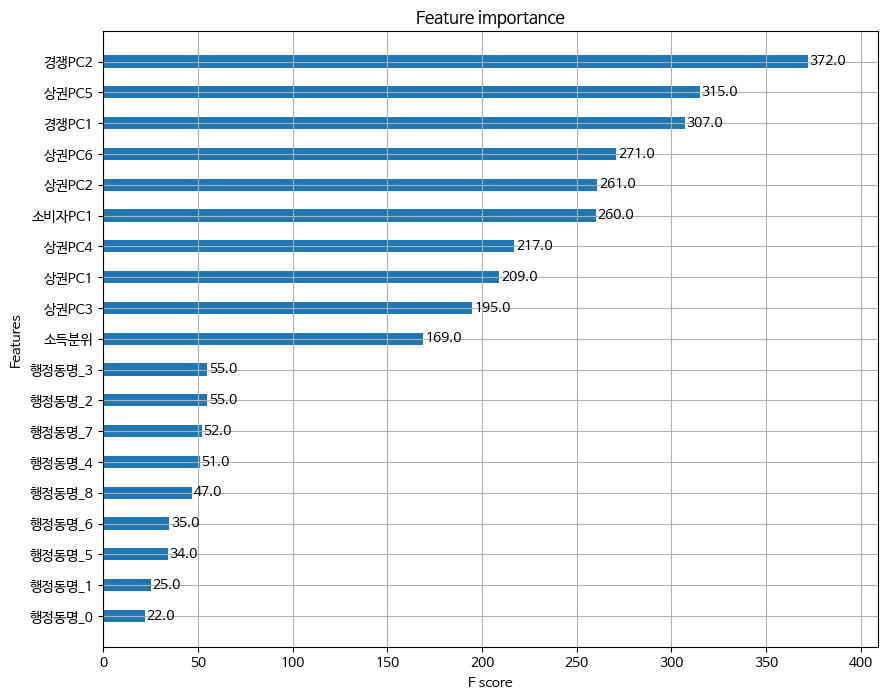

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

### X6

In [ ]:
#model 학습
xgb_clf.fit(X6_train_re, y6_train_re)

#tuning과정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X6_train_re, y6_train_re, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X6_train_re, y6_train_re), (X6_test, y6_test)])

print(gridcv.best_params_)

#구한 best parameter로 적합한 이후 다시 roc score 계산
#best param에 대한 코드 있어야함
xgb_roc_score = roc_auc_score(y6_test, gridcv.predict_proba(X6_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.78731	validation_1-auc:0.55767
[1]	validation_0-auc:0.89140	validation_1-auc:0.65796
[2]	validation_0-auc:0.90921	validation_1-auc:0.65228
[3]	validation_0-auc:0.93842	validation_1-auc:0.67581
[4]	validation_0-auc:0.95091	validation_1-auc:0.70671
[5]	validation_0-auc:0.95720	validation_1-auc:0.71826
[6]	validation_0-auc:0.96200	validation_1-auc:0.75197
[7]	validation_0-auc:0.96434	validation_1-auc:0.74513
[8]	validation_0-auc:0.96770	validation_1-auc:0.75243


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.96978	validation_1-auc:0.73878
[10]	validation_0-auc:0.97172	validation_1-auc:0.76110
[11]	validation_0-auc:0.97412	validation_1-auc:0.75827
[12]	validation_0-auc:0.97535	validation_1-auc:0.76492
[13]	validation_0-auc:0.97645	validation_1-auc:0.76954
[14]	validation_0-auc:0.97739	validation_1-auc:0.77208
[15]	validation_0-auc:0.97953	validation_1-auc:0.77121
[16]	validation_0-auc:0.98161	validation_1-auc:0.77149
[17]	validation_0-auc:0.98273	validation_1-auc:0.77375
[18]	validation_0-auc:0.98588	validation_1-auc:0.77225
[19]	validation_0-auc:0.98620	validation_1-auc:0.77397
[20]	validation_0-auc:0.98694	validation_1-auc:0.77389
[21]	validation_0-auc:0.98742	validation_1-auc:0.77562
[22]	validation_0-auc:0.98840	validation_1-auc:0.77279
[23]	validation_0-auc:0.98895	validation_1-auc:0.77276
[24]	validation_0-auc:0.98936	validation_1-auc:0.77359
[25]	validation_0-auc:0.98927	validation_1-auc:0.77617
[26]	validation_0-auc:0.98985	validation_1-auc:0.77787
[27]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96805	validation_1-auc:0.74401
[9]	validation_0-auc:0.97042	validation_1-auc:0.73806
[10]	validation_0-auc:0.97218	validation_1-auc:0.75793
[11]	validation_0-auc:0.97514	validation_1-auc:0.76105
[12]	validation_0-auc:0.97621	validation_1-auc:0.77291
[13]	validation_0-auc:0.97711	validation_1-auc:0.78113
[14]	validation_0-auc:0.97793	validation_1-auc:0.78453
[15]	validation_0-auc:0.97984	validation_1-auc:0.79004
[16]	validation_0-auc:0.98069	validation_1-auc:0.78952
[17]	validation_0-auc:0.98185	validation_1-auc:0.78834
[18]	validation_0-auc:0.98443	validation_1-auc:0.78247
[19]	validation_0-auc:0.98508	validation_1-auc:0.78578
[20]	validation_0-auc:0.98542	validation_1-auc:0.78260
[21]	validation_0-auc:0.98712	validation_1-auc:0.78027
[22]	validation_0-auc:0.98895	validation_1-auc:0.77638
[23]	validation_0-auc:0.98971	validation_1-auc:0.77725
[24]	validation_0-auc:0.99037	validation_1-auc:0.77582
[25]	validation_0-auc:0.99054	validation_1-auc:0.77721
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96823	validation_1-auc:0.78061
[9]	validation_0-auc:0.96959	validation_1-auc:0.77151
[10]	validation_0-auc:0.97138	validation_1-auc:0.78769
[11]	validation_0-auc:0.97448	validation_1-auc:0.78860
[12]	validation_0-auc:0.97519	validation_1-auc:0.80039
[13]	validation_0-auc:0.97640	validation_1-auc:0.80491
[14]	validation_0-auc:0.97633	validation_1-auc:0.80849
[15]	validation_0-auc:0.97844	validation_1-auc:0.80234
[16]	validation_0-auc:0.98109	validation_1-auc:0.79397
[17]	validation_0-auc:0.98195	validation_1-auc:0.79595
[18]	validation_0-auc:0.98344	validation_1-auc:0.79297
[19]	validation_0-auc:0.98407	validation_1-auc:0.79785
[20]	validation_0-auc:0.98480	validation_1-auc:0.79547
[21]	validation_0-auc:0.98543	validation_1-auc:0.79294
[22]	validation_0-auc:0.98718	validation_1-auc:0.79107
[23]	validation_0-auc:0.98778	validation_1-auc:0.79085
[24]	validation_0-auc:0.98843	validation_1-auc:0.79039
[25]	validation_0-auc:0.98888	validation_1-auc:0.78901
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96716	validation_1-auc:0.75291
[9]	validation_0-auc:0.96915	validation_1-auc:0.73970
[10]	validation_0-auc:0.97107	validation_1-auc:0.76117
[11]	validation_0-auc:0.97340	validation_1-auc:0.76037
[12]	validation_0-auc:0.97475	validation_1-auc:0.76703
[13]	validation_0-auc:0.97582	validation_1-auc:0.77142
[14]	validation_0-auc:0.97672	validation_1-auc:0.77441
[15]	validation_0-auc:0.97853	validation_1-auc:0.77092
[16]	validation_0-auc:0.98007	validation_1-auc:0.76773
[17]	validation_0-auc:0.98121	validation_1-auc:0.76955
[18]	validation_0-auc:0.98330	validation_1-auc:0.76436
[19]	validation_0-auc:0.98430	validation_1-auc:0.76681
[20]	validation_0-auc:0.98464	validation_1-auc:0.76745
[21]	validation_0-auc:0.98604	validation_1-auc:0.76654
[22]	validation_0-auc:0.98766	validation_1-auc:0.76407
[23]	validation_0-auc:0.98824	validation_1-auc:0.76068
[24]	validation_0-auc:0.98878	validation_1-auc:0.76055
[25]	validation_0-auc:0.98868	validation_1-auc:0.76439
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96807	validation_1-auc:0.74537
[9]	validation_0-auc:0.97035	validation_1-auc:0.73884
[10]	validation_0-auc:0.97208	validation_1-auc:0.75949
[11]	validation_0-auc:0.97475	validation_1-auc:0.76148
[12]	validation_0-auc:0.97540	validation_1-auc:0.77460
[13]	validation_0-auc:0.97630	validation_1-auc:0.78336
[14]	validation_0-auc:0.97721	validation_1-auc:0.78697
[15]	validation_0-auc:0.97899	validation_1-auc:0.78829
[16]	validation_0-auc:0.98148	validation_1-auc:0.78740
[17]	validation_0-auc:0.98250	validation_1-auc:0.78853
[18]	validation_0-auc:0.98506	validation_1-auc:0.78385
[19]	validation_0-auc:0.98557	validation_1-auc:0.78714
[20]	validation_0-auc:0.98619	validation_1-auc:0.78489
[21]	validation_0-auc:0.98725	validation_1-auc:0.78423
[22]	validation_0-auc:0.98853	validation_1-auc:0.78093
[23]	validation_0-auc:0.98922	validation_1-auc:0.78203
[24]	validation_0-auc:0.98984	validation_1-auc:0.77951
[25]	validation_0-auc:0.99022	validation_1-auc:0.78116
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96842	validation_1-auc:0.78335
[9]	validation_0-auc:0.96995	validation_1-auc:0.77404
[10]	validation_0-auc:0.97068	validation_1-auc:0.78981
[11]	validation_0-auc:0.97318	validation_1-auc:0.78863
[12]	validation_0-auc:0.97399	validation_1-auc:0.79569
[13]	validation_0-auc:0.97527	validation_1-auc:0.80093
[14]	validation_0-auc:0.97569	validation_1-auc:0.80444
[15]	validation_0-auc:0.97782	validation_1-auc:0.80020
[16]	validation_0-auc:0.98060	validation_1-auc:0.79574
[17]	validation_0-auc:0.98095	validation_1-auc:0.79875
[18]	validation_0-auc:0.98364	validation_1-auc:0.79528
[19]	validation_0-auc:0.98447	validation_1-auc:0.79835
[20]	validation_0-auc:0.98477	validation_1-auc:0.79755
[21]	validation_0-auc:0.98544	validation_1-auc:0.79439
[22]	validation_0-auc:0.98673	validation_1-auc:0.79138
[23]	validation_0-auc:0.98795	validation_1-auc:0.79153
[24]	validation_0-auc:0.98903	validation_1-auc:0.78985
[25]	validation_0-auc:0.98934	validation_1-auc:0.79129
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96080	validation_1-auc:0.75534
[8]	validation_0-auc:0.96589	validation_1-auc:0.75463
[9]	validation_0-auc:0.96725	validation_1-auc:0.74802
[10]	validation_0-auc:0.96875	validation_1-auc:0.76761
[11]	validation_0-auc:0.97131	validation_1-auc:0.76995
[12]	validation_0-auc:0.97224	validation_1-auc:0.77900
[13]	validation_0-auc:0.97336	validation_1-auc:0.78167
[14]	validation_0-auc:0.97515	validation_1-auc:0.78405
[15]	validation_0-auc:0.97787	validation_1-auc:0.78635
[16]	validation_0-auc:0.98006	validation_1-auc:0.78845
[17]	validation_0-auc:0.98189	validation_1-auc:0.78809
[18]	validation_0-auc:0.98361	validation_1-auc:0.78775
[19]	validation_0-auc:0.98398	validation_1-auc:0.78733
[20]	validation_0-auc:0.98510	validation_1-auc:0.78281
[21]	validation_0-auc:0.98610	validation_1-auc:0.78099
[22]	validation_0-auc:0.98697	validation_1-auc:0.78185
[23]	validation_0-auc:0.98756	validation_1-auc:0.78180
[24]	validation_0-auc:0.98797	validation_1-auc:0.78190
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96744	validation_1-auc:0.74192
[9]	validation_0-auc:0.96987	validation_1-auc:0.73313
[10]	validation_0-auc:0.97213	validation_1-auc:0.75592
[11]	validation_0-auc:0.97511	validation_1-auc:0.75987
[12]	validation_0-auc:0.97595	validation_1-auc:0.77287
[13]	validation_0-auc:0.97688	validation_1-auc:0.77938
[14]	validation_0-auc:0.97690	validation_1-auc:0.78339
[15]	validation_0-auc:0.97885	validation_1-auc:0.78021
[16]	validation_0-auc:0.98135	validation_1-auc:0.77946
[17]	validation_0-auc:0.98214	validation_1-auc:0.78177
[18]	validation_0-auc:0.98388	validation_1-auc:0.77711
[19]	validation_0-auc:0.98473	validation_1-auc:0.77988
[20]	validation_0-auc:0.98564	validation_1-auc:0.77699
[21]	validation_0-auc:0.98712	validation_1-auc:0.77486
[22]	validation_0-auc:0.98810	validation_1-auc:0.77044
[23]	validation_0-auc:0.98837	validation_1-auc:0.77162
[24]	validation_0-auc:0.98957	validation_1-auc:0.77014
[25]	validation_0-auc:0.99000	validation_1-auc:0.77022
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.96739	validation_1-auc:0.77422
[9]	validation_0-auc:0.96854	validation_1-auc:0.76506
[10]	validation_0-auc:0.96979	validation_1-auc:0.78258
[11]	validation_0-auc:0.97216	validation_1-auc:0.78079
[12]	validation_0-auc:0.97326	validation_1-auc:0.79296
[13]	validation_0-auc:0.97493	validation_1-auc:0.79791
[14]	validation_0-auc:0.97536	validation_1-auc:0.80095
[15]	validation_0-auc:0.97836	validation_1-auc:0.79423
[16]	validation_0-auc:0.98068	validation_1-auc:0.78893
[17]	validation_0-auc:0.98149	validation_1-auc:0.79068
[18]	validation_0-auc:0.98246	validation_1-auc:0.79198
[19]	validation_0-auc:0.98279	validation_1-auc:0.78971
[20]	validation_0-auc:0.98400	validation_1-auc:0.79016
[21]	validation_0-auc:0.98489	validation_1-auc:0.78979
[22]	validation_0-auc:0.98580	validation_1-auc:0.79132
[23]	validation_0-auc:0.98633	validation_1-auc:0.79112
[24]	validation_0-auc:0.98760	validation_1-auc:0.79122
[25]	validation_0-auc:0.98779	validation_1-auc:0.79320
[26]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98685	validation_1-auc:0.69671
[8]	validation_0-auc:0.98979	validation_1-auc:0.69356
[9]	validation_0-auc:0.99127	validation_1-auc:0.67820
[10]	validation_0-auc:0.99278	validation_1-auc:0.70401
[11]	validation_0-auc:0.99344	validation_1-auc:0.70733
[12]	validation_0-auc:0.99413	validation_1-auc:0.72623
[13]	validation_0-auc:0.99445	validation_1-auc:0.73659
[14]	validation_0-auc:0.99499	validation_1-auc:0.74421
[15]	validation_0-auc:0.99556	validation_1-auc:0.74414
[16]	validation_0-auc:0.99627	validation_1-auc:0.73844
[17]	validation_0-auc:0.99644	validation_1-auc:0.73911
[18]	validation_0-auc:0.99695	validation_1-auc:0.73016
[19]	validation_0-auc:0.99714	validation_1-auc:0.73109
[20]	validation_0-auc:0.99724	validation_1-auc:0.73292
[21]	validation_0-auc:0.99743	validation_1-auc:0.73185
[22]	validation_0-auc:0.99773	validation_1-auc:0.72956
[23]	validation_0-auc:0.99785	validation_1-auc:0.73250
[24]	validation_0-auc:0.99806	validation_1-auc:0.73347
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98433	validation_1-auc:0.72325
[7]	validation_0-auc:0.98616	validation_1-auc:0.72325
[8]	validation_0-auc:0.98948	validation_1-auc:0.71782
[9]	validation_0-auc:0.99028	validation_1-auc:0.70190
[10]	validation_0-auc:0.99156	validation_1-auc:0.72639
[11]	validation_0-auc:0.99258	validation_1-auc:0.72947
[12]	validation_0-auc:0.99284	validation_1-auc:0.74164
[13]	validation_0-auc:0.99328	validation_1-auc:0.75425
[14]	validation_0-auc:0.99395	validation_1-auc:0.76351
[15]	validation_0-auc:0.99472	validation_1-auc:0.76014
[16]	validation_0-auc:0.99562	validation_1-auc:0.74894
[17]	validation_0-auc:0.99585	validation_1-auc:0.75157
[18]	validation_0-auc:0.99654	validation_1-auc:0.74576
[19]	validation_0-auc:0.99678	validation_1-auc:0.74732
[20]	validation_0-auc:0.99688	validation_1-auc:0.75222
[21]	validation_0-auc:0.99724	validation_1-auc:0.75327
[22]	validation_0-auc:0.99759	validation_1-auc:0.74516
[23]	validation_0-auc:0.99784	validation_1-auc:0.74755
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98495	validation_1-auc:0.73284
[7]	validation_0-auc:0.98639	validation_1-auc:0.72003
[8]	validation_0-auc:0.98869	validation_1-auc:0.71752
[9]	validation_0-auc:0.99066	validation_1-auc:0.70185
[10]	validation_0-auc:0.99116	validation_1-auc:0.72521
[11]	validation_0-auc:0.99229	validation_1-auc:0.72895
[12]	validation_0-auc:0.99320	validation_1-auc:0.74176
[13]	validation_0-auc:0.99353	validation_1-auc:0.75402
[14]	validation_0-auc:0.99387	validation_1-auc:0.76499
[15]	validation_0-auc:0.99483	validation_1-auc:0.76407
[16]	validation_0-auc:0.99519	validation_1-auc:0.75471
[17]	validation_0-auc:0.99552	validation_1-auc:0.75540
[18]	validation_0-auc:0.99596	validation_1-auc:0.75500
[19]	validation_0-auc:0.99626	validation_1-auc:0.75122
[20]	validation_0-auc:0.99654	validation_1-auc:0.75458
[21]	validation_0-auc:0.99676	validation_1-auc:0.75460
[22]	validation_0-auc:0.99706	validation_1-auc:0.74956
[23]	validation_0-auc:0.99720	validation_1-auc:0.75179
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98423	validation_1-auc:0.70971
[7]	validation_0-auc:0.98597	validation_1-auc:0.70396
[8]	validation_0-auc:0.98913	validation_1-auc:0.69633
[9]	validation_0-auc:0.99050	validation_1-auc:0.67773
[10]	validation_0-auc:0.99218	validation_1-auc:0.70565
[11]	validation_0-auc:0.99286	validation_1-auc:0.70991
[12]	validation_0-auc:0.99336	validation_1-auc:0.72963
[13]	validation_0-auc:0.99359	validation_1-auc:0.74340
[14]	validation_0-auc:0.99409	validation_1-auc:0.74976
[15]	validation_0-auc:0.99490	validation_1-auc:0.74918
[16]	validation_0-auc:0.99580	validation_1-auc:0.73934
[17]	validation_0-auc:0.99602	validation_1-auc:0.73939
[18]	validation_0-auc:0.99648	validation_1-auc:0.73084
[19]	validation_0-auc:0.99667	validation_1-auc:0.73584
[20]	validation_0-auc:0.99688	validation_1-auc:0.73641
[21]	validation_0-auc:0.99713	validation_1-auc:0.73934
[22]	validation_0-auc:0.99742	validation_1-auc:0.73280
[23]	validation_0-auc:0.99765	validation_1-auc:0.73387
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98381	validation_1-auc:0.72050
[7]	validation_0-auc:0.98570	validation_1-auc:0.72088
[8]	validation_0-auc:0.98824	validation_1-auc:0.71845
[9]	validation_0-auc:0.98954	validation_1-auc:0.70621
[10]	validation_0-auc:0.99051	validation_1-auc:0.72693
[11]	validation_0-auc:0.99170	validation_1-auc:0.72975
[12]	validation_0-auc:0.99237	validation_1-auc:0.74493
[13]	validation_0-auc:0.99279	validation_1-auc:0.75606
[14]	validation_0-auc:0.99298	validation_1-auc:0.76251
[15]	validation_0-auc:0.99419	validation_1-auc:0.76223
[16]	validation_0-auc:0.99521	validation_1-auc:0.75471
[17]	validation_0-auc:0.99550	validation_1-auc:0.75489
[18]	validation_0-auc:0.99606	validation_1-auc:0.75004
[19]	validation_0-auc:0.99621	validation_1-auc:0.75121
[20]	validation_0-auc:0.99622	validation_1-auc:0.75010
[21]	validation_0-auc:0.99652	validation_1-auc:0.74808
[22]	validation_0-auc:0.99691	validation_1-auc:0.74399
[23]	validation_0-auc:0.99723	validation_1-auc:0.74472
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98407	validation_1-auc:0.74394
[7]	validation_0-auc:0.98491	validation_1-auc:0.73902
[8]	validation_0-auc:0.98815	validation_1-auc:0.73293
[9]	validation_0-auc:0.98939	validation_1-auc:0.71187
[10]	validation_0-auc:0.99054	validation_1-auc:0.73424
[11]	validation_0-auc:0.99143	validation_1-auc:0.73671
[12]	validation_0-auc:0.99221	validation_1-auc:0.74777
[13]	validation_0-auc:0.99240	validation_1-auc:0.75826
[14]	validation_0-auc:0.99259	validation_1-auc:0.76626
[15]	validation_0-auc:0.99355	validation_1-auc:0.76546
[16]	validation_0-auc:0.99417	validation_1-auc:0.76015
[17]	validation_0-auc:0.99460	validation_1-auc:0.76006
[18]	validation_0-auc:0.99504	validation_1-auc:0.75534
[19]	validation_0-auc:0.99535	validation_1-auc:0.75678
[20]	validation_0-auc:0.99570	validation_1-auc:0.75681
[21]	validation_0-auc:0.99610	validation_1-auc:0.76065
[22]	validation_0-auc:0.99653	validation_1-auc:0.76195
[23]	validation_0-auc:0.99685	validation_1-auc:0.76293
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.98131	validation_1-auc:0.70404
[7]	validation_0-auc:0.98374	validation_1-auc:0.70182
[8]	validation_0-auc:0.98691	validation_1-auc:0.70388
[9]	validation_0-auc:0.98885	validation_1-auc:0.69066
[10]	validation_0-auc:0.99044	validation_1-auc:0.71250
[11]	validation_0-auc:0.99140	validation_1-auc:0.71882
[12]	validation_0-auc:0.99194	validation_1-auc:0.73017
[13]	validation_0-auc:0.99226	validation_1-auc:0.74148
[14]	validation_0-auc:0.99274	validation_1-auc:0.74819
[15]	validation_0-auc:0.99357	validation_1-auc:0.74613
[16]	validation_0-auc:0.99432	validation_1-auc:0.73932
[17]	validation_0-auc:0.99490	validation_1-auc:0.74032
[18]	validation_0-auc:0.99561	validation_1-auc:0.73135
[19]	validation_0-auc:0.99565	validation_1-auc:0.73362
[20]	validation_0-auc:0.99578	validation_1-auc:0.73385
[21]	validation_0-auc:0.99615	validation_1-auc:0.73663
[22]	validation_0-auc:0.99650	validation_1-auc:0.73137
[23]	validation_0-auc:0.99662	validation_1-auc:0.73388
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98576	validation_1-auc:0.71572
[8]	validation_0-auc:0.98883	validation_1-auc:0.71060
[9]	validation_0-auc:0.98978	validation_1-auc:0.69805
[10]	validation_0-auc:0.99115	validation_1-auc:0.72186
[11]	validation_0-auc:0.99190	validation_1-auc:0.72111
[12]	validation_0-auc:0.99230	validation_1-auc:0.73625
[13]	validation_0-auc:0.99278	validation_1-auc:0.75102
[14]	validation_0-auc:0.99350	validation_1-auc:0.75865
[15]	validation_0-auc:0.99438	validation_1-auc:0.76038
[16]	validation_0-auc:0.99512	validation_1-auc:0.75911
[17]	validation_0-auc:0.99539	validation_1-auc:0.75880
[18]	validation_0-auc:0.99596	validation_1-auc:0.75287
[19]	validation_0-auc:0.99617	validation_1-auc:0.75409
[20]	validation_0-auc:0.99632	validation_1-auc:0.75661
[21]	validation_0-auc:0.99668	validation_1-auc:0.75494
[22]	validation_0-auc:0.99690	validation_1-auc:0.74640
[23]	validation_0-auc:0.99715	validation_1-auc:0.74892
[24]	validation_0-auc:0.99728	validation_1-auc:0.74884
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98597	validation_1-auc:0.74628
[8]	validation_0-auc:0.98812	validation_1-auc:0.74150
[9]	validation_0-auc:0.98899	validation_1-auc:0.72236
[10]	validation_0-auc:0.99004	validation_1-auc:0.74171
[11]	validation_0-auc:0.99074	validation_1-auc:0.74643
[12]	validation_0-auc:0.99159	validation_1-auc:0.75394
[13]	validation_0-auc:0.99201	validation_1-auc:0.76248
[14]	validation_0-auc:0.99223	validation_1-auc:0.77106
[15]	validation_0-auc:0.99303	validation_1-auc:0.76944
[16]	validation_0-auc:0.99364	validation_1-auc:0.76331
[17]	validation_0-auc:0.99415	validation_1-auc:0.76421
[18]	validation_0-auc:0.99462	validation_1-auc:0.75800
[19]	validation_0-auc:0.99485	validation_1-auc:0.75935
[20]	validation_0-auc:0.99504	validation_1-auc:0.75967
[21]	validation_0-auc:0.99548	validation_1-auc:0.76045
[22]	validation_0-auc:0.99596	validation_1-auc:0.75716
[23]	validation_0-auc:0.99625	validation_1-auc:0.76192
[24]	validation_0-auc:0.99661	validation_1-auc:0.76122
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99177	validation_1-auc:0.63879
[6]	validation_0-auc:0.99332	validation_1-auc:0.67272
[7]	validation_0-auc:0.99411	validation_1-auc:0.67249
[8]	validation_0-auc:0.99572	validation_1-auc:0.67020
[9]	validation_0-auc:0.99623	validation_1-auc:0.65784
[10]	validation_0-auc:0.99675	validation_1-auc:0.68800
[11]	validation_0-auc:0.99731	validation_1-auc:0.69231
[12]	validation_0-auc:0.99770	validation_1-auc:0.70955
[13]	validation_0-auc:0.99779	validation_1-auc:0.72809
[14]	validation_0-auc:0.99803	validation_1-auc:0.73805
[15]	validation_0-auc:0.99834	validation_1-auc:0.73739
[16]	validation_0-auc:0.99867	validation_1-auc:0.73320
[17]	validation_0-auc:0.99885	validation_1-auc:0.73859
[18]	validation_0-auc:0.99899	validation_1-auc:0.72756
[19]	validation_0-auc:0.99902	validation_1-auc:0.72909
[20]	validation_0-auc:0.99911	validation_1-auc:0.73468
[21]	validation_0-auc:0.99915	validation_1-auc:0.73970
[22]	validation_0-auc:0.99922	validation_1-auc:0.73303
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.99276	validation_1-auc:0.65628
[6]	validation_0-auc:0.99400	validation_1-auc:0.69928
[7]	validation_0-auc:0.99553	validation_1-auc:0.69608
[8]	validation_0-auc:0.99661	validation_1-auc:0.69204
[9]	validation_0-auc:0.99688	validation_1-auc:0.67781
[10]	validation_0-auc:0.99726	validation_1-auc:0.69990
[11]	validation_0-auc:0.99756	validation_1-auc:0.70076
[12]	validation_0-auc:0.99795	validation_1-auc:0.72057
[13]	validation_0-auc:0.99814	validation_1-auc:0.73066
[14]	validation_0-auc:0.99822	validation_1-auc:0.74044
[15]	validation_0-auc:0.99846	validation_1-auc:0.73973
[16]	validation_0-auc:0.99859	validation_1-auc:0.73511
[17]	validation_0-auc:0.99866	validation_1-auc:0.73729
[18]	validation_0-auc:0.99881	validation_1-auc:0.72802
[19]	validation_0-auc:0.99881	validation_1-auc:0.72929
[20]	validation_0-auc:0.99883	validation_1-auc:0.73596
[21]	validation_0-auc:0.99887	validation_1-auc:0.74078
[22]	validation_0-auc:0.99891	validation_1-auc:0.73396
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98980	validation_1-auc:0.66647
[5]	validation_0-auc:0.99251	validation_1-auc:0.68459
[6]	validation_0-auc:0.99371	validation_1-auc:0.71540
[7]	validation_0-auc:0.99469	validation_1-auc:0.71137
[8]	validation_0-auc:0.99591	validation_1-auc:0.70708
[9]	validation_0-auc:0.99618	validation_1-auc:0.68728
[10]	validation_0-auc:0.99647	validation_1-auc:0.70920
[11]	validation_0-auc:0.99674	validation_1-auc:0.71010
[12]	validation_0-auc:0.99714	validation_1-auc:0.72253
[13]	validation_0-auc:0.99715	validation_1-auc:0.73793
[14]	validation_0-auc:0.99734	validation_1-auc:0.75189
[15]	validation_0-auc:0.99755	validation_1-auc:0.75015
[16]	validation_0-auc:0.99790	validation_1-auc:0.74154
[17]	validation_0-auc:0.99815	validation_1-auc:0.74490
[18]	validation_0-auc:0.99824	validation_1-auc:0.73744
[19]	validation_0-auc:0.99825	validation_1-auc:0.73840
[20]	validation_0-auc:0.99832	validation_1-auc:0.74307
[21]	validation_0-auc:0.99841	validation_1-auc:0.74759
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98953	validation_1-auc:0.65367
[6]	validation_0-auc:0.99176	validation_1-auc:0.69297
[7]	validation_0-auc:0.99347	validation_1-auc:0.69220
[8]	validation_0-auc:0.99505	validation_1-auc:0.68211
[9]	validation_0-auc:0.99562	validation_1-auc:0.66610
[10]	validation_0-auc:0.99622	validation_1-auc:0.69054
[11]	validation_0-auc:0.99662	validation_1-auc:0.69534
[12]	validation_0-auc:0.99690	validation_1-auc:0.71514
[13]	validation_0-auc:0.99695	validation_1-auc:0.72816
[14]	validation_0-auc:0.99713	validation_1-auc:0.73860
[15]	validation_0-auc:0.99729	validation_1-auc:0.74032
[16]	validation_0-auc:0.99759	validation_1-auc:0.73932
[17]	validation_0-auc:0.99774	validation_1-auc:0.73671
[18]	validation_0-auc:0.99797	validation_1-auc:0.72576
[19]	validation_0-auc:0.99801	validation_1-auc:0.72746
[20]	validation_0-auc:0.99818	validation_1-auc:0.73292
[21]	validation_0-auc:0.99825	validation_1-auc:0.73693
[22]	validation_0-auc:0.99839	validation_1-auc:0.73085
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98948	validation_1-auc:0.66351
[5]	validation_0-auc:0.99137	validation_1-auc:0.66925
[6]	validation_0-auc:0.99306	validation_1-auc:0.70389
[7]	validation_0-auc:0.99465	validation_1-auc:0.70308
[8]	validation_0-auc:0.99576	validation_1-auc:0.70653
[9]	validation_0-auc:0.99615	validation_1-auc:0.69270
[10]	validation_0-auc:0.99650	validation_1-auc:0.70719
[11]	validation_0-auc:0.99686	validation_1-auc:0.71873
[12]	validation_0-auc:0.99726	validation_1-auc:0.73267
[13]	validation_0-auc:0.99745	validation_1-auc:0.74227
[14]	validation_0-auc:0.99753	validation_1-auc:0.75337
[15]	validation_0-auc:0.99771	validation_1-auc:0.74984
[16]	validation_0-auc:0.99798	validation_1-auc:0.73851
[17]	validation_0-auc:0.99810	validation_1-auc:0.74026
[18]	validation_0-auc:0.99833	validation_1-auc:0.73334
[19]	validation_0-auc:0.99845	validation_1-auc:0.73058
[20]	validation_0-auc:0.99853	validation_1-auc:0.73262
[21]	validation_0-auc:0.99871	validation_1-auc:0.73413
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98909	validation_1-auc:0.67141
[6]	validation_0-auc:0.99145	validation_1-auc:0.70804
[7]	validation_0-auc:0.99238	validation_1-auc:0.70418
[8]	validation_0-auc:0.99382	validation_1-auc:0.70736
[9]	validation_0-auc:0.99436	validation_1-auc:0.69408
[10]	validation_0-auc:0.99515	validation_1-auc:0.71939
[11]	validation_0-auc:0.99568	validation_1-auc:0.72785
[12]	validation_0-auc:0.99632	validation_1-auc:0.74002
[13]	validation_0-auc:0.99640	validation_1-auc:0.75368
[14]	validation_0-auc:0.99671	validation_1-auc:0.75867
[15]	validation_0-auc:0.99706	validation_1-auc:0.75765
[16]	validation_0-auc:0.99735	validation_1-auc:0.75415
[17]	validation_0-auc:0.99766	validation_1-auc:0.75271
[18]	validation_0-auc:0.99783	validation_1-auc:0.74966
[19]	validation_0-auc:0.99796	validation_1-auc:0.75076
[20]	validation_0-auc:0.99808	validation_1-auc:0.75672
[21]	validation_0-auc:0.99816	validation_1-auc:0.75694
[22]	validation_0-auc:0.99824	validation_1-auc:0.75230
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98521	validation_1-auc:0.65491
[5]	validation_0-auc:0.98813	validation_1-auc:0.66595
[6]	validation_0-auc:0.99049	validation_1-auc:0.69775
[7]	validation_0-auc:0.99177	validation_1-auc:0.69992
[8]	validation_0-auc:0.99372	validation_1-auc:0.69684
[9]	validation_0-auc:0.99425	validation_1-auc:0.68422
[10]	validation_0-auc:0.99503	validation_1-auc:0.71011
[11]	validation_0-auc:0.99561	validation_1-auc:0.71679
[12]	validation_0-auc:0.99618	validation_1-auc:0.73303
[13]	validation_0-auc:0.99634	validation_1-auc:0.74293
[14]	validation_0-auc:0.99671	validation_1-auc:0.75112
[15]	validation_0-auc:0.99712	validation_1-auc:0.75093
[16]	validation_0-auc:0.99732	validation_1-auc:0.74464
[17]	validation_0-auc:0.99760	validation_1-auc:0.74457
[18]	validation_0-auc:0.99794	validation_1-auc:0.73812
[19]	validation_0-auc:0.99805	validation_1-auc:0.74056
[20]	validation_0-auc:0.99822	validation_1-auc:0.73944
[21]	validation_0-auc:0.99835	validation_1-auc:0.74258
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98942	validation_1-auc:0.66509
[6]	validation_0-auc:0.99169	validation_1-auc:0.70523
[7]	validation_0-auc:0.99296	validation_1-auc:0.70058
[8]	validation_0-auc:0.99436	validation_1-auc:0.69378
[9]	validation_0-auc:0.99465	validation_1-auc:0.68156
[10]	validation_0-auc:0.99509	validation_1-auc:0.70604
[11]	validation_0-auc:0.99561	validation_1-auc:0.71240
[12]	validation_0-auc:0.99609	validation_1-auc:0.73266
[13]	validation_0-auc:0.99638	validation_1-auc:0.74188
[14]	validation_0-auc:0.99650	validation_1-auc:0.75054
[15]	validation_0-auc:0.99696	validation_1-auc:0.74620
[16]	validation_0-auc:0.99723	validation_1-auc:0.74112
[17]	validation_0-auc:0.99738	validation_1-auc:0.74200
[18]	validation_0-auc:0.99759	validation_1-auc:0.73535
[19]	validation_0-auc:0.99774	validation_1-auc:0.73626
[20]	validation_0-auc:0.99793	validation_1-auc:0.73431
[21]	validation_0-auc:0.99808	validation_1-auc:0.73979
[22]	validation_0-auc:0.99814	validation_1-auc:0.73281
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98672	validation_1-auc:0.69041
[5]	validation_0-auc:0.98891	validation_1-auc:0.69495
[6]	validation_0-auc:0.99077	validation_1-auc:0.72877
[7]	validation_0-auc:0.99188	validation_1-auc:0.72337
[8]	validation_0-auc:0.99318	validation_1-auc:0.71827
[9]	validation_0-auc:0.99400	validation_1-auc:0.70009
[10]	validation_0-auc:0.99482	validation_1-auc:0.72760
[11]	validation_0-auc:0.99542	validation_1-auc:0.73374
[12]	validation_0-auc:0.99591	validation_1-auc:0.74759
[13]	validation_0-auc:0.99602	validation_1-auc:0.75966
[14]	validation_0-auc:0.99615	validation_1-auc:0.76540
[15]	validation_0-auc:0.99649	validation_1-auc:0.76546
[16]	validation_0-auc:0.99673	validation_1-auc:0.76270
[17]	validation_0-auc:0.99712	validation_1-auc:0.76342
[18]	validation_0-auc:0.99749	validation_1-auc:0.75906
[19]	validation_0-auc:0.99755	validation_1-auc:0.75691
[20]	validation_0-auc:0.99764	validation_1-auc:0.76030
[21]	validation_0-auc:0.99777	validation_1-auc:0.76139
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96057	validation_1-auc:0.79875
[8]	validation_0-auc:0.96346	validation_1-auc:0.79908
[9]	validation_0-auc:0.96599	validation_1-auc:0.78792
[10]	validation_0-auc:0.96746	validation_1-auc:0.78923
[11]	validation_0-auc:0.97131	validation_1-auc:0.78691
[12]	validation_0-auc:0.97257	validation_1-auc:0.78949
[13]	validation_0-auc:0.97475	validation_1-auc:0.78815
[14]	validation_0-auc:0.97424	validation_1-auc:0.78765
[15]	validation_0-auc:0.97887	validation_1-auc:0.78228
[16]	validation_0-auc:0.98290	validation_1-auc:0.77918
[17]	validation_0-auc:0.98399	validation_1-auc:0.78158
[18]	validation_0-auc:0.98521	validation_1-auc:0.78309
[19]	validation_0-auc:0.98628	validation_1-auc:0.78354
[20]	validation_0-auc:0.98780	validation_1-auc:0.78034
[21]	validation_0-auc:0.98874	validation_1-auc:0.77308
[22]	validation_0-auc:0.99004	validation_1-auc:0.77272
[23]	validation_0-auc:0.99086	validation_1-auc:0.77378
[24]	validation_0-auc:0.99171	validation_1-auc:0.76974
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.95906	validation_1-auc:0.79655
[8]	validation_0-auc:0.96374	validation_1-auc:0.79669
[9]	validation_0-auc:0.96749	validation_1-auc:0.79557
[10]	validation_0-auc:0.96945	validation_1-auc:0.79803
[11]	validation_0-auc:0.97272	validation_1-auc:0.79764
[12]	validation_0-auc:0.97290	validation_1-auc:0.79938
[13]	validation_0-auc:0.97494	validation_1-auc:0.79865
[14]	validation_0-auc:0.97653	validation_1-auc:0.80040
[15]	validation_0-auc:0.98188	validation_1-auc:0.80038
[16]	validation_0-auc:0.98295	validation_1-auc:0.79585
[17]	validation_0-auc:0.98405	validation_1-auc:0.79644
[18]	validation_0-auc:0.98606	validation_1-auc:0.79284
[19]	validation_0-auc:0.98641	validation_1-auc:0.79434
[20]	validation_0-auc:0.98706	validation_1-auc:0.79371
[21]	validation_0-auc:0.98908	validation_1-auc:0.79054
[22]	validation_0-auc:0.98988	validation_1-auc:0.79079
[23]	validation_0-auc:0.99078	validation_1-auc:0.78939
[24]	validation_0-auc:0.99119	validation_1-auc:0.78437
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96021	validation_1-auc:0.79886
[8]	validation_0-auc:0.96403	validation_1-auc:0.79381
[9]	validation_0-auc:0.96810	validation_1-auc:0.79472
[10]	validation_0-auc:0.96997	validation_1-auc:0.79434
[11]	validation_0-auc:0.97256	validation_1-auc:0.79170
[12]	validation_0-auc:0.97352	validation_1-auc:0.79382
[13]	validation_0-auc:0.97530	validation_1-auc:0.79076
[14]	validation_0-auc:0.97667	validation_1-auc:0.79345
[15]	validation_0-auc:0.98060	validation_1-auc:0.78708
[16]	validation_0-auc:0.98268	validation_1-auc:0.78733
[17]	validation_0-auc:0.98428	validation_1-auc:0.79310
[18]	validation_0-auc:0.98558	validation_1-auc:0.78988
[19]	validation_0-auc:0.98637	validation_1-auc:0.78890
[20]	validation_0-auc:0.98764	validation_1-auc:0.78869
[21]	validation_0-auc:0.98887	validation_1-auc:0.78862
[22]	validation_0-auc:0.98967	validation_1-auc:0.78743
[23]	validation_0-auc:0.99014	validation_1-auc:0.78791
[24]	validation_0-auc:0.99127	validation_1-auc:0.78200
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.96025	validation_1-auc:0.80010
[8]	validation_0-auc:0.96318	validation_1-auc:0.80117
[9]	validation_0-auc:0.96565	validation_1-auc:0.79040
[10]	validation_0-auc:0.96714	validation_1-auc:0.79170
[11]	validation_0-auc:0.97106	validation_1-auc:0.78937
[12]	validation_0-auc:0.97233	validation_1-auc:0.79221
[13]	validation_0-auc:0.97436	validation_1-auc:0.79073
[14]	validation_0-auc:0.97387	validation_1-auc:0.79001
[15]	validation_0-auc:0.97838	validation_1-auc:0.78580
[16]	validation_0-auc:0.98163	validation_1-auc:0.78500
[17]	validation_0-auc:0.98314	validation_1-auc:0.78029
[18]	validation_0-auc:0.98459	validation_1-auc:0.78037
[19]	validation_0-auc:0.98545	validation_1-auc:0.77952
[20]	validation_0-auc:0.98694	validation_1-auc:0.77726
[21]	validation_0-auc:0.98872	validation_1-auc:0.76995
[22]	validation_0-auc:0.98893	validation_1-auc:0.77119
[23]	validation_0-auc:0.99005	validation_1-auc:0.77226
[24]	validation_0-auc:0.99055	validation_1-auc:0.76915
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95743	validation_1-auc:0.79940
[7]	validation_0-auc:0.95888	validation_1-auc:0.79780
[8]	validation_0-auc:0.96364	validation_1-auc:0.79824
[9]	validation_0-auc:0.96742	validation_1-auc:0.79428
[10]	validation_0-auc:0.96796	validation_1-auc:0.79922
[11]	validation_0-auc:0.97110	validation_1-auc:0.80224
[12]	validation_0-auc:0.97153	validation_1-auc:0.80437
[13]	validation_0-auc:0.97588	validation_1-auc:0.80650
[14]	validation_0-auc:0.98073	validation_1-auc:0.79602
[15]	validation_0-auc:0.98130	validation_1-auc:0.79269
[16]	validation_0-auc:0.98254	validation_1-auc:0.78899
[17]	validation_0-auc:0.98331	validation_1-auc:0.79482
[18]	validation_0-auc:0.98442	validation_1-auc:0.78967
[19]	validation_0-auc:0.98615	validation_1-auc:0.78781
[20]	validation_0-auc:0.98692	validation_1-auc:0.78793
[21]	validation_0-auc:0.98834	validation_1-auc:0.78880
[22]	validation_0-auc:0.98914	validation_1-auc:0.78672
[23]	validation_0-auc:0.99006	validation_1-auc:0.78739
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95955	validation_1-auc:0.79819
[7]	validation_0-auc:0.96019	validation_1-auc:0.79769
[8]	validation_0-auc:0.96407	validation_1-auc:0.79234
[9]	validation_0-auc:0.96710	validation_1-auc:0.79021
[10]	validation_0-auc:0.96780	validation_1-auc:0.79562
[11]	validation_0-auc:0.96924	validation_1-auc:0.79441
[12]	validation_0-auc:0.97176	validation_1-auc:0.79652
[13]	validation_0-auc:0.97334	validation_1-auc:0.79370
[14]	validation_0-auc:0.97676	validation_1-auc:0.79380
[15]	validation_0-auc:0.98073	validation_1-auc:0.78766
[16]	validation_0-auc:0.98188	validation_1-auc:0.78696
[17]	validation_0-auc:0.98270	validation_1-auc:0.78764
[18]	validation_0-auc:0.98324	validation_1-auc:0.78618
[19]	validation_0-auc:0.98387	validation_1-auc:0.78371
[20]	validation_0-auc:0.98421	validation_1-auc:0.78454
[21]	validation_0-auc:0.98513	validation_1-auc:0.78540
[22]	validation_0-auc:0.98668	validation_1-auc:0.78333
[23]	validation_0-auc:0.98757	validation_1-auc:0.78232
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95711	validation_1-auc:0.80064
[7]	validation_0-auc:0.96070	validation_1-auc:0.79801
[8]	validation_0-auc:0.96241	validation_1-auc:0.79555
[9]	validation_0-auc:0.96592	validation_1-auc:0.79111
[10]	validation_0-auc:0.96874	validation_1-auc:0.79334
[11]	validation_0-auc:0.97034	validation_1-auc:0.79369
[12]	validation_0-auc:0.97111	validation_1-auc:0.79581
[13]	validation_0-auc:0.97252	validation_1-auc:0.79124
[14]	validation_0-auc:0.97542	validation_1-auc:0.79024
[15]	validation_0-auc:0.97662	validation_1-auc:0.78864
[16]	validation_0-auc:0.97912	validation_1-auc:0.78413
[17]	validation_0-auc:0.98257	validation_1-auc:0.78025
[18]	validation_0-auc:0.98413	validation_1-auc:0.77792
[19]	validation_0-auc:0.98505	validation_1-auc:0.77813
[20]	validation_0-auc:0.98592	validation_1-auc:0.77454
[21]	validation_0-auc:0.98731	validation_1-auc:0.77204
[22]	validation_0-auc:0.98734	validation_1-auc:0.77415
[23]	validation_0-auc:0.98800	validation_1-auc:0.77477
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.95881	validation_1-auc:0.79775
[8]	validation_0-auc:0.96318	validation_1-auc:0.79835
[9]	validation_0-auc:0.96695	validation_1-auc:0.79218
[10]	validation_0-auc:0.96874	validation_1-auc:0.79683
[11]	validation_0-auc:0.97194	validation_1-auc:0.79498
[12]	validation_0-auc:0.97349	validation_1-auc:0.79447
[13]	validation_0-auc:0.97514	validation_1-auc:0.79323
[14]	validation_0-auc:0.97764	validation_1-auc:0.79446
[15]	validation_0-auc:0.97808	validation_1-auc:0.79246
[16]	validation_0-auc:0.98011	validation_1-auc:0.78991
[17]	validation_0-auc:0.98085	validation_1-auc:0.78832
[18]	validation_0-auc:0.98170	validation_1-auc:0.78751
[19]	validation_0-auc:0.98309	validation_1-auc:0.78360
[20]	validation_0-auc:0.98411	validation_1-auc:0.78327
[21]	validation_0-auc:0.98423	validation_1-auc:0.78570
[22]	validation_0-auc:0.98528	validation_1-auc:0.78273
[23]	validation_0-auc:0.98631	validation_1-auc:0.78252
[24]	validation_0-auc:0.98763	validation_1-auc:0.77837
[25]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-auc:0.95994	validation_1-auc:0.80710
[7]	validation_0-auc:0.96099	validation_1-auc:0.80499
[8]	validation_0-auc:0.96426	validation_1-auc:0.80033
[9]	validation_0-auc:0.96775	validation_1-auc:0.79673
[10]	validation_0-auc:0.96851	validation_1-auc:0.79985
[11]	validation_0-auc:0.97144	validation_1-auc:0.79874
[12]	validation_0-auc:0.97185	validation_1-auc:0.80186
[13]	validation_0-auc:0.97470	validation_1-auc:0.79846
[14]	validation_0-auc:0.97624	validation_1-auc:0.79752
[15]	validation_0-auc:0.97832	validation_1-auc:0.79114
[16]	validation_0-auc:0.98058	validation_1-auc:0.78925
[17]	validation_0-auc:0.98281	validation_1-auc:0.78910
[18]	validation_0-auc:0.98439	validation_1-auc:0.78512
[19]	validation_0-auc:0.98524	validation_1-auc:0.78482
[20]	validation_0-auc:0.98632	validation_1-auc:0.78396
[21]	validation_0-auc:0.98689	validation_1-auc:0.78077
[22]	validation_0-auc:0.98758	validation_1-auc:0.78004
[23]	validation_0-auc:0.98822	validation_1-auc:0.77968
[24]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98196	validation_1-auc:0.75662
[6]	validation_0-auc:0.98377	validation_1-auc:0.77686
[7]	validation_0-auc:0.98511	validation_1-auc:0.78413
[8]	validation_0-auc:0.98705	validation_1-auc:0.77702
[9]	validation_0-auc:0.98967	validation_1-auc:0.77124
[10]	validation_0-auc:0.99049	validation_1-auc:0.77762
[11]	validation_0-auc:0.99245	validation_1-auc:0.77215
[12]	validation_0-auc:0.99308	validation_1-auc:0.77322
[13]	validation_0-auc:0.99401	validation_1-auc:0.77793
[14]	validation_0-auc:0.99433	validation_1-auc:0.77726
[15]	validation_0-auc:0.99474	validation_1-auc:0.77696
[16]	validation_0-auc:0.99541	validation_1-auc:0.77108
[17]	validation_0-auc:0.99559	validation_1-auc:0.77264
[18]	validation_0-auc:0.99587	validation_1-auc:0.77274
[19]	validation_0-auc:0.99623	validation_1-auc:0.77212
[20]	validation_0-auc:0.99680	validation_1-auc:0.77052
[21]	validation_0-auc:0.99724	validation_1-auc:0.76624
[22]	validation_0-auc:0.99751	validation_1-auc:0.76119
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98064	validation_1-auc:0.74826
[6]	validation_0-auc:0.98359	validation_1-auc:0.76704
[7]	validation_0-auc:0.98482	validation_1-auc:0.76999
[8]	validation_0-auc:0.98835	validation_1-auc:0.77247
[9]	validation_0-auc:0.99073	validation_1-auc:0.76941
[10]	validation_0-auc:0.99139	validation_1-auc:0.77249
[11]	validation_0-auc:0.99277	validation_1-auc:0.77038
[12]	validation_0-auc:0.99346	validation_1-auc:0.77274
[13]	validation_0-auc:0.99379	validation_1-auc:0.77118
[14]	validation_0-auc:0.99458	validation_1-auc:0.77510
[15]	validation_0-auc:0.99470	validation_1-auc:0.77498
[16]	validation_0-auc:0.99589	validation_1-auc:0.77273
[17]	validation_0-auc:0.99612	validation_1-auc:0.77373
[18]	validation_0-auc:0.99630	validation_1-auc:0.77457
[19]	validation_0-auc:0.99679	validation_1-auc:0.76857
[20]	validation_0-auc:0.99711	validation_1-auc:0.76407
[21]	validation_0-auc:0.99746	validation_1-auc:0.76695
[22]	validation_0-auc:0.99784	validation_1-auc:0.76156
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98212	validation_1-auc:0.75493
[6]	validation_0-auc:0.98459	validation_1-auc:0.76858
[7]	validation_0-auc:0.98589	validation_1-auc:0.76747
[8]	validation_0-auc:0.98849	validation_1-auc:0.76490
[9]	validation_0-auc:0.98991	validation_1-auc:0.76155
[10]	validation_0-auc:0.99093	validation_1-auc:0.76450
[11]	validation_0-auc:0.99203	validation_1-auc:0.76090
[12]	validation_0-auc:0.99243	validation_1-auc:0.76725
[13]	validation_0-auc:0.99298	validation_1-auc:0.77210
[14]	validation_0-auc:0.99324	validation_1-auc:0.77441
[15]	validation_0-auc:0.99377	validation_1-auc:0.76971
[16]	validation_0-auc:0.99430	validation_1-auc:0.76735
[17]	validation_0-auc:0.99453	validation_1-auc:0.76932
[18]	validation_0-auc:0.99491	validation_1-auc:0.76279
[19]	validation_0-auc:0.99512	validation_1-auc:0.76723
[20]	validation_0-auc:0.99568	validation_1-auc:0.76780
[21]	validation_0-auc:0.99615	validation_1-auc:0.76080
[22]	validation_0-auc:0.99638	validation_1-auc:0.76279
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98079	validation_1-auc:0.75637
[6]	validation_0-auc:0.98401	validation_1-auc:0.77120
[7]	validation_0-auc:0.98565	validation_1-auc:0.77570
[8]	validation_0-auc:0.98726	validation_1-auc:0.77913
[9]	validation_0-auc:0.98871	validation_1-auc:0.77245
[10]	validation_0-auc:0.98995	validation_1-auc:0.77872
[11]	validation_0-auc:0.99121	validation_1-auc:0.77649
[12]	validation_0-auc:0.99170	validation_1-auc:0.77981
[13]	validation_0-auc:0.99211	validation_1-auc:0.78053
[14]	validation_0-auc:0.99274	validation_1-auc:0.77970
[15]	validation_0-auc:0.99381	validation_1-auc:0.77272
[16]	validation_0-auc:0.99486	validation_1-auc:0.76674
[17]	validation_0-auc:0.99540	validation_1-auc:0.76751
[18]	validation_0-auc:0.99593	validation_1-auc:0.76190
[19]	validation_0-auc:0.99639	validation_1-auc:0.75821
[20]	validation_0-auc:0.99674	validation_1-auc:0.75714
[21]	validation_0-auc:0.99712	validation_1-auc:0.75602
[22]	validation_0-auc:0.99752	validation_1-auc:0.75695
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.97914	validation_1-auc:0.73772
[6]	validation_0-auc:0.98306	validation_1-auc:0.74905
[7]	validation_0-auc:0.98396	validation_1-auc:0.76376
[8]	validation_0-auc:0.98711	validation_1-auc:0.76448
[9]	validation_0-auc:0.98898	validation_1-auc:0.76223
[10]	validation_0-auc:0.98985	validation_1-auc:0.76808
[11]	validation_0-auc:0.99172	validation_1-auc:0.76676
[12]	validation_0-auc:0.99212	validation_1-auc:0.77380
[13]	validation_0-auc:0.99280	validation_1-auc:0.77311
[14]	validation_0-auc:0.99340	validation_1-auc:0.77539
[15]	validation_0-auc:0.99416	validation_1-auc:0.77832
[16]	validation_0-auc:0.99494	validation_1-auc:0.77354
[17]	validation_0-auc:0.99515	validation_1-auc:0.77384
[18]	validation_0-auc:0.99538	validation_1-auc:0.77344
[19]	validation_0-auc:0.99588	validation_1-auc:0.77297
[20]	validation_0-auc:0.99638	validation_1-auc:0.77262
[21]	validation_0-auc:0.99684	validation_1-auc:0.77323
[22]	validation_0-auc:0.99712	validation_1-auc:0.76900
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.98100	validation_1-auc:0.75543
[6]	validation_0-auc:0.98314	validation_1-auc:0.77411
[7]	validation_0-auc:0.98419	validation_1-auc:0.78111
[8]	validation_0-auc:0.98651	validation_1-auc:0.78202
[9]	validation_0-auc:0.98846	validation_1-auc:0.77558
[10]	validation_0-auc:0.98954	validation_1-auc:0.77679
[11]	validation_0-auc:0.99042	validation_1-auc:0.76990
[12]	validation_0-auc:0.99098	validation_1-auc:0.77517
[13]	validation_0-auc:0.99152	validation_1-auc:0.77842
[14]	validation_0-auc:0.99183	validation_1-auc:0.78156
[15]	validation_0-auc:0.99283	validation_1-auc:0.77890
[16]	validation_0-auc:0.99369	validation_1-auc:0.77539
[17]	validation_0-auc:0.99441	validation_1-auc:0.77688
[18]	validation_0-auc:0.99469	validation_1-auc:0.77687
[19]	validation_0-auc:0.99535	validation_1-auc:0.77339
[20]	validation_0-auc:0.99567	validation_1-auc:0.76906
[21]	validation_0-auc:0.99611	validation_1-auc:0.76911
[22]	validation_0-auc:0.99649	validation_1-auc:0.76779
[23]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96172	validation_1-auc:0.77403
[3]	validation_0-auc:0.97197	validation_1-auc:0.75467
[4]	validation_0-auc:0.97349	validation_1-auc:0.74519
[5]	validation_0-auc:0.97888	validation_1-auc:0.74532
[6]	validation_0-auc:0.98122	validation_1-auc:0.76998
[7]	validation_0-auc:0.98253	validation_1-auc:0.76703
[8]	validation_0-auc:0.98395	validation_1-auc:0.76353
[9]	validation_0-auc:0.98605	validation_1-auc:0.76018
[10]	validation_0-auc:0.98760	validation_1-auc:0.77345
[11]	validation_0-auc:0.98884	validation_1-auc:0.77095
[12]	validation_0-auc:0.98980	validation_1-auc:0.77611
[13]	validation_0-auc:0.99067	validation_1-auc:0.77678
[14]	validation_0-auc:0.99135	validation_1-auc:0.77911
[15]	validation_0-auc:0.99179	validation_1-auc:0.77768
[16]	validation_0-auc:0.99292	validation_1-auc:0.77395
[17]	validation_0-auc:0.99350	validation_1-auc:0.77337
[18]	validation_0-auc:0.99446	validation_1-auc:0.76618
[19]	validation_0-auc:0.99486	validation_1-auc:0.76561
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.95582	validation_1-auc:0.75556
[2]	validation_0-auc:0.96093	validation_1-auc:0.77327
[3]	validation_0-auc:0.97071	validation_1-auc:0.75263
[4]	validation_0-auc:0.97588	validation_1-auc:0.74476
[5]	validation_0-auc:0.97883	validation_1-auc:0.74302
[6]	validation_0-auc:0.98259	validation_1-auc:0.76341
[7]	validation_0-auc:0.98340	validation_1-auc:0.76192
[8]	validation_0-auc:0.98511	validation_1-auc:0.75786
[9]	validation_0-auc:0.98796	validation_1-auc:0.75501
[10]	validation_0-auc:0.98952	validation_1-auc:0.76444
[11]	validation_0-auc:0.99074	validation_1-auc:0.75649
[12]	validation_0-auc:0.99117	validation_1-auc:0.76419
[13]	validation_0-auc:0.99187	validation_1-auc:0.75947
[14]	validation_0-auc:0.99230	validation_1-auc:0.76342
[15]	validation_0-auc:0.99242	validation_1-auc:0.76672
[16]	validation_0-auc:0.99378	validation_1-auc:0.76275
[17]	validation_0-auc:0.99396	validation_1-auc:0.76430
[18]	validation_0-auc:0.99447	validation_1-auc:0.75734
[19]	validation_0-a

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.92055	validation_1-auc:0.78627
[1]	validation_0-auc:0.94835	validation_1-auc:0.74575
[2]	validation_0-auc:0.95900	validation_1-auc:0.76230
[3]	validation_0-auc:0.97041	validation_1-auc:0.75520
[4]	validation_0-auc:0.97481	validation_1-auc:0.75859
[5]	validation_0-auc:0.98081	validation_1-auc:0.75950
[6]	validation_0-auc:0.98366	validation_1-auc:0.76889
[7]	validation_0-auc:0.98449	validation_1-auc:0.78062
[8]	validation_0-auc:0.98586	validation_1-auc:0.77477
[9]	validation_0-auc:0.98717	validation_1-auc:0.77331
[10]	validation_0-auc:0.98820	validation_1-auc:0.77954
[11]	validation_0-auc:0.98953	validation_1-auc:0.77330
[12]	validation_0-auc:0.99071	validation_1-auc:0.78159
[13]	validation_0-auc:0.99116	validation_1-auc:0.78411
[14]	validation_0-auc:0.99193	validation_1-auc:0.78391
[15]	validation_0-auc:0.99227	validation_1-auc:0.78654
[16]	validation_0-auc:0.99362	validation_1-auc:0.78228
[17]	validation_0-auc:0.99401	validation_1-auc:0.78484
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99078	validation_1-auc:0.72181
[5]	validation_0-auc:0.99282	validation_1-auc:0.71288
[6]	validation_0-auc:0.99454	validation_1-auc:0.73333
[7]	validation_0-auc:0.99574	validation_1-auc:0.73850
[8]	validation_0-auc:0.99699	validation_1-auc:0.73051
[9]	validation_0-auc:0.99743	validation_1-auc:0.72769
[10]	validation_0-auc:0.99763	validation_1-auc:0.74025
[11]	validation_0-auc:0.99807	validation_1-auc:0.73865
[12]	validation_0-auc:0.99823	validation_1-auc:0.74450
[13]	validation_0-auc:0.99843	validation_1-auc:0.75248
[14]	validation_0-auc:0.99855	validation_1-auc:0.76020
[15]	validation_0-auc:0.99868	validation_1-auc:0.76127
[16]	validation_0-auc:0.99887	validation_1-auc:0.76011
[17]	validation_0-auc:0.99898	validation_1-auc:0.75986
[18]	validation_0-auc:0.99907	validation_1-auc:0.76163
[19]	validation_0-auc:0.99912	validation_1-auc:0.76703
[20]	validation_0-auc:0.99917	validation_1-auc:0.76566
[21]	validation_0-auc:0.99923	validation_1-auc:0.76658
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99287	validation_1-auc:0.72646
[5]	validation_0-auc:0.99429	validation_1-auc:0.71288
[6]	validation_0-auc:0.99520	validation_1-auc:0.73202
[7]	validation_0-auc:0.99592	validation_1-auc:0.72797
[8]	validation_0-auc:0.99652	validation_1-auc:0.72156
[9]	validation_0-auc:0.99720	validation_1-auc:0.73088
[10]	validation_0-auc:0.99760	validation_1-auc:0.74751
[11]	validation_0-auc:0.99791	validation_1-auc:0.74642
[12]	validation_0-auc:0.99805	validation_1-auc:0.75597
[13]	validation_0-auc:0.99826	validation_1-auc:0.75943
[14]	validation_0-auc:0.99841	validation_1-auc:0.76346
[15]	validation_0-auc:0.99858	validation_1-auc:0.76340
[16]	validation_0-auc:0.99876	validation_1-auc:0.75943
[17]	validation_0-auc:0.99884	validation_1-auc:0.75773
[18]	validation_0-auc:0.99893	validation_1-auc:0.75791
[19]	validation_0-auc:0.99902	validation_1-auc:0.76122
[20]	validation_0-auc:0.99902	validation_1-auc:0.76019
[21]	validation_0-auc:0.99907	validation_1-auc:0.75918
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99313	validation_1-auc:0.73086
[5]	validation_0-auc:0.99460	validation_1-auc:0.72118
[6]	validation_0-auc:0.99532	validation_1-auc:0.73958
[7]	validation_0-auc:0.99575	validation_1-auc:0.74730
[8]	validation_0-auc:0.99636	validation_1-auc:0.73468
[9]	validation_0-auc:0.99678	validation_1-auc:0.73688
[10]	validation_0-auc:0.99712	validation_1-auc:0.74704
[11]	validation_0-auc:0.99748	validation_1-auc:0.74284
[12]	validation_0-auc:0.99765	validation_1-auc:0.75038
[13]	validation_0-auc:0.99776	validation_1-auc:0.76375
[14]	validation_0-auc:0.99799	validation_1-auc:0.77058
[15]	validation_0-auc:0.99802	validation_1-auc:0.77570
[16]	validation_0-auc:0.99823	validation_1-auc:0.77253
[17]	validation_0-auc:0.99842	validation_1-auc:0.77031
[18]	validation_0-auc:0.99847	validation_1-auc:0.77381
[19]	validation_0-auc:0.99858	validation_1-auc:0.77650
[20]	validation_0-auc:0.99861	validation_1-auc:0.77837
[21]	validation_0-auc:0.99864	validation_1-auc:0.78133
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98975	validation_1-auc:0.70769
[5]	validation_0-auc:0.99187	validation_1-auc:0.70230
[6]	validation_0-auc:0.99394	validation_1-auc:0.72289
[7]	validation_0-auc:0.99468	validation_1-auc:0.73010
[8]	validation_0-auc:0.99554	validation_1-auc:0.71873
[9]	validation_0-auc:0.99594	validation_1-auc:0.73038
[10]	validation_0-auc:0.99629	validation_1-auc:0.73973
[11]	validation_0-auc:0.99679	validation_1-auc:0.73719
[12]	validation_0-auc:0.99714	validation_1-auc:0.73695
[13]	validation_0-auc:0.99732	validation_1-auc:0.74211
[14]	validation_0-auc:0.99760	validation_1-auc:0.75167
[15]	validation_0-auc:0.99770	validation_1-auc:0.75723
[16]	validation_0-auc:0.99794	validation_1-auc:0.75485
[17]	validation_0-auc:0.99816	validation_1-auc:0.75632
[18]	validation_0-auc:0.99839	validation_1-auc:0.75736
[19]	validation_0-auc:0.99846	validation_1-auc:0.76144
[20]	validation_0-auc:0.99863	validation_1-auc:0.75577
[21]	validation_0-auc:0.99877	validation_1-auc:0.75166
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99053	validation_1-auc:0.72990
[5]	validation_0-auc:0.99184	validation_1-auc:0.71262
[6]	validation_0-auc:0.99318	validation_1-auc:0.73029
[7]	validation_0-auc:0.99421	validation_1-auc:0.73496
[8]	validation_0-auc:0.99541	validation_1-auc:0.72594
[9]	validation_0-auc:0.99647	validation_1-auc:0.72753
[10]	validation_0-auc:0.99686	validation_1-auc:0.74363
[11]	validation_0-auc:0.99728	validation_1-auc:0.74932
[12]	validation_0-auc:0.99739	validation_1-auc:0.75426
[13]	validation_0-auc:0.99758	validation_1-auc:0.75702
[14]	validation_0-auc:0.99769	validation_1-auc:0.76013
[15]	validation_0-auc:0.99797	validation_1-auc:0.76120
[16]	validation_0-auc:0.99806	validation_1-auc:0.75415
[17]	validation_0-auc:0.99825	validation_1-auc:0.75426
[18]	validation_0-auc:0.99845	validation_1-auc:0.76071
[19]	validation_0-auc:0.99868	validation_1-auc:0.76088
[20]	validation_0-auc:0.99881	validation_1-auc:0.75734
[21]	validation_0-auc:0.99885	validation_1-auc:0.75719
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99057	validation_1-auc:0.73988
[5]	validation_0-auc:0.99274	validation_1-auc:0.74068
[6]	validation_0-auc:0.99386	validation_1-auc:0.75572
[7]	validation_0-auc:0.99467	validation_1-auc:0.76160
[8]	validation_0-auc:0.99557	validation_1-auc:0.75522
[9]	validation_0-auc:0.99604	validation_1-auc:0.75380
[10]	validation_0-auc:0.99654	validation_1-auc:0.76228
[11]	validation_0-auc:0.99678	validation_1-auc:0.76008
[12]	validation_0-auc:0.99684	validation_1-auc:0.76955
[13]	validation_0-auc:0.99701	validation_1-auc:0.77060
[14]	validation_0-auc:0.99734	validation_1-auc:0.77819
[15]	validation_0-auc:0.99748	validation_1-auc:0.78161
[16]	validation_0-auc:0.99769	validation_1-auc:0.77904
[17]	validation_0-auc:0.99791	validation_1-auc:0.78226
[18]	validation_0-auc:0.99804	validation_1-auc:0.78185
[19]	validation_0-auc:0.99806	validation_1-auc:0.78649
[20]	validation_0-auc:0.99819	validation_1-auc:0.78463
[21]	validation_0-auc:0.99817	validation_1-auc:0.78315
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.98756	validation_1-auc:0.71919
[5]	validation_0-auc:0.99020	validation_1-auc:0.72149
[6]	validation_0-auc:0.99249	validation_1-auc:0.72704
[7]	validation_0-auc:0.99355	validation_1-auc:0.72958
[8]	validation_0-auc:0.99450	validation_1-auc:0.72262
[9]	validation_0-auc:0.99502	validation_1-auc:0.72539
[10]	validation_0-auc:0.99543	validation_1-auc:0.73650
[11]	validation_0-auc:0.99599	validation_1-auc:0.73579
[12]	validation_0-auc:0.99638	validation_1-auc:0.74626
[13]	validation_0-auc:0.99690	validation_1-auc:0.75288
[14]	validation_0-auc:0.99704	validation_1-auc:0.75556
[15]	validation_0-auc:0.99740	validation_1-auc:0.75687
[16]	validation_0-auc:0.99769	validation_1-auc:0.75326
[17]	validation_0-auc:0.99780	validation_1-auc:0.75668
[18]	validation_0-auc:0.99804	validation_1-auc:0.75831
[19]	validation_0-auc:0.99812	validation_1-auc:0.75912
[20]	validation_0-auc:0.99824	validation_1-auc:0.76434
[21]	validation_0-auc:0.99842	validation_1-auc:0.76318
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.94274	validation_1-auc:0.79312
[1]	validation_0-auc:0.97053	validation_1-auc:0.72811
[2]	validation_0-auc:0.97763	validation_1-auc:0.74880
[3]	validation_0-auc:0.98603	validation_1-auc:0.72284
[4]	validation_0-auc:0.98889	validation_1-auc:0.73163
[5]	validation_0-auc:0.99019	validation_1-auc:0.71615
[6]	validation_0-auc:0.99175	validation_1-auc:0.74360
[7]	validation_0-auc:0.99298	validation_1-auc:0.74418
[8]	validation_0-auc:0.99359	validation_1-auc:0.72850
[9]	validation_0-auc:0.99477	validation_1-auc:0.73409
[10]	validation_0-auc:0.99541	validation_1-auc:0.74005
[11]	validation_0-auc:0.99613	validation_1-auc:0.74228
[12]	validation_0-auc:0.99650	validation_1-auc:0.75307
[13]	validation_0-auc:0.99695	validation_1-auc:0.75867
[14]	validation_0-auc:0.99713	validation_1-auc:0.76552
[15]	validation_0-auc:0.99735	validation_1-auc:0.76423
[16]	validation_0-auc:0.99760	validation_1-auc:0.75811
[17]	validation_0-auc:0.99780	validation_1-auc:0.75805
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-auc:0.99038	validation_1-auc:0.74535
[5]	validation_0-auc:0.99150	validation_1-auc:0.74289
[6]	validation_0-auc:0.99296	validation_1-auc:0.74260
[7]	validation_0-auc:0.99399	validation_1-auc:0.74095
[8]	validation_0-auc:0.99453	validation_1-auc:0.73459
[9]	validation_0-auc:0.99532	validation_1-auc:0.73739
[10]	validation_0-auc:0.99596	validation_1-auc:0.74792
[11]	validation_0-auc:0.99617	validation_1-auc:0.74462
[12]	validation_0-auc:0.99639	validation_1-auc:0.75370
[13]	validation_0-auc:0.99644	validation_1-auc:0.76416
[14]	validation_0-auc:0.99670	validation_1-auc:0.77071
[15]	validation_0-auc:0.99695	validation_1-auc:0.77339
[16]	validation_0-auc:0.99720	validation_1-auc:0.77088
[17]	validation_0-auc:0.99732	validation_1-auc:0.77251
[18]	validation_0-auc:0.99748	validation_1-auc:0.77708
[19]	validation_0-auc:0.99764	validation_1-auc:0.77463
[20]	validation_0-auc:0.99783	validation_1-auc:0.77447
[21]	validation_0-auc:0.99791	validation_1-auc:0.77300
[22]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-auc:0.99196	validation_1-auc:0.64023
[4]	validation_0-auc:0.99343	validation_1-auc:0.65912
[5]	validation_0-auc:0.99471	validation_1-auc:0.65551
[6]	validation_0-auc:0.99601	validation_1-auc:0.68961
[7]	validation_0-auc:0.99691	validation_1-auc:0.68999
[8]	validation_0-auc:0.99799	validation_1-auc:0.67965
[9]	validation_0-auc:0.99847	validation_1-auc:0.66664
[10]	validation_0-auc:0.99873	validation_1-auc:0.69113
[11]	validation_0-auc:0.99903	validation_1-auc:0.69403
[12]	validation_0-auc:0.99925	validation_1-auc:0.71075
[13]	validation_0-auc:0.99939	validation_1-auc:0.72237
[14]	validation_0-auc:0.99943	validation_1-auc:0.73737
[15]	validation_0-auc:0.99954	validation_1-auc:0.73737
[16]	validation_0-auc:0.99969	validation_1-auc:0.72664
[17]	validation_0-auc:0.99976	validation_1-auc:0.72797
[18]	validation_0-auc:0.99986	validation_1-auc:0.72414
[19]	validation_0-auc:0.99986	validation_1-auc:0.72657
[20]	validation_0-auc:0.99988	validation_1-auc:0.72819
[21]	validation_0

In [ ]:
y6_pred = gridcv.predict(X6_test)
get_clf_eval(y6_test, y6_pred)
pred_positive_label = gridcv.predict_proba(X6_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y6_test, pred_positive_label)))

정확도: 0.9680
정밀도: 0.0286
재현율: 0.0870
f1 score: 0.0430
ROC: 0.7508


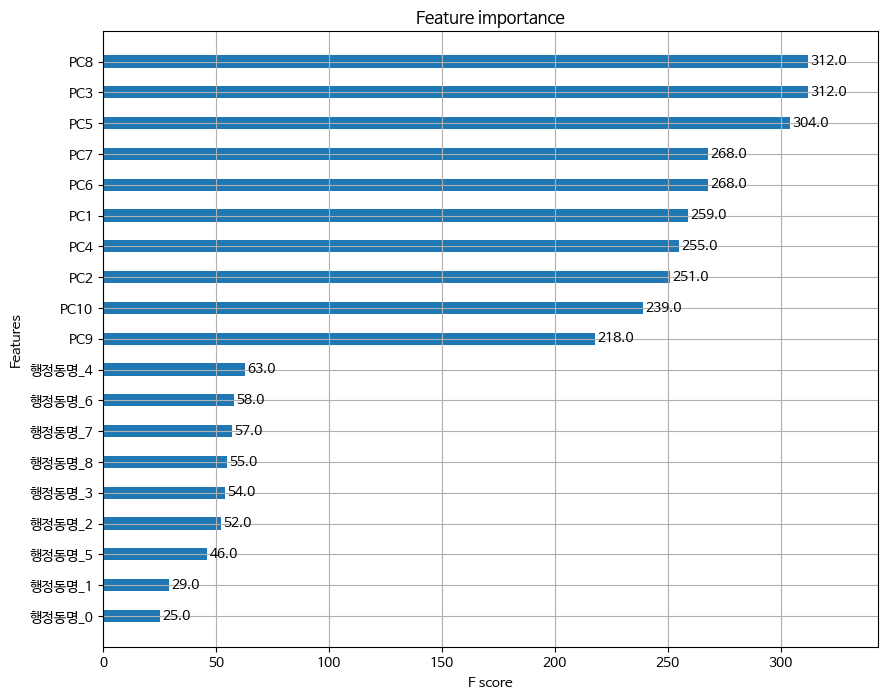

In [ ]:
#feature importance에 대한 것
fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=36, height=0.4)
plt.show()

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 랜덤 포레스트 모델 객체 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
#tuning과정
params = {'max_depth':[1,2,3,4,5],
          'min_samples_split':[2, 5],
          'min_samples_leaf':[1,3]}
gridcv = GridSearchCV(rf, param_grid=params, cv=3 , scoring='f1')

### X1

In [ ]:
# 모델 학습
gridcv.fit(X1_train_re, y1_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y1_pred = gridcv.predict(X1_test)

# 정확도 평가
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8096947935368043


In [ ]:
print(confusion_matrix(y1_test, y1_pred))
get_clf_eval(y1_test, y1_pred)
pred_positive_label = gridcv.predict_proba(X1_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y1_test, pred_positive_label)))

[[6739 1547]
 [  43   26]]
정확도: 0.8097
정밀도: 0.0165
재현율: 0.3768
f1 score: 0.0317
ROC: 0.7625


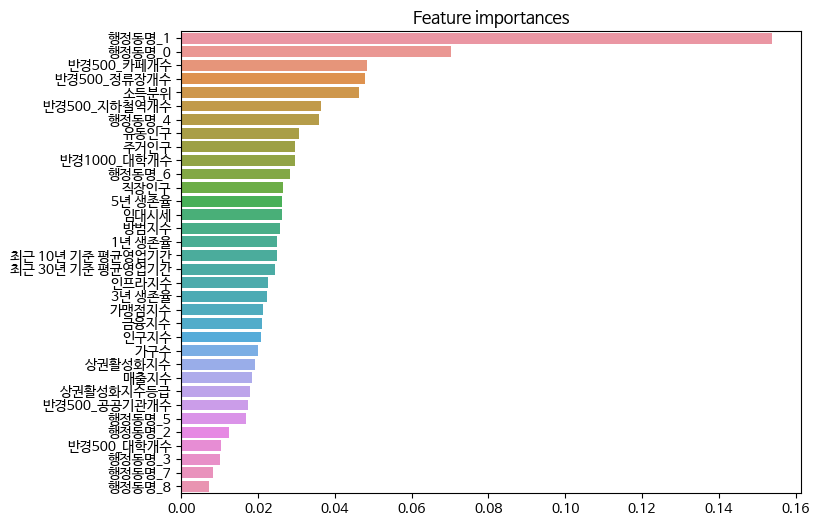

In [ ]:
import seaborn as sns

ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X1_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

### X2

In [ ]:
# 모델 학습
rf.fit(X2_train_re, y2_train_re)

# 테스트 데이터 예측
y2_pred = rf.predict(X2_test)

# 정확도 평가
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9810891681627768


In [ ]:
# 그리드 서치 모델 학습
gridcv.fit(X2_train_re, y2_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y2_pred = gridcv.predict(X2_test)

# 정확도 평가
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y2_test, y2_pred))
get_clf_eval(y2_test, y2_pred)
pred_positive_label = gridcv.predict_proba(X2_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y2_test, pred_positive_label)))

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7898264512268103
[[6568 1718]
 [  38   31]]
정확도: 0.7898
정밀도: 0.0177
재현율: 0.4493
f1 score: 0.0341
ROC: 0.7688


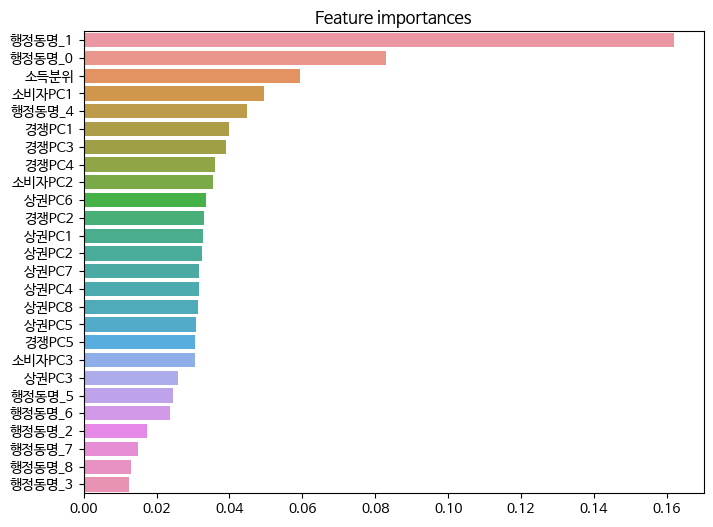

In [ ]:
ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X2_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

### X3

In [ ]:
# 모델 학습
rf.fit(X3_train_re, y3_train_re)

# 테스트 데이터 예측
y3_pred = rf.predict(X3_test)

# 정확도 평가
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9758228605625374


In [ ]:
# 그리드 서치 모델 학습
gridcv.fit(X3_train_re, y3_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y3_pred = gridcv.predict(X3_test)

# 정확도 평가
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y3_test, y3_pred))
get_clf_eval(y3_test, y3_pred)
pred_positive_label = gridcv.predict_proba(X3_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y3_test, pred_positive_label)))

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7755834829443446
[[6443 1843]
 [  32   37]]
정확도: 0.7756
정밀도: 0.0197
재현율: 0.5362
f1 score: 0.0380
ROC: 0.7868


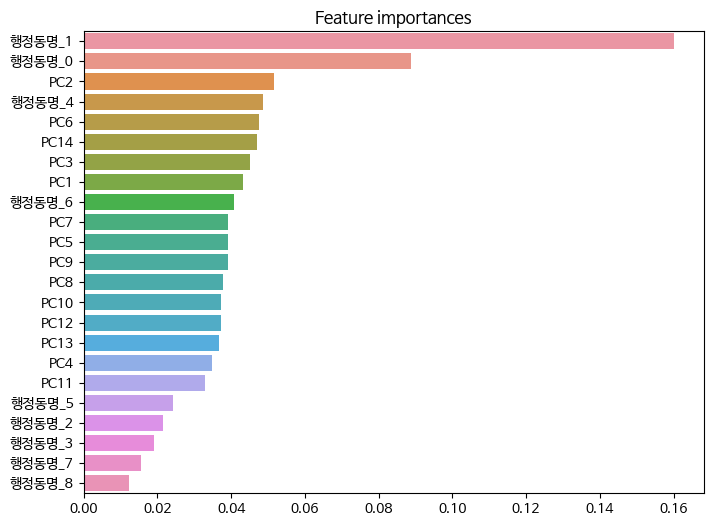

In [ ]:
ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X3_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

### X4

In [ ]:
# 모델 학습
rf.fit(X4_train_re, y4_train_re)

# 테스트 데이터 예측
y4_pred = rf.predict(X4_test)

# 정확도 평가
accuracy = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9867145421903052


In [ ]:
# 그리드 서치 모델 학습
gridcv.fit(X4_train_re, y4_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y4_pred = gridcv.predict(X4_test)

# 정확도 평가
accuracy = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y4_test, y4_pred))
get_clf_eval(y4_test, y4_pred)
pred_positive_label = gridcv.predict_proba(X4_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y4_test, pred_positive_label)))

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.790065828845003
[[6570 1716]
 [  38   31]]
정확도: 0.7901
정밀도: 0.0177
재현율: 0.4493
f1 score: 0.0341
ROC: 0.7771


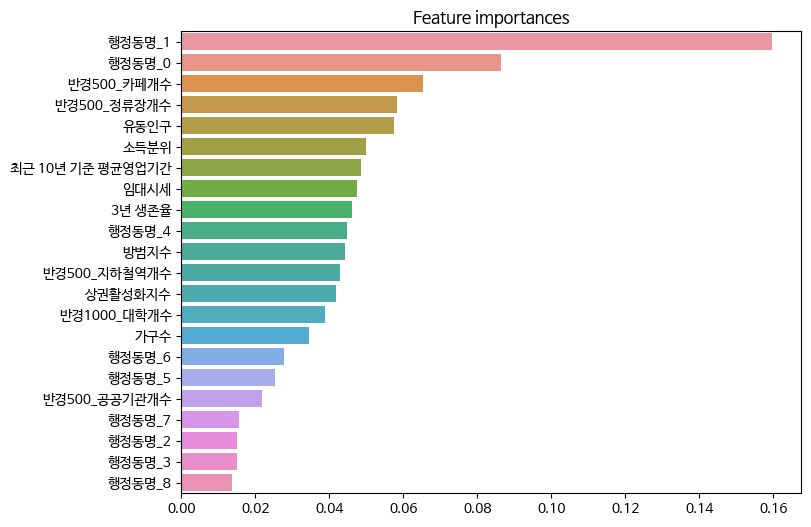

In [ ]:
ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X4_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

### X5

In [ ]:
# 모델 학습
rf.fit(X5_train_re, y5_train_re)

# 테스트 데이터 예측
y5_pred = rf.predict(X5_test)

# 정확도 평가
accuracy = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9808497905445841


In [ ]:
# 그리드 서치 모델 학습
gridcv.fit(X5_train_re, y5_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y5_pred = gridcv.predict(X5_test)

# 정확도 평가
accuracy = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y5_test, y5_pred))
get_clf_eval(y5_test, y5_pred)
pred_positive_label = gridcv.predict_proba(X5_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y5_test, pred_positive_label)))

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy: 0.7589467384799521
[[6304 1982]
 [  32   37]]
정확도: 0.7589
정밀도: 0.0183
재현율: 0.5362
f1 score: 0.0354
ROC: 0.7753


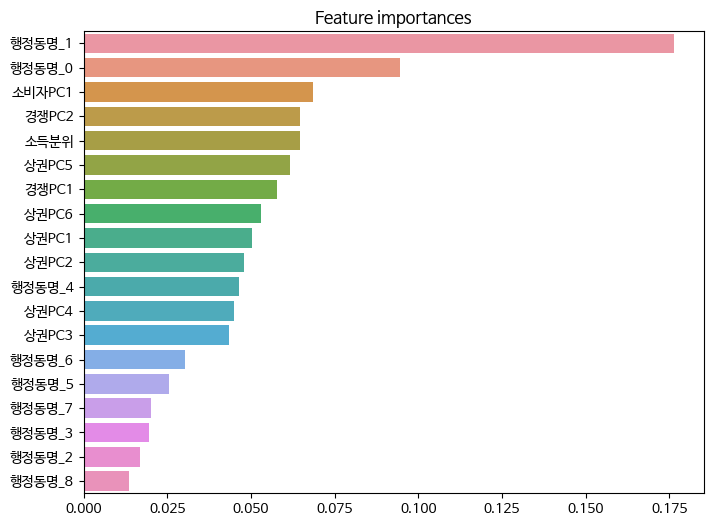

In [ ]:
ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X5_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

### X6

In [ ]:
# 모델 학습
rf.fit(X6_train_re, y6_train_re)

# 테스트 데이터 예측
y6_pred = rf.predict(X6_test)

# 정확도 평가
accuracy = accuracy_score(y6_test, y6_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972950329144225


In [ ]:
# 그리드 서치 모델 학습
gridcv.fit(X6_train_re, y6_train_re)
print(gridcv.best_params_)

# 테스트 데이터 예측
y6_pred = gridcv.predict(X6_test)

# 정확도 평가
accuracy = accuracy_score(y6_test, y6_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y6_test, y6_pred))
get_clf_eval(y6_test, y6_pred)
pred_positive_label = gridcv.predict_proba(X6_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y6_test, pred_positive_label)))

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7442250149611012
[[6177 2109]
 [  28   41]]
정확도: 0.7442
정밀도: 0.0191
재현율: 0.5942
f1 score: 0.0370
ROC: 0.7854


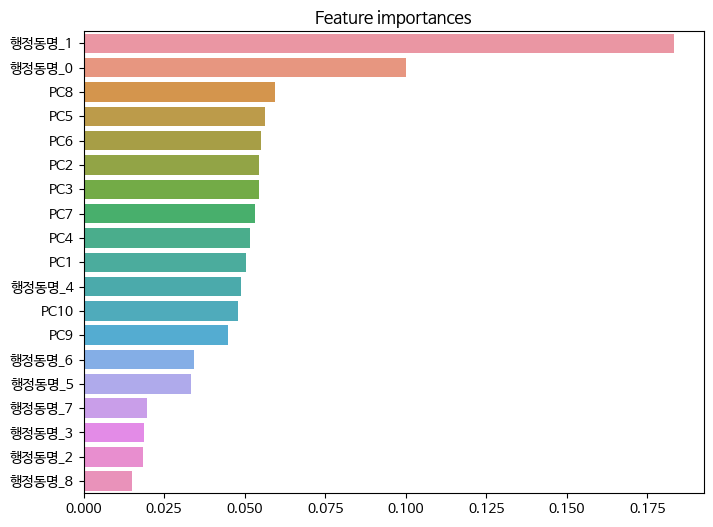

In [ ]:
ftr_importances_values = rf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X6_train_re.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending=False)[:36]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top , y = ftr_top.index)
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import recall_score

#모델링
model_knn = KNeighborsClassifier(n_neighbors=3)

### X1

In [ ]:
# 모델 학습
model_knn.fit(X1_train_re, y1_train_re)

# 테스트 데이터 예측
y1_pred = model_knn.predict(X1_test)

In [ ]:
y1_pred = model_knn.predict(X1_test)
print(confusion_matrix(y1_test, y1_pred))
get_clf_eval(y1_test, y1_pred)
pred_positive_label = model_knn.predict_proba(X1_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y1_test, pred_positive_label)))

[[8102  184]
 [  65    4]]
정확도: 0.9702
정밀도: 0.0213
재현율: 0.0580
f1 score: 0.0311
ROC: 0.5206


In [ ]:
recall = recall_score(y1_test, y1_pred)
print(recall)

0.057971014492753624


### X2

In [ ]:
# 모델 학습
model_knn.fit(X2_train_re, y2_train_re)

# 테스트 데이터 예측
y1_pred = model_knn.predict(X2_test)

In [ ]:
y2_pred = model_knn.predict(X2_test)
print(confusion_matrix(y2_test, y2_pred))
get_clf_eval(y2_test, y2_pred)
pred_positive_label = model_knn.predict_proba(X2_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y2_test, pred_positive_label)))

[[8108  178]
 [  67    2]]
정확도: 0.9707
정밀도: 0.0111
재현율: 0.0290
f1 score: 0.0161
ROC: 0.5125


### X3

In [ ]:
# 모델 학습
model_knn.fit(X3_train_re, y3_train_re)

# 테스트 데이터 예측
y3_pred = model_knn.predict(X3_test)

In [ ]:
y3_pred = model_knn.predict(X3_test)
print(confusion_matrix(y3_test, y3_pred))
get_clf_eval(y3_test, y3_pred)
pred_positive_label = model_knn.predict_proba(X3_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y3_test, pred_positive_label)))

[[8099  187]
 [  66    3]]
정확도: 0.9697
정밀도: 0.0158
재현율: 0.0435
f1 score: 0.0232
ROC: 0.5192


### X4

In [ ]:
# 모델 학습
model_knn.fit(X4_train_re, y4_train_re)

# 테스트 데이터 예측
y4_pred = model_knn.predict(X4_test)

In [ ]:
y4_pred = model_knn.predict(X4_test)
print(confusion_matrix(y4_test, y4_pred))
get_clf_eval(y4_test, y4_pred)
pred_positive_label = model_knn.predict_proba(X4_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y4_test, pred_positive_label)))

[[8086  200]
 [  64    5]]
정확도: 0.9684
정밀도: 0.0244
재현율: 0.0725
f1 score: 0.0365
ROC: 0.5268


### X5

In [ ]:
# 모델 학습
model_knn.fit(X5_train_re, y5_train_re)

# 테스트 데이터 예측
y5_pred = model_knn.predict(X5_test)

In [ ]:
print(confusion_matrix(y5_test, y5_pred))
get_clf_eval(y5_test, y5_pred)
pred_positive_label = model_knn.predict_proba(X5_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y5_test, pred_positive_label)))

[[8081  205]
 [  63    6]]
정확도: 0.9679
정밀도: 0.0284
재현율: 0.0870
f1 score: 0.0429
ROC: 0.5254


### X6

In [ ]:
# 모델 학습
model_knn.fit(X6_train_re, y6_train_re)

# 테스트 데이터 예측
y6_pred = model_knn.predict(X6_test)

In [ ]:
print(confusion_matrix(y6_test, y6_pred))
get_clf_eval(y6_test, y6_pred)
pred_positive_label = model_knn.predict_proba(X6_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y6_test, pred_positive_label)))

[[8072  214]
 [  64    5]]
정확도: 0.9667
정밀도: 0.0228
재현율: 0.0725
f1 score: 0.0347
ROC: 0.5276


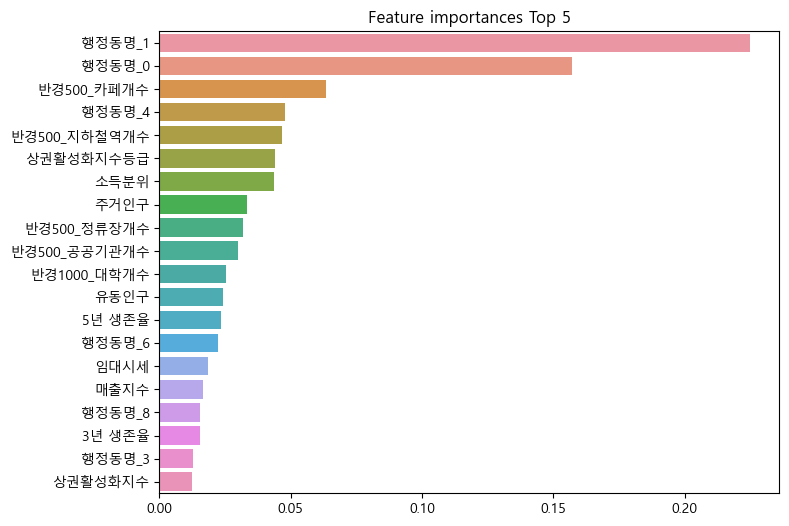

In [ ]:
import seaborn as sns

dt_importances_values = model_dt1.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
dt_importances = pd.Series(dt_importances_values, index=X1_train.columns)

# 중요도값 순으로 Series를 정렬
dt_top20 = dt_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=dt_top20 , y = dt_top20.index)
plt.show()

## 로지스틱

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#tuning과정
params = {'C':[0.01,0.1,1],
          'solver':['liblinear','lbfgs'],
          'max_iter':[100, 300]}

gridcv = GridSearchCV(logreg, param_grid=params, cv=3 , scoring='f1')
# 그리드 서치 모델 학습

gridcv.fit(X3_resampled, y3_resampled)
print(gridcv.best_params_)

# 테스트 데이터 예측
y1_pred = gridcv.predict(X3_test)

# 정확도 평가
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y1_test, y3_pred))
get_clf_eval(y3_test, y3_pred)
pred_positive_label = gridcv.predict_proba(X3_test)[:,1]
print('ROC: {0:.4f}'.format(roc_auc_score(y3_test, pred_positive_label)))


{'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy: 0.7755834829443446
[[6443 1843]
 [  32   37]]
정확도: 0.7756
정밀도: 0.0197
재현율: 0.5362
f1 score: 0.0380
ROC: 0.8039
